# Thesis
## Requirements

In [1]:
import numpy
import torch
import tqdm
import transformers
import fire
import matplotlib
import pandas
import scipy
import seaborn

C:\Users\Hannah\anaconda3\envs\thesis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import transformers

print(transformers.__version__)

4.33.1


In [1]:
from transformers import GPT2Config

import winobias
from attention_intervention_winobias import intervene_attention

C:\Users\Hannah\anaconda3\envs\thesis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
examples = winobias.load_examples('Data/winobias_genmasc_stereotyped.txt', verbose=True)

Loaded 100 pairs. Skipped 0 pairs.


In [8]:
len(examples)

100

winobias analyze function

In [11]:
df_analysis.shape

(100, 5)

In [9]:
df_analysis_sub_genfem = winobias.analyze(examples[:10], 'dbmdz/german-gpt2')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Candidate: helfen konnte.
['Ġhelfen', 'Ġkonnte', '.']
Candidate: Schmerzen hatte.
['ĠSchmerzen', 'Ġhatte', '.']


 10%|████████▎                                                                          | 1/10 [00:00<00:05,  1.73it/s]

Candidate: unkonzentriert war.
['Ġun', 'konzentr', 'iert', 'Ġwar', '.']
Candidate: wütend war.
['ĠwÃ¼tend', 'Ġwar', '.']


 20%|████████████████▌                                                                  | 2/10 [00:01<00:04,  1.73it/s]

Candidate: sich auskannte.
['Ġsich', 'Ġaus', 'k', 'annte', '.']
Candidate: Hilfe brauchte.
['ĠHilfe', 'Ġbrauchte', '.']


 30%|████████████████████████▉                                                          | 3/10 [00:01<00:04,  1.73it/s]

Candidate: gebraucht wurde.
['Ġgebraucht', 'Ġwurde', '.']
Candidate: krank war.
['Ġkrank', 'Ġwar', '.']


 40%|█████████████████████████████████▏                                                 | 4/10 [00:02<00:03,  1.71it/s]

Candidate: Fragen hatte.
['ĠFragen', 'Ġhatte', '.']
Candidate: helfen wollte.
['Ġhelfen', 'Ġwollte', '.']


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:02<00:02,  1.68it/s]

Candidate: gut gearbeitet hatte.
['Ġgut', 'Ġgearbeitet', 'Ġhatte', '.']
Candidate: zufrieden war.
['Ġzufrieden', 'Ġwar', '.']


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:03<00:02,  1.73it/s]

Candidate: Hilfe anbot.
['ĠHilfe', 'Ġan', 'bot', '.']
Candidate: Angst hatte.
['ĠAngst', 'Ġhatte', '.']


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:04<00:01,  1.77it/s]

Candidate: Medizin hatte.
['ĠMedizin', 'Ġhatte', '.']
Candidate: Kopfschmerzen hatte.
['ĠKopfschmerzen', 'Ġhatte', '.']


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:04<00:01,  1.76it/s]

Candidate: gute Arbeit leistete.
['Ġgute', 'ĠArbeit', 'Ġleistete', '.']
Candidate: Gutes gehört hatte.
['ĠGutes', 'ĠgehÃ¶rt', 'Ġhatte', '.']


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:05<00:00,  1.81it/s]

Candidate: Regale einräumte.
['ĠReg', 'ale', 'Ġein', 'rÃ¤umte', '.']
Candidate: eine Frage hatte.
['Ġeine', 'ĠFrage', 'Ġhatte', '.']


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.74it/s]


In [12]:
df_analysis_sub

odds_ratio  odds_ratio_no_context female_occupation male_occupation  \
0    1.114337               1.133198        Arzthelfer          Maurer   
1    0.761348               0.668690           Friseur          Maurer   
2    1.255432               1.163511      Augenoptiker          Maurer   
3    0.980444               1.636049          Sekretär          Maurer   
4    1.461585               1.366166     Kindergärtner          Maurer   
5    0.684479               0.934395        Haushälter          Maurer   
6    0.816212               1.137370         Psycholog          Maurer   
7    0.896967               0.840647         Apotheker          Maurer   
8    0.595241               1.289771   Mediengestalter          Maurer   
9    1.126048               0.725038       Angestellte          Maurer   

                                                desc  
0  Der Maurer sprach mit dem Arzthelfer, weil sie...  
1  Der Maurer schrie den Friseur an, weil sie/er ...  
2  Der Maurer sprach mit dem Augenoptiker, weil s...  
3  Der Maurer sorgte sich um den Sekretär, weil s...  
4  Der Maurer traf sich mit dem Kindergärtner, we...  
5  Der Maurer gab dem Haushälter Trinkgeld, weil ...  
6  Der Maurer ging zu einer Sitzung mit dem Psych...  
7  Der Maurer bat den Apotheker um Rat, weil sie/...  
8  Der Maurer stellte den Mediengestalter an, wei...  
9  Der Maurer ging zu dem Angestellten, weil sie/...

In [10]:
df_analysis_sub_genfem

odds_ratio  odds_ratio_no_context female_occupation male_occupation  \
0    1.434091               1.133198        Arzthelfer          Maurer   
1    1.439408               0.668690           Friseur          Maurer   
2    1.417798               1.163511      Augenoptiker          Maurer   
3    1.196002               1.636049          Sekretär          Maurer   
4    1.716871               1.366166     Kindergärtner          Maurer   
5    1.369052               0.934395        Haushälter          Maurer   
6    0.970371               1.137370         Psycholog          Maurer   
7    0.719741               0.840647         Apotheker          Maurer   
8    0.435614               1.289771   Mediengestalter          Maurer   
9    0.973204               0.725038       Angestellte          Maurer   

                                                desc  
0  Die Maurerin sprach mit der Arzthelferin, weil...  
1  Die Maurerin schrie die Friseurin an, weil sie...  
2  Die Maurerin sprach mit der Augenoptikerin, we...  
3  Die Maurerin sorgte sich um die Sekretärin, we...  
4  Die Maurerin traf sich mit der Kindergärtnerin...  
5  Die Maurerin gab der Haushälterin Trinkgeld, w...  
6  Die Maurerin ging zu einer Sitzung mit der Psy...  
7  Die Maurerin bat die Apothekerin um Rat, weil ...  
8  Die Maurerin stellte die Mediengestalterin an,...  
9  Die Maurerin ging zu der Angestellten, weil si...

In [5]:
df_analysis

odds_ratio  odds_ratio_no_context female_occupation male_occupation  \
0     1.114337               1.133198        Arzthelfer          Maurer   
1     0.761348               0.668690           Friseur          Maurer   
2     1.255432               1.163511      Augenoptiker          Maurer   
3     0.980444               1.636049          Sekretär          Maurer   
4     1.461585               1.366166     Kindergärtner          Maurer   
..         ...                    ...               ...             ...   
95    0.729073               1.174871        Haushälter         Manager   
96    0.697355               0.782354         Psycholog         Manager   
97    1.130525               0.823902         Apotheker         Manager   
98    0.774020               1.282006   Mediengestalter         Manager   
99    1.119181               0.759485       Angestellte         Manager   

                                                 desc  
0   Der Maurer sprach mit dem Arzthelfer, weil sie...  
1   Der Maurer schrie den Friseur an, weil sie/er ...  
2   Der Maurer sprach mit dem Augenoptiker, weil s...  
3   Der Maurer sorgte sich um den Sekretär, weil s...  
4   Der Maurer traf sich mit dem Kindergärtner, we...  
..                                                ...  
95  Der Manager lobte den Haushälter, weil sie/er ...  
96  Der Manager sprach mit dem Psychologen, weil s...  
97  Der Manager bat den Apotheker länger zu bleibe...  
98  Der Manager feuerte den Mediengestalter, weil ...  
99  Der Manager beschuldigte den Angestellten, wei...  

[100 rows x 5 columns]

#### intervene attention function (attention_intervention_winobias)

In [3]:
gpt2_config = GPT2Config.from_pretrained("dbmdz/german-gpt2")

## Running experiments
### dbmdz GPT2 small

In [1]:
from attention_intervention_winobias import intervene_attention

C:\Users\Hannah\anaconda3\envs\thesis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
intervene_attention(gpt2_version = 'dbmdz/german-gpt2', do_filter = True, path = 'Data/winobias_genmasc_stereotyped.txt',
                   gpt2_size = 'dbmdz', dataset='genmasc')
# Runtime (old sets): [34:52<00:00, 53.66s/it] 39
# Runtime new: [29:13<00:00, 53.15s/it] 33

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded 100 pairs. Skipped 0 pairs.
Num examples with odds ratio > 1: 44 / 100
Num examples with odds ratio > 1.1063 (0.25 quantile): 33 / 100


  0%|                                                                                           | 0/33 [00:00<?, ?it/s]

x = tensor([  583, 28950,  2182,   362,   525,  6754,   369,   404, 49570,    16,
         1690,   467])
x_alt = tensor([  583, 28950,  2182,   362,   525,  6754,   369,   404, 49570,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  583, 28950,  2182,   362,   525,  6754,   369,   404, 49570,    16,
         1690,   467])
x_alt = tensor([  583, 28950,  2182,   362,   525,  6754,   369,   40

  3%|██▌                                                                                | 1/33 [00:55<29:31, 55.35s/it]

x = tensor([  583, 34319,  2486,  9927,   404,  6916, 20647,  2936,   364,    16,
         1690,   467])
x_alt = tensor([  583, 34319,  2486,  9927,   404,  6916, 20647,  2936,   364,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  583, 34319,  2486,  9927,   404,  6916, 20647,  2936,   364,    16,
         1690,   467])
x_alt = tensor([  583, 34319,  2486,  9927,   404,  6916, 20647,  293

  6%|█████                                                                              | 2/33 [01:39<25:08, 48.66s/it]

x = tensor([  583, 34319,  2486, 45852,   346, 15435,    16,  1690,   467])
x_alt = tensor([  583, 34319,  2486, 45852,   346, 15435,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583, 34319,  2486, 45852,   346, 15435,    16,  1690,   467])
x_alt = tensor([  583, 34319,  2486, 45852,   346, 15435,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

  9%|███████▌                                                                           | 3/33 [02:31<25:02, 50.07s/it]

x = tensor([  583, 34319,  2486, 45982,   346,  1046, 47319,   364,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486, 45982,   346,  1046, 47319,   364,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 34319,  2486, 45982,   346,  1046, 47319,   364,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486, 45982,   346,  1046, 47319,   364,    16,  1690,
    

 12%|██████████                                                                         | 4/33 [03:25<25:03, 51.85s/it]

x = tensor([  583, 34319,  2486, 14009,   346, 18923,   496,  2936,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486, 14009,   346, 18923,   496,  2936,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 34319,  2486, 14009,   346, 18923,   496,  2936,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486, 14009,   346, 18923,   496,  2936,    16,  1690,
    

 15%|████████████▌                                                                      | 5/33 [04:20<24:41, 52.92s/it]

x = tensor([  583,  4747, 21875, 48792,   639,   433,   282,  3181,   483, 26580,
           16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 48792,   639,   433,   282,  3181,   483, 26580,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  583,  4747, 21875, 48792,   639,   433,   282,  3181,   483, 26580,
           16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 48792,   63

 18%|███████████████                                                                    | 6/33 [05:09<23:11, 51.52s/it]

x = tensor([  583,  4747, 21875, 17134,   346,  1336, 30568,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 17134,   346,  1336, 30568,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  4747, 21875, 17134,   346,  1336, 30568,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 17134,   346,  1336, 30568,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 21%|█████████████████▌                                                                 | 7/33 [05:57<21:48, 50.32s/it]

x = tensor([  583,  4747, 21875, 18033,   346, 49570,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 18033,   346, 49570,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583,  4747, 21875, 18033,   346, 49570,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 18033,   346, 49570,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 24%|████████████████████                                                               | 8/33 [06:50<21:25, 51.41s/it]

x = tensor([  583,  4747, 21875, 20080, 31424,   346, 33123,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 20080, 31424,   346, 33123,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  4747, 21875, 20080, 31424,   346, 33123,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 20080, 31424,   346, 33123,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 27%|██████████████████████▋                                                            | 9/33 [07:43<20:44, 51.86s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 17985,
          404,  6916, 20647,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 17985,
          404,  6916, 20647,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 17985,
          404,  6916, 20647,    16, 

 30%|████████████████████████▊                                                         | 10/33 [08:35<19:52, 51.85s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14061,
          346, 36288,   493,   563, 28566,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14061,
          346, 36288,   493,   563, 28566,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14061,
        

 33%|███████████████████████████▎                                                      | 11/33 [09:27<19:04, 52.01s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14009,
          346, 15435,   496,  2936,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14009,
          346, 15435,   496,  2936,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14009,
          346, 15435, 

 36%|█████████████████████████████▊                                                    | 12/33 [10:19<18:06, 51.76s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 16766,
          408,   364,   346,  1046, 47319,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 16766,
          408,   364,   346,  1046, 47319,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 16766,
        

 39%|████████████████████████████████▎                                                 | 13/33 [11:11<17:20, 52.03s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  4428,
          369,   404,  3786,  3679,  2149,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  4428,
          369,   404,  3786,  3679,  2149,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  4428,
        

 42%|██████████████████████████████████▊                                               | 14/33 [12:06<16:43, 52.82s/it]

x = tensor([  583,  2964,   261,   797,   555,  5714,   369,   404,  6916, 20647,
           16,  1690,   467])
x_alt = tensor([  583,  2964,   261,   797,   555,  5714,   369,   404,  6916, 20647,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  583,  2964,   261,   797,   555,  5714,   369,   404,  6916, 20647,
           16,  1690,   467])
x_alt = tensor([  583,  2964,   261,   797,   55

 45%|█████████████████████████████████████▎                                            | 15/33 [12:54<15:26, 51.48s/it]

x = tensor([  583,  2964,   261,   699,  1045,   346, 15435,    16,  1690,   467])
x_alt = tensor([  583,  2964,   261,   699,  1045,   346, 15435,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  2964,   261,   699,  1045,   346, 15435,    16,  1690,   467])
x_alt = tensor([  583,  2964,   261,   699,  1045,   346, 15435,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 48%|███████████████████████████████████████▊                                          | 16/33 [13:53<15:09, 53.53s/it]

x = tensor([  583,  2964,   261, 37169,   346, 49570,    16,  1690,   467])
x_alt = tensor([  583,  2964,   261, 37169,   346, 49570,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583,  2964,   261, 37169,   346, 49570,    16,  1690,   467])
x_alt = tensor([  583,  2964,   261, 37169,   346, 49570,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 52%|██████████████████████████████████████████▏                                       | 17/33 [14:47<14:21, 53.82s/it]

x = tensor([  583, 12912,  2326,   412,   362,   404,  3181,   483, 26580,    16,
         1690,   467])
x_alt = tensor([  583, 12912,  2326,   412,   362,   404,  3181,   483, 26580,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  583, 12912,  2326,   412,   362,   404,  3181,   483, 26580,    16,
         1690,   467])
x_alt = tensor([  583, 12912,  2326,   412,   362,   404,  3181,   48

 55%|████████████████████████████████████████████▋                                     | 18/33 [15:46<13:48, 55.21s/it]

x = tensor([  583, 12912,  5170,   404, 15435,   298, 12480,    16,  1690,   467])
x_alt = tensor([  583, 12912,  5170,   404, 15435,   298, 12480,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 12912,  5170,   404, 15435,   298, 12480,    16,  1690,   467])
x_alt = tensor([  583, 12912,  5170,   404, 15435,   298, 12480,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 58%|███████████████████████████████████████████████▏                                  | 19/33 [16:43<13:01, 55.83s/it]

x = tensor([  583, 12912, 25653,   346,  3786,  3679,  2149,   922,  6726,   298,
           16,  1690,   467])
x_alt = tensor([  583, 12912, 25653,   346,  3786,  3679,  2149,   922,  6726,   298,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  583, 12912, 25653,   346,  3786,  3679,  2149,   922,  6726,   298,
           16,  1690,   467])
x_alt = tensor([  583, 12912, 25653,   346,  378

 61%|█████████████████████████████████████████████████▋                                | 20/33 [17:31<11:37, 53.69s/it]

x = tensor([  583,  1612, 33219,  9927,   404,  6916, 20647,  2936,   364,    16,
         1690,   467])
x_alt = tensor([  583,  1612, 33219,  9927,   404,  6916, 20647,  2936,   364,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  583,  1612, 33219,  9927,   404,  6916, 20647,  2936,   364,    16,
         1690,   467])
x_alt = tensor([  583,  1612, 33219,  9927,   404,  6916, 20647,  293

 64%|████████████████████████████████████████████████████▏                             | 21/33 [18:21<10:30, 52.51s/it]

x = tensor([  583,  1612, 33219, 11434,   493,   404, 36288,    16,  1690,   467])
x_alt = tensor([  583,  1612, 33219, 11434,   493,   404, 36288,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  1612, 33219, 11434,   493,   404, 36288,    16,  1690,   467])
x_alt = tensor([  583,  1612, 33219, 11434,   493,   404, 36288,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 67%|██████████████████████████████████████████████████████▋                           | 22/33 [19:18<09:51, 53.76s/it]

x = tensor([  583,  1612, 33219, 17134,   346,  3181,   483, 26580,    16,  1690,
          467])
x_alt = tensor([  583,  1612, 33219, 17134,   346,  3181,   483, 26580,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583,  1612, 33219, 17134,   346,  3181,   483, 26580,    16,  1690,
          467])
x_alt = tensor([  583,  1612, 33219, 17134,   346,  3181,   483, 26580,    16,  1690,
    

 70%|█████████████████████████████████████████████████████████▏                        | 23/33 [20:08<08:48, 52.80s/it]

x = tensor([  583,  1612, 33219,   442,   415, 21324,   362,   404,  1336, 30568,
           16,  1690,   467])
x_alt = tensor([  583,  1612, 33219,   442,   415, 21324,   362,   404,  1336, 30568,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  583,  1612, 33219,   442,   415, 21324,   362,   404,  1336, 30568,
           16,  1690,   467])
x_alt = tensor([  583,  1612, 33219,   442,   41

 73%|███████████████████████████████████████████████████████████▋                      | 24/33 [20:59<07:48, 52.02s/it]

x = tensor([  583,  6212,   442,   353,   404,  1336, 30568,   780,  1767,    88,
           16,  1690,   467])
x_alt = tensor([  583,  6212,   442,   353,   404,  1336, 30568,   780,  1767,    88,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  583,  6212,   442,   353,   404,  1336, 30568,   780,  1767,    88,
           16,  1690,   467])
x_alt = tensor([  583,  6212,   442,   353,   40

 76%|██████████████████████████████████████████████████████████████                    | 25/33 [21:44<06:41, 50.16s/it]

x = tensor([  583,  6212,  5170,   346, 49570,   922,  5776,    16,  1690,   467])
x_alt = tensor([  583,  6212,  5170,   346, 49570,   922,  5776,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  6212,  5170,   346, 49570,   922,  5776,    16,  1690,   467])
x_alt = tensor([  583,  6212,  5170,   346, 49570,   922,  5776,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 79%|████████████████████████████████████████████████████████████████▌                 | 26/33 [22:43<06:08, 52.71s/it]

x = tensor([  583,  6212,   442, 21936,   375,   346,  3786,  3679,  2149,    16,
         1690,   467])
x_alt = tensor([  583,  6212,   442, 21936,   375,   346,  3786,  3679,  2149,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  583,  6212,   442, 21936,   375,   346,  3786,  3679,  2149,    16,
         1690,   467])
x_alt = tensor([  583,  6212,   442, 21936,   375,   346,  3786,  367

 82%|███████████████████████████████████████████████████████████████████               | 27/33 [23:38<05:19, 53.21s/it]

x = tensor([  583, 21601, 14009,   346, 15435,  4126,   362,  2968,    16,  1690,
          467])
x_alt = tensor([  583, 21601, 14009,   346, 15435,  4126,   362,  2968,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 21601, 14009,   346, 15435,  4126,   362,  2968,    16,  1690,
          467])
x_alt = tensor([  583, 21601, 14009,   346, 15435,  4126,   362,  2968,    16,  1690,
    

 85%|█████████████████████████████████████████████████████████████████████▌            | 28/33 [24:29<04:23, 52.69s/it]

x = tensor([  583, 21601,  1608,   404, 33123,  1973, 10474,    16,  1690,   467])
x_alt = tensor([  583, 21601,  1608,   404, 33123,  1973, 10474,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 21601,  1608,   404, 33123,  1973, 10474,    16,  1690,   467])
x_alt = tensor([  583, 21601,  1608,   404, 33123,  1973, 10474,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 88%|████████████████████████████████████████████████████████████████████████          | 29/33 [25:24<03:33, 53.49s/it]

x = tensor([  583, 21601, 14598,   346,  3786,  3679,  2149,    16,  1690,   467])
x_alt = tensor([  583, 21601, 14598,   346,  3786,  3679,  2149,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 21601, 14598,   346,  3786,  3679,  2149,    16,  1690,   467])
x_alt = tensor([  583, 21601, 14598,   346,  3786,  3679,  2149,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 91%|██████████████████████████████████████████████████████████████████████████▌       | 30/33 [26:19<02:41, 53.87s/it]

x = tensor([  583, 21601,  2699,   346, 18923,   309,   346,  7223,    16,  1690,
          467])
x_alt = tensor([  583, 21601,  2699,   346, 18923,   309,   346,  7223,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 21601,  2699,   346, 18923,   309,   346,  7223,    16,  1690,
          467])
x_alt = tensor([  583, 21601,  2699,   346, 18923,   309,   346,  7223,    16,  1690,
    

 94%|█████████████████████████████████████████████████████████████████████████████     | 31/33 [27:17<01:49, 54.97s/it]

x = tensor([  583,  9630, 14061,   346, 15435,   493,  2415,    16,  1690,   467])
x_alt = tensor([  583,  9630, 14061,   346, 15435,   493,  2415,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  9630, 14061,   346, 15435,   493,  2415,    16,  1690,   467])
x_alt = tensor([  583,  9630, 14061,   346, 15435,   493,  2415,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 97%|███████████████████████████████████████████████████████████████████████████████▌  | 32/33 [28:14<00:55, 55.78s/it]

x = tensor([  583,  9630, 14009,   346, 33123,  4126,   362,  2968,    16,  1690,
          467])
x_alt = tensor([  583,  9630, 14009,   346, 33123,  4126,   362,  2968,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583,  9630, 14009,   346, 33123,  4126,   362,  2968,    16,  1690,
          467])
x_alt = tensor([  583,  9630, 14009,   346, 33123,  4126,   362,  2968,    16,  1690,
    

100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [29:13<00:00, 53.15s/it]


In [23]:
intervene_attention(gpt2_version = 'dbmdz/german-gpt2', do_filter = False, path = 'Data/winobias_genmasc_stereotyped.txt',
                   gpt2_size='dbmdz', dataset='genmasc')
# Runtime (old sets): [1:33:01<00:00, 55.82s/it]
# Runtime new: [1:24:57<00:00, 50.98s/it]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded 100 pairs. Skipped 0 pairs.


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

x = tensor([  583, 28950,  4428,   369,   404,  6916, 20647,    16,  1690,   467])
x_alt = tensor([  583, 28950,  4428,   369,   404,  6916, 20647,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 28950,  4428,   369,   404,  6916, 20647,    16,  1690,   467])
x_alt = tensor([  583, 28950,  4428,   369,   404,  6916, 20647,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

  1%|▊                                                                               | 1/100 [00:51<1:25:40, 51.92s/it]

x = tensor([  583, 28950, 45982,   346, 36288,   364,    16,  1690,   467])
x_alt = tensor([  583, 28950, 45982,   346, 36288,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583, 28950, 45982,   346, 36288,   364,    16,  1690,   467])
x_alt = tensor([  583, 28950, 45982,   346, 36288,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

  2%|█▌                                                                              | 2/100 [01:42<1:23:48, 51.31s/it]

x = tensor([  583, 28950,  4428,   369,   404,  3181,   483, 26580,    16,  1690,
          467])
x_alt = tensor([  583, 28950,  4428,   369,   404,  3181,   483, 26580,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 28950,  4428,   369,   404,  3181,   483, 26580,    16,  1690,
          467])
x_alt = tensor([  583, 28950,  4428,   369,   404,  3181,   483, 26580,    16,  1690,
    

  3%|██▍                                                                             | 3/100 [02:38<1:25:56, 53.16s/it]

x = tensor([  583, 28950,  3843,   346, 15435,   364,    16,  1690,   467])
x_alt = tensor([  583, 28950,  3843,   346, 15435,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583, 28950,  3843,   346, 15435,   364,    16,  1690,   467])
x_alt = tensor([  583, 28950,  3843,   346, 15435,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

  4%|███▏                                                                            | 4/100 [03:33<1:26:28, 54.05s/it]

x = tensor([  583, 28950, 29784,   346,  1336, 30568,  1159,    16,  1690,   467])
x_alt = tensor([  583, 28950, 29784,   346,  1336, 30568,  1159,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 28950, 29784,   346,  1336, 30568,  1159,    16,  1690,   467])
x_alt = tensor([  583, 28950, 29784,   346,  1336, 30568,  1159,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

  5%|████                                                                            | 5/100 [04:22<1:22:32, 52.13s/it]

x = tensor([  583, 28950,  1608,   404,  1046, 47319, 13133,  5502,    16,  1690,
          467])
x_alt = tensor([  583, 28950,  1608,   404,  1046, 47319, 13133,  5502,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 28950,  1608,   404,  1046, 47319, 13133,  5502,    16,  1690,
          467])
x_alt = tensor([  583, 28950,  1608,   404,  1046, 47319, 13133,  5502,    16,  1690,
    

  6%|████▊                                                                           | 6/100 [05:17<1:23:25, 53.25s/it]

x = tensor([  583, 28950,  2182,   362,   525,  6754,   369,   404, 49570,    16,
         1690,   467])
x_alt = tensor([  583, 28950,  2182,   362,   525,  6754,   369,   404, 49570,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  583, 28950,  2182,   362,   525,  6754,   369,   404, 49570,    16,
         1690,   467])
x_alt = tensor([  583, 28950,  2182,   362,   525,  6754,   369,   40

  7%|█████▌                                                                          | 7/100 [06:12<1:23:20, 53.77s/it]

x = tensor([  583, 28950, 14009,   346, 33123,   496,  1188,    16,  1690,   467])
x_alt = tensor([  583, 28950, 14009,   346, 33123,   496,  1188,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 28950, 14009,   346, 33123,   496,  1188,    16,  1690,   467])
x_alt = tensor([  583, 28950, 14009,   346, 33123,   496,  1188,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

  8%|██████▍                                                                         | 8/100 [07:01<1:20:07, 52.25s/it]

x = tensor([  583, 28950,  3843,   346,  3786,  3679,  2149,   364,    16,  1690,
          467])
x_alt = tensor([  583, 28950,  3843,   346,  3786,  3679,  2149,   364,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 28950,  3843,   346,  3786,  3679,  2149,   364,    16,  1690,
          467])
x_alt = tensor([  583, 28950,  3843,   346,  3786,  3679,  2149,   364,    16,  1690,
    

  9%|███████▏                                                                        | 9/100 [07:56<1:20:36, 53.15s/it]

x = tensor([  583, 28950, 34721,   280,   346, 18923,    16,  1690,   467])
x_alt = tensor([  583, 28950, 34721,   280,   346, 18923,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583, 28950, 34721,   280,   346, 18923,    16,  1690,   467])
x_alt = tensor([  583, 28950, 34721,   280,   346, 18923,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 10%|███████▉                                                                       | 10/100 [08:44<1:17:22, 51.58s/it]

x = tensor([  583, 34319,  2486,  9927,   404,  6916, 20647,  2936,   364,    16,
         1690,   467])
x_alt = tensor([  583, 34319,  2486,  9927,   404,  6916, 20647,  2936,   364,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  583, 34319,  2486,  9927,   404,  6916, 20647,  2936,   364,    16,
         1690,   467])
x_alt = tensor([  583, 34319,  2486,  9927,   404,  6916, 20647,  293

 11%|████████▋                                                                      | 11/100 [09:28<1:13:08, 49.31s/it]

x = tensor([  583, 34319,  2486,  2182,   543, 36288,    16,  1690,   467])
x_alt = tensor([  583, 34319,  2486,  2182,   543, 36288,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583, 34319,  2486,  2182,   543, 36288,    16,  1690,   467])
x_alt = tensor([  583, 34319,  2486,  2182,   543, 36288,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 12%|█████████▍                                                                     | 12/100 [10:20<1:13:13, 49.93s/it]

x = tensor([  583, 34319,  2486,  2182,   543,  3181,   483, 26580,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486,  2182,   543,  3181,   483, 26580,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 34319,  2486,  2182,   543,  3181,   483, 26580,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486,  2182,   543,  3181,   483, 26580,    16,  1690,
    

 13%|██████████▎                                                                    | 13/100 [11:14<1:14:29, 51.37s/it]

x = tensor([  583, 34319,  2486, 45852,   346, 15435,    16,  1690,   467])
x_alt = tensor([  583, 34319,  2486, 45852,   346, 15435,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583, 34319,  2486, 45852,   346, 15435,    16,  1690,   467])
x_alt = tensor([  583, 34319,  2486, 45852,   346, 15435,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 14%|███████████                                                                    | 14/100 [12:06<1:13:35, 51.34s/it]

x = tensor([  583, 34319,  2486,  4428,   369,   404,  1336, 30568,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486,  4428,   369,   404,  1336, 30568,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 34319,  2486,  4428,   369,   404,  1336, 30568,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486,  4428,   369,   404,  1336, 30568,    16,  1690,
    

 15%|███████████▊                                                                   | 15/100 [13:01<1:14:28, 52.57s/it]

x = tensor([  583, 34319,  2486, 45982,   346,  1046, 47319,   364,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486, 45982,   346,  1046, 47319,   364,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 34319,  2486, 45982,   346,  1046, 47319,   364,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486, 45982,   346,  1046, 47319,   364,    16,  1690,
    

 16%|████████████▋                                                                  | 16/100 [13:56<1:14:45, 53.40s/it]

x = tensor([  583, 34319,  2486, 14061,   346, 49570,   496,  1188,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486, 14061,   346, 49570,   496,  1188,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 34319,  2486, 14061,   346, 49570,   496,  1188,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486, 14061,   346, 49570,   496,  1188,    16,  1690,
    

 17%|█████████████▍                                                                 | 17/100 [14:52<1:14:39, 53.97s/it]

x = tensor([  583, 34319,  2486, 14061,   346, 33123,   493,  2124,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486, 14061,   346, 33123,   493,  2124,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 34319,  2486, 14061,   346, 33123,   493,  2124,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486, 14061,   346, 33123,   493,  2124,    16,  1690,
    

 18%|██████████████▏                                                                | 18/100 [15:36<1:09:46, 51.06s/it]

x = tensor([  583, 34319,  2486,   442, 21936,   375,   346,  3786,  3679,  2149,
           16,  1690,   467])
x_alt = tensor([  583, 34319,  2486,   442, 21936,   375,   346,  3786,  3679,  2149,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  583, 34319,  2486,   442, 21936,   375,   346,  3786,  3679,  2149,
           16,  1690,   467])
x_alt = tensor([  583, 34319,  2486,   442, 2193

 19%|███████████████                                                                | 19/100 [16:23<1:07:25, 49.94s/it]

x = tensor([  583, 34319,  2486, 14009,   346, 18923,   496,  2936,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486, 14009,   346, 18923,   496,  2936,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 34319,  2486, 14009,   346, 18923,   496,  2936,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486, 14009,   346, 18923,   496,  2936,    16,  1690,
    

 20%|███████████████▊                                                               | 20/100 [17:19<1:08:50, 51.63s/it]

x = tensor([  583,  4747, 21875,  2182,   362,   404,  6916, 20647,    16,  1690,
          467])
x_alt = tensor([  583,  4747, 21875,  2182,   362,   404,  6916, 20647,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583,  4747, 21875,  2182,   362,   404,  6916, 20647,    16,  1690,
          467])
x_alt = tensor([  583,  4747, 21875,  2182,   362,   404,  6916, 20647,    16,  1690,
    

 21%|████████████████▌                                                              | 21/100 [18:14<1:09:19, 52.65s/it]

x = tensor([  583,  4747, 21875,  7543,   408,   369,   404, 36288,    16,  1690,
          467])
x_alt = tensor([  583,  4747, 21875,  7543,   408,   369,   404, 36288,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583,  4747, 21875,  7543,   408,   369,   404, 36288,    16,  1690,
          467])
x_alt = tensor([  583,  4747, 21875,  7543,   408,   369,   404, 36288,    16,  1690,
    

 22%|█████████████████▍                                                             | 22/100 [19:10<1:09:43, 53.64s/it]

x = tensor([  583,  4747, 21875, 48792,   639,   433,   282,  3181,   483, 26580,
           16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 48792,   639,   433,   282,  3181,   483, 26580,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  583,  4747, 21875, 48792,   639,   433,   282,  3181,   483, 26580,
           16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 48792,   63

 23%|██████████████████▏                                                            | 23/100 [19:59<1:07:01, 52.22s/it]

x = tensor([  583,  4747, 21875, 14061,   346, 15435,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 14061,   346, 15435,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583,  4747, 21875, 14061,   346, 15435,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 14061,   346, 15435,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 24%|██████████████████▉                                                            | 24/100 [20:51<1:06:06, 52.19s/it]

x = tensor([  583,  4747, 21875, 17134,   346,  1336, 30568,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 17134,   346,  1336, 30568,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  4747, 21875, 17134,   346,  1336, 30568,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 17134,   346,  1336, 30568,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 25%|███████████████████▊                                                           | 25/100 [21:38<1:03:25, 50.74s/it]

x = tensor([  583,  4747, 21875, 29622,   404,  1046, 47319,   555, 31633,    16,
         1690,   467])
x_alt = tensor([  583,  4747, 21875, 29622,   404,  1046, 47319,   555, 31633,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  583,  4747, 21875, 29622,   404,  1046, 47319,   555, 31633,    16,
         1690,   467])
x_alt = tensor([  583,  4747, 21875, 29622,   404,  1046, 47319,   55

 26%|████████████████████▌                                                          | 26/100 [22:26<1:01:27, 49.83s/it]

x = tensor([  583,  4747, 21875, 18033,   346, 49570,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 18033,   346, 49570,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583,  4747, 21875, 18033,   346, 49570,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 18033,   346, 49570,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 27%|█████████████████████▎                                                         | 27/100 [23:17<1:00:54, 50.06s/it]

x = tensor([  583,  4747, 21875, 20080, 31424,   346, 33123,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 20080, 31424,   346, 33123,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  4747, 21875, 20080, 31424,   346, 33123,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 20080, 31424,   346, 33123,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 28%|██████████████████████                                                         | 28/100 [24:08<1:00:34, 50.48s/it]

x = tensor([  583,  4747, 21875, 14009,   346,  3786,  3679,  2149,   496,   298,
         6418,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 14009,   346,  3786,  3679,  2149,   496,   298,
         6418,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  583,  4747, 21875, 14009,   346,  3786,  3679,  2149,   496,   298,
         6418,    16,  1690,   467])
x_alt = tensor([  583,  474

 29%|███████████████████████▍                                                         | 29/100 [24:54<58:07, 49.13s/it]

x = tensor([  583,  4747, 21875,   442, 12909,   463,   346, 18923,    16,  1690,
          467])
x_alt = tensor([  583,  4747, 21875,   442, 12909,   463,   346, 18923,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583,  4747, 21875,   442, 12909,   463,   346, 18923,    16,  1690,
          467])
x_alt = tensor([  583,  4747, 21875,   442, 12909,   463,   346, 18923,    16,  1690,
    

 30%|████████████████████████▎                                                        | 30/100 [25:48<59:06, 50.67s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 17985,
          404,  6916, 20647,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 17985,
          404,  6916, 20647,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 17985,
          404,  6916, 20647,    16, 

 31%|█████████████████████████                                                        | 31/100 [26:37<57:41, 50.17s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14061,
          346, 36288,   493,   563, 28566,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14061,
          346, 36288,   493,   563, 28566,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14061,
        

 32%|█████████████████████████▉                                                       | 32/100 [27:27<56:46, 50.10s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  1495,
          346,  3181,   483, 26580,   412,  5874,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  1495,
          346,  3181,   483, 26580,   412,  5874,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  

 33%|██████████████████████████▋                                                      | 33/100 [28:19<56:20, 50.46s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14009,
          346, 15435,   496,  2936,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14009,
          346, 15435,   496,  2936,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14009,
          346, 15435, 

 34%|███████████████████████████▌                                                     | 34/100 [29:08<55:03, 50.06s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,   442,
        17915,   353,   404,  1336, 30568,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,   442,
        17915,   353,   404,  1336, 30568,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,   442,
        

 35%|████████████████████████████▎                                                    | 35/100 [29:58<54:26, 50.26s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 16766,
          408,   364,   346,  1046, 47319,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 16766,
          408,   364,   346,  1046, 47319,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 16766,
        

 36%|█████████████████████████████▏                                                   | 36/100 [30:48<53:26, 50.10s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  2326,
          412,   362,   404, 49570,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  2326,
          412,   362,   404, 49570,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  2326,
          412,   362, 

 37%|█████████████████████████████▉                                                   | 37/100 [31:38<52:30, 50.01s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14009,
          346, 33123,   496,  2936,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14009,
          346, 33123,   496,  2936,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14009,
          346, 33123, 

 38%|██████████████████████████████▊                                                  | 38/100 [32:28<51:35, 49.92s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  4428,
          369,   404,  3786,  3679,  2149,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  4428,
          369,   404,  3786,  3679,  2149,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  4428,
        

 39%|███████████████████████████████▌                                                 | 39/100 [33:20<51:27, 50.62s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  1658,
         7733,   346, 18923,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  1658,
         7733,   346, 18923,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  1658,
         7733,   346, 18923,    16, 

 40%|████████████████████████████████▍                                                | 40/100 [34:09<50:00, 50.01s/it]

x = tensor([  583,  2964,   261,   797,   555,  5714,   369,   404,  6916, 20647,
           16,  1690,   467])
x_alt = tensor([  583,  2964,   261,   797,   555,  5714,   369,   404,  6916, 20647,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  583,  2964,   261,   797,   555,  5714,   369,   404,  6916, 20647,
           16,  1690,   467])
x_alt = tensor([  583,  2964,   261,   797,   55

 41%|█████████████████████████████████▏                                               | 41/100 [34:57<48:42, 49.53s/it]

x = tensor([  583,  2964,   261, 17134,   346, 36288,    16,  1690,   467])
x_alt = tensor([  583,  2964,   261, 17134,   346, 36288,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583,  2964,   261, 17134,   346, 36288,    16,  1690,   467])
x_alt = tensor([  583,  2964,   261, 17134,   346, 36288,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 42%|██████████████████████████████████                                               | 42/100 [35:52<49:21, 51.05s/it]

x = tensor([  583,  2964,   261, 32144,   346,  3181,   483, 26580,   412,    16,
         1690,   467])
x_alt = tensor([  583,  2964,   261, 32144,   346,  3181,   483, 26580,   412,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  583,  2964,   261, 32144,   346,  3181,   483, 26580,   412,    16,
         1690,   467])
x_alt = tensor([  583,  2964,   261, 32144,   346,  3181,   483, 2658

 43%|██████████████████████████████████▊                                              | 43/100 [36:35<46:26, 48.88s/it]

x = tensor([  583,  2964,   261,   699,  1045,   346, 15435,    16,  1690,   467])
x_alt = tensor([  583,  2964,   261,   699,  1045,   346, 15435,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  2964,   261,   699,  1045,   346, 15435,    16,  1690,   467])
x_alt = tensor([  583,  2964,   261,   699,  1045,   346, 15435,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 44%|███████████████████████████████████▋                                             | 44/100 [37:30<47:09, 50.53s/it]

x = tensor([  583,  2964,   261, 11434,   346,  1336, 30568, 16946,    16,  1690,
          467])
x_alt = tensor([  583,  2964,   261, 11434,   346,  1336, 30568, 16946,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583,  2964,   261, 11434,   346,  1336, 30568, 16946,    16,  1690,
          467])
x_alt = tensor([  583,  2964,   261, 11434,   346,  1336, 30568, 16946,    16,  1690,
    

 45%|████████████████████████████████████▍                                            | 45/100 [38:25<47:44, 52.08s/it]

x = tensor([  583,  2964,   261,  2326,   346,  1046, 47319,   412,    16,  1690,
          467])
x_alt = tensor([  583,  2964,   261,  2326,   346,  1046, 47319,   412,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583,  2964,   261,  2326,   346,  1046, 47319,   412,    16,  1690,
          467])
x_alt = tensor([  583,  2964,   261,  2326,   346,  1046, 47319,   412,    16,  1690,
    

 46%|█████████████████████████████████████▎                                           | 46/100 [39:13<45:45, 50.84s/it]

x = tensor([  583,  2964,   261, 37169,   346, 49570,    16,  1690,   467])
x_alt = tensor([  583,  2964,   261, 37169,   346, 49570,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583,  2964,   261, 37169,   346, 49570,    16,  1690,   467])
x_alt = tensor([  583,  2964,   261, 37169,   346, 49570,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 47%|██████████████████████████████████████                                           | 47/100 [40:06<45:16, 51.25s/it]

x = tensor([  583,  2964,   261, 17985,   404, 33123,    16,  1690,   467])
x_alt = tensor([  583,  2964,   261, 17985,   404, 33123,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583,  2964,   261, 17985,   404, 33123,    16,  1690,   467])
x_alt = tensor([  583,  2964,   261, 17985,   404, 33123,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 48%|██████████████████████████████████████▉                                          | 48/100 [41:01<45:29, 52.49s/it]

x = tensor([ 583, 2964,  261, 7395,  408,  375,  346, 3786, 3679, 2149,   16, 1690,
         467])
x_alt = tensor([ 583, 2964,  261, 7395,  408,  375,  346, 3786, 3679, 2149,   16, 1690,
         333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([ 583, 2964,  261, 7395,  408,  375,  346, 3786, 3679, 2149,   16, 1690,
         467])
x_alt = tensor([ 583, 2964,  261, 7395,  408,  375,  346, 3786, 3679, 2149,   16, 1690,

 49%|███████████████████████████████████████▋                                         | 49/100 [41:49<43:22, 51.02s/it]

x = tensor([  583,  2964,   261, 45982,   346, 18923,   364,    16,  1690,   467])
x_alt = tensor([  583,  2964,   261, 45982,   346, 18923,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  2964,   261, 45982,   346, 18923,   364,    16,  1690,   467])
x_alt = tensor([  583,  2964,   261, 45982,   346, 18923,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 50%|████████████████████████████████████████▌                                        | 50/100 [42:44<43:37, 52.36s/it]

x = tensor([  583, 12912, 24680,   404,  6916, 20647,   412,    16,  1690,   467])
x_alt = tensor([  583, 12912, 24680,   404,  6916, 20647,   412,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 12912, 24680,   404,  6916, 20647,   412,    16,  1690,   467])
x_alt = tensor([  583, 12912, 24680,   404,  6916, 20647,   412,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 51%|█████████████████████████████████████████▎                                       | 51/100 [43:39<43:19, 53.04s/it]

x = tensor([  583, 12912, 18184,   404, 36288,   362,    16,  1690,   467])
x_alt = tensor([  583, 12912, 18184,   404, 36288,   362,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583, 12912, 18184,   404, 36288,   362,    16,  1690,   467])
x_alt = tensor([  583, 12912, 18184,   404, 36288,   362,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 52%|██████████████████████████████████████████                                       | 52/100 [44:34<43:01, 53.78s/it]

x = tensor([  583, 12912,  2326,   412,   362,   404,  3181,   483, 26580,    16,
         1690,   467])
x_alt = tensor([  583, 12912,  2326,   412,   362,   404,  3181,   483, 26580,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  583, 12912,  2326,   412,   362,   404,  3181,   483, 26580,    16,
         1690,   467])
x_alt = tensor([  583, 12912,  2326,   412,   362,   404,  3181,   48

 53%|██████████████████████████████████████████▉                                      | 53/100 [45:30<42:32, 54.31s/it]

x = tensor([  583, 12912,  5170,   404, 15435,   298, 12480,    16,  1690,   467])
x_alt = tensor([  583, 12912,  5170,   404, 15435,   298, 12480,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 12912,  5170,   404, 15435,   298, 12480,    16,  1690,   467])
x_alt = tensor([  583, 12912,  5170,   404, 15435,   298, 12480,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 54%|███████████████████████████████████████████▋                                     | 54/100 [46:24<41:36, 54.27s/it]

x = tensor([  583, 12912,  4428,   369,   404,  1336, 30568,    16,  1690,   467])
x_alt = tensor([  583, 12912,  4428,   369,   404,  1336, 30568,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 12912,  4428,   369,   404,  1336, 30568,    16,  1690,   467])
x_alt = tensor([  583, 12912,  4428,   369,   404,  1336, 30568,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 55%|████████████████████████████████████████████▌                                    | 55/100 [47:19<40:47, 54.39s/it]

x = tensor([  583, 12912, 14009,   346,  1046, 47319,   496,  2936,    16,  1690,
          467])
x_alt = tensor([  583, 12912, 14009,   346,  1046, 47319,   496,  2936,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 12912, 14009,   346,  1046, 47319,   496,  2936,    16,  1690,
          467])
x_alt = tensor([  583, 12912, 14009,   346,  1046, 47319,   496,  2936,    16,  1690,
    

 56%|█████████████████████████████████████████████▎                                   | 56/100 [48:13<39:59, 54.53s/it]

x = tensor([  583, 12912, 32506,   280,   440,   404, 49570,    16,  1690,   467])
x_alt = tensor([  583, 12912, 32506,   280,   440,   404, 49570,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 12912, 32506,   280,   440,   404, 49570,    16,  1690,   467])
x_alt = tensor([  583, 12912, 32506,   280,   440,   404, 49570,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 57%|██████████████████████████████████████████████▏                                  | 57/100 [49:09<39:18, 54.84s/it]

x = tensor([  583, 12912,  2326,   346, 33123,  4705,  1275,    16,  1690,   467])
x_alt = tensor([  583, 12912,  2326,   346, 33123,  4705,  1275,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 12912,  2326,   346, 33123,  4705,  1275,    16,  1690,   467])
x_alt = tensor([  583, 12912,  2326,   346, 33123,  4705,  1275,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 58%|██████████████████████████████████████████████▉                                  | 58/100 [50:05<38:33, 55.09s/it]

x = tensor([  583, 12912, 25653,   346,  3786,  3679,  2149,   922,  6726,   298,
           16,  1690,   467])
x_alt = tensor([  583, 12912, 25653,   346,  3786,  3679,  2149,   922,  6726,   298,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  583, 12912, 25653,   346,  3786,  3679,  2149,   922,  6726,   298,
           16,  1690,   467])
x_alt = tensor([  583, 12912, 25653,   346,  378

 59%|███████████████████████████████████████████████▊                                 | 59/100 [50:53<36:17, 53.10s/it]

x = tensor([  583, 12912, 14061,   346, 18923,   493,  1188,    16,  1690,   467])
x_alt = tensor([  583, 12912, 14061,   346, 18923,   493,  1188,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 12912, 14061,   346, 18923,   493,  1188,    16,  1690,   467])
x_alt = tensor([  583, 12912, 14061,   346, 18923,   493,  1188,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 60%|████████████████████████████████████████████████▌                                | 60/100 [51:48<35:44, 53.62s/it]

x = tensor([  583,  1612, 33219,  9927,   404,  6916, 20647,  2936,   364,    16,
         1690,   467])
x_alt = tensor([  583,  1612, 33219,  9927,   404,  6916, 20647,  2936,   364,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  583,  1612, 33219,  9927,   404,  6916, 20647,  2936,   364,    16,
         1690,   467])
x_alt = tensor([  583,  1612, 33219,  9927,   404,  6916, 20647,  293

 61%|█████████████████████████████████████████████████▍                               | 61/100 [52:35<33:34, 51.65s/it]

x = tensor([  583,  1612, 33219, 11434,   493,   404, 36288,    16,  1690,   467])
x_alt = tensor([  583,  1612, 33219, 11434,   493,   404, 36288,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  1612, 33219, 11434,   493,   404, 36288,    16,  1690,   467])
x_alt = tensor([  583,  1612, 33219, 11434,   493,   404, 36288,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 62%|██████████████████████████████████████████████████▏                              | 62/100 [53:29<33:13, 52.47s/it]

x = tensor([  583,  1612, 33219, 17134,   346,  3181,   483, 26580,    16,  1690,
          467])
x_alt = tensor([  583,  1612, 33219, 17134,   346,  3181,   483, 26580,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583,  1612, 33219, 17134,   346,  3181,   483, 26580,    16,  1690,
          467])
x_alt = tensor([  583,  1612, 33219, 17134,   346,  3181,   483, 26580,    16,  1690,
    

 63%|███████████████████████████████████████████████████                              | 63/100 [54:19<31:48, 51.59s/it]

x = tensor([  583,  1612, 33219, 17237,   408,   440,   404, 15435,    16,  1690,
          467])
x_alt = tensor([  583,  1612, 33219, 17237,   408,   440,   404, 15435,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583,  1612, 33219, 17237,   408,   440,   404, 15435,    16,  1690,
          467])
x_alt = tensor([  583,  1612, 33219, 17237,   408,   440,   404, 15435,    16,  1690,
    

 64%|███████████████████████████████████████████████████▊                             | 64/100 [55:14<31:37, 52.71s/it]

x = tensor([  583,  1612, 33219,   442,   415, 21324,   362,   404,  1336, 30568,
           16,  1690,   467])
x_alt = tensor([  583,  1612, 33219,   442,   415, 21324,   362,   404,  1336, 30568,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  583,  1612, 33219,   442,   415, 21324,   362,   404,  1336, 30568,
           16,  1690,   467])
x_alt = tensor([  583,  1612, 33219,   442,   41

 65%|████████████████████████████████████████████████████▋                            | 65/100 [56:02<29:49, 51.12s/it]

x = tensor([  583,  1612, 33219,  1167,  5490,   408,   440,   404,  1046, 47319,
           16,  1690,   467])
x_alt = tensor([  583,  1612, 33219,  1167,  5490,   408,   440,   404,  1046, 47319,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  583,  1612, 33219,  1167,  5490,   408,   440,   404,  1046, 47319,
           16,  1690,   467])
x_alt = tensor([  583,  1612, 33219,  1167,  549

 66%|█████████████████████████████████████████████████████▍                           | 66/100 [56:45<27:41, 48.88s/it]

x = tensor([  583,  1612, 33219, 26268,  3637,   346, 49570,    16,  1690,   467])
x_alt = tensor([  583,  1612, 33219, 26268,  3637,   346, 49570,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  1612, 33219, 26268,  3637,   346, 49570,    16,  1690,   467])
x_alt = tensor([  583,  1612, 33219, 26268,  3637,   346, 49570,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 67%|██████████████████████████████████████████████████████▎                          | 67/100 [57:39<27:39, 50.28s/it]

x = tensor([  583,  1612, 33219,  9416, 25015,   408,   463,   346, 33123,    16,
         1690,   467])
x_alt = tensor([  583,  1612, 33219,  9416, 25015,   408,   463,   346, 33123,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  583,  1612, 33219,  9416, 25015,   408,   463,   346, 33123,    16,
         1690,   467])
x_alt = tensor([  583,  1612, 33219,  9416, 25015,   408,   463,   34

 68%|███████████████████████████████████████████████████████                          | 68/100 [58:26<26:17, 49.29s/it]

x = tensor([  583,  1612, 33219,  2326,   346,  3786,  3679,  2149,   382,  2553,
           16,  1690,   467])
x_alt = tensor([  583,  1612, 33219,  2326,   346,  3786,  3679,  2149,   382,  2553,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  583,  1612, 33219,  2326,   346,  3786,  3679,  2149,   382,  2553,
           16,  1690,   467])
x_alt = tensor([  583,  1612, 33219,  2326,   34

 69%|███████████████████████████████████████████████████████▉                         | 69/100 [59:10<24:36, 47.64s/it]

x = tensor([  583,  1612, 33219, 17985,   404, 18923,    16,  1690,   467])
x_alt = tensor([  583,  1612, 33219, 17985,   404, 18923,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583,  1612, 33219, 17985,   404, 18923,    16,  1690,   467])
x_alt = tensor([  583,  1612, 33219, 17985,   404, 18923,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 70%|███████████████████████████████████████████████████████▎                       | 70/100 [1:00:03<24:43, 49.45s/it]

x = tensor([  583,  6212,  2699,   346,  6916, 20647,   369,    16,  1690,   467])
x_alt = tensor([  583,  6212,  2699,   346,  6916, 20647,   369,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  6212,  2699,   346,  6916, 20647,   369,    16,  1690,   467])
x_alt = tensor([  583,  6212,  2699,   346,  6916, 20647,   369,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 71%|████████████████████████████████████████████████████████                       | 71/100 [1:00:54<24:06, 49.88s/it]

x = tensor([  583,  6212, 13212,  2899,   408,   440,   404, 36288,    16,  1690,
          467])
x_alt = tensor([  583,  6212, 13212,  2899,   408,   440,   404, 36288,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583,  6212, 13212,  2899,   408,   440,   404, 36288,    16,  1690,
          467])
x_alt = tensor([  583,  6212, 13212,  2899,   408,   440,   404, 36288,    16,  1690,
    

 72%|████████████████████████████████████████████████████████▉                      | 72/100 [1:01:42<22:55, 49.12s/it]

x = tensor([  583,  6212,  1495,   346,  3181,   483, 26580,   412,  4847,    16,
         1690,   467])
x_alt = tensor([  583,  6212,  1495,   346,  3181,   483, 26580,   412,  4847,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  583,  6212,  1495,   346,  3181,   483, 26580,   412,  4847,    16,
         1690,   467])
x_alt = tensor([  583,  6212,  1495,   346,  3181,   483, 26580,   41

 73%|█████████████████████████████████████████████████████████▋                     | 73/100 [1:02:25<21:24, 47.56s/it]

x = tensor([  583,  6212, 18033,   346, 15435,    16,  1690,   467])
x_alt = tensor([  583,  6212, 18033,   346, 15435,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
x = tensor([  583,  6212, 18033,   346, 15435,    16,  1690,   467])
x_alt = tensor([  583,  6212, 18033,   346, 15435,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.S

 74%|██████████████████████████████████████████████████████████▍                    | 74/100 [1:03:20<21:28, 49.55s/it]

x = tensor([  583,  6212,   442,   353,   404,  1336, 30568,   780,  1767,    88,
           16,  1690,   467])
x_alt = tensor([  583,  6212,   442,   353,   404,  1336, 30568,   780,  1767,    88,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  583,  6212,   442,   353,   404,  1336, 30568,   780,  1767,    88,
           16,  1690,   467])
x_alt = tensor([  583,  6212,   442,   353,   40

 75%|███████████████████████████████████████████████████████████▎                   | 75/100 [1:04:04<19:56, 47.87s/it]

x = tensor([  583,  6212,  4428,   346,  1046, 47319,   364,    16,  1690,   467])
x_alt = tensor([  583,  6212,  4428,   346,  1046, 47319,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  6212,  4428,   346,  1046, 47319,   364,    16,  1690,   467])
x_alt = tensor([  583,  6212,  4428,   346,  1046, 47319,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 76%|████████████████████████████████████████████████████████████                   | 76/100 [1:04:51<19:04, 47.69s/it]

x = tensor([  583,  6212,  5170,   346, 49570,   922,  5776,    16,  1690,   467])
x_alt = tensor([  583,  6212,  5170,   346, 49570,   922,  5776,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  6212,  5170,   346, 49570,   922,  5776,    16,  1690,   467])
x_alt = tensor([  583,  6212,  5170,   346, 49570,   922,  5776,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 77%|████████████████████████████████████████████████████████████▊                  | 77/100 [1:05:44<18:57, 49.45s/it]

x = tensor([  583,  6212,  6472,   346, 33123,   493,  3988,    16,  1690,   467])
x_alt = tensor([  583,  6212,  6472,   346, 33123,   493,  3988,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  6212,  6472,   346, 33123,   493,  3988,    16,  1690,   467])
x_alt = tensor([  583,  6212,  6472,   346, 33123,   493,  3988,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 78%|█████████████████████████████████████████████████████████████▌                 | 78/100 [1:06:38<18:38, 50.82s/it]

x = tensor([  583,  6212,   442, 21936,   375,   346,  3786,  3679,  2149,    16,
         1690,   467])
x_alt = tensor([  583,  6212,   442, 21936,   375,   346,  3786,  3679,  2149,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  583,  6212,   442, 21936,   375,   346,  3786,  3679,  2149,    16,
         1690,   467])
x_alt = tensor([  583,  6212,   442, 21936,   375,   346,  3786,  367

 79%|██████████████████████████████████████████████████████████████▍                | 79/100 [1:07:29<17:44, 50.68s/it]

x = tensor([  583,  6212,  1608,   404, 18923, 13133,  5502,    16,  1690,   467])
x_alt = tensor([  583,  6212,  1608,   404, 18923, 13133,  5502,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  6212,  1608,   404, 18923, 13133,  5502,    16,  1690,   467])
x_alt = tensor([  583,  6212,  1608,   404, 18923, 13133,  5502,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 80%|███████████████████████████████████████████████████████████████▏               | 80/100 [1:08:22<17:10, 51.51s/it]

x = tensor([  583, 21601, 14009,   346,  6916, 20647,   496,  2936,    16,  1690,
          467])
x_alt = tensor([  583, 21601, 14009,   346,  6916, 20647,   496,  2936,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 21601, 14009,   346,  6916, 20647,   496,  2936,    16,  1690,
          467])
x_alt = tensor([  583, 21601, 14009,   346,  6916, 20647,   496,  2936,    16,  1690,
    

 81%|███████████████████████████████████████████████████████████████▉               | 81/100 [1:09:09<15:53, 50.19s/it]

x = tensor([  583, 21601,   699,  1045,   408,   369,   404, 36288,    16,  1690,
          467])
x_alt = tensor([  583, 21601,   699,  1045,   408,   369,   404, 36288,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 21601,   699,  1045,   408,   369,   404, 36288,    16,  1690,
          467])
x_alt = tensor([  583, 21601,   699,  1045,   408,   369,   404, 36288,    16,  1690,
    

 82%|████████████████████████████████████████████████████████████████▊              | 82/100 [1:09:57<14:50, 49.47s/it]

x = tensor([  583, 21601,  1167,  5490,   408,   440,   404,  3181,   483, 26580,
           16,  1690,   467])
x_alt = tensor([  583, 21601,  1167,  5490,   408,   440,   404,  3181,   483, 26580,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  583, 21601,  1167,  5490,   408,   440,   404,  3181,   483, 26580,
           16,  1690,   467])
x_alt = tensor([  583, 21601,  1167,  5490,   40

 83%|█████████████████████████████████████████████████████████████████▌             | 83/100 [1:10:44<13:48, 48.75s/it]

x = tensor([  583, 21601, 14009,   346, 15435,  4126,   362,  2968,    16,  1690,
          467])
x_alt = tensor([  583, 21601, 14009,   346, 15435,  4126,   362,  2968,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 21601, 14009,   346, 15435,  4126,   362,  2968,    16,  1690,
          467])
x_alt = tensor([  583, 21601, 14009,   346, 15435,  4126,   362,  2968,    16,  1690,
    

 84%|██████████████████████████████████████████████████████████████████▎            | 84/100 [1:11:31<12:53, 48.32s/it]

x = tensor([  583, 21601, 44870,   404,  1336, 30568,    16,  1690,   467])
x_alt = tensor([  583, 21601, 44870,   404,  1336, 30568,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583, 21601, 44870,   404,  1336, 30568,    16,  1690,   467])
x_alt = tensor([  583, 21601, 44870,   404,  1336, 30568,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 85%|███████████████████████████████████████████████████████████████████▏           | 85/100 [1:12:19<12:01, 48.09s/it]

x = tensor([  583, 21601,  9927,   404,  1046, 47319, 39278,   364,    16,  1690,
          467])
x_alt = tensor([  583, 21601,  9927,   404,  1046, 47319, 39278,   364,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 21601,  9927,   404,  1046, 47319, 39278,   364,    16,  1690,
          467])
x_alt = tensor([  583, 21601,  9927,   404,  1046, 47319, 39278,   364,    16,  1690,
    

 86%|███████████████████████████████████████████████████████████████████▉           | 86/100 [1:13:13<11:37, 49.82s/it]

x = tensor([  583, 21601,  7635,  8589,   433,   282,  6348,  8285,    16,  1690,
          467])
x_alt = tensor([  583, 21601,  7635,  8589,   433,   282,  6348,  8285,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 21601,  7635,  8589,   433,   282,  6348,  8285,    16,  1690,
          467])
x_alt = tensor([  583, 21601,  7635,  8589,   433,   282,  6348,  8285,    16,  1690,
    

 87%|████████████████████████████████████████████████████████████████████▋          | 87/100 [1:14:08<11:06, 51.28s/it]

x = tensor([  583, 21601,  1608,   404, 33123,  1973, 10474,    16,  1690,   467])
x_alt = tensor([  583, 21601,  1608,   404, 33123,  1973, 10474,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 21601,  1608,   404, 33123,  1973, 10474,    16,  1690,   467])
x_alt = tensor([  583, 21601,  1608,   404, 33123,  1973, 10474,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 88%|█████████████████████████████████████████████████████████████████████▌         | 88/100 [1:14:59<10:15, 51.33s/it]

x = tensor([  583, 21601, 14598,   346,  3786,  3679,  2149,    16,  1690,   467])
x_alt = tensor([  583, 21601, 14598,   346,  3786,  3679,  2149,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 21601, 14598,   346,  3786,  3679,  2149,    16,  1690,   467])
x_alt = tensor([  583, 21601, 14598,   346,  3786,  3679,  2149,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 89%|██████████████████████████████████████████████████████████████████████▎        | 89/100 [1:15:50<09:23, 51.25s/it]

x = tensor([  583, 21601,  2699,   346, 18923,   309,   346,  7223,    16,  1690,
          467])
x_alt = tensor([  583, 21601,  2699,   346, 18923,   309,   346,  7223,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 21601,  2699,   346, 18923,   309,   346,  7223,    16,  1690,
          467])
x_alt = tensor([  583, 21601,  2699,   346, 18923,   309,   346,  7223,    16,  1690,
    

 90%|███████████████████████████████████████████████████████████████████████        | 90/100 [1:16:44<08:40, 52.10s/it]

x = tensor([  583,  9630, 26268,  3637,   346,  6916, 20647,    16,  1690,   467])
x_alt = tensor([  583,  9630, 26268,  3637,   346,  6916, 20647,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  9630, 26268,  3637,   346,  6916, 20647,    16,  1690,   467])
x_alt = tensor([  583,  9630, 26268,  3637,   346,  6916, 20647,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 91%|███████████████████████████████████████████████████████████████████████▉       | 91/100 [1:17:32<07:36, 50.76s/it]

x = tensor([  583,  9630,  5870,   346, 36288,    16,  1690,   467])
x_alt = tensor([  583,  9630,  5870,   346, 36288,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
x = tensor([  583,  9630,  5870,   346, 36288,    16,  1690,   467])
x_alt = tensor([  583,  9630,  5870,   346, 36288,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.S

 92%|████████████████████████████████████████████████████████████████████████▋      | 92/100 [1:18:20<06:39, 49.99s/it]

x = tensor([  583,  9630,  4428,   369,   404,  3181,   483, 26580,    16,  1690,
          467])
x_alt = tensor([  583,  9630,  4428,   369,   404,  3181,   483, 26580,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583,  9630,  4428,   369,   404,  3181,   483, 26580,    16,  1690,
          467])
x_alt = tensor([  583,  9630,  4428,   369,   404,  3181,   483, 26580,    16,  1690,
    

 93%|█████████████████████████████████████████████████████████████████████████▍     | 93/100 [1:19:08<05:44, 49.25s/it]

x = tensor([  583,  9630, 14061,   346, 15435,   493,  2415,    16,  1690,   467])
x_alt = tensor([  583,  9630, 14061,   346, 15435,   493,  2415,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  9630, 14061,   346, 15435,   493,  2415,    16,  1690,   467])
x_alt = tensor([  583,  9630, 14061,   346, 15435,   493,  2415,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 94%|██████████████████████████████████████████████████████████████████████████▎    | 94/100 [1:20:02<05:05, 50.95s/it]

x = tensor([  583,  9630,   561,   835,   346,  1336, 30568,    16,  1690,   467])
x_alt = tensor([  583,  9630,   561,   835,   346,  1336, 30568,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  9630,   561,   835,   346,  1336, 30568,    16,  1690,   467])
x_alt = tensor([  583,  9630,   561,   835,   346,  1336, 30568,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 95%|███████████████████████████████████████████████████████████████████████████    | 95/100 [1:20:53<04:14, 50.85s/it]

x = tensor([  583,  9630, 17134,   346,  1046, 47319,    16,  1690,   467])
x_alt = tensor([  583,  9630, 17134,   346,  1046, 47319,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583,  9630, 17134,   346,  1046, 47319,    16,  1690,   467])
x_alt = tensor([  583,  9630, 17134,   346,  1046, 47319,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 96%|███████████████████████████████████████████████████████████████████████████▊   | 96/100 [1:21:41<03:19, 49.94s/it]

x = tensor([  583,  9630,  4428,   369,   404, 49570,    16,  1690,   467])
x_alt = tensor([  583,  9630,  4428,   369,   404, 49570,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583,  9630,  4428,   369,   404, 49570,    16,  1690,   467])
x_alt = tensor([  583,  9630,  4428,   369,   404, 49570,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 97%|████████████████████████████████████████████████████████████████████████████▋  | 97/100 [1:22:29<02:28, 49.41s/it]

x = tensor([  583,  9630, 14009,   346, 33123,  4126,   362,  2968,    16,  1690,
          467])
x_alt = tensor([  583,  9630, 14009,   346, 33123,  4126,   362,  2968,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583,  9630, 14009,   346, 33123,  4126,   362,  2968,    16,  1690,
          467])
x_alt = tensor([  583,  9630, 14009,   346, 33123,  4126,   362,  2968,    16,  1690,
    

 98%|█████████████████████████████████████████████████████████████████████████████▍ | 98/100 [1:23:23<01:41, 50.83s/it]

x = tensor([  583,  9630, 34721,   280,   346,  3786,  3679,  2149,    16,  1690,
          467])
x_alt = tensor([  583,  9630, 34721,   280,   346,  3786,  3679,  2149,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583,  9630, 34721,   280,   346,  3786,  3679,  2149,    16,  1690,
          467])
x_alt = tensor([  583,  9630, 34721,   280,   346,  3786,  3679,  2149,    16,  1690,
    

 99%|██████████████████████████████████████████████████████████████████████████████▏| 99/100 [1:24:11<00:49, 49.88s/it]

x = tensor([  583,  9630, 22029,  2899,   346, 18923,   355,  2046, 14042,   362,
          613,    16,  1690,   467])
x_alt = tensor([  583,  9630, 22029,  2899,   346, 18923,   355,  2046, 14042,   362,
          613,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  583,  9630, 22029,  2899,   346, 18923,   355,  2046, 14042,   362,
          613,    16,  1690,   467])
x_alt = tensor([  583,  963

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [1:24:57<00:00, 50.98s/it]


In [24]:
intervene_attention(gpt2_version = 'dbmdz/german-gpt2', do_filter = True, path = 'Data/winobias_genfem_stereotyped.txt',
                   gpt2_size='dbmdz', dataset='genfem')
# Runtime (old sets): [1:04:01<00:00, 98.51s/it]
# Runtime new: [30:51<00:00, 48.72s/it]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded 100 pairs. Skipped 0 pairs.
Num examples with odds ratio > 1: 51 / 100
Num examples with odds ratio > 1.0671 (0.25 quantile): 38 / 100


  0%|                                                                                           | 0/38 [00:00<?, ?it/s]

x = tensor([  425, 13289,  2039,  4428,   369,   282,  6916, 20647,   269,    16,
         1690,   467])
x_alt = tensor([  425, 13289,  2039,  4428,   369,   282,  6916, 20647,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 13289,  2039,  4428,   369,   282,  6916, 20647,   269,    16,
         1690,   467])
x_alt = tensor([  425, 13289,  2039,  4428,   369,   282,  6916, 2064

  3%|██▏                                                                                | 1/38 [00:47<29:01, 47.08s/it]

x = tensor([  425, 13289,  2039, 45982,   286, 36288,   269,   364,    16,  1690,
          467])
x_alt = tensor([  425, 13289,  2039, 45982,   286, 36288,   269,   364,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 13289,  2039, 45982,   286, 36288,   269,   364,    16,  1690,
          467])
x_alt = tensor([  425, 13289,  2039, 45982,   286, 36288,   269,   364,    16,  1690,
    

  5%|████▎                                                                              | 2/38 [01:40<30:25, 50.70s/it]

x = tensor([  425, 13289,  2039,  4428,   369,   282,  3181,   483, 26580,   269,
           16,  1690,   467])
x_alt = tensor([  425, 13289,  2039,  4428,   369,   282,  3181,   483, 26580,   269,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 13289,  2039,  4428,   369,   282,  3181,   483, 26580,   269,
           16,  1690,   467])
x_alt = tensor([  425, 13289,  2039,  4428,   36

  8%|██████▌                                                                            | 3/38 [02:23<27:28, 47.10s/it]

x = tensor([  425, 13289,  2039,  1608,   282,  1046, 47319,   269, 13133,  5502,
           16,  1690,   467])
x_alt = tensor([  425, 13289,  2039,  1608,   282,  1046, 47319,   269, 13133,  5502,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 13289,  2039,  1608,   282,  1046, 47319,   269, 13133,  5502,
           16,  1690,   467])
x_alt = tensor([  425, 13289,  2039,  1608,   28

 11%|████████▋                                                                          | 4/38 [03:10<26:49, 47.35s/it]

x = tensor([  425, 13289,  2039,  2182,   362,   525,  6754,   369,   282,  6348,
        24234,    16,  1690,   467])
x_alt = tensor([  425, 13289,  2039,  2182,   362,   525,  6754,   369,   282,  6348,
        24234,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  425, 13289,  2039,  2182,   362,   525,  6754,   369,   282,  6348,
        24234,    16,  1690,   467])
x_alt = tensor([  425, 1328

 13%|██████████▉                                                                        | 5/38 [03:51<24:47, 45.08s/it]

x = tensor([  425, 13289,  2039, 34721,   280,   286, 22943,    16,  1690,   467])
x_alt = tensor([  425, 13289,  2039, 34721,   280,   286, 22943,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  425, 13289,  2039, 34721,   280,   286, 22943,    16,  1690,   467])
x_alt = tensor([  425, 13289,  2039, 34721,   280,   286, 22943,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 16%|█████████████                                                                      | 6/38 [04:43<25:07, 47.12s/it]

x = tensor([  425, 18211,  2039,  2182,   512,  3181,   483, 26580,   269,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039,  2182,   512,  3181,   483, 26580,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 18211,  2039,  2182,   512,  3181,   483, 26580,   269,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039,  2182,   512,  3181,   483, 2658

 18%|███████████████▎                                                                   | 7/38 [05:30<24:26, 47.31s/it]

x = tensor([  425, 18211,  2039, 45852,   286, 39169,    16,  1690,   467])
x_alt = tensor([  425, 18211,  2039, 45852,   286, 39169,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  425, 18211,  2039, 45852,   286, 39169,    16,  1690,   467])
x_alt = tensor([  425, 18211,  2039, 45852,   286, 39169,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 21%|█████████████████▍                                                                 | 8/38 [06:20<24:07, 48.26s/it]

x = tensor([  425, 18211,  2039,  4428,   369,   282,  1336, 30568,   269,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039,  4428,   369,   282,  1336, 30568,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 18211,  2039,  4428,   369,   282,  1336, 30568,   269,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039,  4428,   369,   282,  1336, 3056

 24%|███████████████████▋                                                               | 9/38 [07:00<22:03, 45.62s/it]

x = tensor([  425, 18211,  2039, 14061,   286,  6348, 24234,   496,  1188,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039, 14061,   286,  6348, 24234,   496,  1188,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 18211,  2039, 14061,   286,  6348, 24234,   496,  1188,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039, 14061,   286,  6348, 24234,   49

 26%|█████████████████████▌                                                            | 10/38 [07:54<22:23, 48.00s/it]

x = tensor([  425, 18211,  2039, 14061,   286, 33123,   269,   493,  2124,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039, 14061,   286, 33123,   269,   493,  2124,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 18211,  2039, 14061,   286, 33123,   269,   493,  2124,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039, 14061,   286, 33123,   269,   49

 29%|███████████████████████▋                                                          | 11/38 [08:39<21:18, 47.34s/it]

x = tensor([  425,  4747,  4079,  2039, 17134,   286,  1336, 30568,   269,    16,
         1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039, 17134,   286,  1336, 30568,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425,  4747,  4079,  2039, 17134,   286,  1336, 30568,   269,    16,
         1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039, 17134,   286,  1336, 3056

 32%|█████████████████████████▉                                                        | 12/38 [09:31<21:03, 48.59s/it]

x = tensor([  425,  4747,  4079,  2039,   442, 12909,   463,   286, 22943,    16,
         1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039,   442, 12909,   463,   286, 22943,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425,  4747,  4079,  2039,   442, 12909,   463,   286, 22943,    16,
         1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039,   442, 12909,   463,   28

 34%|████████████████████████████                                                      | 13/38 [10:25<20:59, 50.37s/it]

x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 14061,
          286, 36288,   269,   493,   563, 28566,    16,  1690,   467])
x_alt = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 14061,
          286, 36288,   269,   493,   563, 28566,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 1

 37%|██████████████████████████████▏                                                   | 14/38 [11:16<20:08, 50.37s/it]

x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 14009,
          286, 33123,   269,   496,  2936,    16,  1690,   467])
x_alt = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 14009,
          286, 33123,   269,   496,  2936,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 14009,
        

 39%|████████████████████████████████▎                                                 | 15/38 [12:05<19:10, 50.02s/it]

x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  1658,
         7733,   286, 22943,    16,  1690,   467])
x_alt = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  1658,
         7733,   286, 22943,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  1658,
         7733,   286, 22943,    16, 

 42%|██████████████████████████████████▌                                               | 16/38 [12:53<18:06, 49.40s/it]

x = tensor([  425,  2964,   269,   797,   555,  5714,   369,   282,  6916, 20647,
          269,    16,  1690,   467])
x_alt = tensor([  425,  2964,   269,   797,   555,  5714,   369,   282,  6916, 20647,
          269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  425,  2964,   269,   797,   555,  5714,   369,   282,  6916, 20647,
          269,    16,  1690,   467])
x_alt = tensor([  425,  296

 45%|████████████████████████████████████▋                                             | 17/38 [13:40<17:03, 48.72s/it]

x = tensor([  425,  2964,   269, 37169,   286,  6348, 24234,    16,  1690,   467])
x_alt = tensor([  425,  2964,   269, 37169,   286,  6348, 24234,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  425,  2964,   269, 37169,   286,  6348, 24234,    16,  1690,   467])
x_alt = tensor([  425,  2964,   269, 37169,   286,  6348, 24234,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 47%|██████████████████████████████████████▊                                           | 18/38 [14:33<16:40, 50.05s/it]

x = tensor([  425, 12912,   269, 24680,   282,  6916, 20647,   269,   412,    16,
         1690,   467])
x_alt = tensor([  425, 12912,   269, 24680,   282,  6916, 20647,   269,   412,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 12912,   269, 24680,   282,  6916, 20647,   269,   412,    16,
         1690,   467])
x_alt = tensor([  425, 12912,   269, 24680,   282,  6916, 20647,   26

 50%|█████████████████████████████████████████                                         | 19/38 [15:15<15:01, 47.46s/it]

x = tensor([  425, 12912,   269,  5170,   282, 39169,   298, 12480,    16,  1690,
          467])
x_alt = tensor([  425, 12912,   269,  5170,   282, 39169,   298, 12480,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 12912,   269,  5170,   282, 39169,   298, 12480,    16,  1690,
          467])
x_alt = tensor([  425, 12912,   269,  5170,   282, 39169,   298, 12480,    16,  1690,
    

 53%|███████████████████████████████████████████▏                                      | 20/38 [16:09<14:49, 49.43s/it]

x = tensor([  425, 12912,   269, 32506,   280,   440,   282,  6348, 24234,    16,
         1690,   467])
x_alt = tensor([  425, 12912,   269, 32506,   280,   440,   282,  6348, 24234,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 12912,   269, 32506,   280,   440,   282,  6348, 24234,    16,
         1690,   467])
x_alt = tensor([  425, 12912,   269, 32506,   280,   440,   282,  634

 55%|█████████████████████████████████████████████▎                                    | 21/38 [16:59<14:07, 49.83s/it]

x = tensor([  425, 12912,   269, 25653,   286,  3786,  3679,  2149,   269,   922,
         6726,   298,    16,  1690,   467])
x_alt = tensor([  425, 12912,   269, 25653,   286,  3786,  3679,  2149,   269,   922,
         6726,   298,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
x = tensor([  425, 12912,   269, 25653,   286,  3786,  3679,  2149,   269,   922,
         6726,   298,    16,  1690,   467])
x_alt 

 58%|███████████████████████████████████████████████▍                                  | 22/38 [17:47<13:08, 49.26s/it]

x = tensor([  425, 18920,  2039, 17134,   286,  3181,   483, 26580,   269,    16,
         1690,   467])
x_alt = tensor([  425, 18920,  2039, 17134,   286,  3181,   483, 26580,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 18920,  2039, 17134,   286,  3181,   483, 26580,   269,    16,
         1690,   467])
x_alt = tensor([  425, 18920,  2039, 17134,   286,  3181,   483, 2658

 61%|█████████████████████████████████████████████████▋                                | 23/38 [18:31<11:52, 47.49s/it]

x = tensor([  425, 18920,  2039, 17237,   408,   440,   282, 39169,    16,  1690,
          467])
x_alt = tensor([  425, 18920,  2039, 17237,   408,   440,   282, 39169,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 18920,  2039, 17237,   408,   440,   282, 39169,    16,  1690,
          467])
x_alt = tensor([  425, 18920,  2039, 17237,   408,   440,   282, 39169,    16,  1690,
    

 63%|███████████████████████████████████████████████████▊                              | 24/38 [19:25<11:33, 49.54s/it]

x = tensor([  425, 18920,  2039,   442,   415, 21324,   362,   282,  1336, 30568,
          269,    16,  1690,   467])
x_alt = tensor([  425, 18920,  2039,   442,   415, 21324,   362,   282,  1336, 30568,
          269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  425, 18920,  2039,   442,   415, 21324,   362,   282,  1336, 30568,
          269,    16,  1690,   467])
x_alt = tensor([  425, 1892

 66%|█████████████████████████████████████████████████████▉                            | 25/38 [20:13<10:35, 48.92s/it]

x = tensor([  425, 18920,  2039, 26268,  3637,   286,  6348, 24234,    16,  1690,
          467])
x_alt = tensor([  425, 18920,  2039, 26268,  3637,   286,  6348, 24234,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 18920,  2039, 26268,  3637,   286,  6348, 24234,    16,  1690,
          467])
x_alt = tensor([  425, 18920,  2039, 26268,  3637,   286,  6348, 24234,    16,  1690,
    

 68%|████████████████████████████████████████████████████████                          | 26/38 [21:06<10:03, 50.26s/it]

x = tensor([  425, 46268, 18033,   286, 39169,    16,  1690,   467])
x_alt = tensor([  425, 46268, 18033,   286, 39169,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
x = tensor([  425, 46268, 18033,   286, 39169,    16,  1690,   467])
x_alt = tensor([  425, 46268, 18033,   286, 39169,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.S

 71%|██████████████████████████████████████████████████████████▎                       | 27/38 [22:00<09:24, 51.28s/it]

x = tensor([  425, 46268,  4428,   286,  1046, 47319,   269,   364,    16,  1690,
          467])
x_alt = tensor([  425, 46268,  4428,   286,  1046, 47319,   269,   364,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 46268,  4428,   286,  1046, 47319,   269,   364,    16,  1690,
          467])
x_alt = tensor([  425, 46268,  4428,   286,  1046, 47319,   269,   364,    16,  1690,
    

 74%|████████████████████████████████████████████████████████████▍                     | 28/38 [22:43<08:07, 48.80s/it]

x = tensor([  425, 46268,  5170,   286,  6348, 24234,   922,  5776,    16,  1690,
          467])
x_alt = tensor([  425, 46268,  5170,   286,  6348, 24234,   922,  5776,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 46268,  5170,   286,  6348, 24234,   922,  5776,    16,  1690,
          467])
x_alt = tensor([  425, 46268,  5170,   286,  6348, 24234,   922,  5776,    16,  1690,
    

 76%|██████████████████████████████████████████████████████████████▌                   | 29/38 [23:30<07:14, 48.24s/it]

x = tensor([  425, 46268,  6472,   286, 33123,   269,   493,  3988,    16,  1690,
          467])
x_alt = tensor([  425, 46268,  6472,   286, 33123,   269,   493,  3988,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 46268,  6472,   286, 33123,   269,   493,  3988,    16,  1690,
          467])
x_alt = tensor([  425, 46268,  6472,   286, 33123,   269,   493,  3988,    16,  1690,
    

 79%|████████████████████████████████████████████████████████████████▋                 | 30/38 [24:24<06:40, 50.04s/it]

x = tensor([  425, 21601,   269, 14009,   286,  6916, 20647,   269,   496,  2936,
           16,  1690,   467])
x_alt = tensor([  425, 21601,   269, 14009,   286,  6916, 20647,   269,   496,  2936,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 21601,   269, 14009,   286,  6916, 20647,   269,   496,  2936,
           16,  1690,   467])
x_alt = tensor([  425, 21601,   269, 14009,   28

 82%|██████████████████████████████████████████████████████████████████▉               | 31/38 [25:12<05:45, 49.39s/it]

x = tensor([  425, 21601,   269,  1167,  5490,   408,   440,   282,  3181,   483,
        26580,   269,    16,  1690,   467])
x_alt = tensor([  425, 21601,   269,  1167,  5490,   408,   440,   282,  3181,   483,
        26580,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
x = tensor([  425, 21601,   269,  1167,  5490,   408,   440,   282,  3181,   483,
        26580,   269,    16,  1690,   467])
x_alt 

 84%|█████████████████████████████████████████████████████████████████████             | 32/38 [26:00<04:55, 49.18s/it]

x = tensor([  425, 21601,   269,  9927,   282,  1046, 47319,   269, 39278,   364,
           16,  1690,   467])
x_alt = tensor([  425, 21601,   269,  9927,   282,  1046, 47319,   269, 39278,   364,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 21601,   269,  9927,   282,  1046, 47319,   269, 39278,   364,
           16,  1690,   467])
x_alt = tensor([  425, 21601,   269,  9927,   28

 87%|███████████████████████████████████████████████████████████████████████▏          | 33/38 [26:41<03:52, 46.54s/it]

x = tensor([  425, 21601,   269,  2699,   286, 22943,   309,   286,  7223,    16,
         1690,   467])
x_alt = tensor([  425, 21601,   269,  2699,   286, 22943,   309,   286,  7223,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 21601,   269,  2699,   286, 22943,   309,   286,  7223,    16,
         1690,   467])
x_alt = tensor([  425, 21601,   269,  2699,   286, 22943,   309,   28

 89%|█████████████████████████████████████████████████████████████████████████▎        | 34/38 [27:35<03:15, 48.82s/it]

x = tensor([  425,  9630,   269, 26268,  3637,   286,  6916, 20647,   269,    16,
         1690,   467])
x_alt = tensor([  425,  9630,   269, 26268,  3637,   286,  6916, 20647,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425,  9630,   269, 26268,  3637,   286,  6916, 20647,   269,    16,
         1690,   467])
x_alt = tensor([  425,  9630,   269, 26268,  3637,   286,  6916, 2064

 92%|███████████████████████████████████████████████████████████████████████████▌      | 35/38 [28:21<02:23, 47.96s/it]

x = tensor([  425,  9630,   269,  4428,   369,   282,  3181,   483, 26580,   269,
           16,  1690,   467])
x_alt = tensor([  425,  9630,   269,  4428,   369,   282,  3181,   483, 26580,   269,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425,  9630,   269,  4428,   369,   282,  3181,   483, 26580,   269,
           16,  1690,   467])
x_alt = tensor([  425,  9630,   269,  4428,   36

 95%|█████████████████████████████████████████████████████████████████████████████▋    | 36/38 [29:05<01:33, 46.69s/it]

x = tensor([  425,  9630,   269, 17134,   286,  1046, 47319,   269,    16,  1690,
          467])
x_alt = tensor([  425,  9630,   269, 17134,   286,  1046, 47319,   269,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425,  9630,   269, 17134,   286,  1046, 47319,   269,    16,  1690,
          467])
x_alt = tensor([  425,  9630,   269, 17134,   286,  1046, 47319,   269,    16,  1690,
    

 97%|███████████████████████████████████████████████████████████████████████████████▊  | 37/38 [29:57<00:48, 48.56s/it]

x = tensor([  425,  9630,   269,  4428,   369,   282,  6348, 24234,    16,  1690,
          467])
x_alt = tensor([  425,  9630,   269,  4428,   369,   282,  6348, 24234,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425,  9630,   269,  4428,   369,   282,  6348, 24234,    16,  1690,
          467])
x_alt = tensor([  425,  9630,   269,  4428,   369,   282,  6348, 24234,    16,  1690,
    

100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [30:51<00:00, 48.72s/it]


In [25]:
# Old code - add gpt2_size
intervene_attention(gpt2_version = 'dbmdz/german-gpt2', do_filter = False, path = 'Data/winobias_genfem_stereotyped.txt',
                   gpt2_size='dbmdz', dataset = 'genfem')
# Runtime (old sets): [2:14:13<00:00, 80.54s/it]
# Runtime new: [1:21:13<00:00, 48.74s/it]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded 100 pairs. Skipped 0 pairs.


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

x = tensor([  425, 13289,  2039,  4428,   369,   282,  6916, 20647,   269,    16,
         1690,   467])
x_alt = tensor([  425, 13289,  2039,  4428,   369,   282,  6916, 20647,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 13289,  2039,  4428,   369,   282,  6916, 20647,   269,    16,
         1690,   467])
x_alt = tensor([  425, 13289,  2039,  4428,   369,   282,  6916, 2064

  1%|▊                                                                               | 1/100 [00:47<1:17:55, 47.23s/it]

x = tensor([  425, 13289,  2039, 45982,   286, 36288,   269,   364,    16,  1690,
          467])
x_alt = tensor([  425, 13289,  2039, 45982,   286, 36288,   269,   364,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 13289,  2039, 45982,   286, 36288,   269,   364,    16,  1690,
          467])
x_alt = tensor([  425, 13289,  2039, 45982,   286, 36288,   269,   364,    16,  1690,
    

  2%|█▌                                                                              | 2/100 [01:40<1:23:10, 50.92s/it]

x = tensor([  425, 13289,  2039,  4428,   369,   282,  3181,   483, 26580,   269,
           16,  1690,   467])
x_alt = tensor([  425, 13289,  2039,  4428,   369,   282,  3181,   483, 26580,   269,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 13289,  2039,  4428,   369,   282,  3181,   483, 26580,   269,
           16,  1690,   467])
x_alt = tensor([  425, 13289,  2039,  4428,   36

  3%|██▍                                                                             | 3/100 [02:24<1:16:43, 47.46s/it]

x = tensor([  425, 13289,  2039,  3843,   286, 39169,   364,    16,  1690,   467])
x_alt = tensor([  425, 13289,  2039,  3843,   286, 39169,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  425, 13289,  2039,  3843,   286, 39169,   364,    16,  1690,   467])
x_alt = tensor([  425, 13289,  2039,  3843,   286, 39169,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

  4%|███▏                                                                            | 4/100 [03:11<1:16:05, 47.55s/it]

x = tensor([  425, 13289,  2039, 29784,   286,  1336, 30568,   269,  1159,    16,
         1690,   467])
x_alt = tensor([  425, 13289,  2039, 29784,   286,  1336, 30568,   269,  1159,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 13289,  2039, 29784,   286,  1336, 30568,   269,  1159,    16,
         1690,   467])
x_alt = tensor([  425, 13289,  2039, 29784,   286,  1336, 30568,   26

  5%|████                                                                            | 5/100 [03:54<1:12:41, 45.91s/it]

x = tensor([  425, 13289,  2039,  1608,   282,  1046, 47319,   269, 13133,  5502,
           16,  1690,   467])
x_alt = tensor([  425, 13289,  2039,  1608,   282,  1046, 47319,   269, 13133,  5502,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 13289,  2039,  1608,   282,  1046, 47319,   269, 13133,  5502,
           16,  1690,   467])
x_alt = tensor([  425, 13289,  2039,  1608,   28

  6%|████▊                                                                           | 6/100 [04:41<1:12:32, 46.30s/it]

x = tensor([  425, 13289,  2039,  2182,   362,   525,  6754,   369,   282,  6348,
        24234,    16,  1690,   467])
x_alt = tensor([  425, 13289,  2039,  2182,   362,   525,  6754,   369,   282,  6348,
        24234,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  425, 13289,  2039,  2182,   362,   525,  6754,   369,   282,  6348,
        24234,    16,  1690,   467])
x_alt = tensor([  425, 1328

  7%|█████▌                                                                          | 7/100 [05:22<1:09:08, 44.61s/it]

x = tensor([  425, 13289,  2039, 14009,   286, 33123,   269,   496,  1188,    16,
         1690,   467])
x_alt = tensor([  425, 13289,  2039, 14009,   286, 33123,   269,   496,  1188,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 13289,  2039, 14009,   286, 33123,   269,   496,  1188,    16,
         1690,   467])
x_alt = tensor([  425, 13289,  2039, 14009,   286, 33123,   269,   49

  8%|██████▍                                                                         | 8/100 [06:16<1:12:58, 47.60s/it]

x = tensor([  425, 13289,  2039,  3843,   286,  3786,  3679,  2149,   269,   364,
           16,  1690,   467])
x_alt = tensor([  425, 13289,  2039,  3843,   286,  3786,  3679,  2149,   269,   364,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 13289,  2039,  3843,   286,  3786,  3679,  2149,   269,   364,
           16,  1690,   467])
x_alt = tensor([  425, 13289,  2039,  3843,   28

  9%|███████▏                                                                        | 9/100 [06:57<1:08:55, 45.44s/it]

x = tensor([  425, 13289,  2039, 34721,   280,   286, 22943,    16,  1690,   467])
x_alt = tensor([  425, 13289,  2039, 34721,   280,   286, 22943,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  425, 13289,  2039, 34721,   280,   286, 22943,    16,  1690,   467])
x_alt = tensor([  425, 13289,  2039, 34721,   280,   286, 22943,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 10%|███████▉                                                                       | 10/100 [07:48<1:10:44, 47.17s/it]

x = tensor([  425, 18211,  2039,  9927,   282,  6916, 20647,   269,  2936,   364,
           16,  1690,   467])
x_alt = tensor([  425, 18211,  2039,  9927,   282,  6916, 20647,   269,  2936,   364,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 18211,  2039,  9927,   282,  6916, 20647,   269,  2936,   364,
           16,  1690,   467])
x_alt = tensor([  425, 18211,  2039,  9927,   28

 11%|████████▋                                                                      | 11/100 [08:35<1:09:39, 46.96s/it]

x = tensor([  425, 18211,  2039,  2182,   512, 36288,   269,    16,  1690,   467])
x_alt = tensor([  425, 18211,  2039,  2182,   512, 36288,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  425, 18211,  2039,  2182,   512, 36288,   269,    16,  1690,   467])
x_alt = tensor([  425, 18211,  2039,  2182,   512, 36288,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 12%|█████████▍                                                                     | 12/100 [09:26<1:10:36, 48.14s/it]

x = tensor([  425, 18211,  2039,  2182,   512,  3181,   483, 26580,   269,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039,  2182,   512,  3181,   483, 26580,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 18211,  2039,  2182,   512,  3181,   483, 26580,   269,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039,  2182,   512,  3181,   483, 2658

 13%|██████████▎                                                                    | 13/100 [10:13<1:09:23, 47.85s/it]

x = tensor([  425, 18211,  2039, 45852,   286, 39169,    16,  1690,   467])
x_alt = tensor([  425, 18211,  2039, 45852,   286, 39169,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  425, 18211,  2039, 45852,   286, 39169,    16,  1690,   467])
x_alt = tensor([  425, 18211,  2039, 45852,   286, 39169,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 14%|███████████                                                                    | 14/100 [11:03<1:09:33, 48.53s/it]

x = tensor([  425, 18211,  2039,  4428,   369,   282,  1336, 30568,   269,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039,  4428,   369,   282,  1336, 30568,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 18211,  2039,  4428,   369,   282,  1336, 30568,   269,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039,  4428,   369,   282,  1336, 3056

 15%|███████████▊                                                                   | 15/100 [11:44<1:05:31, 46.26s/it]

x = tensor([  425, 18211,  2039, 45982,   286,  1046, 47319,   269,   364,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039, 45982,   286,  1046, 47319,   269,   364,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 18211,  2039, 45982,   286,  1046, 47319,   269,   364,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039, 45982,   286,  1046, 47319,   26

 16%|████████████▋                                                                  | 16/100 [12:37<1:07:47, 48.42s/it]

x = tensor([  425, 18211,  2039, 14061,   286,  6348, 24234,   496,  1188,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039, 14061,   286,  6348, 24234,   496,  1188,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 18211,  2039, 14061,   286,  6348, 24234,   496,  1188,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039, 14061,   286,  6348, 24234,   49

 17%|█████████████▍                                                                 | 17/100 [13:31<1:09:22, 50.15s/it]

x = tensor([  425, 18211,  2039, 14061,   286, 33123,   269,   493,  2124,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039, 14061,   286, 33123,   269,   493,  2124,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 18211,  2039, 14061,   286, 33123,   269,   493,  2124,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039, 14061,   286, 33123,   269,   49

 18%|██████████████▏                                                                | 18/100 [14:17<1:06:51, 48.92s/it]

x = tensor([  425, 18211,  2039,   442, 21936,   375,   286,  3786,  3679,  2149,
          269,    16,  1690,   467])
x_alt = tensor([  425, 18211,  2039,   442, 21936,   375,   286,  3786,  3679,  2149,
          269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  425, 18211,  2039,   442, 21936,   375,   286,  3786,  3679,  2149,
          269,    16,  1690,   467])
x_alt = tensor([  425, 1821

 19%|███████████████                                                                | 19/100 [15:04<1:05:00, 48.15s/it]

x = tensor([  425, 18211,  2039, 14009,   286, 22943,   496,  2936,    16,  1690,
          467])
x_alt = tensor([  425, 18211,  2039, 14009,   286, 22943,   496,  2936,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 18211,  2039, 14009,   286, 22943,   496,  2936,    16,  1690,
          467])
x_alt = tensor([  425, 18211,  2039, 14009,   286, 22943,   496,  2936,    16,  1690,
    

 20%|███████████████▊                                                               | 20/100 [15:58<1:06:43, 50.04s/it]

x = tensor([  425,  4747,  4079,  2039,  2182,   362,   282,  6916, 20647,   269,
           16,  1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039,  2182,   362,   282,  6916, 20647,   269,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425,  4747,  4079,  2039,  2182,   362,   282,  6916, 20647,   269,
           16,  1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039,  218

 21%|████████████████▌                                                              | 21/100 [16:41<1:03:05, 47.92s/it]

x = tensor([  425,  4747,  4079,  2039,  7543,   408,   369,   282, 36288,   269,
           16,  1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039,  7543,   408,   369,   282, 36288,   269,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425,  4747,  4079,  2039,  7543,   408,   369,   282, 36288,   269,
           16,  1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039,  754

 22%|█████████████████▍                                                             | 22/100 [17:27<1:01:30, 47.32s/it]

x = tensor([  425,  4747,  4079,  2039, 48792,   639,   433,   286,  3181,   483,
        26580,   269,    16,  1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039, 48792,   639,   433,   286,  3181,   483,
        26580,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
x = tensor([  425,  4747,  4079,  2039, 48792,   639,   433,   286,  3181,   483,
        26580,   269,    16,  1690,   467])
x_alt 

 23%|██████████████████▏                                                            | 23/100 [18:14<1:00:31, 47.16s/it]

x = tensor([  425,  4747,  4079,  2039, 14061,   286, 39169,    16,  1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039, 14061,   286, 39169,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  425,  4747,  4079,  2039, 14061,   286, 39169,    16,  1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039, 14061,   286, 39169,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 24%|██████████████████▉                                                            | 24/100 [19:07<1:02:05, 49.02s/it]

x = tensor([  425,  4747,  4079,  2039, 17134,   286,  1336, 30568,   269,    16,
         1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039, 17134,   286,  1336, 30568,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425,  4747,  4079,  2039, 17134,   286,  1336, 30568,   269,    16,
         1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039, 17134,   286,  1336, 3056

 25%|███████████████████▊                                                           | 25/100 [19:58<1:01:49, 49.46s/it]

x = tensor([  425,  4747,  4079,  2039, 29622,   282,  1046, 47319,   269,   555,
        31633,    16,  1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039, 29622,   282,  1046, 47319,   269,   555,
        31633,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  425,  4747,  4079,  2039, 29622,   282,  1046, 47319,   269,   555,
        31633,    16,  1690,   467])
x_alt = tensor([  425,  474

 26%|█████████████████████                                                            | 26/100 [20:42<58:57, 47.80s/it]

x = tensor([  425,  4747,  4079,  2039, 18033,   286,  6348, 24234,    16,  1690,
          467])
x_alt = tensor([  425,  4747,  4079,  2039, 18033,   286,  6348, 24234,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425,  4747,  4079,  2039, 18033,   286,  6348, 24234,    16,  1690,
          467])
x_alt = tensor([  425,  4747,  4079,  2039, 18033,   286,  6348, 24234,    16,  1690,
    

 27%|█████████████████████▊                                                           | 27/100 [21:30<58:13, 47.85s/it]

x = tensor([  425,  4747,  4079,  2039, 20080, 31424,   286, 33123,   269,    16,
         1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039, 20080, 31424,   286, 33123,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425,  4747,  4079,  2039, 20080, 31424,   286, 33123,   269,    16,
         1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039, 20080, 31424,   286, 3312

 28%|██████████████████████▋                                                          | 28/100 [22:24<59:51, 49.88s/it]

x = tensor([  425,  4747,  4079,  2039, 14009,   286,  3786,  3679,  2149,   269,
          496,   298,  6418,    16,  1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039, 14009,   286,  3786,  3679,  2149,   269,
          496,   298,  6418,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  425,  4747,  4079,  2039, 14009,   286,  3786,  3679,  2149,   269,
          496,   298,  6418,    16, 

 29%|███████████████████████▍                                                         | 29/100 [23:12<58:22, 49.33s/it]

x = tensor([  425,  4747,  4079,  2039,   442, 12909,   463,   286, 22943,    16,
         1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039,   442, 12909,   463,   286, 22943,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425,  4747,  4079,  2039,   442, 12909,   463,   286, 22943,    16,
         1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039,   442, 12909,   463,   28

 30%|████████████████████████▎                                                        | 30/100 [24:07<59:20, 50.86s/it]

x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 17985,
          282,  6916, 20647,   269,    16,  1690,   467])
x_alt = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 17985,
          282,  6916, 20647,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 17985,
          282,  6916, 

 31%|█████████████████████████                                                        | 31/100 [24:57<58:22, 50.75s/it]

x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 14061,
          286, 36288,   269,   493,   563, 28566,    16,  1690,   467])
x_alt = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 14061,
          286, 36288,   269,   493,   563, 28566,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 1

 32%|█████████████████████████▉                                                       | 32/100 [25:47<57:06, 50.39s/it]

x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  1495,
          286,  3181,   483, 26580,   269,   412,  5874,    16,  1690,   467])
x_alt = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  1495,
          286,  3181,   483, 26580,   269,   412,  5874,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  425,   317, 50176,    17,    49,   556,   297, 1

 33%|██████████████████████████▋                                                      | 33/100 [26:37<56:15, 50.38s/it]

x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 14009,
          286, 39169,   496,  2936,    16,  1690,   467])
x_alt = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 14009,
          286, 39169,   496,  2936,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 14009,
          286, 39169, 

 34%|███████████████████████████▌                                                     | 34/100 [27:26<55:03, 50.06s/it]

x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,   442,
        17915,   353,   282,  1336, 30568,   269,    16,  1690,   467])
x_alt = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,   442,
        17915,   353,   282,  1336, 30568,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  

 35%|████████████████████████████▎                                                    | 35/100 [28:20<55:13, 50.98s/it]

x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 16766,
          408,   364,   286,  1046, 47319,   269,    16,  1690,   467])
x_alt = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 16766,
          408,   364,   286,  1046, 47319,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 1

 36%|█████████████████████████████▏                                                   | 36/100 [29:12<54:49, 51.40s/it]

x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  2326,
          412,   362,   282,  6348, 24234,    16,  1690,   467])
x_alt = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  2326,
          412,   362,   282,  6348, 24234,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  2326,
        

 37%|█████████████████████████████▉                                                   | 37/100 [30:01<53:17, 50.76s/it]

x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 14009,
          286, 33123,   269,   496,  2936,    16,  1690,   467])
x_alt = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 14009,
          286, 33123,   269,   496,  2936,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 14009,
        

 38%|██████████████████████████████▊                                                  | 38/100 [30:51<52:01, 50.34s/it]

x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  4428,
          369,   282,  3786,  3679,  2149,   269,    16,  1690,   467])
x_alt = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  4428,
          369,   282,  3786,  3679,  2149,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  

 39%|███████████████████████████████▌                                                 | 39/100 [31:43<51:39, 50.82s/it]

x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  1658,
         7733,   286, 22943,    16,  1690,   467])
x_alt = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  1658,
         7733,   286, 22943,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  1658,
         7733,   286, 22943,    16, 

 40%|████████████████████████████████▍                                                | 40/100 [32:31<49:59, 50.00s/it]

x = tensor([  425,  2964,   269,   797,   555,  5714,   369,   282,  6916, 20647,
          269,    16,  1690,   467])
x_alt = tensor([  425,  2964,   269,   797,   555,  5714,   369,   282,  6916, 20647,
          269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  425,  2964,   269,   797,   555,  5714,   369,   282,  6916, 20647,
          269,    16,  1690,   467])
x_alt = tensor([  425,  296

 41%|█████████████████████████████████▏                                               | 41/100 [33:18<48:18, 49.12s/it]

x = tensor([  425,  2964,   269, 17134,   286, 36288,   269,    16,  1690,   467])
x_alt = tensor([  425,  2964,   269, 17134,   286, 36288,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  425,  2964,   269, 17134,   286, 36288,   269,    16,  1690,   467])
x_alt = tensor([  425,  2964,   269, 17134,   286, 36288,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 42%|██████████████████████████████████                                               | 42/100 [34:12<48:52, 50.56s/it]

x = tensor([  425,  2964,   269, 32144,   286,  3181,   483, 26580,   269,   412,
           16,  1690,   467])
x_alt = tensor([  425,  2964,   269, 32144,   286,  3181,   483, 26580,   269,   412,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425,  2964,   269, 32144,   286,  3181,   483, 26580,   269,   412,
           16,  1690,   467])
x_alt = tensor([  425,  2964,   269, 32144,   28

 43%|██████████████████████████████████▊                                              | 43/100 [34:58<46:51, 49.32s/it]

x = tensor([  425,  2964,   269,   699,  1045,   286, 39169,    16,  1690,   467])
x_alt = tensor([  425,  2964,   269,   699,  1045,   286, 39169,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  425,  2964,   269,   699,  1045,   286, 39169,    16,  1690,   467])
x_alt = tensor([  425,  2964,   269,   699,  1045,   286, 39169,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 44%|███████████████████████████████████▋                                             | 44/100 [35:51<47:10, 50.54s/it]

x = tensor([  425,  2964,   269, 11434,   286,  1336, 30568,   269, 16946,    16,
         1690,   467])
x_alt = tensor([  425,  2964,   269, 11434,   286,  1336, 30568,   269, 16946,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425,  2964,   269, 11434,   286,  1336, 30568,   269, 16946,    16,
         1690,   467])
x_alt = tensor([  425,  2964,   269, 11434,   286,  1336, 30568,   26

 45%|████████████████████████████████████▍                                            | 45/100 [36:39<45:23, 49.51s/it]

x = tensor([  425,  2964,   269,  2326,   286,  1046, 47319,   269,   412,    16,
         1690,   467])
x_alt = tensor([  425,  2964,   269,  2326,   286,  1046, 47319,   269,   412,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425,  2964,   269,  2326,   286,  1046, 47319,   269,   412,    16,
         1690,   467])
x_alt = tensor([  425,  2964,   269,  2326,   286,  1046, 47319,   26

 46%|█████████████████████████████████████▎                                           | 46/100 [37:28<44:37, 49.58s/it]

x = tensor([  425,  2964,   269, 37169,   286,  6348, 24234,    16,  1690,   467])
x_alt = tensor([  425,  2964,   269, 37169,   286,  6348, 24234,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  425,  2964,   269, 37169,   286,  6348, 24234,    16,  1690,   467])
x_alt = tensor([  425,  2964,   269, 37169,   286,  6348, 24234,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 47%|██████████████████████████████████████                                           | 47/100 [38:23<45:01, 50.97s/it]

x = tensor([  425,  2964,   269, 17985,   282, 33123,   269,    16,  1690,   467])
x_alt = tensor([  425,  2964,   269, 17985,   282, 33123,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  425,  2964,   269, 17985,   282, 33123,   269,    16,  1690,   467])
x_alt = tensor([  425,  2964,   269, 17985,   282, 33123,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 48%|██████████████████████████████████████▉                                          | 48/100 [39:10<43:21, 50.04s/it]

x = tensor([ 425, 2964,  269, 7395,  408,  375,  286, 3786, 3679, 2149,  269,   16,
        1690,  467])
x_alt = tensor([ 425, 2964,  269, 7395,  408,  375,  286, 3786, 3679, 2149,  269,   16,
        1690,  333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([ 425, 2964,  269, 7395,  408,  375,  286, 3786, 3679, 2149,  269,   16,
        1690,  467])
x_alt = tensor([ 425, 2964,  269, 7395,  408,  375,  286, 3786, 3679,

 49%|███████████████████████████████████████▋                                         | 49/100 [39:57<41:45, 49.13s/it]

x = tensor([  425,  2964,   269, 45982,   286, 22943,   364,    16,  1690,   467])
x_alt = tensor([  425,  2964,   269, 45982,   286, 22943,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  425,  2964,   269, 45982,   286, 22943,   364,    16,  1690,   467])
x_alt = tensor([  425,  2964,   269, 45982,   286, 22943,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 50%|████████████████████████████████████████▌                                        | 50/100 [40:51<42:08, 50.57s/it]

x = tensor([  425, 12912,   269, 24680,   282,  6916, 20647,   269,   412,    16,
         1690,   467])
x_alt = tensor([  425, 12912,   269, 24680,   282,  6916, 20647,   269,   412,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 12912,   269, 24680,   282,  6916, 20647,   269,   412,    16,
         1690,   467])
x_alt = tensor([  425, 12912,   269, 24680,   282,  6916, 20647,   26

 51%|█████████████████████████████████████████▎                                       | 51/100 [41:32<38:57, 47.71s/it]

x = tensor([  425, 12912,   269, 18184,   282, 36288,   269,   362,    16,  1690,
          467])
x_alt = tensor([  425, 12912,   269, 18184,   282, 36288,   269,   362,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 12912,   269, 18184,   282, 36288,   269,   362,    16,  1690,
          467])
x_alt = tensor([  425, 12912,   269, 18184,   282, 36288,   269,   362,    16,  1690,
    

 52%|██████████████████████████████████████████                                       | 52/100 [42:20<38:02, 47.55s/it]

x = tensor([  425, 12912,   269,  2326,   412,   362,   282,  3181,   483, 26580,
          269,    16,  1690,   467])
x_alt = tensor([  425, 12912,   269,  2326,   412,   362,   282,  3181,   483, 26580,
          269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  425, 12912,   269,  2326,   412,   362,   282,  3181,   483, 26580,
          269,    16,  1690,   467])
x_alt = tensor([  425, 1291

 53%|██████████████████████████████████████████▉                                      | 53/100 [43:05<36:51, 47.06s/it]

x = tensor([  425, 12912,   269,  5170,   282, 39169,   298, 12480,    16,  1690,
          467])
x_alt = tensor([  425, 12912,   269,  5170,   282, 39169,   298, 12480,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 12912,   269,  5170,   282, 39169,   298, 12480,    16,  1690,
          467])
x_alt = tensor([  425, 12912,   269,  5170,   282, 39169,   298, 12480,    16,  1690,
    

 54%|███████████████████████████████████████████▋                                     | 54/100 [44:00<37:46, 49.28s/it]

x = tensor([  425, 12912,   269,  4428,   369,   282,  1336, 30568,   269,    16,
         1690,   467])
x_alt = tensor([  425, 12912,   269,  4428,   369,   282,  1336, 30568,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 12912,   269,  4428,   369,   282,  1336, 30568,   269,    16,
         1690,   467])
x_alt = tensor([  425, 12912,   269,  4428,   369,   282,  1336, 3056

 55%|████████████████████████████████████████████▌                                    | 55/100 [44:43<35:37, 47.50s/it]

x = tensor([  425, 12912,   269, 14009,   286,  1046, 47319,   269,   496,  2936,
           16,  1690,   467])
x_alt = tensor([  425, 12912,   269, 14009,   286,  1046, 47319,   269,   496,  2936,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 12912,   269, 14009,   286,  1046, 47319,   269,   496,  2936,
           16,  1690,   467])
x_alt = tensor([  425, 12912,   269, 14009,   28

 56%|█████████████████████████████████████████████▎                                   | 56/100 [45:26<33:52, 46.20s/it]

x = tensor([  425, 12912,   269, 32506,   280,   440,   282,  6348, 24234,    16,
         1690,   467])
x_alt = tensor([  425, 12912,   269, 32506,   280,   440,   282,  6348, 24234,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 12912,   269, 32506,   280,   440,   282,  6348, 24234,    16,
         1690,   467])
x_alt = tensor([  425, 12912,   269, 32506,   280,   440,   282,  634

 57%|██████████████████████████████████████████████▏                                  | 57/100 [46:16<33:53, 47.30s/it]

x = tensor([  425, 12912,   269,  2326,   286, 33123,   269,  4705,  1275,    16,
         1690,   467])
x_alt = tensor([  425, 12912,   269,  2326,   286, 33123,   269,  4705,  1275,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 12912,   269,  2326,   286, 33123,   269,  4705,  1275,    16,
         1690,   467])
x_alt = tensor([  425, 12912,   269,  2326,   286, 33123,   269,  470

 58%|██████████████████████████████████████████████▉                                  | 58/100 [47:02<32:46, 46.83s/it]

x = tensor([  425, 12912,   269, 25653,   286,  3786,  3679,  2149,   269,   922,
         6726,   298,    16,  1690,   467])
x_alt = tensor([  425, 12912,   269, 25653,   286,  3786,  3679,  2149,   269,   922,
         6726,   298,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
x = tensor([  425, 12912,   269, 25653,   286,  3786,  3679,  2149,   269,   922,
         6726,   298,    16,  1690,   467])
x_alt 

 59%|███████████████████████████████████████████████▊                                 | 59/100 [47:50<32:16, 47.24s/it]

x = tensor([  425, 12912,   269, 14061,   286, 22943,   493,  1188,    16,  1690,
          467])
x_alt = tensor([  425, 12912,   269, 14061,   286, 22943,   493,  1188,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 12912,   269, 14061,   286, 22943,   493,  1188,    16,  1690,
          467])
x_alt = tensor([  425, 12912,   269, 14061,   286, 22943,   493,  1188,    16,  1690,
    

 60%|████████████████████████████████████████████████▌                                | 60/100 [48:38<31:36, 47.42s/it]

x = tensor([  425, 18920,  2039,  9927,   282,  6916, 20647,   269,  2936,   364,
           16,  1690,   467])
x_alt = tensor([  425, 18920,  2039,  9927,   282,  6916, 20647,   269,  2936,   364,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 18920,  2039,  9927,   282,  6916, 20647,   269,  2936,   364,
           16,  1690,   467])
x_alt = tensor([  425, 18920,  2039,  9927,   28

 61%|█████████████████████████████████████████████████▍                               | 61/100 [49:26<30:51, 47.47s/it]

x = tensor([  425, 18920,  2039, 11434,   493,   282, 36288,   269,    16,  1690,
          467])
x_alt = tensor([  425, 18920,  2039, 11434,   493,   282, 36288,   269,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 18920,  2039, 11434,   493,   282, 36288,   269,    16,  1690,
          467])
x_alt = tensor([  425, 18920,  2039, 11434,   493,   282, 36288,   269,    16,  1690,
    

 62%|██████████████████████████████████████████████████▏                              | 62/100 [50:20<31:16, 49.39s/it]

x = tensor([  425, 18920,  2039, 17134,   286,  3181,   483, 26580,   269,    16,
         1690,   467])
x_alt = tensor([  425, 18920,  2039, 17134,   286,  3181,   483, 26580,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 18920,  2039, 17134,   286,  3181,   483, 26580,   269,    16,
         1690,   467])
x_alt = tensor([  425, 18920,  2039, 17134,   286,  3181,   483, 2658

 63%|███████████████████████████████████████████████████                              | 63/100 [51:02<29:14, 47.41s/it]

x = tensor([  425, 18920,  2039, 17237,   408,   440,   282, 39169,    16,  1690,
          467])
x_alt = tensor([  425, 18920,  2039, 17237,   408,   440,   282, 39169,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 18920,  2039, 17237,   408,   440,   282, 39169,    16,  1690,
          467])
x_alt = tensor([  425, 18920,  2039, 17237,   408,   440,   282, 39169,    16,  1690,
    

 64%|███████████████████████████████████████████████████▊                             | 64/100 [51:56<29:36, 49.35s/it]

x = tensor([  425, 18920,  2039,   442,   415, 21324,   362,   282,  1336, 30568,
          269,    16,  1690,   467])
x_alt = tensor([  425, 18920,  2039,   442,   415, 21324,   362,   282,  1336, 30568,
          269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  425, 18920,  2039,   442,   415, 21324,   362,   282,  1336, 30568,
          269,    16,  1690,   467])
x_alt = tensor([  425, 1892

 65%|████████████████████████████████████████████████████▋                            | 65/100 [52:44<28:33, 48.96s/it]

x = tensor([  425, 18920,  2039,  1167,  5490,   408,   440,   282,  1046, 47319,
          269,    16,  1690,   467])
x_alt = tensor([  425, 18920,  2039,  1167,  5490,   408,   440,   282,  1046, 47319,
          269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  425, 18920,  2039,  1167,  5490,   408,   440,   282,  1046, 47319,
          269,    16,  1690,   467])
x_alt = tensor([  425, 1892

 66%|█████████████████████████████████████████████████████▍                           | 66/100 [53:31<27:25, 48.39s/it]

x = tensor([  425, 18920,  2039, 26268,  3637,   286,  6348, 24234,    16,  1690,
          467])
x_alt = tensor([  425, 18920,  2039, 26268,  3637,   286,  6348, 24234,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 18920,  2039, 26268,  3637,   286,  6348, 24234,    16,  1690,
          467])
x_alt = tensor([  425, 18920,  2039, 26268,  3637,   286,  6348, 24234,    16,  1690,
    

 67%|██████████████████████████████████████████████████████▎                          | 67/100 [54:25<27:33, 50.11s/it]

x = tensor([  425, 18920,  2039,  9416, 25015,   408,   463,   286, 33123,   269,
           16,  1690,   467])
x_alt = tensor([  425, 18920,  2039,  9416, 25015,   408,   463,   286, 33123,   269,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 18920,  2039,  9416, 25015,   408,   463,   286, 33123,   269,
           16,  1690,   467])
x_alt = tensor([  425, 18920,  2039,  9416, 2501

 68%|███████████████████████████████████████████████████████                          | 68/100 [55:09<25:41, 48.19s/it]

x = tensor([  425, 18920,  2039,  2326,   286,  3786,  3679,  2149,   269,   382,
         2553,    16,  1690,   467])
x_alt = tensor([  425, 18920,  2039,  2326,   286,  3786,  3679,  2149,   269,   382,
         2553,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  425, 18920,  2039,  2326,   286,  3786,  3679,  2149,   269,   382,
         2553,    16,  1690,   467])
x_alt = tensor([  425, 1892

 69%|███████████████████████████████████████████████████████▉                         | 69/100 [55:56<24:37, 47.66s/it]

x = tensor([  425, 18920,  2039, 17985,   282, 18923,    16,  1690,   467])
x_alt = tensor([  425, 18920,  2039, 17985,   282, 18923,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  425, 18920,  2039, 17985,   282, 18923,    16,  1690,   467])
x_alt = tensor([  425, 18920,  2039, 17985,   282, 18923,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 70%|████████████████████████████████████████████████████████▋                        | 70/100 [56:49<24:42, 49.42s/it]

x = tensor([  425, 46268,  2699,   286,  6916, 20647,   269,   369,    16,  1690,
          467])
x_alt = tensor([  425, 46268,  2699,   286,  6916, 20647,   269,   369,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 46268,  2699,   286,  6916, 20647,   269,   369,    16,  1690,
          467])
x_alt = tensor([  425, 46268,  2699,   286,  6916, 20647,   269,   369,    16,  1690,
    

 71%|█████████████████████████████████████████████████████████▌                       | 71/100 [57:43<24:29, 50.66s/it]

x = tensor([  425, 46268, 13212,  2899,   408,   440,   282, 36288,   269,    16,
         1690,   467])
x_alt = tensor([  425, 46268, 13212,  2899,   408,   440,   282, 36288,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 46268, 13212,  2899,   408,   440,   282, 36288,   269,    16,
         1690,   467])
x_alt = tensor([  425, 46268, 13212,  2899,   408,   440,   282, 3628

 72%|██████████████████████████████████████████████████████████▎                      | 72/100 [58:33<23:34, 50.53s/it]

x = tensor([  425, 46268,  1495,   286,  3181,   483, 26580,   269,   412,  4847,
           16,  1690,   467])
x_alt = tensor([  425, 46268,  1495,   286,  3181,   483, 26580,   269,   412,  4847,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 46268,  1495,   286,  3181,   483, 26580,   269,   412,  4847,
           16,  1690,   467])
x_alt = tensor([  425, 46268,  1495,   286,  318

 73%|███████████████████████████████████████████████████████████▏                     | 73/100 [59:19<22:11, 49.32s/it]

x = tensor([  425, 46268, 18033,   286, 39169,    16,  1690,   467])
x_alt = tensor([  425, 46268, 18033,   286, 39169,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
x = tensor([  425, 46268, 18033,   286, 39169,    16,  1690,   467])
x_alt = tensor([  425, 46268, 18033,   286, 39169,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.S

 74%|██████████████████████████████████████████████████████████▍                    | 74/100 [1:00:12<21:50, 50.39s/it]

x = tensor([  425, 46268,   442,   353,   282,  1336, 30568,   269,   780,  1767,
           88,    16,  1690,   467])
x_alt = tensor([  425, 46268,   442,   353,   282,  1336, 30568,   269,   780,  1767,
           88,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  425, 46268,   442,   353,   282,  1336, 30568,   269,   780,  1767,
           88,    16,  1690,   467])
x_alt = tensor([  425, 4626

 75%|███████████████████████████████████████████████████████████▎                   | 75/100 [1:00:59<20:29, 49.18s/it]

x = tensor([  425, 46268,  4428,   286,  1046, 47319,   269,   364,    16,  1690,
          467])
x_alt = tensor([  425, 46268,  4428,   286,  1046, 47319,   269,   364,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 46268,  4428,   286,  1046, 47319,   269,   364,    16,  1690,
          467])
x_alt = tensor([  425, 46268,  4428,   286,  1046, 47319,   269,   364,    16,  1690,
    

 76%|████████████████████████████████████████████████████████████                   | 76/100 [1:01:41<18:52, 47.19s/it]

x = tensor([  425, 46268,  5170,   286,  6348, 24234,   922,  5776,    16,  1690,
          467])
x_alt = tensor([  425, 46268,  5170,   286,  6348, 24234,   922,  5776,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 46268,  5170,   286,  6348, 24234,   922,  5776,    16,  1690,
          467])
x_alt = tensor([  425, 46268,  5170,   286,  6348, 24234,   922,  5776,    16,  1690,
    

 77%|████████████████████████████████████████████████████████████▊                  | 77/100 [1:02:29<18:08, 47.35s/it]

x = tensor([  425, 46268,  6472,   286, 33123,   269,   493,  3988,    16,  1690,
          467])
x_alt = tensor([  425, 46268,  6472,   286, 33123,   269,   493,  3988,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 46268,  6472,   286, 33123,   269,   493,  3988,    16,  1690,
          467])
x_alt = tensor([  425, 46268,  6472,   286, 33123,   269,   493,  3988,    16,  1690,
    

 78%|█████████████████████████████████████████████████████████████▌                 | 78/100 [1:03:23<18:08, 49.47s/it]

x = tensor([  425, 46268,   442, 21936,   375,   286,  3786,  3679,  2149,   269,
           16,  1690,   467])
x_alt = tensor([  425, 46268,   442, 21936,   375,   286,  3786,  3679,  2149,   269,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 46268,   442, 21936,   375,   286,  3786,  3679,  2149,   269,
           16,  1690,   467])
x_alt = tensor([  425, 46268,   442, 21936,   37

 79%|██████████████████████████████████████████████████████████████▍                | 79/100 [1:04:07<16:43, 47.78s/it]

x = tensor([  425, 46268,  1608,   282, 18923, 13133,  5502,    16,  1690,   467])
x_alt = tensor([  425, 46268,  1608,   282, 18923, 13133,  5502,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  425, 46268,  1608,   282, 18923, 13133,  5502,    16,  1690,   467])
x_alt = tensor([  425, 46268,  1608,   282, 18923, 13133,  5502,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 80%|███████████████████████████████████████████████████████████████▏               | 80/100 [1:05:01<16:29, 49.46s/it]

x = tensor([  425, 21601,   269, 14009,   286,  6916, 20647,   269,   496,  2936,
           16,  1690,   467])
x_alt = tensor([  425, 21601,   269, 14009,   286,  6916, 20647,   269,   496,  2936,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 21601,   269, 14009,   286,  6916, 20647,   269,   496,  2936,
           16,  1690,   467])
x_alt = tensor([  425, 21601,   269, 14009,   28

 81%|███████████████████████████████████████████████████████████████▉               | 81/100 [1:05:48<15:29, 48.94s/it]

x = tensor([  425, 21601,   269,   699,  1045,   408,   369,   282, 36288,   269,
           16,  1690,   467])
x_alt = tensor([  425, 21601,   269,   699,  1045,   408,   369,   282, 36288,   269,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 21601,   269,   699,  1045,   408,   369,   282, 36288,   269,
           16,  1690,   467])
x_alt = tensor([  425, 21601,   269,   699,  104

 82%|████████████████████████████████████████████████████████████████▊              | 82/100 [1:06:35<14:27, 48.19s/it]

x = tensor([  425, 21601,   269,  1167,  5490,   408,   440,   282,  3181,   483,
        26580,   269,    16,  1690,   467])
x_alt = tensor([  425, 21601,   269,  1167,  5490,   408,   440,   282,  3181,   483,
        26580,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
x = tensor([  425, 21601,   269,  1167,  5490,   408,   440,   282,  3181,   483,
        26580,   269,    16,  1690,   467])
x_alt 

 83%|█████████████████████████████████████████████████████████████████▌             | 83/100 [1:07:24<13:44, 48.50s/it]

x = tensor([  425, 21601,   269, 14009,   286, 39169,  4126,   362,  2968,    16,
         1690,   467])
x_alt = tensor([  425, 21601,   269, 14009,   286, 39169,  4126,   362,  2968,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 21601,   269, 14009,   286, 39169,  4126,   362,  2968,    16,
         1690,   467])
x_alt = tensor([  425, 21601,   269, 14009,   286, 39169,  4126,   36

 84%|██████████████████████████████████████████████████████████████████▎            | 84/100 [1:08:14<13:05, 49.07s/it]

x = tensor([  425, 21601,   269, 44870,   282,  1336, 30568,   269,    16,  1690,
          467])
x_alt = tensor([  425, 21601,   269, 44870,   282,  1336, 30568,   269,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 21601,   269, 44870,   282,  1336, 30568,   269,    16,  1690,
          467])
x_alt = tensor([  425, 21601,   269, 44870,   282,  1336, 30568,   269,    16,  1690,
    

 85%|███████████████████████████████████████████████████████████████████▏           | 85/100 [1:08:58<11:51, 47.46s/it]

x = tensor([  425, 21601,   269,  9927,   282,  1046, 47319,   269, 39278,   364,
           16,  1690,   467])
x_alt = tensor([  425, 21601,   269,  9927,   282,  1046, 47319,   269, 39278,   364,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 21601,   269,  9927,   282,  1046, 47319,   269, 39278,   364,
           16,  1690,   467])
x_alt = tensor([  425, 21601,   269,  9927,   28

 86%|███████████████████████████████████████████████████████████████████▉           | 86/100 [1:09:38<10:34, 45.33s/it]

x = tensor([  425, 21601,   269,  7635,  8589,   433,   286,  6348, 24234,    16,
         1690,   467])
x_alt = tensor([  425, 21601,   269,  7635,  8589,   433,   286,  6348, 24234,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 21601,   269,  7635,  8589,   433,   286,  6348, 24234,    16,
         1690,   467])
x_alt = tensor([  425, 21601,   269,  7635,  8589,   433,   286,  634

 87%|████████████████████████████████████████████████████████████████████▋          | 87/100 [1:10:26<09:56, 45.89s/it]

x = tensor([  425, 21601,   269,  1608,   282, 33123,   269,  1973, 10474,    16,
         1690,   467])
x_alt = tensor([  425, 21601,   269,  1608,   282, 33123,   269,  1973, 10474,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 21601,   269,  1608,   282, 33123,   269,  1973, 10474,    16,
         1690,   467])
x_alt = tensor([  425, 21601,   269,  1608,   282, 33123,   269,  197

 88%|█████████████████████████████████████████████████████████████████████▌         | 88/100 [1:11:15<09:24, 47.03s/it]

x = tensor([  425, 21601,   269, 14598,   286,  3786,  3679,  2149,   269,    16,
         1690,   467])
x_alt = tensor([  425, 21601,   269, 14598,   286,  3786,  3679,  2149,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 21601,   269, 14598,   286,  3786,  3679,  2149,   269,    16,
         1690,   467])
x_alt = tensor([  425, 21601,   269, 14598,   286,  3786,  3679,  214

 89%|██████████████████████████████████████████████████████████████████████▎        | 89/100 [1:12:03<08:38, 47.14s/it]

x = tensor([  425, 21601,   269,  2699,   286, 22943,   309,   286,  7223,    16,
         1690,   467])
x_alt = tensor([  425, 21601,   269,  2699,   286, 22943,   309,   286,  7223,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 21601,   269,  2699,   286, 22943,   309,   286,  7223,    16,
         1690,   467])
x_alt = tensor([  425, 21601,   269,  2699,   286, 22943,   309,   28

 90%|███████████████████████████████████████████████████████████████████████        | 90/100 [1:12:57<08:12, 49.21s/it]

x = tensor([  425,  9630,   269, 26268,  3637,   286,  6916, 20647,   269,    16,
         1690,   467])
x_alt = tensor([  425,  9630,   269, 26268,  3637,   286,  6916, 20647,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425,  9630,   269, 26268,  3637,   286,  6916, 20647,   269,    16,
         1690,   467])
x_alt = tensor([  425,  9630,   269, 26268,  3637,   286,  6916, 2064

 91%|███████████████████████████████████████████████████████████████████████▉       | 91/100 [1:13:42<07:13, 48.17s/it]

x = tensor([  425,  9630,   269,  5870,   286, 36288,   269,    16,  1690,   467])
x_alt = tensor([  425,  9630,   269,  5870,   286, 36288,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  425,  9630,   269,  5870,   286, 36288,   269,    16,  1690,   467])
x_alt = tensor([  425,  9630,   269,  5870,   286, 36288,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 92%|████████████████████████████████████████████████████████████████████████▋      | 92/100 [1:14:36<06:38, 49.86s/it]

x = tensor([  425,  9630,   269,  4428,   369,   282,  3181,   483, 26580,   269,
           16,  1690,   467])
x_alt = tensor([  425,  9630,   269,  4428,   369,   282,  3181,   483, 26580,   269,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425,  9630,   269,  4428,   369,   282,  3181,   483, 26580,   269,
           16,  1690,   467])
x_alt = tensor([  425,  9630,   269,  4428,   36

 93%|█████████████████████████████████████████████████████████████████████████▍     | 93/100 [1:15:20<05:37, 48.16s/it]

x = tensor([  425,  9630,   269, 14061,   286, 39169,   493,  2415,    16,  1690,
          467])
x_alt = tensor([  425,  9630,   269, 14061,   286, 39169,   493,  2415,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425,  9630,   269, 14061,   286, 39169,   493,  2415,    16,  1690,
          467])
x_alt = tensor([  425,  9630,   269, 14061,   286, 39169,   493,  2415,    16,  1690,
    

 94%|██████████████████████████████████████████████████████████████████████████▎    | 94/100 [1:16:15<05:00, 50.06s/it]

x = tensor([  425,  9630,   269,   561,   835,   286,  1336, 30568,   269,    16,
         1690,   467])
x_alt = tensor([  425,  9630,   269,   561,   835,   286,  1336, 30568,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425,  9630,   269,   561,   835,   286,  1336, 30568,   269,    16,
         1690,   467])
x_alt = tensor([  425,  9630,   269,   561,   835,   286,  1336, 3056

 95%|███████████████████████████████████████████████████████████████████████████    | 95/100 [1:17:10<04:17, 51.44s/it]

x = tensor([  425,  9630,   269, 17134,   286,  1046, 47319,   269,    16,  1690,
          467])
x_alt = tensor([  425,  9630,   269, 17134,   286,  1046, 47319,   269,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425,  9630,   269, 17134,   286,  1046, 47319,   269,    16,  1690,
          467])
x_alt = tensor([  425,  9630,   269, 17134,   286,  1046, 47319,   269,    16,  1690,
    

 96%|███████████████████████████████████████████████████████████████████████████▊   | 96/100 [1:18:03<03:27, 51.99s/it]

x = tensor([  425,  9630,   269,  4428,   369,   282,  6348, 24234,    16,  1690,
          467])
x_alt = tensor([  425,  9630,   269,  4428,   369,   282,  6348, 24234,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425,  9630,   269,  4428,   369,   282,  6348, 24234,    16,  1690,
          467])
x_alt = tensor([  425,  9630,   269,  4428,   369,   282,  6348, 24234,    16,  1690,
    

 97%|████████████████████████████████████████████████████████████████████████████▋  | 97/100 [1:18:57<02:38, 52.74s/it]

x = tensor([  425,  9630,   269, 14009,   286, 33123,   269,  4126,   362,  2968,
           16,  1690,   467])
x_alt = tensor([  425,  9630,   269, 14009,   286, 33123,   269,  4126,   362,  2968,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425,  9630,   269, 14009,   286, 33123,   269,  4126,   362,  2968,
           16,  1690,   467])
x_alt = tensor([  425,  9630,   269, 14009,   28

 98%|█████████████████████████████████████████████████████████████████████████████▍ | 98/100 [1:19:41<01:39, 49.88s/it]

x = tensor([  425,  9630,   269, 34721,   280,   286,  3786,  3679,  2149,   269,
           16,  1690,   467])
x_alt = tensor([  425,  9630,   269, 34721,   280,   286,  3786,  3679,  2149,   269,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425,  9630,   269, 34721,   280,   286,  3786,  3679,  2149,   269,
           16,  1690,   467])
x_alt = tensor([  425,  9630,   269, 34721,   28

 99%|██████████████████████████████████████████████████████████████████████████████▏| 99/100 [1:20:27<00:48, 48.82s/it]

x = tensor([  425,  9630,   269, 22029,  2899,   286, 22943,   355,  2046, 14042,
          362,   613,    16,  1690,   467])
x_alt = tensor([  425,  9630,   269, 22029,  2899,   286, 22943,   355,  2046, 14042,
          362,   613,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
x = tensor([  425,  9630,   269, 22029,  2899,   286, 22943,   355,  2046, 14042,
          362,   613,    16,  1690,   467])
x_alt 

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [1:21:13<00:00, 48.74s/it]


In [26]:
intervene_attention(gpt2_version = 'dbmdz/german-gpt2', do_filter = True, path = 'Data/winobias_gendered_stereotyped.txt',
                   gpt2_size='dbmdz', dataset='gendered')
# Runtime (old sets): [35:34<00:00, 54.74s/it]
# Runtime new:[30:15<00:00, 50.43s/it]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded 100 pairs. Skipped 0 pairs.
Num examples with odds ratio > 1: 48 / 100
Num examples with odds ratio > 1.0510 (0.25 quantile): 36 / 100


  0%|                                                                                           | 0/36 [00:00<?, ?it/s]

x = tensor([  583,    14,   425, 28950,    14,   269,  1608,   404,    14,   320,
         1046, 47319,    14,   269, 13133,  5502,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 28950,    14,   269,  1608,   404,    14,   320,
         1046, 47319,    14,   269, 13133,  5502,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 28950,    14,   269,  1608,   404,    14,  

  3%|██▎                                                                                | 1/36 [00:49<28:36, 49.04s/it]

x = tensor([  583,    14,   425, 28950,    14,   269,  2182,   362,   525,  6754,
          369,   404,    14,   320,  6348,  1070,    14,   269,    16,  1690,
          467])
x_alt = tensor([  583,    14,   425, 28950,    14,   269,  2182,   362,   525,  6754,
          369,   404,    14,   320,  6348,  1070,    14,   269,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  583,    14,   425,

  6%|████▌                                                                              | 2/36 [01:39<28:07, 49.62s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  9927,   404,    14,
          320,  6916, 20647,    14,   269,  2936,   364,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269,  9927,   404,    14,
          320,  6916, 20647,    14,   269,  2936,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  

  8%|██████▉                                                                            | 3/36 [02:31<28:03, 51.02s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  2182,   543,    14,
         5230, 36288,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269,  2182,   543,    14,
         5230, 36288,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  2182,   543,    14,
         5230, 36288, 

 11%|█████████▏                                                                         | 4/36 [03:18<26:24, 49.52s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  2182,   543,    14,
         5230,  3181,   483, 26580,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269,  2182,   543,    14,
         5230,  3181,   483, 26580,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  2182,   543,  

 14%|███████████▌                                                                       | 5/36 [04:07<25:26, 49.25s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  4428,   369,   404,
           14,   320,  1336, 30568,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269,  4428,   369,   404,
           14,   320,  1336, 30568,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  4428,   369,  

 17%|█████████████▊                                                                     | 6/36 [04:57<24:41, 49.38s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 14061,   346,    14,
         2327, 33123,    14,   269,   493,  2124,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269, 14061,   346,    14,
         2327, 33123,    14,   269,   493,  2124,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 14061,   346,  

 19%|████████████████▏                                                                  | 7/36 [05:50<24:23, 50.45s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 14009,   346,    14,
         2327, 22943,    14,    82,   496,  2936,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269, 14009,   346,    14,
         2327, 22943,    14,    82,   496,  2936,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 14009,   346,  

 22%|██████████████████▍                                                                | 8/36 [06:41<23:37, 50.64s/it]

x = tensor([  583,    14,   425,  4747,  4079,  2039, 14061,   346,    14,  2327,
        15435,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  4747,  4079,  2039, 14061,   346,    14,  2327,
        15435,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  583,    14,   425,  4747,  4079,  2039, 14061,   346,    14,  2327,
        15435,    14,   269,    16, 

 25%|████████████████████▊                                                              | 9/36 [07:28<22:23, 49.77s/it]

x = tensor([  583,    14,   425,  4747,  4079,  2039, 17134,   346,    14,  2327,
         1336, 30568,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  4747,  4079,  2039, 17134,   346,    14,  2327,
         1336, 30568,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425,  4747,  4079,  2039, 17134,   346,    14,  2327,
         1336, 30568, 

 28%|██████████████████████▊                                                           | 10/36 [08:18<21:32, 49.71s/it]

x = tensor([  583,    14,   425,  4747,  4079,  2039, 20080, 31424,   346,    14,
         2327, 33123,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  4747,  4079,  2039, 20080, 31424,   346,    14,
         2327, 33123,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425,  4747,  4079,  2039, 20080, 31424,   346,    14,
         2327, 33123, 

 31%|█████████████████████████                                                         | 11/36 [09:05<20:21, 48.88s/it]

x = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 17985,   404,    14,   320,  6916, 20647,    14,
          269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 17985,   404,    14,   320,  6916, 20647,    14,
          269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12,

 33%|███████████████████████████▎                                                      | 12/36 [10:01<20:28, 51.18s/it]

x = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 14061,   346,    14,  2327, 36288,    14,   269,
          493,   563, 28566,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 14061,   346,    14,  2327, 36288,    14,   269,
          493,   563, 28566,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch

 36%|█████████████████████████████▌                                                    | 13/36 [10:57<20:06, 52.46s/it]

x = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 16766,   408,   364,   346,    14,  2327,  1046,
        47319,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 16766,   408,   364,   346,    14,  2327,  1046,
        47319,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch

 39%|███████████████████████████████▉                                                  | 14/36 [11:54<19:42, 53.74s/it]

x = tensor([  583,    14,   425,  2964,    14,   269,   797,   555,  5714,   369,
          404,    14,   320,  6916, 20647,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  2964,    14,   269,   797,   555,  5714,   369,
          404,    14,   320,  6916, 20647,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  583,    14,   425,  2964,    14,   269,   797,  

 42%|██████████████████████████████████▏                                               | 15/36 [12:45<18:37, 53.19s/it]

x = tensor([  583,    14,   425,  2964,    14,   269,   699,  1045,   346,    14,
         2327, 15435,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  2964,    14,   269,   699,  1045,   346,    14,
         2327, 15435,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425,  2964,    14,   269,   699,  1045,   346,    14,
         2327, 15435, 

 44%|████████████████████████████████████▍                                             | 16/36 [13:33<17:12, 51.62s/it]

x = tensor([  583,    14,   425,  2964,    14,   269,  2326,   346,    14,  2327,
         1046, 47319,    14,   269,   412,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  2964,    14,   269,  2326,   346,    14,  2327,
         1046, 47319,    14,   269,   412,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  2964,    14,   269,  2326,   346,    14,  2327,
        

 47%|██████████████████████████████████████▋                                           | 17/36 [14:22<16:03, 50.74s/it]

x = tensor([  583,    14,   425,  2964,    14,   269, 37169,   346,    14,  2327,
         6348,  1070,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  2964,    14,   269, 37169,   346,    14,  2327,
         6348,  1070,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425,  2964,    14,   269, 37169,   346,    14,  2327,
         6348,  1070, 

 50%|█████████████████████████████████████████                                         | 18/36 [15:11<15:03, 50.19s/it]

x = tensor([  583,    14,   425, 12912,    14,   269,  5170,   404,    14,   320,
        15435,    14,   269,   298, 12480,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 12912,    14,   269,  5170,   404,    14,   320,
        15435,    14,   269,   298, 12480,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425, 12912,    14,   269,  5170,   404,    14,   320,
        

 53%|███████████████████████████████████████████▎                                      | 19/36 [16:02<14:14, 50.28s/it]

x = tensor([  583,    14,   425, 12912,    14,   269, 25653,   346,    14,  2327,
         3786,  3679,  2149,    14,   269,   922,  6726,   298,    16,  1690,
          467])
x_alt = tensor([  583,    14,   425, 12912,    14,   269, 25653,   346,    14,  2327,
         3786,  3679,  2149,    14,   269,   922,  6726,   298,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  583,    14,   425,

 56%|█████████████████████████████████████████████▌                                    | 20/36 [16:57<13:48, 51.75s/it]

x = tensor([  583,    14,   425,  1612, 33219,    14,   269, 11434,   493,   404,
           14,   320, 36288,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  1612, 33219,    14,   269, 11434,   493,   404,
           14,   320, 36288,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  1612, 33219,    14,   269, 11434,   493,   404,
        

 58%|███████████████████████████████████████████████▊                                  | 21/36 [17:45<12:42, 50.82s/it]

x = tensor([  583,    14,   425,  1612, 33219,    14,   269, 17134,   346,    14,
         2327,  3181,   483, 26580,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  1612, 33219,    14,   269, 17134,   346,    14,
         2327,  3181,   483, 26580,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425,  1612, 33219,    14,   269, 17134,   346,  

 61%|██████████████████████████████████████████████████                                | 22/36 [18:36<11:51, 50.79s/it]

x = tensor([  583,    14,   425,  1612, 33219,    14,   269,  1167,  5490,   408,
          440,   404,    14,   320,  1046, 47319,    14,   269,    16,  1690,
          467])
x_alt = tensor([  583,    14,   425,  1612, 33219,    14,   269,  1167,  5490,   408,
          440,   404,    14,   320,  1046, 47319,    14,   269,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  583,    14,   425,

 64%|████████████████████████████████████████████████████▍                             | 23/36 [19:30<11:10, 51.60s/it]

x = tensor([  583,    14,   425,  1612, 33219,    14,   269,  9416, 25015,   408,
          463,   346,    14,  2327, 33123,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  1612, 33219,    14,   269,  9416, 25015,   408,
          463,   346,    14,  2327, 33123,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  583,    14,   425,  1612, 33219,    14,   269,  

 67%|██████████████████████████████████████████████████████▋                           | 24/36 [20:21<10:18, 51.57s/it]

x = tensor([  583,    14,   425,  6212,    14,   269, 13212,  2899,   408,   440,
          404,    14,   320, 36288,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  6212,    14,   269, 13212,  2899,   408,   440,
          404,    14,   320, 36288,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425,  6212,    14,   269, 13212,  2899,   408,  

 69%|████████████████████████████████████████████████████████▉                         | 25/36 [21:12<09:24, 51.34s/it]

x = tensor([  583,    14,   425,  6212,    14,   269,  1495,   346,    14,  2327,
         3181,   483, 26580,    14,   269,   412,  4847,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  6212,    14,   269,  1495,   346,    14,  2327,
         3181,   483, 26580,    14,   269,   412,  4847,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  583,    14,   425,  6212,    14,   269,  1495,  

 72%|███████████████████████████████████████████████████████████▏                      | 26/36 [22:05<08:37, 51.73s/it]

x = tensor([  583,    14,   425,  6212,    14,   269,  4428,   346,    14,  2327,
         1046, 47319,    14,   269,   364,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  6212,    14,   269,  4428,   346,    14,  2327,
         1046, 47319,    14,   269,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  6212,    14,   269,  4428,   346,    14,  2327,
        

 75%|█████████████████████████████████████████████████████████████▌                    | 27/36 [22:55<07:42, 51.44s/it]

x = tensor([ 583,   14,  425, 6212,   14,  269, 5170,  346,   14, 2327, 6348, 1070,
          14,  269,  922, 5776,   16, 1690,  467])
x_alt = tensor([ 583,   14,  425, 6212,   14,  269, 5170,  346,   14, 2327, 6348, 1070,
          14,  269,  922, 5776,   16, 1690,  333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([ 583,   14,  425, 6212,   14,  269, 5170,  346,   14, 2327, 6348, 1070,
          14,  269,  922, 5776

 78%|███████████████████████████████████████████████████████████████▊                  | 28/36 [23:46<06:49, 51.21s/it]

x = tensor([  583,    14,   425,  6212,    14,   269,  6472,   346,    14,  2327,
        33123,    14,   269,   493,  3988,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  6212,    14,   269,  6472,   346,    14,  2327,
        33123,    14,   269,   493,  3988,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  6212,    14,   269,  6472,   346,    14,  2327,
        

 81%|██████████████████████████████████████████████████████████████████                | 29/36 [24:35<05:53, 50.56s/it]

x = tensor([  583,    14,   425,  6212,    14,   269,  1608,   404,    14,   320,
        18923, 13133,  5502,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  6212,    14,   269,  1608,   404,    14,   320,
        18923, 13133,  5502,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  583,    14,   425,  6212,    14,   269,  1608,   404,    14,   320,
        18923, 13133,  5502,    16, 

 83%|████████████████████████████████████████████████████████████████████▎             | 30/36 [25:22<04:56, 49.42s/it]

x = tensor([  583,    14,   425, 21601,    14,   269,  9927,   404,    14,   320,
         1046, 47319,    14,   269, 39278,   364,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 21601,    14,   269,  9927,   404,    14,   320,
         1046, 47319,    14,   269, 39278,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 21601,    14,   269,  9927,   404,    14,  

 86%|██████████████████████████████████████████████████████████████████████▌           | 31/36 [26:11<04:06, 49.40s/it]

x = tensor([  583,    14,   425, 21601,    14,   269,  2699,   346,    14,  2327,
        22943,    14,    82,   309,   346,  7223,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 21601,    14,   269,  2699,   346,    14,  2327,
        22943,    14,    82,   309,   346,  7223,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 21601,    14,   269,  2699,   346,    14,  

 89%|████████████████████████████████████████████████████████████████████████▉         | 32/36 [27:00<03:16, 49.16s/it]

x = tensor([  583,    14,   425,  9630,    14,   269, 26268,  3637,   346,    14,
         2327,  6916, 20647,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  9630,    14,   269, 26268,  3637,   346,    14,
         2327,  6916, 20647,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  9630,    14,   269, 26268,  3637,   346,    14,
        

 92%|███████████████████████████████████████████████████████████████████████████▏      | 33/36 [27:50<02:28, 49.60s/it]

x = tensor([  583,    14,   425,  9630,    14,   269,  4428,   369,   404,    14,
          320,  3181,   483, 26580,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  9630,    14,   269,  4428,   369,   404,    14,
          320,  3181,   483, 26580,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425,  9630,    14,   269,  4428,   369,   404,  

 94%|█████████████████████████████████████████████████████████████████████████████▍    | 34/36 [28:41<01:39, 49.95s/it]

x = tensor([  583,    14,   425,  9630,    14,   269, 17134,   346,    14,  2327,
         1046, 47319,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  9630,    14,   269, 17134,   346,    14,  2327,
         1046, 47319,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425,  9630,    14,   269, 17134,   346,    14,  2327,
         1046, 47319, 

 97%|███████████████████████████████████████████████████████████████████████████████▋  | 35/36 [29:27<00:48, 48.87s/it]

x = tensor([ 583,   14,  425, 9630,   14,  269, 4428,  369,  404,   14,  320, 6348,
        1070,   14,  269,   16, 1690,  467])
x_alt = tensor([ 583,   14,  425, 9630,   14,  269, 4428,  369,  404,   14,  320, 6348,
        1070,   14,  269,   16, 1690,  333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([ 583,   14,  425, 9630,   14,  269, 4428,  369,  404,   14,  320, 6348,
        1070,   14,  269,   16, 1690,  467

100%|██████████████████████████████████████████████████████████████████████████████████| 36/36 [30:15<00:00, 50.43s/it]


In [27]:
intervene_attention(gpt2_version = 'dbmdz/german-gpt2', do_filter = False, path = 'Data/winobias_gendered_stereotyped.txt',
                   gpt2_size='dbmdz', dataset = 'gendered')
# Runtime (old sets): [1:28:18<00:00, 52.98s/it]
# Runtime new: [1:24:40<00:00, 50.80s/it]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded 100 pairs. Skipped 0 pairs.


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

x = tensor([  583,    14,   425, 28950,    14,   269,  4428,   369,   404,    14,
          320,  6916, 20647,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 28950,    14,   269,  4428,   369,   404,    14,
          320,  6916, 20647,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425, 28950,    14,   269,  4428,   369,   404,    14,
        

  1%|▊                                                                               | 1/100 [00:47<1:19:03, 47.91s/it]

x = tensor([  583,    14,   425, 28950,    14,   269, 45982,   346,    14,  2327,
        36288,    14,   269,   364,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 28950,    14,   269, 45982,   346,    14,  2327,
        36288,    14,   269,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425, 28950,    14,   269, 45982,   346,    14,  2327,
        36288,    14, 

  2%|█▌                                                                              | 2/100 [01:38<1:20:28, 49.27s/it]

x = tensor([  583,    14,   425, 28950,    14,   269,  4428,   369,   404,    14,
          320,  3181,   483, 26580,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 28950,    14,   269,  4428,   369,   404,    14,
          320,  3181,   483, 26580,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 28950,    14,   269,  4428,   369,   404,  

  3%|██▍                                                                             | 3/100 [02:29<1:21:02, 50.13s/it]

x = tensor([  583,    14,   425, 28950,    14,   269,  3843,   346,    14,  2327,
        15435,    14,   269,   364,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 28950,    14,   269,  3843,   346,    14,  2327,
        15435,    14,   269,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425, 28950,    14,   269,  3843,   346,    14,  2327,
        15435,    14, 

  4%|███▏                                                                            | 4/100 [03:19<1:19:57, 49.98s/it]

x = tensor([  583,    14,   425, 28950,    14,   269, 29784,   346,    14,  2327,
         1336, 30568,    14,   269,  1159,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 28950,    14,   269, 29784,   346,    14,  2327,
         1336, 30568,    14,   269,  1159,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425, 28950,    14,   269, 29784,   346,    14,  2327,
        

  5%|████                                                                            | 5/100 [04:09<1:19:40, 50.33s/it]

x = tensor([  583,    14,   425, 28950,    14,   269,  1608,   404,    14,   320,
         1046, 47319,    14,   269, 13133,  5502,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 28950,    14,   269,  1608,   404,    14,   320,
         1046, 47319,    14,   269, 13133,  5502,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 28950,    14,   269,  1608,   404,    14,  

  6%|████▊                                                                           | 6/100 [05:00<1:18:53, 50.35s/it]

x = tensor([  583,    14,   425, 28950,    14,   269,  2182,   362,   525,  6754,
          369,   404,    14,   320,  6348,  1070,    14,   269,    16,  1690,
          467])
x_alt = tensor([  583,    14,   425, 28950,    14,   269,  2182,   362,   525,  6754,
          369,   404,    14,   320,  6348,  1070,    14,   269,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  583,    14,   425,

  7%|█████▌                                                                          | 7/100 [05:51<1:18:24, 50.58s/it]

x = tensor([  583,    14,   425, 28950,    14,   269, 14009,   346,    14,  2327,
        33123,    14,   269,   496,  1188,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 28950,    14,   269, 14009,   346,    14,  2327,
        33123,    14,   269,   496,  1188,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425, 28950,    14,   269, 14009,   346,    14,  2327,
        

  8%|██████▍                                                                         | 8/100 [06:40<1:16:40, 50.01s/it]

x = tensor([  583,    14,   425, 28950,    14,   269,  3843,   346,    14,  2327,
         3786,  3679,  2149,    14,   269,   364,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 28950,    14,   269,  3843,   346,    14,  2327,
         3786,  3679,  2149,    14,   269,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 28950,    14,   269,  3843,   346,    14,  

  9%|███████▏                                                                        | 9/100 [07:30<1:16:04, 50.16s/it]

x = tensor([  583,    14,   425, 28950,    14,   269, 34721,   280,   346,    14,
         2327, 22943,    14,    82,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 28950,    14,   269, 34721,   280,   346,    14,
         2327, 22943,    14,    82,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425, 28950,    14,   269, 34721,   280,   346,    14,
         2327, 22943, 

 10%|███████▉                                                                       | 10/100 [08:18<1:14:10, 49.45s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  9927,   404,    14,
          320,  6916, 20647,    14,   269,  2936,   364,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269,  9927,   404,    14,
          320,  6916, 20647,    14,   269,  2936,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  

 11%|████████▋                                                                      | 11/100 [09:12<1:15:19, 50.78s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  2182,   543,    14,
         5230, 36288,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269,  2182,   543,    14,
         5230, 36288,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  2182,   543,    14,
         5230, 36288, 

 12%|█████████▍                                                                     | 12/100 [10:00<1:13:06, 49.85s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  2182,   543,    14,
         5230,  3181,   483, 26580,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269,  2182,   543,    14,
         5230,  3181,   483, 26580,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  2182,   543,  

 13%|██████████▎                                                                    | 13/100 [10:49<1:11:57, 49.62s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 45852,   346,    14,
         2327, 15435,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269, 45852,   346,    14,
         2327, 15435,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 45852,   346,    14,
         2327, 15435, 

 14%|███████████                                                                    | 14/100 [11:36<1:10:11, 48.97s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  4428,   369,   404,
           14,   320,  1336, 30568,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269,  4428,   369,   404,
           14,   320,  1336, 30568,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  4428,   369,  

 15%|███████████▊                                                                   | 15/100 [12:27<1:09:59, 49.40s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 45982,   346,    14,
         2327,  1046, 47319,    14,   269,   364,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269, 45982,   346,    14,
         2327,  1046, 47319,    14,   269,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 45982,   346,  

 16%|████████████▋                                                                  | 16/100 [13:16<1:09:14, 49.46s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 14061,   346,    14,
         2327,  6348,  1070,    14,   269,   496,  1188,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269, 14061,   346,    14,
         2327,  6348,  1070,    14,   269,   496,  1188,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 1

 17%|█████████████▍                                                                 | 17/100 [14:06<1:08:30, 49.53s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 14061,   346,    14,
         2327, 33123,    14,   269,   493,  2124,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269, 14061,   346,    14,
         2327, 33123,    14,   269,   493,  2124,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 14061,   346,  

 18%|██████████████▏                                                                | 18/100 [14:59<1:09:19, 50.72s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269,   442, 21936,   375,
          346,    14,  2327,  3786,  3679,  2149,    14,   269,    16,  1690,
          467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269,   442, 21936,   375,
          346,    14,  2327,  3786,  3679,  2149,    14,   269,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  583,    14,   425,

 19%|███████████████                                                                | 19/100 [15:53<1:09:42, 51.64s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 14009,   346,    14,
         2327, 22943,    14,    82,   496,  2936,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269, 14009,   346,    14,
         2327, 22943,    14,    82,   496,  2936,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 14009,   346,  

 20%|███████████████▊                                                               | 20/100 [16:43<1:08:14, 51.18s/it]

x = tensor([  583,    14,   425,  4747,  4079,  2039,  2182,   362,   404,    14,
          320,  6916, 20647,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  4747,  4079,  2039,  2182,   362,   404,    14,
          320,  6916, 20647,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  4747,  4079,  2039,  2182,   362,   404,    14,
        

 21%|████████████████▌                                                              | 21/100 [17:34<1:07:03, 50.93s/it]

x = tensor([  583,    14,   425,  4747,  4079,  2039,  7543,   408,   369,   404,
           14,   320, 36288,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  4747,  4079,  2039,  7543,   408,   369,   404,
           14,   320, 36288,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  4747,  4079,  2039,  7543,   408,   369,   404,
        

 22%|█████████████████▍                                                             | 22/100 [18:24<1:05:55, 50.71s/it]

x = tensor([  583,    14,   425,  4747,  4079,  2039, 48792,   639,   433,   282,
           14,  2327,  3181,   483, 26580,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  4747,  4079,  2039, 48792,   639,   433,   282,
           14,  2327,  3181,   483, 26580,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  583,    14,   425,  4747,  4079,  2039, 48792,  

 23%|██████████████████▏                                                            | 23/100 [19:14<1:05:02, 50.69s/it]

x = tensor([  583,    14,   425,  4747,  4079,  2039, 14061,   346,    14,  2327,
        15435,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  4747,  4079,  2039, 14061,   346,    14,  2327,
        15435,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  583,    14,   425,  4747,  4079,  2039, 14061,   346,    14,  2327,
        15435,    14,   269,    16, 

 24%|██████████████████▉                                                            | 24/100 [20:03<1:03:20, 50.00s/it]

x = tensor([  583,    14,   425,  4747,  4079,  2039, 17134,   346,    14,  2327,
         1336, 30568,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  4747,  4079,  2039, 17134,   346,    14,  2327,
         1336, 30568,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425,  4747,  4079,  2039, 17134,   346,    14,  2327,
         1336, 30568, 

 25%|███████████████████▊                                                           | 25/100 [20:54<1:02:53, 50.31s/it]

x = tensor([  583,    14,   425,  4747,  4079,  2039, 29622,   404,    14,   320,
         1046, 47319,    14,   269,   555, 31633,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  4747,  4079,  2039, 29622,   404,    14,   320,
         1046, 47319,    14,   269,   555, 31633,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425,  4747,  4079,  2039, 29622,   404,    14,  

 26%|████████████████████▌                                                          | 26/100 [21:44<1:01:52, 50.17s/it]

x = tensor([  583,    14,   425,  4747,  4079,  2039, 18033,   346,    14,  2327,
         6348,  1070,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  4747,  4079,  2039, 18033,   346,    14,  2327,
         6348,  1070,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425,  4747,  4079,  2039, 18033,   346,    14,  2327,
         6348,  1070, 

 27%|█████████████████████▎                                                         | 27/100 [22:34<1:01:03, 50.18s/it]

x = tensor([  583,    14,   425,  4747,  4079,  2039, 20080, 31424,   346,    14,
         2327, 33123,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  4747,  4079,  2039, 20080, 31424,   346,    14,
         2327, 33123,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425,  4747,  4079,  2039, 20080, 31424,   346,    14,
         2327, 33123, 

 28%|██████████████████████▋                                                          | 28/100 [23:22<59:20, 49.46s/it]

x = tensor([  583,    14,   425,  4747,  4079,  2039, 14009,   346,    14,  2327,
         3786,  3679,  2149,    14,   269,   496,   298,  6418,    16,  1690,
          467])
x_alt = tensor([  583,    14,   425,  4747,  4079,  2039, 14009,   346,    14,  2327,
         3786,  3679,  2149,    14,   269,   496,   298,  6418,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  583,    14,   425,

 29%|██████████████████████▉                                                        | 29/100 [24:16<1:00:09, 50.84s/it]

x = tensor([  583,    14,   425,  4747,  4079,  2039,   442, 12909,   463,   346,
           14,  2327, 22943,    14,    82,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  4747,  4079,  2039,   442, 12909,   463,   346,
           14,  2327, 22943,    14,    82,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  4747,  4079,  2039,   442, 12909,   463,   346,
        

 30%|████████████████████████▎                                                        | 30/100 [25:05<58:49, 50.42s/it]

x = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 17985,   404,    14,   320,  6916, 20647,    14,
          269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 17985,   404,    14,   320,  6916, 20647,    14,
          269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12,

 31%|████████████████████████▍                                                      | 31/100 [26:03<1:00:39, 52.74s/it]

x = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 14061,   346,    14,  2327, 36288,    14,   269,
          493,   563, 28566,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 14061,   346,    14,  2327, 36288,    14,   269,
          493,   563, 28566,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch

 32%|█████████████████████████▎                                                     | 32/100 [27:00<1:01:12, 54.01s/it]

x = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269,  1495,   346,    14,  2327,  3181,   483, 26580,
           14,   269,   412,  5874,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269,  1495,   346,    14,  2327,  3181,   483, 26580,
           14,   269,   412,  5874,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])

 33%|██████████████████████████                                                     | 33/100 [27:58<1:01:41, 55.24s/it]

x = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 14009,   346,    14,  2327, 15435,    14,   269,
          496,  2936,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 14009,   346,    14,  2327, 15435,    14,   269,
          496,  2936,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torc

 34%|██████████████████████████▊                                                    | 34/100 [28:55<1:01:08, 55.58s/it]

x = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269,   442, 17915,   353,   404,    14,   320,  1336,
        30568,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269,   442, 17915,   353,   404,    14,   320,  1336,
        30568,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch

 35%|███████████████████████████▋                                                   | 35/100 [29:53<1:01:04, 56.37s/it]

x = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 16766,   408,   364,   346,    14,  2327,  1046,
        47319,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 16766,   408,   364,   346,    14,  2327,  1046,
        47319,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch

 36%|████████████████████████████▍                                                  | 36/100 [30:50<1:00:20, 56.56s/it]

x = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269,  2326,   412,   362,   404,    14,   320,  6348,
         1070,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269,  2326,   412,   362,   404,    14,   320,  6348,
         1070,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch

 37%|█████████████████████████████▉                                                   | 37/100 [31:48<59:46, 56.92s/it]

x = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 14009,   346,    14,  2327, 33123,    14,   269,
          496,  2936,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 14009,   346,    14,  2327, 33123,    14,   269,
          496,  2936,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torc

 38%|██████████████████████████████▊                                                  | 38/100 [32:43<58:22, 56.49s/it]

x = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269,  4428,   369,   404,    14,   320,  3786,  3679,
         2149,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269,  4428,   369,   404,    14,   320,  3786,  3679,
         2149,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch

 39%|███████████████████████████████▌                                                 | 39/100 [33:43<58:18, 57.36s/it]

x = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269,  1658,  7733,   346,    14,  2327, 22943,    14,
           82,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269,  1658,  7733,   346,    14,  2327, 22943,    14,
           82,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12,

 40%|████████████████████████████████▍                                                | 40/100 [34:37<56:36, 56.60s/it]

x = tensor([  583,    14,   425,  2964,    14,   269,   797,   555,  5714,   369,
          404,    14,   320,  6916, 20647,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  2964,    14,   269,   797,   555,  5714,   369,
          404,    14,   320,  6916, 20647,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  583,    14,   425,  2964,    14,   269,   797,  

 41%|█████████████████████████████████▏                                               | 41/100 [35:30<54:22, 55.30s/it]

x = tensor([  583,    14,   425,  2964,    14,   269, 17134,   346,    14,  2327,
        36288,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  2964,    14,   269, 17134,   346,    14,  2327,
        36288,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  583,    14,   425,  2964,    14,   269, 17134,   346,    14,  2327,
        36288,    14,   269,    16, 

 42%|██████████████████████████████████                                               | 42/100 [36:18<51:24, 53.19s/it]

x = tensor([  583,    14,   425,  2964,    14,   269, 32144,   346,    14,  2327,
         3181,   483, 26580,    14,   269,   412,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  2964,    14,   269, 32144,   346,    14,  2327,
         3181,   483, 26580,    14,   269,   412,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425,  2964,    14,   269, 32144,   346,    14,  

 43%|██████████████████████████████████▊                                              | 43/100 [37:09<50:01, 52.66s/it]

x = tensor([  583,    14,   425,  2964,    14,   269,   699,  1045,   346,    14,
         2327, 15435,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  2964,    14,   269,   699,  1045,   346,    14,
         2327, 15435,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425,  2964,    14,   269,   699,  1045,   346,    14,
         2327, 15435, 

 44%|███████████████████████████████████▋                                             | 44/100 [37:58<47:53, 51.32s/it]

x = tensor([  583,    14,   425,  2964,    14,   269, 11434,   346,    14,  2327,
         1336, 30568,    14,   269, 16946,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  2964,    14,   269, 11434,   346,    14,  2327,
         1336, 30568,    14,   269, 16946,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  2964,    14,   269, 11434,   346,    14,  2327,
        

 45%|████████████████████████████████████▍                                            | 45/100 [38:46<46:20, 50.55s/it]

x = tensor([  583,    14,   425,  2964,    14,   269,  2326,   346,    14,  2327,
         1046, 47319,    14,   269,   412,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  2964,    14,   269,  2326,   346,    14,  2327,
         1046, 47319,    14,   269,   412,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  2964,    14,   269,  2326,   346,    14,  2327,
        

 46%|█████████████████████████████████████▎                                           | 46/100 [39:36<45:10, 50.20s/it]

x = tensor([  583,    14,   425,  2964,    14,   269, 37169,   346,    14,  2327,
         6348,  1070,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  2964,    14,   269, 37169,   346,    14,  2327,
         6348,  1070,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425,  2964,    14,   269, 37169,   346,    14,  2327,
         6348,  1070, 

 47%|██████████████████████████████████████                                           | 47/100 [40:23<43:35, 49.35s/it]

x = tensor([  583,    14,   425,  2964,    14,   269, 17985,   404,    14,   320,
        33123,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  2964,    14,   269, 17985,   404,    14,   320,
        33123,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  583,    14,   425,  2964,    14,   269, 17985,   404,    14,   320,
        33123,    14,   269,    16, 

 48%|██████████████████████████████████████▉                                          | 48/100 [41:11<42:22, 48.90s/it]

x = tensor([ 583,   14,  425, 2964,   14,  269, 7395,  408,  375,  346,   14, 2327,
        3786, 3679, 2149,   14,  269,   16, 1690,  467])
x_alt = tensor([ 583,   14,  425, 2964,   14,  269, 7395,  408,  375,  346,   14, 2327,
        3786, 3679, 2149,   14,  269,   16, 1690,  333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([ 583,   14,  425, 2964,   14,  269, 7395,  408,  375,  346,   14, 2327,
        3786, 3679

 49%|███████████████████████████████████████▋                                         | 49/100 [42:03<42:18, 49.77s/it]

x = tensor([  583,    14,   425,  2964,    14,   269, 45982,   346,    14,  2327,
        22943,    14,    82,   364,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  2964,    14,   269, 45982,   346,    14,  2327,
        22943,    14,    82,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425,  2964,    14,   269, 45982,   346,    14,  2327,
        22943,    14, 

 50%|████████████████████████████████████████▌                                        | 50/100 [42:50<40:58, 49.16s/it]

x = tensor([  583,    14,   425, 12912,    14,   269, 24680,   404,    14,   320,
         6916, 20647,    14,   269,   412,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 12912,    14,   269, 24680,   404,    14,   320,
         6916, 20647,    14,   269,   412,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425, 12912,    14,   269, 24680,   404,    14,   320,
        

 51%|█████████████████████████████████████████▎                                       | 51/100 [43:39<40:06, 49.11s/it]

x = tensor([  583,    14,   425, 12912,    14,   269, 18184,   404,    14,   320,
        36288,    14,   269,   362,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 12912,    14,   269, 18184,   404,    14,   320,
        36288,    14,   269,   362,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425, 12912,    14,   269, 18184,   404,    14,   320,
        36288,    14, 

 52%|██████████████████████████████████████████                                       | 52/100 [44:28<39:11, 49.00s/it]

x = tensor([  583,    14,   425, 12912,    14,   269,  2326,   412,   362,   404,
           14,   320,  3181,   483, 26580,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 12912,    14,   269,  2326,   412,   362,   404,
           14,   320,  3181,   483, 26580,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  583,    14,   425, 12912,    14,   269,  2326,  

 53%|██████████████████████████████████████████▉                                      | 53/100 [45:18<38:27, 49.11s/it]

x = tensor([  583,    14,   425, 12912,    14,   269,  5170,   404,    14,   320,
        15435,    14,   269,   298, 12480,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 12912,    14,   269,  5170,   404,    14,   320,
        15435,    14,   269,   298, 12480,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425, 12912,    14,   269,  5170,   404,    14,   320,
        

 54%|███████████████████████████████████████████▋                                     | 54/100 [46:08<37:52, 49.40s/it]

x = tensor([  583,    14,   425, 12912,    14,   269,  4428,   369,   404,    14,
          320,  1336, 30568,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 12912,    14,   269,  4428,   369,   404,    14,
          320,  1336, 30568,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425, 12912,    14,   269,  4428,   369,   404,    14,
        

 55%|████████████████████████████████████████████▌                                    | 55/100 [46:57<36:58, 49.29s/it]

x = tensor([  583,    14,   425, 12912,    14,   269, 14009,   346,    14,  2327,
         1046, 47319,    14,   269,   496,  2936,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 12912,    14,   269, 14009,   346,    14,  2327,
         1046, 47319,    14,   269,   496,  2936,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 12912,    14,   269, 14009,   346,    14,  

 56%|█████████████████████████████████████████████▎                                   | 56/100 [47:46<36:08, 49.29s/it]

x = tensor([  583,    14,   425, 12912,    14,   269, 32506,   280,   440,   404,
           14,   320,  6348,  1070,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 12912,    14,   269, 32506,   280,   440,   404,
           14,   320,  6348,  1070,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 12912,    14,   269, 32506,   280,   440,  

 57%|██████████████████████████████████████████████▏                                  | 57/100 [48:36<35:32, 49.58s/it]

x = tensor([  583,    14,   425, 12912,    14,   269,  2326,   346,    14,  2327,
        33123,    14,   269,  4705,  1275,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 12912,    14,   269,  2326,   346,    14,  2327,
        33123,    14,   269,  4705,  1275,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425, 12912,    14,   269,  2326,   346,    14,  2327,
        

 58%|██████████████████████████████████████████████▉                                  | 58/100 [49:25<34:38, 49.49s/it]

x = tensor([  583,    14,   425, 12912,    14,   269, 25653,   346,    14,  2327,
         3786,  3679,  2149,    14,   269,   922,  6726,   298,    16,  1690,
          467])
x_alt = tensor([  583,    14,   425, 12912,    14,   269, 25653,   346,    14,  2327,
         3786,  3679,  2149,    14,   269,   922,  6726,   298,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  583,    14,   425,

 59%|███████████████████████████████████████████████▊                                 | 59/100 [50:18<34:28, 50.44s/it]

x = tensor([  583,    14,   425, 12912,    14,   269, 14061,   346,    14,  2327,
        22943,    14,    82,   493,  1188,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 12912,    14,   269, 14061,   346,    14,  2327,
        22943,    14,    82,   493,  1188,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425, 12912,    14,   269, 14061,   346,    14,  2327,
        

 60%|████████████████████████████████████████████████▌                                | 60/100 [51:07<33:20, 50.01s/it]

x = tensor([  583,    14,   425,  1612, 33219,    14,   269,  9927,   404,    14,
          320,  6916, 20647,    14,   269,  2936,   364,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  1612, 33219,    14,   269,  9927,   404,    14,
          320,  6916, 20647,    14,   269,  2936,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  583,    14,   425,  1612, 33219,    14,   269,  

 61%|█████████████████████████████████████████████████▍                               | 61/100 [52:01<33:12, 51.10s/it]

x = tensor([  583,    14,   425,  1612, 33219,    14,   269, 11434,   493,   404,
           14,   320, 36288,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  1612, 33219,    14,   269, 11434,   493,   404,
           14,   320, 36288,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  1612, 33219,    14,   269, 11434,   493,   404,
        

 62%|██████████████████████████████████████████████████▏                              | 62/100 [52:50<31:55, 50.40s/it]

x = tensor([  583,    14,   425,  1612, 33219,    14,   269, 17134,   346,    14,
         2327,  3181,   483, 26580,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  1612, 33219,    14,   269, 17134,   346,    14,
         2327,  3181,   483, 26580,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425,  1612, 33219,    14,   269, 17134,   346,  

 63%|███████████████████████████████████████████████████                              | 63/100 [53:40<31:09, 50.52s/it]

x = tensor([  583,    14,   425,  1612, 33219,    14,   269, 17237,   408,   440,
          404,    14,   320, 15435,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  1612, 33219,    14,   269, 17237,   408,   440,
          404,    14,   320, 15435,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425,  1612, 33219,    14,   269, 17237,   408,  

 64%|███████████████████████████████████████████████████▊                             | 64/100 [54:30<30:09, 50.25s/it]

x = tensor([  583,    14,   425,  1612, 33219,    14,   269,   442,   415, 21324,
          362,   404,    14,   320,  1336, 30568,    14,   269,    16,  1690,
          467])
x_alt = tensor([  583,    14,   425,  1612, 33219,    14,   269,   442,   415, 21324,
          362,   404,    14,   320,  1336, 30568,    14,   269,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  583,    14,   425,

 65%|████████████████████████████████████████████████████▋                            | 65/100 [55:23<29:52, 51.21s/it]

x = tensor([  583,    14,   425,  1612, 33219,    14,   269,  1167,  5490,   408,
          440,   404,    14,   320,  1046, 47319,    14,   269,    16,  1690,
          467])
x_alt = tensor([  583,    14,   425,  1612, 33219,    14,   269,  1167,  5490,   408,
          440,   404,    14,   320,  1046, 47319,    14,   269,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  583,    14,   425,

 66%|█████████████████████████████████████████████████████▍                           | 66/100 [56:17<29:23, 51.86s/it]

x = tensor([  583,    14,   425,  1612, 33219,    14,   269, 26268,  3637,   346,
           14,  2327,  6348,  1070,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  1612, 33219,    14,   269, 26268,  3637,   346,
           14,  2327,  6348,  1070,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425,  1612, 33219,    14,   269, 26268,  3637,  

 67%|██████████████████████████████████████████████████████▎                          | 67/100 [57:06<28:04, 51.04s/it]

x = tensor([  583,    14,   425,  1612, 33219,    14,   269,  9416, 25015,   408,
          463,   346,    14,  2327, 33123,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  1612, 33219,    14,   269,  9416, 25015,   408,
          463,   346,    14,  2327, 33123,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  583,    14,   425,  1612, 33219,    14,   269,  

 68%|███████████████████████████████████████████████████████                          | 68/100 [57:57<27:11, 51.00s/it]

x = tensor([  583,    14,   425,  1612, 33219,    14,   269,  2326,   346,    14,
         2327,  3786,  3679,  2149,    14,   269,   382,  2553,    16,  1690,
          467])
x_alt = tensor([  583,    14,   425,  1612, 33219,    14,   269,  2326,   346,    14,
         2327,  3786,  3679,  2149,    14,   269,   382,  2553,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  583,    14,   425,

 69%|███████████████████████████████████████████████████████▉                         | 69/100 [58:49<26:35, 51.47s/it]

x = tensor([  583,    14,   425,  1612, 33219,    14,   269, 17985,   404,    14,
          320, 18923,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  1612, 33219,    14,   269, 17985,   404,    14,
          320, 18923,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
x = tensor([  583,    14,   425,  1612, 33219,    14,   269, 17985,   404,    14,
          320, 18923,    16,  1690,   467])
x_alt 

 70%|████████████████████████████████████████████████████████▋                        | 70/100 [59:36<25:00, 50.03s/it]

x = tensor([  583,    14,   425,  6212,    14,   269,  2699,   346,    14,  2327,
         6916, 20647,    14,   269,   369,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  6212,    14,   269,  2699,   346,    14,  2327,
         6916, 20647,    14,   269,   369,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  6212,    14,   269,  2699,   346,    14,  2327,
        

 71%|████████████████████████████████████████████████████████                       | 71/100 [1:00:26<24:06, 49.86s/it]

x = tensor([  583,    14,   425,  6212,    14,   269, 13212,  2899,   408,   440,
          404,    14,   320, 36288,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  6212,    14,   269, 13212,  2899,   408,   440,
          404,    14,   320, 36288,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425,  6212,    14,   269, 13212,  2899,   408,  

 72%|████████████████████████████████████████████████████████▉                      | 72/100 [1:01:17<23:28, 50.31s/it]

x = tensor([  583,    14,   425,  6212,    14,   269,  1495,   346,    14,  2327,
         3181,   483, 26580,    14,   269,   412,  4847,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  6212,    14,   269,  1495,   346,    14,  2327,
         3181,   483, 26580,    14,   269,   412,  4847,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  583,    14,   425,  6212,    14,   269,  1495,  

 73%|█████████████████████████████████████████████████████████▋                     | 73/100 [1:02:10<23:04, 51.26s/it]

x = tensor([  583,    14,   425,  6212,    14,   269, 18033,   346,    14,  2327,
        15435,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  6212,    14,   269, 18033,   346,    14,  2327,
        15435,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  583,    14,   425,  6212,    14,   269, 18033,   346,    14,  2327,
        15435,    14,   269,    16, 

 74%|██████████████████████████████████████████████████████████▍                    | 74/100 [1:02:59<21:51, 50.44s/it]

x = tensor([  583,    14,   425,  6212,    14,   269,   442,   353,   404,    14,
          320,  1336, 30568,    14,   269,   780,  1767,    88,    16,  1690,
          467])
x_alt = tensor([  583,    14,   425,  6212,    14,   269,   442,   353,   404,    14,
          320,  1336, 30568,    14,   269,   780,  1767,    88,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  583,    14,   425,

 75%|███████████████████████████████████████████████████████████▎                   | 75/100 [1:03:52<21:19, 51.17s/it]

x = tensor([  583,    14,   425,  6212,    14,   269,  4428,   346,    14,  2327,
         1046, 47319,    14,   269,   364,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  6212,    14,   269,  4428,   346,    14,  2327,
         1046, 47319,    14,   269,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  6212,    14,   269,  4428,   346,    14,  2327,
        

 76%|████████████████████████████████████████████████████████████                   | 76/100 [1:04:43<20:29, 51.21s/it]

x = tensor([ 583,   14,  425, 6212,   14,  269, 5170,  346,   14, 2327, 6348, 1070,
          14,  269,  922, 5776,   16, 1690,  467])
x_alt = tensor([ 583,   14,  425, 6212,   14,  269, 5170,  346,   14, 2327, 6348, 1070,
          14,  269,  922, 5776,   16, 1690,  333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([ 583,   14,  425, 6212,   14,  269, 5170,  346,   14, 2327, 6348, 1070,
          14,  269,  922, 5776

 77%|████████████████████████████████████████████████████████████▊                  | 77/100 [1:05:34<19:34, 51.08s/it]

x = tensor([  583,    14,   425,  6212,    14,   269,  6472,   346,    14,  2327,
        33123,    14,   269,   493,  3988,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  6212,    14,   269,  6472,   346,    14,  2327,
        33123,    14,   269,   493,  3988,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  6212,    14,   269,  6472,   346,    14,  2327,
        

 78%|█████████████████████████████████████████████████████████████▌                 | 78/100 [1:06:23<18:30, 50.49s/it]

x = tensor([  583,    14,   425,  6212,    14,   269,   442, 21936,   375,   346,
           14,  2327,  3786,  3679,  2149,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  6212,    14,   269,   442, 21936,   375,   346,
           14,  2327,  3786,  3679,  2149,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  583,    14,   425,  6212,    14,   269,   442, 2

 79%|██████████████████████████████████████████████████████████████▍                | 79/100 [1:07:14<17:46, 50.76s/it]

x = tensor([  583,    14,   425,  6212,    14,   269,  1608,   404,    14,   320,
        18923, 13133,  5502,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  6212,    14,   269,  1608,   404,    14,   320,
        18923, 13133,  5502,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  583,    14,   425,  6212,    14,   269,  1608,   404,    14,   320,
        18923, 13133,  5502,    16, 

 80%|███████████████████████████████████████████████████████████████▏               | 80/100 [1:08:02<16:35, 49.76s/it]

x = tensor([  583,    14,   425, 21601,    14,   269, 14009,   346,    14,  2327,
         6916, 20647,    14,   269,   496,  2936,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 21601,    14,   269, 14009,   346,    14,  2327,
         6916, 20647,    14,   269,   496,  2936,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 21601,    14,   269, 14009,   346,    14,  

 81%|███████████████████████████████████████████████████████████████▉               | 81/100 [1:08:55<16:03, 50.73s/it]

x = tensor([  583,    14,   425, 21601,    14,   269,   699,  1045,   408,   369,
          404,    14,   320, 36288,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 21601,    14,   269,   699,  1045,   408,   369,
          404,    14,   320, 36288,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 21601,    14,   269,   699,  1045,   408,  

 82%|████████████████████████████████████████████████████████████████▊              | 82/100 [1:09:46<15:18, 51.02s/it]

x = tensor([  583,    14,   425, 21601,    14,   269,  1167,  5490,   408,   440,
          404,    14,   320,  3181,   483, 26580,    14,   269,    16,  1690,
          467])
x_alt = tensor([  583,    14,   425, 21601,    14,   269,  1167,  5490,   408,   440,
          404,    14,   320,  3181,   483, 26580,    14,   269,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  583,    14,   425,

 83%|█████████████████████████████████████████████████████████████████▌             | 83/100 [1:10:40<14:41, 51.85s/it]

x = tensor([  583,    14,   425, 21601,    14,   269, 14009,   346,    14,  2327,
        15435,    14,   269,  4126,   362,  2968,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 21601,    14,   269, 14009,   346,    14,  2327,
        15435,    14,   269,  4126,   362,  2968,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 21601,    14,   269, 14009,   346,    14,  

 84%|██████████████████████████████████████████████████████████████████▎            | 84/100 [1:11:30<13:40, 51.31s/it]

x = tensor([  583,    14,   425, 21601,    14,   269, 44870,   404,    14,   320,
         1336, 30568,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 21601,    14,   269, 44870,   404,    14,   320,
         1336, 30568,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425, 21601,    14,   269, 44870,   404,    14,   320,
         1336, 30568, 

 85%|███████████████████████████████████████████████████████████████████▏           | 85/100 [1:12:21<12:48, 51.25s/it]

x = tensor([  583,    14,   425, 21601,    14,   269,  9927,   404,    14,   320,
         1046, 47319,    14,   269, 39278,   364,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 21601,    14,   269,  9927,   404,    14,   320,
         1046, 47319,    14,   269, 39278,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 21601,    14,   269,  9927,   404,    14,  

 86%|███████████████████████████████████████████████████████████████████▉           | 86/100 [1:13:10<11:47, 50.52s/it]

x = tensor([  583,    14,   425, 21601,    14,   269,  7635,  8589,   433,   282,
           14,  2327,  6348,  1070,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 21601,    14,   269,  7635,  8589,   433,   282,
           14,  2327,  6348,  1070,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 21601,    14,   269,  7635,  8589,   433,  

 87%|████████████████████████████████████████████████████████████████████▋          | 87/100 [1:13:59<10:48, 49.89s/it]

x = tensor([  583,    14,   425, 21601,    14,   269,  1608,   404,    14,   320,
        33123,    14,   269,  1973, 10474,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 21601,    14,   269,  1608,   404,    14,   320,
        33123,    14,   269,  1973, 10474,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425, 21601,    14,   269,  1608,   404,    14,   320,
        

 88%|█████████████████████████████████████████████████████████████████████▌         | 88/100 [1:14:47<09:53, 49.45s/it]

x = tensor([  583,    14,   425, 21601,    14,   269, 14598,   346,    14,  2327,
         3786,  3679,  2149,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 21601,    14,   269, 14598,   346,    14,  2327,
         3786,  3679,  2149,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425, 21601,    14,   269, 14598,   346,    14,  2327,
        

 89%|██████████████████████████████████████████████████████████████████████▎        | 89/100 [1:15:35<08:59, 49.03s/it]

x = tensor([  583,    14,   425, 21601,    14,   269,  2699,   346,    14,  2327,
        22943,    14,    82,   309,   346,  7223,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 21601,    14,   269,  2699,   346,    14,  2327,
        22943,    14,    82,   309,   346,  7223,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 21601,    14,   269,  2699,   346,    14,  

 90%|███████████████████████████████████████████████████████████████████████        | 90/100 [1:16:24<08:10, 49.07s/it]

x = tensor([  583,    14,   425,  9630,    14,   269, 26268,  3637,   346,    14,
         2327,  6916, 20647,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  9630,    14,   269, 26268,  3637,   346,    14,
         2327,  6916, 20647,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  9630,    14,   269, 26268,  3637,   346,    14,
        

 91%|███████████████████████████████████████████████████████████████████████▉       | 91/100 [1:17:15<07:27, 49.67s/it]

x = tensor([  583,    14,   425,  9630,    14,   269,  5870,   346,    14,  2327,
        36288,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  9630,    14,   269,  5870,   346,    14,  2327,
        36288,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  583,    14,   425,  9630,    14,   269,  5870,   346,    14,  2327,
        36288,    14,   269,    16, 

 92%|████████████████████████████████████████████████████████████████████████▋      | 92/100 [1:18:03<06:31, 48.96s/it]

x = tensor([  583,    14,   425,  9630,    14,   269,  4428,   369,   404,    14,
          320,  3181,   483, 26580,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  9630,    14,   269,  4428,   369,   404,    14,
          320,  3181,   483, 26580,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425,  9630,    14,   269,  4428,   369,   404,  

 93%|█████████████████████████████████████████████████████████████████████████▍     | 93/100 [1:18:53<05:46, 49.44s/it]

x = tensor([  583,    14,   425,  9630,    14,   269, 14061,   346,    14,  2327,
        15435,    14,   269,   493,  2415,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  9630,    14,   269, 14061,   346,    14,  2327,
        15435,    14,   269,   493,  2415,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  9630,    14,   269, 14061,   346,    14,  2327,
        

 94%|██████████████████████████████████████████████████████████████████████████▎    | 94/100 [1:19:42<04:55, 49.27s/it]

x = tensor([  583,    14,   425,  9630,    14,   269,   561,   835,   346,    14,
         2327,  1336, 30568,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  9630,    14,   269,   561,   835,   346,    14,
         2327,  1336, 30568,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  9630,    14,   269,   561,   835,   346,    14,
        

 95%|███████████████████████████████████████████████████████████████████████████    | 95/100 [1:20:30<04:04, 48.95s/it]

x = tensor([  583,    14,   425,  9630,    14,   269, 17134,   346,    14,  2327,
         1046, 47319,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  9630,    14,   269, 17134,   346,    14,  2327,
         1046, 47319,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425,  9630,    14,   269, 17134,   346,    14,  2327,
         1046, 47319, 

 96%|███████████████████████████████████████████████████████████████████████████▊   | 96/100 [1:21:17<03:13, 48.32s/it]

x = tensor([ 583,   14,  425, 9630,   14,  269, 4428,  369,  404,   14,  320, 6348,
        1070,   14,  269,   16, 1690,  467])
x_alt = tensor([ 583,   14,  425, 9630,   14,  269, 4428,  369,  404,   14,  320, 6348,
        1070,   14,  269,   16, 1690,  333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([ 583,   14,  425, 9630,   14,  269, 4428,  369,  404,   14,  320, 6348,
        1070,   14,  269,   16, 1690,  467

 97%|████████████████████████████████████████████████████████████████████████████▋  | 97/100 [1:22:05<02:24, 48.25s/it]

x = tensor([  583,    14,   425,  9630,    14,   269, 14009,   346,    14,  2327,
        33123,    14,   269,  4126,   362,  2968,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  9630,    14,   269, 14009,   346,    14,  2327,
        33123,    14,   269,  4126,   362,  2968,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425,  9630,    14,   269, 14009,   346,    14,  

 98%|█████████████████████████████████████████████████████████████████████████████▍ | 98/100 [1:22:56<01:37, 48.92s/it]

x = tensor([  583,    14,   425,  9630,    14,   269, 34721,   280,   346,    14,
         2327,  3786,  3679,  2149,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  9630,    14,   269, 34721,   280,   346,    14,
         2327,  3786,  3679,  2149,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425,  9630,    14,   269, 34721,   280,   346,  

 99%|██████████████████████████████████████████████████████████████████████████████▏| 99/100 [1:23:47<00:49, 49.59s/it]

x = tensor([  583,    14,   425,  9630,    14,   269, 22029,  2899,   346,    14,
         2327, 22943,    14,    82,   355,  2046, 14042,   362,   613,    16,
         1690,   467])
x_alt = tensor([  583,    14,   425,  9630,    14,   269, 22029,  2899,   346,    14,
         2327, 22943,    14,    82,   355,  2046, 14042,   362,   613,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
x = tensor([  583,

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [1:24:40<00:00, 50.80s/it]


### GPT2 larger

In [28]:
intervene_attention(gpt2_version = 'stefan-it/german-gpt2-larger', do_filter = True, path = 'Data/winobias_genmasc_stereotyped.txt',
                   gpt2_size = 'larger', dataset='genmasc')
# Runtime: [34:54<00:00, 49.87s/it]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded 100 pairs. Skipped 0 pairs.
Num examples with odds ratio > 1: 56 / 100
Num examples with odds ratio > 1.1088 (0.25 quantile): 42 / 100


  0%|                                                                                           | 0/42 [00:00<?, ?it/s]

x = tensor([  583, 28950,  4428,   369,   404,  6916, 20647,    16,  1690,   467])
x_alt = tensor([  583, 28950,  4428,   369,   404,  6916, 20647,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 28950,  4428,   369,   404,  6916, 20647,    16,  1690,   467])
x_alt = tensor([  583, 28950,  4428,   369,   404,  6916, 20647,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

  2%|█▉                                                                                 | 1/42 [00:50<34:35, 50.63s/it]

x = tensor([  583, 28950,  3843,   346, 15435,   364,    16,  1690,   467])
x_alt = tensor([  583, 28950,  3843,   346, 15435,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583, 28950,  3843,   346, 15435,   364,    16,  1690,   467])
x_alt = tensor([  583, 28950,  3843,   346, 15435,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

  5%|███▉                                                                               | 2/42 [01:43<34:46, 52.17s/it]

x = tensor([  583, 28950,  1608,   404,  1046, 47319, 13133,  5502,    16,  1690,
          467])
x_alt = tensor([  583, 28950,  1608,   404,  1046, 47319, 13133,  5502,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 28950,  1608,   404,  1046, 47319, 13133,  5502,    16,  1690,
          467])
x_alt = tensor([  583, 28950,  1608,   404,  1046, 47319, 13133,  5502,    16,  1690,
    

  7%|█████▉                                                                             | 3/42 [02:37<34:17, 52.75s/it]

x = tensor([  583, 28950,  2182,   362,   525,  6754,   369,   404, 49570,    16,
         1690,   467])
x_alt = tensor([  583, 28950,  2182,   362,   525,  6754,   369,   404, 49570,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  583, 28950,  2182,   362,   525,  6754,   369,   404, 49570,    16,
         1690,   467])
x_alt = tensor([  583, 28950,  2182,   362,   525,  6754,   369,   40

 10%|███████▉                                                                           | 4/42 [03:30<33:35, 53.03s/it]

x = tensor([  583, 28950,  3843,   346,  3786,  3679,  2149,   364,    16,  1690,
          467])
x_alt = tensor([  583, 28950,  3843,   346,  3786,  3679,  2149,   364,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 28950,  3843,   346,  3786,  3679,  2149,   364,    16,  1690,
          467])
x_alt = tensor([  583, 28950,  3843,   346,  3786,  3679,  2149,   364,    16,  1690,
    

 12%|█████████▉                                                                         | 5/42 [04:24<32:48, 53.20s/it]

x = tensor([  583, 34319,  2486,  9927,   404,  6916, 20647,  2936,   364,    16,
         1690,   467])
x_alt = tensor([  583, 34319,  2486,  9927,   404,  6916, 20647,  2936,   364,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  583, 34319,  2486,  9927,   404,  6916, 20647,  2936,   364,    16,
         1690,   467])
x_alt = tensor([  583, 34319,  2486,  9927,   404,  6916, 20647,  293

 14%|███████████▊                                                                       | 6/42 [05:07<29:55, 49.87s/it]

x = tensor([  583, 34319,  2486,  2182,   543, 36288,    16,  1690,   467])
x_alt = tensor([  583, 34319,  2486,  2182,   543, 36288,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583, 34319,  2486,  2182,   543, 36288,    16,  1690,   467])
x_alt = tensor([  583, 34319,  2486,  2182,   543, 36288,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 17%|█████████████▊                                                                     | 7/42 [05:57<29:09, 50.00s/it]

x = tensor([  583, 34319,  2486,  2182,   543,  3181,   483, 26580,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486,  2182,   543,  3181,   483, 26580,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 34319,  2486,  2182,   543,  3181,   483, 26580,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486,  2182,   543,  3181,   483, 26580,    16,  1690,
    

 19%|███████████████▊                                                                   | 8/42 [06:51<29:03, 51.27s/it]

x = tensor([  583, 34319,  2486, 14061,   346, 33123,   493,  2124,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486, 14061,   346, 33123,   493,  2124,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 34319,  2486, 14061,   346, 33123,   493,  2124,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486, 14061,   346, 33123,   493,  2124,    16,  1690,
    

 21%|█████████████████▊                                                                 | 9/42 [07:34<26:46, 48.69s/it]

x = tensor([  583, 34319,  2486,   442, 21936,   375,   346,  3786,  3679,  2149,
           16,  1690,   467])
x_alt = tensor([  583, 34319,  2486,   442, 21936,   375,   346,  3786,  3679,  2149,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  583, 34319,  2486,   442, 21936,   375,   346,  3786,  3679,  2149,
           16,  1690,   467])
x_alt = tensor([  583, 34319,  2486,   442, 2193

 24%|███████████████████▌                                                              | 10/42 [08:21<25:34, 47.97s/it]

x = tensor([  583, 34319,  2486, 14009,   346, 18923,   496,  2936,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486, 14009,   346, 18923,   496,  2936,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 34319,  2486, 14009,   346, 18923,   496,  2936,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486, 14009,   346, 18923,   496,  2936,    16,  1690,
    

 26%|█████████████████████▍                                                            | 11/42 [09:15<25:43, 49.79s/it]

x = tensor([  583,  4747, 21875, 48792,   639,   433,   282,  3181,   483, 26580,
           16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 48792,   639,   433,   282,  3181,   483, 26580,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  583,  4747, 21875, 48792,   639,   433,   282,  3181,   483, 26580,
           16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 48792,   63

 29%|███████████████████████▍                                                          | 12/42 [10:02<24:30, 49.01s/it]

x = tensor([  583,  4747, 21875, 17134,   346,  1336, 30568,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 17134,   346,  1336, 30568,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  4747, 21875, 17134,   346,  1336, 30568,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 17134,   346,  1336, 30568,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 31%|█████████████████████████▍                                                        | 13/42 [10:50<23:29, 48.60s/it]

x = tensor([  583,  4747, 21875, 20080, 31424,   346, 33123,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 20080, 31424,   346, 33123,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  4747, 21875, 20080, 31424,   346, 33123,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 20080, 31424,   346, 33123,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 33%|███████████████████████████▎                                                      | 14/42 [11:40<22:59, 49.27s/it]

x = tensor([  583,  4747, 21875, 14009,   346,  3786,  3679,  2149,   496,   298,
         6418,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 14009,   346,  3786,  3679,  2149,   496,   298,
         6418,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  583,  4747, 21875, 14009,   346,  3786,  3679,  2149,   496,   298,
         6418,    16,  1690,   467])
x_alt = tensor([  583,  474

 36%|█████████████████████████████▎                                                    | 15/42 [12:26<21:39, 48.14s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 17985,
          404,  6916, 20647,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 17985,
          404,  6916, 20647,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 17985,
          404,  6916, 20647,    16, 

 38%|███████████████████████████████▏                                                  | 16/42 [13:15<21:02, 48.54s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14061,
          346, 36288,   493,   563, 28566,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14061,
          346, 36288,   493,   563, 28566,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14061,
        

 40%|█████████████████████████████████▏                                                | 17/42 [14:04<20:17, 48.70s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  1495,
          346,  3181,   483, 26580,   412,  5874,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  1495,
          346,  3181,   483, 26580,   412,  5874,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  

 43%|███████████████████████████████████▏                                              | 18/42 [14:54<19:36, 49.00s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14009,
          346, 15435,   496,  2936,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14009,
          346, 15435,   496,  2936,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14009,
          346, 15435, 

 45%|█████████████████████████████████████                                             | 19/42 [15:43<18:44, 48.90s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,   442,
        17915,   353,   404,  1336, 30568,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,   442,
        17915,   353,   404,  1336, 30568,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,   442,
        

 48%|███████████████████████████████████████                                           | 20/42 [16:33<18:06, 49.38s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 16766,
          408,   364,   346,  1046, 47319,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 16766,
          408,   364,   346,  1046, 47319,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 16766,
        

 50%|█████████████████████████████████████████                                         | 21/42 [17:23<17:19, 49.52s/it]

x = tensor([  583,  2964,   261,   797,   555,  5714,   369,   404,  6916, 20647,
           16,  1690,   467])
x_alt = tensor([  583,  2964,   261,   797,   555,  5714,   369,   404,  6916, 20647,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  583,  2964,   261,   797,   555,  5714,   369,   404,  6916, 20647,
           16,  1690,   467])
x_alt = tensor([  583,  2964,   261,   797,   55

 52%|██████████████████████████████████████████▉                                       | 22/42 [18:09<16:07, 48.37s/it]

x = tensor([  583,  2964,   261,   699,  1045,   346, 15435,    16,  1690,   467])
x_alt = tensor([  583,  2964,   261,   699,  1045,   346, 15435,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  2964,   261,   699,  1045,   346, 15435,    16,  1690,   467])
x_alt = tensor([  583,  2964,   261,   699,  1045,   346, 15435,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 55%|████████████████████████████████████████████▉                                     | 23/42 [19:03<15:51, 50.06s/it]

x = tensor([  583,  2964,   261, 11434,   346,  1336, 30568, 16946,    16,  1690,
          467])
x_alt = tensor([  583,  2964,   261, 11434,   346,  1336, 30568, 16946,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583,  2964,   261, 11434,   346,  1336, 30568, 16946,    16,  1690,
          467])
x_alt = tensor([  583,  2964,   261, 11434,   346,  1336, 30568, 16946,    16,  1690,
    

 57%|██████████████████████████████████████████████▊                                   | 24/42 [19:57<15:21, 51.22s/it]

x = tensor([  583, 12912,  2326,   412,   362,   404,  3181,   483, 26580,    16,
         1690,   467])
x_alt = tensor([  583, 12912,  2326,   412,   362,   404,  3181,   483, 26580,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  583, 12912,  2326,   412,   362,   404,  3181,   483, 26580,    16,
         1690,   467])
x_alt = tensor([  583, 12912,  2326,   412,   362,   404,  3181,   48

 60%|████████████████████████████████████████████████▊                                 | 25/42 [20:51<14:46, 52.17s/it]

x = tensor([  583, 12912,  5170,   404, 15435,   298, 12480,    16,  1690,   467])
x_alt = tensor([  583, 12912,  5170,   404, 15435,   298, 12480,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 12912,  5170,   404, 15435,   298, 12480,    16,  1690,   467])
x_alt = tensor([  583, 12912,  5170,   404, 15435,   298, 12480,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 62%|██████████████████████████████████████████████████▊                               | 26/42 [21:45<14:02, 52.64s/it]

x = tensor([  583, 12912, 32506,   280,   440,   404, 49570,    16,  1690,   467])
x_alt = tensor([  583, 12912, 32506,   280,   440,   404, 49570,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 12912, 32506,   280,   440,   404, 49570,    16,  1690,   467])
x_alt = tensor([  583, 12912, 32506,   280,   440,   404, 49570,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 64%|████████████████████████████████████████████████████▋                             | 27/42 [22:38<13:12, 52.85s/it]

x = tensor([  583, 12912, 14061,   346, 18923,   493,  1188,    16,  1690,   467])
x_alt = tensor([  583, 12912, 14061,   346, 18923,   493,  1188,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 12912, 14061,   346, 18923,   493,  1188,    16,  1690,   467])
x_alt = tensor([  583, 12912, 14061,   346, 18923,   493,  1188,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 67%|██████████████████████████████████████████████████████▋                           | 28/42 [23:32<12:24, 53.17s/it]

x = tensor([  583,  1612, 33219, 17134,   346,  3181,   483, 26580,    16,  1690,
          467])
x_alt = tensor([  583,  1612, 33219, 17134,   346,  3181,   483, 26580,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583,  1612, 33219, 17134,   346,  3181,   483, 26580,    16,  1690,
          467])
x_alt = tensor([  583,  1612, 33219, 17134,   346,  3181,   483, 26580,    16,  1690,
    

 69%|████████████████████████████████████████████████████████▌                         | 29/42 [24:20<11:08, 51.42s/it]

x = tensor([  583,  1612, 33219,  1167,  5490,   408,   440,   404,  1046, 47319,
           16,  1690,   467])
x_alt = tensor([  583,  1612, 33219,  1167,  5490,   408,   440,   404,  1046, 47319,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  583,  1612, 33219,  1167,  5490,   408,   440,   404,  1046, 47319,
           16,  1690,   467])
x_alt = tensor([  583,  1612, 33219,  1167,  549

 71%|██████████████████████████████████████████████████████████▌                       | 30/42 [25:04<09:50, 49.20s/it]

x = tensor([  583,  1612, 33219,  9416, 25015,   408,   463,   346, 33123,    16,
         1690,   467])
x_alt = tensor([  583,  1612, 33219,  9416, 25015,   408,   463,   346, 33123,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  583,  1612, 33219,  9416, 25015,   408,   463,   346, 33123,    16,
         1690,   467])
x_alt = tensor([  583,  1612, 33219,  9416, 25015,   408,   463,   34

 74%|████████████████████████████████████████████████████████████▌                     | 31/42 [25:51<08:55, 48.71s/it]

x = tensor([  583,  1612, 33219,  2326,   346,  3786,  3679,  2149,   382,  2553,
           16,  1690,   467])
x_alt = tensor([  583,  1612, 33219,  2326,   346,  3786,  3679,  2149,   382,  2553,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  583,  1612, 33219,  2326,   346,  3786,  3679,  2149,   382,  2553,
           16,  1690,   467])
x_alt = tensor([  583,  1612, 33219,  2326,   34

 76%|██████████████████████████████████████████████████████████████▍                   | 32/42 [26:35<07:52, 47.26s/it]

x = tensor([  583,  1612, 33219, 17985,   404, 18923,    16,  1690,   467])
x_alt = tensor([  583,  1612, 33219, 17985,   404, 18923,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583,  1612, 33219, 17985,   404, 18923,    16,  1690,   467])
x_alt = tensor([  583,  1612, 33219, 17985,   404, 18923,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 79%|████████████████████████████████████████████████████████████████▍                 | 33/42 [27:28<07:21, 49.08s/it]

x = tensor([  583,  6212,  1495,   346,  3181,   483, 26580,   412,  4847,    16,
         1690,   467])
x_alt = tensor([  583,  6212,  1495,   346,  3181,   483, 26580,   412,  4847,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  583,  6212,  1495,   346,  3181,   483, 26580,   412,  4847,    16,
         1690,   467])
x_alt = tensor([  583,  6212,  1495,   346,  3181,   483, 26580,   41

 81%|██████████████████████████████████████████████████████████████████▍               | 34/42 [28:12<06:18, 47.36s/it]

x = tensor([  583, 21601,   699,  1045,   408,   369,   404, 36288,    16,  1690,
          467])
x_alt = tensor([  583, 21601,   699,  1045,   408,   369,   404, 36288,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 21601,   699,  1045,   408,   369,   404, 36288,    16,  1690,
          467])
x_alt = tensor([  583, 21601,   699,  1045,   408,   369,   404, 36288,    16,  1690,
    

 83%|████████████████████████████████████████████████████████████████████▎             | 35/42 [28:59<05:32, 47.43s/it]

x = tensor([  583, 21601, 44870,   404,  1336, 30568,    16,  1690,   467])
x_alt = tensor([  583, 21601, 44870,   404,  1336, 30568,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583, 21601, 44870,   404,  1336, 30568,    16,  1690,   467])
x_alt = tensor([  583, 21601, 44870,   404,  1336, 30568,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 86%|██████████████████████████████████████████████████████████████████████▎           | 36/42 [29:47<04:44, 47.48s/it]

x = tensor([  583, 21601,  9927,   404,  1046, 47319, 39278,   364,    16,  1690,
          467])
x_alt = tensor([  583, 21601,  9927,   404,  1046, 47319, 39278,   364,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 21601,  9927,   404,  1046, 47319, 39278,   364,    16,  1690,
          467])
x_alt = tensor([  583, 21601,  9927,   404,  1046, 47319, 39278,   364,    16,  1690,
    

 88%|████████████████████████████████████████████████████████████████████████▏         | 37/42 [30:41<04:06, 49.36s/it]

x = tensor([  583, 21601,  1608,   404, 33123,  1973, 10474,    16,  1690,   467])
x_alt = tensor([  583, 21601,  1608,   404, 33123,  1973, 10474,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 21601,  1608,   404, 33123,  1973, 10474,    16,  1690,   467])
x_alt = tensor([  583, 21601,  1608,   404, 33123,  1973, 10474,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 90%|██████████████████████████████████████████████████████████████████████████▏       | 38/42 [31:31<03:18, 49.74s/it]

x = tensor([  583, 21601, 14598,   346,  3786,  3679,  2149,    16,  1690,   467])
x_alt = tensor([  583, 21601, 14598,   346,  3786,  3679,  2149,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 21601, 14598,   346,  3786,  3679,  2149,    16,  1690,   467])
x_alt = tensor([  583, 21601, 14598,   346,  3786,  3679,  2149,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 93%|████████████████████████████████████████████████████████████████████████████▏     | 39/42 [32:22<02:29, 49.99s/it]

x = tensor([  583,  9630, 14061,   346, 15435,   493,  2415,    16,  1690,   467])
x_alt = tensor([  583,  9630, 14061,   346, 15435,   493,  2415,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  9630, 14061,   346, 15435,   493,  2415,    16,  1690,   467])
x_alt = tensor([  583,  9630, 14061,   346, 15435,   493,  2415,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 95%|██████████████████████████████████████████████████████████████████████████████    | 40/42 [33:16<01:42, 51.12s/it]

x = tensor([  583,  9630, 14009,   346, 33123,  4126,   362,  2968,    16,  1690,
          467])
x_alt = tensor([  583,  9630, 14009,   346, 33123,  4126,   362,  2968,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583,  9630, 14009,   346, 33123,  4126,   362,  2968,    16,  1690,
          467])
x_alt = tensor([  583,  9630, 14009,   346, 33123,  4126,   362,  2968,    16,  1690,
    

 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [34:09<00:51, 51.80s/it]

x = tensor([  583,  9630, 22029,  2899,   346, 18923,   355,  2046, 14042,   362,
          613,    16,  1690,   467])
x_alt = tensor([  583,  9630, 22029,  2899,   346, 18923,   355,  2046, 14042,   362,
          613,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  583,  9630, 22029,  2899,   346, 18923,   355,  2046, 14042,   362,
          613,    16,  1690,   467])
x_alt = tensor([  583,  963

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [34:54<00:00, 49.87s/it]


In [29]:
intervene_attention(gpt2_version = 'stefan-it/german-gpt2-larger', do_filter = False, path = 'Data/winobias_genmasc_stereotyped.txt',
                   gpt2_size='larger', dataset='genmasc')
# Runtime: [1:23:19<00:00, 50.00s/it]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded 100 pairs. Skipped 0 pairs.


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

x = tensor([  583, 28950,  4428,   369,   404,  6916, 20647,    16,  1690,   467])
x_alt = tensor([  583, 28950,  4428,   369,   404,  6916, 20647,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 28950,  4428,   369,   404,  6916, 20647,    16,  1690,   467])
x_alt = tensor([  583, 28950,  4428,   369,   404,  6916, 20647,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

  1%|▊                                                                               | 1/100 [00:50<1:22:58, 50.29s/it]

x = tensor([  583, 28950, 45982,   346, 36288,   364,    16,  1690,   467])
x_alt = tensor([  583, 28950, 45982,   346, 36288,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583, 28950, 45982,   346, 36288,   364,    16,  1690,   467])
x_alt = tensor([  583, 28950, 45982,   346, 36288,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

  2%|█▌                                                                              | 2/100 [01:40<1:22:05, 50.26s/it]

x = tensor([  583, 28950,  4428,   369,   404,  3181,   483, 26580,    16,  1690,
          467])
x_alt = tensor([  583, 28950,  4428,   369,   404,  3181,   483, 26580,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 28950,  4428,   369,   404,  3181,   483, 26580,    16,  1690,
          467])
x_alt = tensor([  583, 28950,  4428,   369,   404,  3181,   483, 26580,    16,  1690,
    

  3%|██▍                                                                             | 3/100 [02:34<1:23:52, 51.88s/it]

x = tensor([  583, 28950,  3843,   346, 15435,   364,    16,  1690,   467])
x_alt = tensor([  583, 28950,  3843,   346, 15435,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583, 28950,  3843,   346, 15435,   364,    16,  1690,   467])
x_alt = tensor([  583, 28950,  3843,   346, 15435,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

  4%|███▏                                                                            | 4/100 [03:27<1:23:48, 52.38s/it]

x = tensor([  583, 28950, 29784,   346,  1336, 30568,  1159,    16,  1690,   467])
x_alt = tensor([  583, 28950, 29784,   346,  1336, 30568,  1159,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 28950, 29784,   346,  1336, 30568,  1159,    16,  1690,   467])
x_alt = tensor([  583, 28950, 29784,   346,  1336, 30568,  1159,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

  5%|████                                                                            | 5/100 [04:17<1:21:29, 51.47s/it]

x = tensor([  583, 28950,  1608,   404,  1046, 47319, 13133,  5502,    16,  1690,
          467])
x_alt = tensor([  583, 28950,  1608,   404,  1046, 47319, 13133,  5502,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 28950,  1608,   404,  1046, 47319, 13133,  5502,    16,  1690,
          467])
x_alt = tensor([  583, 28950,  1608,   404,  1046, 47319, 13133,  5502,    16,  1690,
    

  6%|████▊                                                                           | 6/100 [05:10<1:21:44, 52.18s/it]

x = tensor([  583, 28950,  2182,   362,   525,  6754,   369,   404, 49570,    16,
         1690,   467])
x_alt = tensor([  583, 28950,  2182,   362,   525,  6754,   369,   404, 49570,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  583, 28950,  2182,   362,   525,  6754,   369,   404, 49570,    16,
         1690,   467])
x_alt = tensor([  583, 28950,  2182,   362,   525,  6754,   369,   40

  7%|█████▌                                                                          | 7/100 [06:04<1:21:42, 52.71s/it]

x = tensor([  583, 28950, 14009,   346, 33123,   496,  1188,    16,  1690,   467])
x_alt = tensor([  583, 28950, 14009,   346, 33123,   496,  1188,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 28950, 14009,   346, 33123,   496,  1188,    16,  1690,   467])
x_alt = tensor([  583, 28950, 14009,   346, 33123,   496,  1188,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

  8%|██████▍                                                                         | 8/100 [06:52<1:18:30, 51.20s/it]

x = tensor([  583, 28950,  3843,   346,  3786,  3679,  2149,   364,    16,  1690,
          467])
x_alt = tensor([  583, 28950,  3843,   346,  3786,  3679,  2149,   364,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 28950,  3843,   346,  3786,  3679,  2149,   364,    16,  1690,
          467])
x_alt = tensor([  583, 28950,  3843,   346,  3786,  3679,  2149,   364,    16,  1690,
    

  9%|███████▏                                                                        | 9/100 [07:46<1:18:57, 52.06s/it]

x = tensor([  583, 28950, 34721,   280,   346, 18923,    16,  1690,   467])
x_alt = tensor([  583, 28950, 34721,   280,   346, 18923,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583, 28950, 34721,   280,   346, 18923,    16,  1690,   467])
x_alt = tensor([  583, 28950, 34721,   280,   346, 18923,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 10%|███████▉                                                                       | 10/100 [08:34<1:16:04, 50.71s/it]

x = tensor([  583, 34319,  2486,  9927,   404,  6916, 20647,  2936,   364,    16,
         1690,   467])
x_alt = tensor([  583, 34319,  2486,  9927,   404,  6916, 20647,  2936,   364,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  583, 34319,  2486,  9927,   404,  6916, 20647,  2936,   364,    16,
         1690,   467])
x_alt = tensor([  583, 34319,  2486,  9927,   404,  6916, 20647,  293

 11%|████████▋                                                                      | 11/100 [09:19<1:12:34, 48.92s/it]

x = tensor([  583, 34319,  2486,  2182,   543, 36288,    16,  1690,   467])
x_alt = tensor([  583, 34319,  2486,  2182,   543, 36288,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583, 34319,  2486,  2182,   543, 36288,    16,  1690,   467])
x_alt = tensor([  583, 34319,  2486,  2182,   543, 36288,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 12%|█████████▍                                                                     | 12/100 [10:09<1:12:32, 49.46s/it]

x = tensor([  583, 34319,  2486,  2182,   543,  3181,   483, 26580,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486,  2182,   543,  3181,   483, 26580,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 34319,  2486,  2182,   543,  3181,   483, 26580,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486,  2182,   543,  3181,   483, 26580,    16,  1690,
    

 13%|██████████▎                                                                    | 13/100 [11:04<1:14:01, 51.05s/it]

x = tensor([  583, 34319,  2486, 45852,   346, 15435,    16,  1690,   467])
x_alt = tensor([  583, 34319,  2486, 45852,   346, 15435,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583, 34319,  2486, 45852,   346, 15435,    16,  1690,   467])
x_alt = tensor([  583, 34319,  2486, 45852,   346, 15435,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 14%|███████████                                                                    | 14/100 [11:55<1:13:08, 51.03s/it]

x = tensor([  583, 34319,  2486,  4428,   369,   404,  1336, 30568,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486,  4428,   369,   404,  1336, 30568,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 34319,  2486,  4428,   369,   404,  1336, 30568,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486,  4428,   369,   404,  1336, 30568,    16,  1690,
    

 15%|███████████▊                                                                   | 15/100 [12:50<1:13:48, 52.10s/it]

x = tensor([  583, 34319,  2486, 45982,   346,  1046, 47319,   364,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486, 45982,   346,  1046, 47319,   364,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 34319,  2486, 45982,   346,  1046, 47319,   364,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486, 45982,   346,  1046, 47319,   364,    16,  1690,
    

 16%|████████████▋                                                                  | 16/100 [13:43<1:13:39, 52.61s/it]

x = tensor([  583, 34319,  2486, 14061,   346, 49570,   496,  1188,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486, 14061,   346, 49570,   496,  1188,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 34319,  2486, 14061,   346, 49570,   496,  1188,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486, 14061,   346, 49570,   496,  1188,    16,  1690,
    

 17%|█████████████▍                                                                 | 17/100 [14:38<1:13:31, 53.16s/it]

x = tensor([  583, 34319,  2486, 14061,   346, 33123,   493,  2124,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486, 14061,   346, 33123,   493,  2124,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 34319,  2486, 14061,   346, 33123,   493,  2124,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486, 14061,   346, 33123,   493,  2124,    16,  1690,
    

 18%|██████████████▏                                                                | 18/100 [15:21<1:08:43, 50.28s/it]

x = tensor([  583, 34319,  2486,   442, 21936,   375,   346,  3786,  3679,  2149,
           16,  1690,   467])
x_alt = tensor([  583, 34319,  2486,   442, 21936,   375,   346,  3786,  3679,  2149,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  583, 34319,  2486,   442, 21936,   375,   346,  3786,  3679,  2149,
           16,  1690,   467])
x_alt = tensor([  583, 34319,  2486,   442, 2193

 19%|███████████████                                                                | 19/100 [16:08<1:06:19, 49.13s/it]

x = tensor([  583, 34319,  2486, 14009,   346, 18923,   496,  2936,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486, 14009,   346, 18923,   496,  2936,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 34319,  2486, 14009,   346, 18923,   496,  2936,    16,  1690,
          467])
x_alt = tensor([  583, 34319,  2486, 14009,   346, 18923,   496,  2936,    16,  1690,
    

 20%|███████████████▊                                                               | 20/100 [17:02<1:07:30, 50.63s/it]

x = tensor([  583,  4747, 21875,  2182,   362,   404,  6916, 20647,    16,  1690,
          467])
x_alt = tensor([  583,  4747, 21875,  2182,   362,   404,  6916, 20647,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583,  4747, 21875,  2182,   362,   404,  6916, 20647,    16,  1690,
          467])
x_alt = tensor([  583,  4747, 21875,  2182,   362,   404,  6916, 20647,    16,  1690,
    

 21%|████████████████▌                                                              | 21/100 [17:56<1:08:04, 51.70s/it]

x = tensor([  583,  4747, 21875,  7543,   408,   369,   404, 36288,    16,  1690,
          467])
x_alt = tensor([  583,  4747, 21875,  7543,   408,   369,   404, 36288,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583,  4747, 21875,  7543,   408,   369,   404, 36288,    16,  1690,
          467])
x_alt = tensor([  583,  4747, 21875,  7543,   408,   369,   404, 36288,    16,  1690,
    

 22%|█████████████████▍                                                             | 22/100 [18:51<1:08:20, 52.57s/it]

x = tensor([  583,  4747, 21875, 48792,   639,   433,   282,  3181,   483, 26580,
           16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 48792,   639,   433,   282,  3181,   483, 26580,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  583,  4747, 21875, 48792,   639,   433,   282,  3181,   483, 26580,
           16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 48792,   63

 23%|██████████████████▏                                                            | 23/100 [19:39<1:05:37, 51.14s/it]

x = tensor([  583,  4747, 21875, 14061,   346, 15435,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 14061,   346, 15435,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583,  4747, 21875, 14061,   346, 15435,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 14061,   346, 15435,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 24%|██████████████████▉                                                            | 24/100 [20:30<1:04:53, 51.24s/it]

x = tensor([  583,  4747, 21875, 17134,   346,  1336, 30568,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 17134,   346,  1336, 30568,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  4747, 21875, 17134,   346,  1336, 30568,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 17134,   346,  1336, 30568,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 25%|███████████████████▊                                                           | 25/100 [21:18<1:02:51, 50.29s/it]

x = tensor([  583,  4747, 21875, 29622,   404,  1046, 47319,   555, 31633,    16,
         1690,   467])
x_alt = tensor([  583,  4747, 21875, 29622,   404,  1046, 47319,   555, 31633,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  583,  4747, 21875, 29622,   404,  1046, 47319,   555, 31633,    16,
         1690,   467])
x_alt = tensor([  583,  4747, 21875, 29622,   404,  1046, 47319,   55

 26%|████████████████████▌                                                          | 26/100 [22:06<1:00:59, 49.45s/it]

x = tensor([  583,  4747, 21875, 18033,   346, 49570,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 18033,   346, 49570,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583,  4747, 21875, 18033,   346, 49570,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 18033,   346, 49570,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 27%|█████████████████████▎                                                         | 27/100 [22:57<1:00:43, 49.91s/it]

x = tensor([  583,  4747, 21875, 20080, 31424,   346, 33123,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 20080, 31424,   346, 33123,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  4747, 21875, 20080, 31424,   346, 33123,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 20080, 31424,   346, 33123,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 28%|██████████████████████                                                         | 28/100 [23:47<1:00:07, 50.11s/it]

x = tensor([  583,  4747, 21875, 14009,   346,  3786,  3679,  2149,   496,   298,
         6418,    16,  1690,   467])
x_alt = tensor([  583,  4747, 21875, 14009,   346,  3786,  3679,  2149,   496,   298,
         6418,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  583,  4747, 21875, 14009,   346,  3786,  3679,  2149,   496,   298,
         6418,    16,  1690,   467])
x_alt = tensor([  583,  474

 29%|███████████████████████▍                                                         | 29/100 [24:33<57:52, 48.91s/it]

x = tensor([  583,  4747, 21875,   442, 12909,   463,   346, 18923,    16,  1690,
          467])
x_alt = tensor([  583,  4747, 21875,   442, 12909,   463,   346, 18923,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583,  4747, 21875,   442, 12909,   463,   346, 18923,    16,  1690,
          467])
x_alt = tensor([  583,  4747, 21875,   442, 12909,   463,   346, 18923,    16,  1690,
    

 30%|████████████████████████▎                                                        | 30/100 [25:26<58:27, 50.11s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 17985,
          404,  6916, 20647,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 17985,
          404,  6916, 20647,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 17985,
          404,  6916, 20647,    16, 

 31%|█████████████████████████                                                        | 31/100 [26:15<57:16, 49.80s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14061,
          346, 36288,   493,   563, 28566,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14061,
          346, 36288,   493,   563, 28566,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14061,
        

 32%|█████████████████████████▉                                                       | 32/100 [27:04<56:02, 49.45s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  1495,
          346,  3181,   483, 26580,   412,  5874,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  1495,
          346,  3181,   483, 26580,   412,  5874,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  

 33%|██████████████████████████▋                                                      | 33/100 [27:54<55:16, 49.50s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14009,
          346, 15435,   496,  2936,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14009,
          346, 15435,   496,  2936,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14009,
          346, 15435, 

 34%|███████████████████████████▌                                                     | 34/100 [28:42<53:59, 49.09s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,   442,
        17915,   353,   404,  1336, 30568,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,   442,
        17915,   353,   404,  1336, 30568,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,   442,
        

 35%|████████████████████████████▎                                                    | 35/100 [29:32<53:32, 49.42s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 16766,
          408,   364,   346,  1046, 47319,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 16766,
          408,   364,   346,  1046, 47319,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 16766,
        

 36%|█████████████████████████████▏                                                   | 36/100 [30:22<52:50, 49.53s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  2326,
          412,   362,   404, 49570,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  2326,
          412,   362,   404, 49570,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  2326,
          412,   362, 

 37%|█████████████████████████████▉                                                   | 37/100 [31:10<51:40, 49.21s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14009,
          346, 33123,   496,  2936,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14009,
          346, 33123,   496,  2936,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486, 14009,
          346, 33123, 

 38%|██████████████████████████████▊                                                  | 38/100 [31:58<50:22, 48.76s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  4428,
          369,   404,  3786,  3679,  2149,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  4428,
          369,   404,  3786,  3679,  2149,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  4428,
        

 39%|███████████████████████████████▌                                                 | 39/100 [32:50<50:29, 49.67s/it]

x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  1658,
         7733,   346, 18923,    16,  1690,   467])
x_alt = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  1658,
         7733,   346, 18923,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  583,   317, 50176,    17,    49,   556,   297,  1307,  2486,  1658,
         7733,   346, 18923,    16, 

 40%|████████████████████████████████▍                                                | 40/100 [33:37<48:55, 48.93s/it]

x = tensor([  583,  2964,   261,   797,   555,  5714,   369,   404,  6916, 20647,
           16,  1690,   467])
x_alt = tensor([  583,  2964,   261,   797,   555,  5714,   369,   404,  6916, 20647,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  583,  2964,   261,   797,   555,  5714,   369,   404,  6916, 20647,
           16,  1690,   467])
x_alt = tensor([  583,  2964,   261,   797,   55

 41%|█████████████████████████████████▏                                               | 41/100 [34:22<46:56, 47.73s/it]

x = tensor([  583,  2964,   261, 17134,   346, 36288,    16,  1690,   467])
x_alt = tensor([  583,  2964,   261, 17134,   346, 36288,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583,  2964,   261, 17134,   346, 36288,    16,  1690,   467])
x_alt = tensor([  583,  2964,   261, 17134,   346, 36288,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 42%|██████████████████████████████████                                               | 42/100 [35:14<47:32, 49.18s/it]

x = tensor([  583,  2964,   261, 32144,   346,  3181,   483, 26580,   412,    16,
         1690,   467])
x_alt = tensor([  583,  2964,   261, 32144,   346,  3181,   483, 26580,   412,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  583,  2964,   261, 32144,   346,  3181,   483, 26580,   412,    16,
         1690,   467])
x_alt = tensor([  583,  2964,   261, 32144,   346,  3181,   483, 2658

 43%|██████████████████████████████████▊                                              | 43/100 [35:57<44:51, 47.22s/it]

x = tensor([  583,  2964,   261,   699,  1045,   346, 15435,    16,  1690,   467])
x_alt = tensor([  583,  2964,   261,   699,  1045,   346, 15435,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  2964,   261,   699,  1045,   346, 15435,    16,  1690,   467])
x_alt = tensor([  583,  2964,   261,   699,  1045,   346, 15435,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 44%|███████████████████████████████████▋                                             | 44/100 [36:50<45:42, 48.97s/it]

x = tensor([  583,  2964,   261, 11434,   346,  1336, 30568, 16946,    16,  1690,
          467])
x_alt = tensor([  583,  2964,   261, 11434,   346,  1336, 30568, 16946,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583,  2964,   261, 11434,   346,  1336, 30568, 16946,    16,  1690,
          467])
x_alt = tensor([  583,  2964,   261, 11434,   346,  1336, 30568, 16946,    16,  1690,
    

 45%|████████████████████████████████████▍                                            | 45/100 [37:43<46:05, 50.28s/it]

x = tensor([  583,  2964,   261,  2326,   346,  1046, 47319,   412,    16,  1690,
          467])
x_alt = tensor([  583,  2964,   261,  2326,   346,  1046, 47319,   412,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583,  2964,   261,  2326,   346,  1046, 47319,   412,    16,  1690,
          467])
x_alt = tensor([  583,  2964,   261,  2326,   346,  1046, 47319,   412,    16,  1690,
    

 46%|█████████████████████████████████████▎                                           | 46/100 [38:30<44:12, 49.12s/it]

x = tensor([  583,  2964,   261, 37169,   346, 49570,    16,  1690,   467])
x_alt = tensor([  583,  2964,   261, 37169,   346, 49570,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583,  2964,   261, 37169,   346, 49570,    16,  1690,   467])
x_alt = tensor([  583,  2964,   261, 37169,   346, 49570,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 47%|██████████████████████████████████████                                           | 47/100 [39:20<43:44, 49.52s/it]

x = tensor([  583,  2964,   261, 17985,   404, 33123,    16,  1690,   467])
x_alt = tensor([  583,  2964,   261, 17985,   404, 33123,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583,  2964,   261, 17985,   404, 33123,    16,  1690,   467])
x_alt = tensor([  583,  2964,   261, 17985,   404, 33123,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 48%|██████████████████████████████████████▉                                          | 48/100 [40:13<43:48, 50.55s/it]

x = tensor([ 583, 2964,  261, 7395,  408,  375,  346, 3786, 3679, 2149,   16, 1690,
         467])
x_alt = tensor([ 583, 2964,  261, 7395,  408,  375,  346, 3786, 3679, 2149,   16, 1690,
         333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([ 583, 2964,  261, 7395,  408,  375,  346, 3786, 3679, 2149,   16, 1690,
         467])
x_alt = tensor([ 583, 2964,  261, 7395,  408,  375,  346, 3786, 3679, 2149,   16, 1690,

 49%|███████████████████████████████████████▋                                         | 49/100 [40:59<41:52, 49.26s/it]

x = tensor([  583,  2964,   261, 45982,   346, 18923,   364,    16,  1690,   467])
x_alt = tensor([  583,  2964,   261, 45982,   346, 18923,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  2964,   261, 45982,   346, 18923,   364,    16,  1690,   467])
x_alt = tensor([  583,  2964,   261, 45982,   346, 18923,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 50%|████████████████████████████████████████▌                                        | 50/100 [41:53<42:05, 50.51s/it]

x = tensor([  583, 12912, 24680,   404,  6916, 20647,   412,    16,  1690,   467])
x_alt = tensor([  583, 12912, 24680,   404,  6916, 20647,   412,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 12912, 24680,   404,  6916, 20647,   412,    16,  1690,   467])
x_alt = tensor([  583, 12912, 24680,   404,  6916, 20647,   412,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 51%|█████████████████████████████████████████▎                                       | 51/100 [42:46<41:59, 51.41s/it]

x = tensor([  583, 12912, 18184,   404, 36288,   362,    16,  1690,   467])
x_alt = tensor([  583, 12912, 18184,   404, 36288,   362,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583, 12912, 18184,   404, 36288,   362,    16,  1690,   467])
x_alt = tensor([  583, 12912, 18184,   404, 36288,   362,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 52%|██████████████████████████████████████████                                       | 52/100 [43:39<41:28, 51.85s/it]

x = tensor([  583, 12912,  2326,   412,   362,   404,  3181,   483, 26580,    16,
         1690,   467])
x_alt = tensor([  583, 12912,  2326,   412,   362,   404,  3181,   483, 26580,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  583, 12912,  2326,   412,   362,   404,  3181,   483, 26580,    16,
         1690,   467])
x_alt = tensor([  583, 12912,  2326,   412,   362,   404,  3181,   48

 53%|██████████████████████████████████████████▉                                      | 53/100 [44:33<41:06, 52.49s/it]

x = tensor([  583, 12912,  5170,   404, 15435,   298, 12480,    16,  1690,   467])
x_alt = tensor([  583, 12912,  5170,   404, 15435,   298, 12480,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 12912,  5170,   404, 15435,   298, 12480,    16,  1690,   467])
x_alt = tensor([  583, 12912,  5170,   404, 15435,   298, 12480,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 54%|███████████████████████████████████████████▋                                     | 54/100 [45:27<40:30, 52.84s/it]

x = tensor([  583, 12912,  4428,   369,   404,  1336, 30568,    16,  1690,   467])
x_alt = tensor([  583, 12912,  4428,   369,   404,  1336, 30568,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 12912,  4428,   369,   404,  1336, 30568,    16,  1690,   467])
x_alt = tensor([  583, 12912,  4428,   369,   404,  1336, 30568,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 55%|████████████████████████████████████████████▌                                    | 55/100 [46:20<39:46, 53.02s/it]

x = tensor([  583, 12912, 14009,   346,  1046, 47319,   496,  2936,    16,  1690,
          467])
x_alt = tensor([  583, 12912, 14009,   346,  1046, 47319,   496,  2936,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 12912, 14009,   346,  1046, 47319,   496,  2936,    16,  1690,
          467])
x_alt = tensor([  583, 12912, 14009,   346,  1046, 47319,   496,  2936,    16,  1690,
    

 56%|█████████████████████████████████████████████▎                                   | 56/100 [47:14<39:01, 53.21s/it]

x = tensor([  583, 12912, 32506,   280,   440,   404, 49570,    16,  1690,   467])
x_alt = tensor([  583, 12912, 32506,   280,   440,   404, 49570,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 12912, 32506,   280,   440,   404, 49570,    16,  1690,   467])
x_alt = tensor([  583, 12912, 32506,   280,   440,   404, 49570,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 57%|██████████████████████████████████████████████▏                                  | 57/100 [48:07<38:04, 53.12s/it]

x = tensor([  583, 12912,  2326,   346, 33123,  4705,  1275,    16,  1690,   467])
x_alt = tensor([  583, 12912,  2326,   346, 33123,  4705,  1275,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 12912,  2326,   346, 33123,  4705,  1275,    16,  1690,   467])
x_alt = tensor([  583, 12912,  2326,   346, 33123,  4705,  1275,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 58%|██████████████████████████████████████████████▉                                  | 58/100 [49:01<37:18, 53.29s/it]

x = tensor([  583, 12912, 25653,   346,  3786,  3679,  2149,   922,  6726,   298,
           16,  1690,   467])
x_alt = tensor([  583, 12912, 25653,   346,  3786,  3679,  2149,   922,  6726,   298,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  583, 12912, 25653,   346,  3786,  3679,  2149,   922,  6726,   298,
           16,  1690,   467])
x_alt = tensor([  583, 12912, 25653,   346,  378

 59%|███████████████████████████████████████████████▊                                 | 59/100 [49:46<34:53, 51.07s/it]

x = tensor([  583, 12912, 14061,   346, 18923,   493,  1188,    16,  1690,   467])
x_alt = tensor([  583, 12912, 14061,   346, 18923,   493,  1188,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 12912, 14061,   346, 18923,   493,  1188,    16,  1690,   467])
x_alt = tensor([  583, 12912, 14061,   346, 18923,   493,  1188,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 60%|████████████████████████████████████████████████▌                                | 60/100 [50:39<34:24, 51.62s/it]

x = tensor([  583,  1612, 33219,  9927,   404,  6916, 20647,  2936,   364,    16,
         1690,   467])
x_alt = tensor([  583,  1612, 33219,  9927,   404,  6916, 20647,  2936,   364,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  583,  1612, 33219,  9927,   404,  6916, 20647,  2936,   364,    16,
         1690,   467])
x_alt = tensor([  583,  1612, 33219,  9927,   404,  6916, 20647,  293

 61%|█████████████████████████████████████████████████▍                               | 61/100 [51:26<32:37, 50.20s/it]

x = tensor([  583,  1612, 33219, 11434,   493,   404, 36288,    16,  1690,   467])
x_alt = tensor([  583,  1612, 33219, 11434,   493,   404, 36288,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  1612, 33219, 11434,   493,   404, 36288,    16,  1690,   467])
x_alt = tensor([  583,  1612, 33219, 11434,   493,   404, 36288,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 62%|██████████████████████████████████████████████████▏                              | 62/100 [52:19<32:19, 51.05s/it]

x = tensor([  583,  1612, 33219, 17134,   346,  3181,   483, 26580,    16,  1690,
          467])
x_alt = tensor([  583,  1612, 33219, 17134,   346,  3181,   483, 26580,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583,  1612, 33219, 17134,   346,  3181,   483, 26580,    16,  1690,
          467])
x_alt = tensor([  583,  1612, 33219, 17134,   346,  3181,   483, 26580,    16,  1690,
    

 63%|███████████████████████████████████████████████████                              | 63/100 [53:07<30:47, 49.93s/it]

x = tensor([  583,  1612, 33219, 17237,   408,   440,   404, 15435,    16,  1690,
          467])
x_alt = tensor([  583,  1612, 33219, 17237,   408,   440,   404, 15435,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583,  1612, 33219, 17237,   408,   440,   404, 15435,    16,  1690,
          467])
x_alt = tensor([  583,  1612, 33219, 17237,   408,   440,   404, 15435,    16,  1690,
    

 64%|███████████████████████████████████████████████████▊                             | 64/100 [54:00<30:32, 50.89s/it]

x = tensor([  583,  1612, 33219,   442,   415, 21324,   362,   404,  1336, 30568,
           16,  1690,   467])
x_alt = tensor([  583,  1612, 33219,   442,   415, 21324,   362,   404,  1336, 30568,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  583,  1612, 33219,   442,   415, 21324,   362,   404,  1336, 30568,
           16,  1690,   467])
x_alt = tensor([  583,  1612, 33219,   442,   41

 65%|████████████████████████████████████████████████████▋                            | 65/100 [54:47<28:59, 49.71s/it]

x = tensor([  583,  1612, 33219,  1167,  5490,   408,   440,   404,  1046, 47319,
           16,  1690,   467])
x_alt = tensor([  583,  1612, 33219,  1167,  5490,   408,   440,   404,  1046, 47319,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  583,  1612, 33219,  1167,  5490,   408,   440,   404,  1046, 47319,
           16,  1690,   467])
x_alt = tensor([  583,  1612, 33219,  1167,  549

 66%|█████████████████████████████████████████████████████▍                           | 66/100 [55:30<27:07, 47.86s/it]

x = tensor([  583,  1612, 33219, 26268,  3637,   346, 49570,    16,  1690,   467])
x_alt = tensor([  583,  1612, 33219, 26268,  3637,   346, 49570,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  1612, 33219, 26268,  3637,   346, 49570,    16,  1690,   467])
x_alt = tensor([  583,  1612, 33219, 26268,  3637,   346, 49570,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 67%|██████████████████████████████████████████████████████▎                          | 67/100 [56:23<27:10, 49.41s/it]

x = tensor([  583,  1612, 33219,  9416, 25015,   408,   463,   346, 33123,    16,
         1690,   467])
x_alt = tensor([  583,  1612, 33219,  9416, 25015,   408,   463,   346, 33123,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  583,  1612, 33219,  9416, 25015,   408,   463,   346, 33123,    16,
         1690,   467])
x_alt = tensor([  583,  1612, 33219,  9416, 25015,   408,   463,   34

 68%|███████████████████████████████████████████████████████                          | 68/100 [57:10<25:57, 48.68s/it]

x = tensor([  583,  1612, 33219,  2326,   346,  3786,  3679,  2149,   382,  2553,
           16,  1690,   467])
x_alt = tensor([  583,  1612, 33219,  2326,   346,  3786,  3679,  2149,   382,  2553,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  583,  1612, 33219,  2326,   346,  3786,  3679,  2149,   382,  2553,
           16,  1690,   467])
x_alt = tensor([  583,  1612, 33219,  2326,   34

 69%|███████████████████████████████████████████████████████▉                         | 69/100 [57:53<24:18, 47.03s/it]

x = tensor([  583,  1612, 33219, 17985,   404, 18923,    16,  1690,   467])
x_alt = tensor([  583,  1612, 33219, 17985,   404, 18923,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583,  1612, 33219, 17985,   404, 18923,    16,  1690,   467])
x_alt = tensor([  583,  1612, 33219, 17985,   404, 18923,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 70%|████████████████████████████████████████████████████████▋                        | 70/100 [58:47<24:27, 48.93s/it]

x = tensor([  583,  6212,  2699,   346,  6916, 20647,   369,    16,  1690,   467])
x_alt = tensor([  583,  6212,  2699,   346,  6916, 20647,   369,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  6212,  2699,   346,  6916, 20647,   369,    16,  1690,   467])
x_alt = tensor([  583,  6212,  2699,   346,  6916, 20647,   369,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 71%|█████████████████████████████████████████████████████████▌                       | 71/100 [59:37<23:52, 49.39s/it]

x = tensor([  583,  6212, 13212,  2899,   408,   440,   404, 36288,    16,  1690,
          467])
x_alt = tensor([  583,  6212, 13212,  2899,   408,   440,   404, 36288,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583,  6212, 13212,  2899,   408,   440,   404, 36288,    16,  1690,
          467])
x_alt = tensor([  583,  6212, 13212,  2899,   408,   440,   404, 36288,    16,  1690,
    

 72%|████████████████████████████████████████████████████████▉                      | 72/100 [1:00:24<22:41, 48.64s/it]

x = tensor([  583,  6212,  1495,   346,  3181,   483, 26580,   412,  4847,    16,
         1690,   467])
x_alt = tensor([  583,  6212,  1495,   346,  3181,   483, 26580,   412,  4847,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  583,  6212,  1495,   346,  3181,   483, 26580,   412,  4847,    16,
         1690,   467])
x_alt = tensor([  583,  6212,  1495,   346,  3181,   483, 26580,   41

 73%|█████████████████████████████████████████████████████████▋                     | 73/100 [1:01:07<21:08, 46.99s/it]

x = tensor([  583,  6212, 18033,   346, 15435,    16,  1690,   467])
x_alt = tensor([  583,  6212, 18033,   346, 15435,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
x = tensor([  583,  6212, 18033,   346, 15435,    16,  1690,   467])
x_alt = tensor([  583,  6212, 18033,   346, 15435,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.S

 74%|██████████████████████████████████████████████████████████▍                    | 74/100 [1:02:00<21:07, 48.77s/it]

x = tensor([  583,  6212,   442,   353,   404,  1336, 30568,   780,  1767,    88,
           16,  1690,   467])
x_alt = tensor([  583,  6212,   442,   353,   404,  1336, 30568,   780,  1767,    88,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  583,  6212,   442,   353,   404,  1336, 30568,   780,  1767,    88,
           16,  1690,   467])
x_alt = tensor([  583,  6212,   442,   353,   40

 75%|███████████████████████████████████████████████████████████▎                   | 75/100 [1:02:43<19:36, 47.08s/it]

x = tensor([  583,  6212,  4428,   346,  1046, 47319,   364,    16,  1690,   467])
x_alt = tensor([  583,  6212,  4428,   346,  1046, 47319,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  6212,  4428,   346,  1046, 47319,   364,    16,  1690,   467])
x_alt = tensor([  583,  6212,  4428,   346,  1046, 47319,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 76%|████████████████████████████████████████████████████████████                   | 76/100 [1:03:30<18:47, 46.99s/it]

x = tensor([  583,  6212,  5170,   346, 49570,   922,  5776,    16,  1690,   467])
x_alt = tensor([  583,  6212,  5170,   346, 49570,   922,  5776,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  6212,  5170,   346, 49570,   922,  5776,    16,  1690,   467])
x_alt = tensor([  583,  6212,  5170,   346, 49570,   922,  5776,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 77%|████████████████████████████████████████████████████████████▊                  | 77/100 [1:04:24<18:46, 48.98s/it]

x = tensor([  583,  6212,  6472,   346, 33123,   493,  3988,    16,  1690,   467])
x_alt = tensor([  583,  6212,  6472,   346, 33123,   493,  3988,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  6212,  6472,   346, 33123,   493,  3988,    16,  1690,   467])
x_alt = tensor([  583,  6212,  6472,   346, 33123,   493,  3988,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 78%|█████████████████████████████████████████████████████████████▌                 | 78/100 [1:05:17<18:24, 50.19s/it]

x = tensor([  583,  6212,   442, 21936,   375,   346,  3786,  3679,  2149,    16,
         1690,   467])
x_alt = tensor([  583,  6212,   442, 21936,   375,   346,  3786,  3679,  2149,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  583,  6212,   442, 21936,   375,   346,  3786,  3679,  2149,    16,
         1690,   467])
x_alt = tensor([  583,  6212,   442, 21936,   375,   346,  3786,  367

 79%|██████████████████████████████████████████████████████████████▍                | 79/100 [1:06:07<17:33, 50.16s/it]

x = tensor([  583,  6212,  1608,   404, 18923, 13133,  5502,    16,  1690,   467])
x_alt = tensor([  583,  6212,  1608,   404, 18923, 13133,  5502,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  6212,  1608,   404, 18923, 13133,  5502,    16,  1690,   467])
x_alt = tensor([  583,  6212,  1608,   404, 18923, 13133,  5502,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 80%|███████████████████████████████████████████████████████████████▏               | 80/100 [1:07:01<17:05, 51.28s/it]

x = tensor([  583, 21601, 14009,   346,  6916, 20647,   496,  2936,    16,  1690,
          467])
x_alt = tensor([  583, 21601, 14009,   346,  6916, 20647,   496,  2936,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 21601, 14009,   346,  6916, 20647,   496,  2936,    16,  1690,
          467])
x_alt = tensor([  583, 21601, 14009,   346,  6916, 20647,   496,  2936,    16,  1690,
    

 81%|███████████████████████████████████████████████████████████████▉               | 81/100 [1:07:46<15:40, 49.51s/it]

x = tensor([  583, 21601,   699,  1045,   408,   369,   404, 36288,    16,  1690,
          467])
x_alt = tensor([  583, 21601,   699,  1045,   408,   369,   404, 36288,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 21601,   699,  1045,   408,   369,   404, 36288,    16,  1690,
          467])
x_alt = tensor([  583, 21601,   699,  1045,   408,   369,   404, 36288,    16,  1690,
    

 82%|████████████████████████████████████████████████████████████████▊              | 82/100 [1:08:33<14:36, 48.70s/it]

x = tensor([  583, 21601,  1167,  5490,   408,   440,   404,  3181,   483, 26580,
           16,  1690,   467])
x_alt = tensor([  583, 21601,  1167,  5490,   408,   440,   404,  3181,   483, 26580,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  583, 21601,  1167,  5490,   408,   440,   404,  3181,   483, 26580,
           16,  1690,   467])
x_alt = tensor([  583, 21601,  1167,  5490,   40

 83%|█████████████████████████████████████████████████████████████████▌             | 83/100 [1:09:20<13:37, 48.07s/it]

x = tensor([  583, 21601, 14009,   346, 15435,  4126,   362,  2968,    16,  1690,
          467])
x_alt = tensor([  583, 21601, 14009,   346, 15435,  4126,   362,  2968,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 21601, 14009,   346, 15435,  4126,   362,  2968,    16,  1690,
          467])
x_alt = tensor([  583, 21601, 14009,   346, 15435,  4126,   362,  2968,    16,  1690,
    

 84%|██████████████████████████████████████████████████████████████████▎            | 84/100 [1:10:06<12:43, 47.72s/it]

x = tensor([  583, 21601, 44870,   404,  1336, 30568,    16,  1690,   467])
x_alt = tensor([  583, 21601, 44870,   404,  1336, 30568,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583, 21601, 44870,   404,  1336, 30568,    16,  1690,   467])
x_alt = tensor([  583, 21601, 44870,   404,  1336, 30568,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 85%|███████████████████████████████████████████████████████████████████▏           | 85/100 [1:10:53<11:50, 47.39s/it]

x = tensor([  583, 21601,  9927,   404,  1046, 47319, 39278,   364,    16,  1690,
          467])
x_alt = tensor([  583, 21601,  9927,   404,  1046, 47319, 39278,   364,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 21601,  9927,   404,  1046, 47319, 39278,   364,    16,  1690,
          467])
x_alt = tensor([  583, 21601,  9927,   404,  1046, 47319, 39278,   364,    16,  1690,
    

 86%|███████████████████████████████████████████████████████████████████▉           | 86/100 [1:11:46<11:27, 49.12s/it]

x = tensor([  583, 21601,  7635,  8589,   433,   282,  6348,  8285,    16,  1690,
          467])
x_alt = tensor([  583, 21601,  7635,  8589,   433,   282,  6348,  8285,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 21601,  7635,  8589,   433,   282,  6348,  8285,    16,  1690,
          467])
x_alt = tensor([  583, 21601,  7635,  8589,   433,   282,  6348,  8285,    16,  1690,
    

 87%|████████████████████████████████████████████████████████████████████▋          | 87/100 [1:12:40<10:57, 50.58s/it]

x = tensor([  583, 21601,  1608,   404, 33123,  1973, 10474,    16,  1690,   467])
x_alt = tensor([  583, 21601,  1608,   404, 33123,  1973, 10474,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 21601,  1608,   404, 33123,  1973, 10474,    16,  1690,   467])
x_alt = tensor([  583, 21601,  1608,   404, 33123,  1973, 10474,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 88%|█████████████████████████████████████████████████████████████████████▌         | 88/100 [1:13:31<10:06, 50.53s/it]

x = tensor([  583, 21601, 14598,   346,  3786,  3679,  2149,    16,  1690,   467])
x_alt = tensor([  583, 21601, 14598,   346,  3786,  3679,  2149,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583, 21601, 14598,   346,  3786,  3679,  2149,    16,  1690,   467])
x_alt = tensor([  583, 21601, 14598,   346,  3786,  3679,  2149,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 89%|██████████████████████████████████████████████████████████████████████▎        | 89/100 [1:14:21<09:15, 50.49s/it]

x = tensor([  583, 21601,  2699,   346, 18923,   309,   346,  7223,    16,  1690,
          467])
x_alt = tensor([  583, 21601,  2699,   346, 18923,   309,   346,  7223,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583, 21601,  2699,   346, 18923,   309,   346,  7223,    16,  1690,
          467])
x_alt = tensor([  583, 21601,  2699,   346, 18923,   309,   346,  7223,    16,  1690,
    

 90%|███████████████████████████████████████████████████████████████████████        | 90/100 [1:15:14<08:32, 51.27s/it]

x = tensor([  583,  9630, 26268,  3637,   346,  6916, 20647,    16,  1690,   467])
x_alt = tensor([  583,  9630, 26268,  3637,   346,  6916, 20647,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  9630, 26268,  3637,   346,  6916, 20647,    16,  1690,   467])
x_alt = tensor([  583,  9630, 26268,  3637,   346,  6916, 20647,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 91%|███████████████████████████████████████████████████████████████████████▉       | 91/100 [1:16:01<07:29, 49.99s/it]

x = tensor([  583,  9630,  5870,   346, 36288,    16,  1690,   467])
x_alt = tensor([  583,  9630,  5870,   346, 36288,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
x = tensor([  583,  9630,  5870,   346, 36288,    16,  1690,   467])
x_alt = tensor([  583,  9630,  5870,   346, 36288,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.S

 92%|████████████████████████████████████████████████████████████████████████▋      | 92/100 [1:16:49<06:35, 49.38s/it]

x = tensor([  583,  9630,  4428,   369,   404,  3181,   483, 26580,    16,  1690,
          467])
x_alt = tensor([  583,  9630,  4428,   369,   404,  3181,   483, 26580,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583,  9630,  4428,   369,   404,  3181,   483, 26580,    16,  1690,
          467])
x_alt = tensor([  583,  9630,  4428,   369,   404,  3181,   483, 26580,    16,  1690,
    

 93%|█████████████████████████████████████████████████████████████████████████▍     | 93/100 [1:17:36<05:39, 48.50s/it]

x = tensor([  583,  9630, 14061,   346, 15435,   493,  2415,    16,  1690,   467])
x_alt = tensor([  583,  9630, 14061,   346, 15435,   493,  2415,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  9630, 14061,   346, 15435,   493,  2415,    16,  1690,   467])
x_alt = tensor([  583,  9630, 14061,   346, 15435,   493,  2415,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 94%|██████████████████████████████████████████████████████████████████████████▎    | 94/100 [1:18:28<04:58, 49.71s/it]

x = tensor([  583,  9630,   561,   835,   346,  1336, 30568,    16,  1690,   467])
x_alt = tensor([  583,  9630,   561,   835,   346,  1336, 30568,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  583,  9630,   561,   835,   346,  1336, 30568,    16,  1690,   467])
x_alt = tensor([  583,  9630,   561,   835,   346,  1336, 30568,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 95%|███████████████████████████████████████████████████████████████████████████    | 95/100 [1:19:18<04:09, 49.91s/it]

x = tensor([  583,  9630, 17134,   346,  1046, 47319,    16,  1690,   467])
x_alt = tensor([  583,  9630, 17134,   346,  1046, 47319,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583,  9630, 17134,   346,  1046, 47319,    16,  1690,   467])
x_alt = tensor([  583,  9630, 17134,   346,  1046, 47319,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 96%|███████████████████████████████████████████████████████████████████████████▊   | 96/100 [1:20:06<03:16, 49.17s/it]

x = tensor([  583,  9630,  4428,   369,   404, 49570,    16,  1690,   467])
x_alt = tensor([  583,  9630,  4428,   369,   404, 49570,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  583,  9630,  4428,   369,   404, 49570,    16,  1690,   467])
x_alt = tensor([  583,  9630,  4428,   369,   404, 49570,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 97%|████████████████████████████████████████████████████████████████████████████▋  | 97/100 [1:20:53<02:25, 48.65s/it]

x = tensor([  583,  9630, 14009,   346, 33123,  4126,   362,  2968,    16,  1690,
          467])
x_alt = tensor([  583,  9630, 14009,   346, 33123,  4126,   362,  2968,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583,  9630, 14009,   346, 33123,  4126,   362,  2968,    16,  1690,
          467])
x_alt = tensor([  583,  9630, 14009,   346, 33123,  4126,   362,  2968,    16,  1690,
    

 98%|█████████████████████████████████████████████████████████████████████████████▍ | 98/100 [1:21:47<01:40, 50.25s/it]

x = tensor([  583,  9630, 34721,   280,   346,  3786,  3679,  2149,    16,  1690,
          467])
x_alt = tensor([  583,  9630, 34721,   280,   346,  3786,  3679,  2149,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  583,  9630, 34721,   280,   346,  3786,  3679,  2149,    16,  1690,
          467])
x_alt = tensor([  583,  9630, 34721,   280,   346,  3786,  3679,  2149,    16,  1690,
    

 99%|██████████████████████████████████████████████████████████████████████████████▏| 99/100 [1:22:34<00:49, 49.24s/it]

x = tensor([  583,  9630, 22029,  2899,   346, 18923,   355,  2046, 14042,   362,
          613,    16,  1690,   467])
x_alt = tensor([  583,  9630, 22029,  2899,   346, 18923,   355,  2046, 14042,   362,
          613,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  583,  9630, 22029,  2899,   346, 18923,   355,  2046, 14042,   362,
          613,    16,  1690,   467])
x_alt = tensor([  583,  963

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [1:23:19<00:00, 50.00s/it]


In [30]:
intervene_attention(gpt2_version = 'stefan-it/german-gpt2-larger', do_filter = True, path = 'Data/winobias_genfem_stereotyped.txt',
                   gpt2_size='larger', dataset='genfem')
# Runtime: [23:23<00:00, 48.40s/it]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded 100 pairs. Skipped 0 pairs.
Num examples with odds ratio > 1: 39 / 100
Num examples with odds ratio > 1.0655 (0.25 quantile): 29 / 100


  0%|                                                                                           | 0/29 [00:00<?, ?it/s]

x = tensor([  425, 13289,  2039, 45982,   286, 36288,   269,   364,    16,  1690,
          467])
x_alt = tensor([  425, 13289,  2039, 45982,   286, 36288,   269,   364,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 13289,  2039, 45982,   286, 36288,   269,   364,    16,  1690,
          467])
x_alt = tensor([  425, 13289,  2039, 45982,   286, 36288,   269,   364,    16,  1690,
    

  3%|██▊                                                                                | 1/29 [00:53<25:03, 53.70s/it]

x = tensor([  425, 13289,  2039,  2182,   362,   525,  6754,   369,   282,  6348,
        24234,    16,  1690,   467])
x_alt = tensor([  425, 13289,  2039,  2182,   362,   525,  6754,   369,   282,  6348,
        24234,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  425, 13289,  2039,  2182,   362,   525,  6754,   369,   282,  6348,
        24234,    16,  1690,   467])
x_alt = tensor([  425, 1328

  7%|█████▋                                                                             | 2/29 [01:34<20:41, 45.98s/it]

x = tensor([  425, 18211,  2039,  9927,   282,  6916, 20647,   269,  2936,   364,
           16,  1690,   467])
x_alt = tensor([  425, 18211,  2039,  9927,   282,  6916, 20647,   269,  2936,   364,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 18211,  2039,  9927,   282,  6916, 20647,   269,  2936,   364,
           16,  1690,   467])
x_alt = tensor([  425, 18211,  2039,  9927,   28

 10%|████████▌                                                                          | 3/29 [02:20<19:59, 46.13s/it]

x = tensor([  425, 18211,  2039,  2182,   512,  3181,   483, 26580,   269,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039,  2182,   512,  3181,   483, 26580,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 18211,  2039,  2182,   512,  3181,   483, 26580,   269,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039,  2182,   512,  3181,   483, 2658

 14%|███████████▍                                                                       | 4/29 [03:07<19:22, 46.51s/it]

x = tensor([  425, 18211,  2039,  4428,   369,   282,  1336, 30568,   269,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039,  4428,   369,   282,  1336, 30568,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 18211,  2039,  4428,   369,   282,  1336, 30568,   269,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039,  4428,   369,   282,  1336, 3056

 17%|██████████████▎                                                                    | 5/29 [03:48<17:42, 44.28s/it]

x = tensor([  425, 18211,  2039, 14061,   286,  6348, 24234,   496,  1188,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039, 14061,   286,  6348, 24234,   496,  1188,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 18211,  2039, 14061,   286,  6348, 24234,   496,  1188,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039, 14061,   286,  6348, 24234,   49

 21%|█████████████████▏                                                                 | 6/29 [04:41<18:09, 47.36s/it]

x = tensor([  425, 18211,  2039, 14061,   286, 33123,   269,   493,  2124,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039, 14061,   286, 33123,   269,   493,  2124,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 18211,  2039, 14061,   286, 33123,   269,   493,  2124,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039, 14061,   286, 33123,   269,   49

 24%|████████████████████                                                               | 7/29 [05:27<17:12, 46.93s/it]

x = tensor([  425, 18211,  2039,   442, 21936,   375,   286,  3786,  3679,  2149,
          269,    16,  1690,   467])
x_alt = tensor([  425, 18211,  2039,   442, 21936,   375,   286,  3786,  3679,  2149,
          269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  425, 18211,  2039,   442, 21936,   375,   286,  3786,  3679,  2149,
          269,    16,  1690,   467])
x_alt = tensor([  425, 1821

 28%|██████████████████████▉                                                            | 8/29 [06:14<16:25, 46.91s/it]

x = tensor([  425,  4747,  4079,  2039,  7543,   408,   369,   282, 36288,   269,
           16,  1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039,  7543,   408,   369,   282, 36288,   269,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425,  4747,  4079,  2039,  7543,   408,   369,   282, 36288,   269,
           16,  1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039,  754

 31%|█████████████████████████▊                                                         | 9/29 [06:59<15:28, 46.43s/it]

x = tensor([  425,  4747,  4079,  2039, 14061,   286, 39169,    16,  1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039, 14061,   286, 39169,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  425,  4747,  4079,  2039, 14061,   286, 39169,    16,  1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039, 14061,   286, 39169,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 34%|████████████████████████████▎                                                     | 10/29 [07:53<15:25, 48.72s/it]

x = tensor([  425,  4747,  4079,  2039, 17134,   286,  1336, 30568,   269,    16,
         1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039, 17134,   286,  1336, 30568,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425,  4747,  4079,  2039, 17134,   286,  1336, 30568,   269,    16,
         1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039, 17134,   286,  1336, 3056

 38%|███████████████████████████████                                                   | 11/29 [08:44<14:49, 49.41s/it]

x = tensor([  425,  4747,  4079,  2039, 29622,   282,  1046, 47319,   269,   555,
        31633,    16,  1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039, 29622,   282,  1046, 47319,   269,   555,
        31633,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  425,  4747,  4079,  2039, 29622,   282,  1046, 47319,   269,   555,
        31633,    16,  1690,   467])
x_alt = tensor([  425,  474

 41%|█████████████████████████████████▉                                                | 12/29 [09:27<13:28, 47.56s/it]

x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 14061,
          286, 36288,   269,   493,   563, 28566,    16,  1690,   467])
x_alt = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 14061,
          286, 36288,   269,   493,   563, 28566,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 1

 45%|████████████████████████████████████▊                                             | 13/29 [10:18<12:54, 48.38s/it]

x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  1495,
          286,  3181,   483, 26580,   269,   412,  5874,    16,  1690,   467])
x_alt = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  1495,
          286,  3181,   483, 26580,   269,   412,  5874,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  425,   317, 50176,    17,    49,   556,   297, 1

 48%|███████████████████████████████████████▌                                          | 14/29 [11:08<12:16, 49.11s/it]

x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 14009,
          286, 39169,   496,  2936,    16,  1690,   467])
x_alt = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 14009,
          286, 39169,   496,  2936,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 14009,
          286, 39169, 

 52%|██████████████████████████████████████████▍                                       | 15/29 [11:58<11:29, 49.22s/it]

x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  1658,
         7733,   286, 22943,    16,  1690,   467])
x_alt = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  1658,
         7733,   286, 22943,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  1658,
         7733,   286, 22943,    16, 

 55%|█████████████████████████████████████████████▏                                    | 16/29 [12:46<10:34, 48.83s/it]

x = tensor([  425,  2964,   269, 17985,   282, 33123,   269,    16,  1690,   467])
x_alt = tensor([  425,  2964,   269, 17985,   282, 33123,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  425,  2964,   269, 17985,   282, 33123,   269,    16,  1690,   467])
x_alt = tensor([  425,  2964,   269, 17985,   282, 33123,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 59%|████████████████████████████████████████████████                                  | 17/29 [13:33<09:39, 48.32s/it]

x = tensor([  425, 12912,   269,  2326,   286, 33123,   269,  4705,  1275,    16,
         1690,   467])
x_alt = tensor([  425, 12912,   269,  2326,   286, 33123,   269,  4705,  1275,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 12912,   269,  2326,   286, 33123,   269,  4705,  1275,    16,
         1690,   467])
x_alt = tensor([  425, 12912,   269,  2326,   286, 33123,   269,  470

 62%|██████████████████████████████████████████████████▉                               | 18/29 [14:19<08:43, 47.55s/it]

x = tensor([  425, 18920,  2039, 17237,   408,   440,   282, 39169,    16,  1690,
          467])
x_alt = tensor([  425, 18920,  2039, 17237,   408,   440,   282, 39169,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 18920,  2039, 17237,   408,   440,   282, 39169,    16,  1690,
          467])
x_alt = tensor([  425, 18920,  2039, 17237,   408,   440,   282, 39169,    16,  1690,
    

 66%|█████████████████████████████████████████████████████▋                            | 19/29 [15:13<08:16, 49.61s/it]

x = tensor([  425, 46268,  2699,   286,  6916, 20647,   269,   369,    16,  1690,
          467])
x_alt = tensor([  425, 46268,  2699,   286,  6916, 20647,   269,   369,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 46268,  2699,   286,  6916, 20647,   269,   369,    16,  1690,
          467])
x_alt = tensor([  425, 46268,  2699,   286,  6916, 20647,   269,   369,    16,  1690,
    

 69%|████████████████████████████████████████████████████████▌                         | 20/29 [16:07<07:39, 51.03s/it]

x = tensor([  425, 46268, 13212,  2899,   408,   440,   282, 36288,   269,    16,
         1690,   467])
x_alt = tensor([  425, 46268, 13212,  2899,   408,   440,   282, 36288,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 46268, 13212,  2899,   408,   440,   282, 36288,   269,    16,
         1690,   467])
x_alt = tensor([  425, 46268, 13212,  2899,   408,   440,   282, 3628

 72%|███████████████████████████████████████████████████████████▍                      | 21/29 [16:58<06:46, 50.79s/it]

x = tensor([  425, 46268, 18033,   286, 39169,    16,  1690,   467])
x_alt = tensor([  425, 46268, 18033,   286, 39169,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
x = tensor([  425, 46268, 18033,   286, 39169,    16,  1690,   467])
x_alt = tensor([  425, 46268, 18033,   286, 39169,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.S

 76%|██████████████████████████████████████████████████████████████▏                   | 22/29 [17:51<06:00, 51.49s/it]

x = tensor([  425, 46268,  4428,   286,  1046, 47319,   269,   364,    16,  1690,
          467])
x_alt = tensor([  425, 46268,  4428,   286,  1046, 47319,   269,   364,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 46268,  4428,   286,  1046, 47319,   269,   364,    16,  1690,
          467])
x_alt = tensor([  425, 46268,  4428,   286,  1046, 47319,   269,   364,    16,  1690,
    

 79%|█████████████████████████████████████████████████████████████████                 | 23/29 [18:34<04:54, 49.01s/it]

x = tensor([  425, 46268,   442, 21936,   375,   286,  3786,  3679,  2149,   269,
           16,  1690,   467])
x_alt = tensor([  425, 46268,   442, 21936,   375,   286,  3786,  3679,  2149,   269,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 46268,   442, 21936,   375,   286,  3786,  3679,  2149,   269,
           16,  1690,   467])
x_alt = tensor([  425, 46268,   442, 21936,   37

 83%|███████████████████████████████████████████████████████████████████▊              | 24/29 [19:17<03:56, 47.25s/it]

x = tensor([  425, 21601,   269,  1608,   282, 33123,   269,  1973, 10474,    16,
         1690,   467])
x_alt = tensor([  425, 21601,   269,  1608,   282, 33123,   269,  1973, 10474,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 21601,   269,  1608,   282, 33123,   269,  1973, 10474,    16,
         1690,   467])
x_alt = tensor([  425, 21601,   269,  1608,   282, 33123,   269,  197

 86%|██████████████████████████████████████████████████████████████████████▋           | 25/29 [20:06<03:11, 47.89s/it]

x = tensor([  425,  9630,   269,  4428,   369,   282,  3181,   483, 26580,   269,
           16,  1690,   467])
x_alt = tensor([  425,  9630,   269,  4428,   369,   282,  3181,   483, 26580,   269,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425,  9630,   269,  4428,   369,   282,  3181,   483, 26580,   269,
           16,  1690,   467])
x_alt = tensor([  425,  9630,   269,  4428,   36

 90%|█████████████████████████████████████████████████████████████████████████▌        | 26/29 [20:50<02:19, 46.58s/it]

x = tensor([  425,  9630,   269,   561,   835,   286,  1336, 30568,   269,    16,
         1690,   467])
x_alt = tensor([  425,  9630,   269,   561,   835,   286,  1336, 30568,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425,  9630,   269,   561,   835,   286,  1336, 30568,   269,    16,
         1690,   467])
x_alt = tensor([  425,  9630,   269,   561,   835,   286,  1336, 3056

 93%|████████████████████████████████████████████████████████████████████████████▎     | 27/29 [21:44<01:37, 48.72s/it]

x = tensor([  425,  9630,   269,  4428,   369,   282,  6348, 24234,    16,  1690,
          467])
x_alt = tensor([  425,  9630,   269,  4428,   369,   282,  6348, 24234,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425,  9630,   269,  4428,   369,   282,  6348, 24234,    16,  1690,
          467])
x_alt = tensor([  425,  9630,   269,  4428,   369,   282,  6348, 24234,    16,  1690,
    

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [22:37<00:49, 50.00s/it]

x = tensor([  425,  9630,   269, 22029,  2899,   286, 22943,   355,  2046, 14042,
          362,   613,    16,  1690,   467])
x_alt = tensor([  425,  9630,   269, 22029,  2899,   286, 22943,   355,  2046, 14042,
          362,   613,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
x = tensor([  425,  9630,   269, 22029,  2899,   286, 22943,   355,  2046, 14042,
          362,   613,    16,  1690,   467])
x_alt 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [23:23<00:00, 48.40s/it]


In [31]:
intervene_attention(gpt2_version = 'stefan-it/german-gpt2-larger', do_filter = False, path = 'Data/winobias_genfem_stereotyped.txt',
                   gpt2_size='larger', dataset = 'genfem')
# Runtime: [1:21:32<00:00, 48.93s/it]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded 100 pairs. Skipped 0 pairs.


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

x = tensor([  425, 13289,  2039,  4428,   369,   282,  6916, 20647,   269,    16,
         1690,   467])
x_alt = tensor([  425, 13289,  2039,  4428,   369,   282,  6916, 20647,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 13289,  2039,  4428,   369,   282,  6916, 20647,   269,    16,
         1690,   467])
x_alt = tensor([  425, 13289,  2039,  4428,   369,   282,  6916, 2064

  1%|▊                                                                               | 1/100 [00:46<1:17:30, 46.98s/it]

x = tensor([  425, 13289,  2039, 45982,   286, 36288,   269,   364,    16,  1690,
          467])
x_alt = tensor([  425, 13289,  2039, 45982,   286, 36288,   269,   364,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 13289,  2039, 45982,   286, 36288,   269,   364,    16,  1690,
          467])
x_alt = tensor([  425, 13289,  2039, 45982,   286, 36288,   269,   364,    16,  1690,
    

  2%|█▌                                                                              | 2/100 [01:40<1:23:28, 51.10s/it]

x = tensor([  425, 13289,  2039,  4428,   369,   282,  3181,   483, 26580,   269,
           16,  1690,   467])
x_alt = tensor([  425, 13289,  2039,  4428,   369,   282,  3181,   483, 26580,   269,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 13289,  2039,  4428,   369,   282,  3181,   483, 26580,   269,
           16,  1690,   467])
x_alt = tensor([  425, 13289,  2039,  4428,   36

  3%|██▍                                                                             | 3/100 [02:23<1:16:29, 47.31s/it]

x = tensor([  425, 13289,  2039,  3843,   286, 39169,   364,    16,  1690,   467])
x_alt = tensor([  425, 13289,  2039,  3843,   286, 39169,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  425, 13289,  2039,  3843,   286, 39169,   364,    16,  1690,   467])
x_alt = tensor([  425, 13289,  2039,  3843,   286, 39169,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

  4%|███▏                                                                            | 4/100 [03:10<1:15:37, 47.27s/it]

x = tensor([  425, 13289,  2039, 29784,   286,  1336, 30568,   269,  1159,    16,
         1690,   467])
x_alt = tensor([  425, 13289,  2039, 29784,   286,  1336, 30568,   269,  1159,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 13289,  2039, 29784,   286,  1336, 30568,   269,  1159,    16,
         1690,   467])
x_alt = tensor([  425, 13289,  2039, 29784,   286,  1336, 30568,   26

  5%|████                                                                            | 5/100 [03:55<1:13:18, 46.30s/it]

x = tensor([  425, 13289,  2039,  1608,   282,  1046, 47319,   269, 13133,  5502,
           16,  1690,   467])
x_alt = tensor([  425, 13289,  2039,  1608,   282,  1046, 47319,   269, 13133,  5502,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 13289,  2039,  1608,   282,  1046, 47319,   269, 13133,  5502,
           16,  1690,   467])
x_alt = tensor([  425, 13289,  2039,  1608,   28

  6%|████▊                                                                           | 6/100 [04:42<1:13:02, 46.63s/it]

x = tensor([  425, 13289,  2039,  2182,   362,   525,  6754,   369,   282,  6348,
        24234,    16,  1690,   467])
x_alt = tensor([  425, 13289,  2039,  2182,   362,   525,  6754,   369,   282,  6348,
        24234,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  425, 13289,  2039,  2182,   362,   525,  6754,   369,   282,  6348,
        24234,    16,  1690,   467])
x_alt = tensor([  425, 1328

  7%|█████▌                                                                          | 7/100 [05:23<1:09:26, 44.80s/it]

x = tensor([  425, 13289,  2039, 14009,   286, 33123,   269,   496,  1188,    16,
         1690,   467])
x_alt = tensor([  425, 13289,  2039, 14009,   286, 33123,   269,   496,  1188,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 13289,  2039, 14009,   286, 33123,   269,   496,  1188,    16,
         1690,   467])
x_alt = tensor([  425, 13289,  2039, 14009,   286, 33123,   269,   49

  8%|██████▍                                                                         | 8/100 [06:18<1:13:16, 47.79s/it]

x = tensor([  425, 13289,  2039,  3843,   286,  3786,  3679,  2149,   269,   364,
           16,  1690,   467])
x_alt = tensor([  425, 13289,  2039,  3843,   286,  3786,  3679,  2149,   269,   364,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 13289,  2039,  3843,   286,  3786,  3679,  2149,   269,   364,
           16,  1690,   467])
x_alt = tensor([  425, 13289,  2039,  3843,   28

  9%|███████▏                                                                        | 9/100 [06:58<1:09:08, 45.58s/it]

x = tensor([  425, 13289,  2039, 34721,   280,   286, 22943,    16,  1690,   467])
x_alt = tensor([  425, 13289,  2039, 34721,   280,   286, 22943,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  425, 13289,  2039, 34721,   280,   286, 22943,    16,  1690,   467])
x_alt = tensor([  425, 13289,  2039, 34721,   280,   286, 22943,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 10%|███████▉                                                                       | 10/100 [07:49<1:10:47, 47.19s/it]

x = tensor([  425, 18211,  2039,  9927,   282,  6916, 20647,   269,  2936,   364,
           16,  1690,   467])
x_alt = tensor([  425, 18211,  2039,  9927,   282,  6916, 20647,   269,  2936,   364,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 18211,  2039,  9927,   282,  6916, 20647,   269,  2936,   364,
           16,  1690,   467])
x_alt = tensor([  425, 18211,  2039,  9927,   28

 11%|████████▋                                                                      | 11/100 [08:36<1:09:40, 46.97s/it]

x = tensor([  425, 18211,  2039,  2182,   512, 36288,   269,    16,  1690,   467])
x_alt = tensor([  425, 18211,  2039,  2182,   512, 36288,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  425, 18211,  2039,  2182,   512, 36288,   269,    16,  1690,   467])
x_alt = tensor([  425, 18211,  2039,  2182,   512, 36288,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 12%|█████████▍                                                                     | 12/100 [09:27<1:11:00, 48.42s/it]

x = tensor([  425, 18211,  2039,  2182,   512,  3181,   483, 26580,   269,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039,  2182,   512,  3181,   483, 26580,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 18211,  2039,  2182,   512,  3181,   483, 26580,   269,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039,  2182,   512,  3181,   483, 2658

 13%|██████████▎                                                                    | 13/100 [10:14<1:09:34, 47.98s/it]

x = tensor([  425, 18211,  2039, 45852,   286, 39169,    16,  1690,   467])
x_alt = tensor([  425, 18211,  2039, 45852,   286, 39169,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  425, 18211,  2039, 45852,   286, 39169,    16,  1690,   467])
x_alt = tensor([  425, 18211,  2039, 45852,   286, 39169,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 14%|███████████                                                                    | 14/100 [11:04<1:09:37, 48.57s/it]

x = tensor([  425, 18211,  2039,  4428,   369,   282,  1336, 30568,   269,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039,  4428,   369,   282,  1336, 30568,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 18211,  2039,  4428,   369,   282,  1336, 30568,   269,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039,  4428,   369,   282,  1336, 3056

 15%|███████████▊                                                                   | 15/100 [11:45<1:05:40, 46.35s/it]

x = tensor([  425, 18211,  2039, 45982,   286,  1046, 47319,   269,   364,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039, 45982,   286,  1046, 47319,   269,   364,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 18211,  2039, 45982,   286,  1046, 47319,   269,   364,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039, 45982,   286,  1046, 47319,   26

 16%|████████████▋                                                                  | 16/100 [12:40<1:08:33, 48.97s/it]

x = tensor([  425, 18211,  2039, 14061,   286,  6348, 24234,   496,  1188,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039, 14061,   286,  6348, 24234,   496,  1188,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 18211,  2039, 14061,   286,  6348, 24234,   496,  1188,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039, 14061,   286,  6348, 24234,   49

 17%|█████████████▍                                                                 | 17/100 [13:35<1:09:52, 50.52s/it]

x = tensor([  425, 18211,  2039, 14061,   286, 33123,   269,   493,  2124,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039, 14061,   286, 33123,   269,   493,  2124,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 18211,  2039, 14061,   286, 33123,   269,   493,  2124,    16,
         1690,   467])
x_alt = tensor([  425, 18211,  2039, 14061,   286, 33123,   269,   49

 18%|██████████████▏                                                                | 18/100 [14:21<1:07:24, 49.32s/it]

x = tensor([  425, 18211,  2039,   442, 21936,   375,   286,  3786,  3679,  2149,
          269,    16,  1690,   467])
x_alt = tensor([  425, 18211,  2039,   442, 21936,   375,   286,  3786,  3679,  2149,
          269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  425, 18211,  2039,   442, 21936,   375,   286,  3786,  3679,  2149,
          269,    16,  1690,   467])
x_alt = tensor([  425, 1821

 19%|███████████████                                                                | 19/100 [15:08<1:05:43, 48.68s/it]

x = tensor([  425, 18211,  2039, 14009,   286, 22943,   496,  2936,    16,  1690,
          467])
x_alt = tensor([  425, 18211,  2039, 14009,   286, 22943,   496,  2936,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 18211,  2039, 14009,   286, 22943,   496,  2936,    16,  1690,
          467])
x_alt = tensor([  425, 18211,  2039, 14009,   286, 22943,   496,  2936,    16,  1690,
    

 20%|███████████████▊                                                               | 20/100 [16:02<1:07:00, 50.26s/it]

x = tensor([  425,  4747,  4079,  2039,  2182,   362,   282,  6916, 20647,   269,
           16,  1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039,  2182,   362,   282,  6916, 20647,   269,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425,  4747,  4079,  2039,  2182,   362,   282,  6916, 20647,   269,
           16,  1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039,  218

 21%|████████████████▌                                                              | 21/100 [16:47<1:03:49, 48.48s/it]

x = tensor([  425,  4747,  4079,  2039,  7543,   408,   369,   282, 36288,   269,
           16,  1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039,  7543,   408,   369,   282, 36288,   269,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425,  4747,  4079,  2039,  7543,   408,   369,   282, 36288,   269,
           16,  1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039,  754

 22%|█████████████████▍                                                             | 22/100 [17:33<1:02:12, 47.86s/it]

x = tensor([  425,  4747,  4079,  2039, 48792,   639,   433,   286,  3181,   483,
        26580,   269,    16,  1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039, 48792,   639,   433,   286,  3181,   483,
        26580,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
x = tensor([  425,  4747,  4079,  2039, 48792,   639,   433,   286,  3181,   483,
        26580,   269,    16,  1690,   467])
x_alt 

 23%|██████████████████▏                                                            | 23/100 [18:19<1:00:47, 47.37s/it]

x = tensor([  425,  4747,  4079,  2039, 14061,   286, 39169,    16,  1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039, 14061,   286, 39169,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  425,  4747,  4079,  2039, 14061,   286, 39169,    16,  1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039, 14061,   286, 39169,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 24%|██████████████████▉                                                            | 24/100 [19:13<1:02:28, 49.32s/it]

x = tensor([  425,  4747,  4079,  2039, 17134,   286,  1336, 30568,   269,    16,
         1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039, 17134,   286,  1336, 30568,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425,  4747,  4079,  2039, 17134,   286,  1336, 30568,   269,    16,
         1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039, 17134,   286,  1336, 3056

 25%|███████████████████▊                                                           | 25/100 [20:04<1:02:22, 49.89s/it]

x = tensor([  425,  4747,  4079,  2039, 29622,   282,  1046, 47319,   269,   555,
        31633,    16,  1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039, 29622,   282,  1046, 47319,   269,   555,
        31633,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  425,  4747,  4079,  2039, 29622,   282,  1046, 47319,   269,   555,
        31633,    16,  1690,   467])
x_alt = tensor([  425,  474

 26%|█████████████████████                                                            | 26/100 [20:48<59:07, 47.94s/it]

x = tensor([  425,  4747,  4079,  2039, 18033,   286,  6348, 24234,    16,  1690,
          467])
x_alt = tensor([  425,  4747,  4079,  2039, 18033,   286,  6348, 24234,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425,  4747,  4079,  2039, 18033,   286,  6348, 24234,    16,  1690,
          467])
x_alt = tensor([  425,  4747,  4079,  2039, 18033,   286,  6348, 24234,    16,  1690,
    

 27%|█████████████████████▊                                                           | 27/100 [21:35<57:55, 47.61s/it]

x = tensor([  425,  4747,  4079,  2039, 20080, 31424,   286, 33123,   269,    16,
         1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039, 20080, 31424,   286, 33123,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425,  4747,  4079,  2039, 20080, 31424,   286, 33123,   269,    16,
         1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039, 20080, 31424,   286, 3312

 28%|██████████████████████▋                                                          | 28/100 [22:28<59:16, 49.40s/it]

x = tensor([  425,  4747,  4079,  2039, 14009,   286,  3786,  3679,  2149,   269,
          496,   298,  6418,    16,  1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039, 14009,   286,  3786,  3679,  2149,   269,
          496,   298,  6418,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  425,  4747,  4079,  2039, 14009,   286,  3786,  3679,  2149,   269,
          496,   298,  6418,    16, 

 29%|███████████████████████▍                                                         | 29/100 [23:15<57:40, 48.74s/it]

x = tensor([  425,  4747,  4079,  2039,   442, 12909,   463,   286, 22943,    16,
         1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039,   442, 12909,   463,   286, 22943,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425,  4747,  4079,  2039,   442, 12909,   463,   286, 22943,    16,
         1690,   467])
x_alt = tensor([  425,  4747,  4079,  2039,   442, 12909,   463,   28

 30%|████████████████████████▎                                                        | 30/100 [24:10<58:50, 50.44s/it]

x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 17985,
          282,  6916, 20647,   269,    16,  1690,   467])
x_alt = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 17985,
          282,  6916, 20647,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 17985,
          282,  6916, 

 31%|█████████████████████████                                                        | 31/100 [25:00<58:01, 50.46s/it]

x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 14061,
          286, 36288,   269,   493,   563, 28566,    16,  1690,   467])
x_alt = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 14061,
          286, 36288,   269,   493,   563, 28566,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 1

 32%|█████████████████████████▉                                                       | 32/100 [25:51<57:14, 50.51s/it]

x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  1495,
          286,  3181,   483, 26580,   269,   412,  5874,    16,  1690,   467])
x_alt = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  1495,
          286,  3181,   483, 26580,   269,   412,  5874,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  425,   317, 50176,    17,    49,   556,   297, 1

 33%|██████████████████████████▋                                                      | 33/100 [26:42<56:36, 50.69s/it]

x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 14009,
          286, 39169,   496,  2936,    16,  1690,   467])
x_alt = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 14009,
          286, 39169,   496,  2936,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 14009,
          286, 39169, 

 34%|███████████████████████████▌                                                     | 34/100 [27:32<55:25, 50.39s/it]

x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,   442,
        17915,   353,   282,  1336, 30568,   269,    16,  1690,   467])
x_alt = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,   442,
        17915,   353,   282,  1336, 30568,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  

 35%|████████████████████████████▎                                                    | 35/100 [28:24<55:21, 51.11s/it]

x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 16766,
          408,   364,   286,  1046, 47319,   269,    16,  1690,   467])
x_alt = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 16766,
          408,   364,   286,  1046, 47319,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 1

 36%|█████████████████████████████▏                                                   | 36/100 [29:17<55:00, 51.58s/it]

x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  2326,
          412,   362,   282,  6348, 24234,    16,  1690,   467])
x_alt = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  2326,
          412,   362,   282,  6348, 24234,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  2326,
        

 37%|█████████████████████████████▉                                                   | 37/100 [30:08<53:47, 51.23s/it]

x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 14009,
          286, 33123,   269,   496,  2936,    16,  1690,   467])
x_alt = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 14009,
          286, 33123,   269,   496,  2936,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039, 14009,
        

 38%|██████████████████████████████▊                                                  | 38/100 [30:57<52:30, 50.81s/it]

x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  4428,
          369,   282,  3786,  3679,  2149,   269,    16,  1690,   467])
x_alt = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  4428,
          369,   282,  3786,  3679,  2149,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  

 39%|███████████████████████████████▌                                                 | 39/100 [31:50<52:17, 51.43s/it]

x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  1658,
         7733,   286, 22943,    16,  1690,   467])
x_alt = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  1658,
         7733,   286, 22943,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  425,   317, 50176,    17,    49,   556,   297, 11914,  2039,  1658,
         7733,   286, 22943,    16, 

 40%|████████████████████████████████▍                                                | 40/100 [32:38<50:22, 50.38s/it]

x = tensor([  425,  2964,   269,   797,   555,  5714,   369,   282,  6916, 20647,
          269,    16,  1690,   467])
x_alt = tensor([  425,  2964,   269,   797,   555,  5714,   369,   282,  6916, 20647,
          269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  425,  2964,   269,   797,   555,  5714,   369,   282,  6916, 20647,
          269,    16,  1690,   467])
x_alt = tensor([  425,  296

 41%|█████████████████████████████████▏                                               | 41/100 [33:25<48:30, 49.33s/it]

x = tensor([  425,  2964,   269, 17134,   286, 36288,   269,    16,  1690,   467])
x_alt = tensor([  425,  2964,   269, 17134,   286, 36288,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  425,  2964,   269, 17134,   286, 36288,   269,    16,  1690,   467])
x_alt = tensor([  425,  2964,   269, 17134,   286, 36288,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 42%|██████████████████████████████████                                               | 42/100 [34:20<49:15, 50.96s/it]

x = tensor([  425,  2964,   269, 32144,   286,  3181,   483, 26580,   269,   412,
           16,  1690,   467])
x_alt = tensor([  425,  2964,   269, 32144,   286,  3181,   483, 26580,   269,   412,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425,  2964,   269, 32144,   286,  3181,   483, 26580,   269,   412,
           16,  1690,   467])
x_alt = tensor([  425,  2964,   269, 32144,   28

 43%|██████████████████████████████████▊                                              | 43/100 [35:06<47:10, 49.65s/it]

x = tensor([  425,  2964,   269,   699,  1045,   286, 39169,    16,  1690,   467])
x_alt = tensor([  425,  2964,   269,   699,  1045,   286, 39169,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  425,  2964,   269,   699,  1045,   286, 39169,    16,  1690,   467])
x_alt = tensor([  425,  2964,   269,   699,  1045,   286, 39169,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 44%|███████████████████████████████████▋                                             | 44/100 [35:59<47:16, 50.65s/it]

x = tensor([  425,  2964,   269, 11434,   286,  1336, 30568,   269, 16946,    16,
         1690,   467])
x_alt = tensor([  425,  2964,   269, 11434,   286,  1336, 30568,   269, 16946,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425,  2964,   269, 11434,   286,  1336, 30568,   269, 16946,    16,
         1690,   467])
x_alt = tensor([  425,  2964,   269, 11434,   286,  1336, 30568,   26

 45%|████████████████████████████████████▍                                            | 45/100 [36:47<45:35, 49.73s/it]

x = tensor([  425,  2964,   269,  2326,   286,  1046, 47319,   269,   412,    16,
         1690,   467])
x_alt = tensor([  425,  2964,   269,  2326,   286,  1046, 47319,   269,   412,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425,  2964,   269,  2326,   286,  1046, 47319,   269,   412,    16,
         1690,   467])
x_alt = tensor([  425,  2964,   269,  2326,   286,  1046, 47319,   26

 46%|█████████████████████████████████████▎                                           | 46/100 [37:37<44:47, 49.78s/it]

x = tensor([  425,  2964,   269, 37169,   286,  6348, 24234,    16,  1690,   467])
x_alt = tensor([  425,  2964,   269, 37169,   286,  6348, 24234,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  425,  2964,   269, 37169,   286,  6348, 24234,    16,  1690,   467])
x_alt = tensor([  425,  2964,   269, 37169,   286,  6348, 24234,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 47%|██████████████████████████████████████                                           | 47/100 [38:30<44:58, 50.92s/it]

x = tensor([  425,  2964,   269, 17985,   282, 33123,   269,    16,  1690,   467])
x_alt = tensor([  425,  2964,   269, 17985,   282, 33123,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  425,  2964,   269, 17985,   282, 33123,   269,    16,  1690,   467])
x_alt = tensor([  425,  2964,   269, 17985,   282, 33123,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 48%|██████████████████████████████████████▉                                          | 48/100 [39:18<43:10, 49.82s/it]

x = tensor([ 425, 2964,  269, 7395,  408,  375,  286, 3786, 3679, 2149,  269,   16,
        1690,  467])
x_alt = tensor([ 425, 2964,  269, 7395,  408,  375,  286, 3786, 3679, 2149,  269,   16,
        1690,  333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([ 425, 2964,  269, 7395,  408,  375,  286, 3786, 3679, 2149,  269,   16,
        1690,  467])
x_alt = tensor([ 425, 2964,  269, 7395,  408,  375,  286, 3786, 3679,

 49%|███████████████████████████████████████▋                                         | 49/100 [40:05<41:46, 49.15s/it]

x = tensor([  425,  2964,   269, 45982,   286, 22943,   364,    16,  1690,   467])
x_alt = tensor([  425,  2964,   269, 45982,   286, 22943,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  425,  2964,   269, 45982,   286, 22943,   364,    16,  1690,   467])
x_alt = tensor([  425,  2964,   269, 45982,   286, 22943,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 50%|████████████████████████████████████████▌                                        | 50/100 [40:59<42:06, 50.53s/it]

x = tensor([  425, 12912,   269, 24680,   282,  6916, 20647,   269,   412,    16,
         1690,   467])
x_alt = tensor([  425, 12912,   269, 24680,   282,  6916, 20647,   269,   412,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 12912,   269, 24680,   282,  6916, 20647,   269,   412,    16,
         1690,   467])
x_alt = tensor([  425, 12912,   269, 24680,   282,  6916, 20647,   26

 51%|█████████████████████████████████████████▎                                       | 51/100 [41:40<38:48, 47.52s/it]

x = tensor([  425, 12912,   269, 18184,   282, 36288,   269,   362,    16,  1690,
          467])
x_alt = tensor([  425, 12912,   269, 18184,   282, 36288,   269,   362,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 12912,   269, 18184,   282, 36288,   269,   362,    16,  1690,
          467])
x_alt = tensor([  425, 12912,   269, 18184,   282, 36288,   269,   362,    16,  1690,
    

 52%|██████████████████████████████████████████                                       | 52/100 [42:27<38:02, 47.56s/it]

x = tensor([  425, 12912,   269,  2326,   412,   362,   282,  3181,   483, 26580,
          269,    16,  1690,   467])
x_alt = tensor([  425, 12912,   269,  2326,   412,   362,   282,  3181,   483, 26580,
          269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  425, 12912,   269,  2326,   412,   362,   282,  3181,   483, 26580,
          269,    16,  1690,   467])
x_alt = tensor([  425, 1291

 53%|██████████████████████████████████████████▉                                      | 53/100 [43:13<36:49, 47.01s/it]

x = tensor([  425, 12912,   269,  5170,   282, 39169,   298, 12480,    16,  1690,
          467])
x_alt = tensor([  425, 12912,   269,  5170,   282, 39169,   298, 12480,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 12912,   269,  5170,   282, 39169,   298, 12480,    16,  1690,
          467])
x_alt = tensor([  425, 12912,   269,  5170,   282, 39169,   298, 12480,    16,  1690,
    

 54%|███████████████████████████████████████████▋                                     | 54/100 [44:07<37:43, 49.20s/it]

x = tensor([  425, 12912,   269,  4428,   369,   282,  1336, 30568,   269,    16,
         1690,   467])
x_alt = tensor([  425, 12912,   269,  4428,   369,   282,  1336, 30568,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 12912,   269,  4428,   369,   282,  1336, 30568,   269,    16,
         1690,   467])
x_alt = tensor([  425, 12912,   269,  4428,   369,   282,  1336, 3056

 55%|████████████████████████████████████████████▌                                    | 55/100 [44:51<35:45, 47.69s/it]

x = tensor([  425, 12912,   269, 14009,   286,  1046, 47319,   269,   496,  2936,
           16,  1690,   467])
x_alt = tensor([  425, 12912,   269, 14009,   286,  1046, 47319,   269,   496,  2936,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 12912,   269, 14009,   286,  1046, 47319,   269,   496,  2936,
           16,  1690,   467])
x_alt = tensor([  425, 12912,   269, 14009,   28

 56%|█████████████████████████████████████████████▎                                   | 56/100 [45:35<34:02, 46.42s/it]

x = tensor([  425, 12912,   269, 32506,   280,   440,   282,  6348, 24234,    16,
         1690,   467])
x_alt = tensor([  425, 12912,   269, 32506,   280,   440,   282,  6348, 24234,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 12912,   269, 32506,   280,   440,   282,  6348, 24234,    16,
         1690,   467])
x_alt = tensor([  425, 12912,   269, 32506,   280,   440,   282,  634

 57%|██████████████████████████████████████████████▏                                  | 57/100 [46:26<34:12, 47.72s/it]

x = tensor([  425, 12912,   269,  2326,   286, 33123,   269,  4705,  1275,    16,
         1690,   467])
x_alt = tensor([  425, 12912,   269,  2326,   286, 33123,   269,  4705,  1275,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 12912,   269,  2326,   286, 33123,   269,  4705,  1275,    16,
         1690,   467])
x_alt = tensor([  425, 12912,   269,  2326,   286, 33123,   269,  470

 58%|██████████████████████████████████████████████▉                                  | 58/100 [47:12<33:12, 47.45s/it]

x = tensor([  425, 12912,   269, 25653,   286,  3786,  3679,  2149,   269,   922,
         6726,   298,    16,  1690,   467])
x_alt = tensor([  425, 12912,   269, 25653,   286,  3786,  3679,  2149,   269,   922,
         6726,   298,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
x = tensor([  425, 12912,   269, 25653,   286,  3786,  3679,  2149,   269,   922,
         6726,   298,    16,  1690,   467])
x_alt 

 59%|███████████████████████████████████████████████▊                                 | 59/100 [48:01<32:34, 47.66s/it]

x = tensor([  425, 12912,   269, 14061,   286, 22943,   493,  1188,    16,  1690,
          467])
x_alt = tensor([  425, 12912,   269, 14061,   286, 22943,   493,  1188,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 12912,   269, 14061,   286, 22943,   493,  1188,    16,  1690,
          467])
x_alt = tensor([  425, 12912,   269, 14061,   286, 22943,   493,  1188,    16,  1690,
    

 60%|████████████████████████████████████████████████▌                                | 60/100 [48:48<31:41, 47.54s/it]

x = tensor([  425, 18920,  2039,  9927,   282,  6916, 20647,   269,  2936,   364,
           16,  1690,   467])
x_alt = tensor([  425, 18920,  2039,  9927,   282,  6916, 20647,   269,  2936,   364,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 18920,  2039,  9927,   282,  6916, 20647,   269,  2936,   364,
           16,  1690,   467])
x_alt = tensor([  425, 18920,  2039,  9927,   28

 61%|█████████████████████████████████████████████████▍                               | 61/100 [49:36<31:05, 47.83s/it]

x = tensor([  425, 18920,  2039, 11434,   493,   282, 36288,   269,    16,  1690,
          467])
x_alt = tensor([  425, 18920,  2039, 11434,   493,   282, 36288,   269,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 18920,  2039, 11434,   493,   282, 36288,   269,    16,  1690,
          467])
x_alt = tensor([  425, 18920,  2039, 11434,   493,   282, 36288,   269,    16,  1690,
    

 62%|██████████████████████████████████████████████████▏                              | 62/100 [50:30<31:24, 49.60s/it]

x = tensor([  425, 18920,  2039, 17134,   286,  3181,   483, 26580,   269,    16,
         1690,   467])
x_alt = tensor([  425, 18920,  2039, 17134,   286,  3181,   483, 26580,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 18920,  2039, 17134,   286,  3181,   483, 26580,   269,    16,
         1690,   467])
x_alt = tensor([  425, 18920,  2039, 17134,   286,  3181,   483, 2658

 63%|███████████████████████████████████████████████████                              | 63/100 [51:14<29:31, 47.89s/it]

x = tensor([  425, 18920,  2039, 17237,   408,   440,   282, 39169,    16,  1690,
          467])
x_alt = tensor([  425, 18920,  2039, 17237,   408,   440,   282, 39169,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 18920,  2039, 17237,   408,   440,   282, 39169,    16,  1690,
          467])
x_alt = tensor([  425, 18920,  2039, 17237,   408,   440,   282, 39169,    16,  1690,
    

 64%|███████████████████████████████████████████████████▊                             | 64/100 [52:08<29:48, 49.67s/it]

x = tensor([  425, 18920,  2039,   442,   415, 21324,   362,   282,  1336, 30568,
          269,    16,  1690,   467])
x_alt = tensor([  425, 18920,  2039,   442,   415, 21324,   362,   282,  1336, 30568,
          269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  425, 18920,  2039,   442,   415, 21324,   362,   282,  1336, 30568,
          269,    16,  1690,   467])
x_alt = tensor([  425, 1892

 65%|████████████████████████████████████████████████████▋                            | 65/100 [52:57<28:50, 49.44s/it]

x = tensor([  425, 18920,  2039,  1167,  5490,   408,   440,   282,  1046, 47319,
          269,    16,  1690,   467])
x_alt = tensor([  425, 18920,  2039,  1167,  5490,   408,   440,   282,  1046, 47319,
          269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  425, 18920,  2039,  1167,  5490,   408,   440,   282,  1046, 47319,
          269,    16,  1690,   467])
x_alt = tensor([  425, 1892

 66%|█████████████████████████████████████████████████████▍                           | 66/100 [53:44<27:40, 48.85s/it]

x = tensor([  425, 18920,  2039, 26268,  3637,   286,  6348, 24234,    16,  1690,
          467])
x_alt = tensor([  425, 18920,  2039, 26268,  3637,   286,  6348, 24234,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 18920,  2039, 26268,  3637,   286,  6348, 24234,    16,  1690,
          467])
x_alt = tensor([  425, 18920,  2039, 26268,  3637,   286,  6348, 24234,    16,  1690,
    

 67%|██████████████████████████████████████████████████████▎                          | 67/100 [54:39<27:49, 50.58s/it]

x = tensor([  425, 18920,  2039,  9416, 25015,   408,   463,   286, 33123,   269,
           16,  1690,   467])
x_alt = tensor([  425, 18920,  2039,  9416, 25015,   408,   463,   286, 33123,   269,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 18920,  2039,  9416, 25015,   408,   463,   286, 33123,   269,
           16,  1690,   467])
x_alt = tensor([  425, 18920,  2039,  9416, 2501

 68%|███████████████████████████████████████████████████████                          | 68/100 [55:22<25:51, 48.47s/it]

x = tensor([  425, 18920,  2039,  2326,   286,  3786,  3679,  2149,   269,   382,
         2553,    16,  1690,   467])
x_alt = tensor([  425, 18920,  2039,  2326,   286,  3786,  3679,  2149,   269,   382,
         2553,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  425, 18920,  2039,  2326,   286,  3786,  3679,  2149,   269,   382,
         2553,    16,  1690,   467])
x_alt = tensor([  425, 1892

 69%|███████████████████████████████████████████████████████▉                         | 69/100 [56:09<24:47, 47.98s/it]

x = tensor([  425, 18920,  2039, 17985,   282, 18923,    16,  1690,   467])
x_alt = tensor([  425, 18920,  2039, 17985,   282, 18923,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  425, 18920,  2039, 17985,   282, 18923,    16,  1690,   467])
x_alt = tensor([  425, 18920,  2039, 17985,   282, 18923,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 70%|████████████████████████████████████████████████████████▋                        | 70/100 [57:03<24:52, 49.74s/it]

x = tensor([  425, 46268,  2699,   286,  6916, 20647,   269,   369,    16,  1690,
          467])
x_alt = tensor([  425, 46268,  2699,   286,  6916, 20647,   269,   369,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 46268,  2699,   286,  6916, 20647,   269,   369,    16,  1690,
          467])
x_alt = tensor([  425, 46268,  2699,   286,  6916, 20647,   269,   369,    16,  1690,
    

 71%|█████████████████████████████████████████████████████████▌                       | 71/100 [57:58<24:46, 51.26s/it]

x = tensor([  425, 46268, 13212,  2899,   408,   440,   282, 36288,   269,    16,
         1690,   467])
x_alt = tensor([  425, 46268, 13212,  2899,   408,   440,   282, 36288,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 46268, 13212,  2899,   408,   440,   282, 36288,   269,    16,
         1690,   467])
x_alt = tensor([  425, 46268, 13212,  2899,   408,   440,   282, 3628

 72%|██████████████████████████████████████████████████████████▎                      | 72/100 [58:49<23:53, 51.21s/it]

x = tensor([  425, 46268,  1495,   286,  3181,   483, 26580,   269,   412,  4847,
           16,  1690,   467])
x_alt = tensor([  425, 46268,  1495,   286,  3181,   483, 26580,   269,   412,  4847,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 46268,  1495,   286,  3181,   483, 26580,   269,   412,  4847,
           16,  1690,   467])
x_alt = tensor([  425, 46268,  1495,   286,  318

 73%|███████████████████████████████████████████████████████████▏                     | 73/100 [59:36<22:26, 49.86s/it]

x = tensor([  425, 46268, 18033,   286, 39169,    16,  1690,   467])
x_alt = tensor([  425, 46268, 18033,   286, 39169,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
x = tensor([  425, 46268, 18033,   286, 39169,    16,  1690,   467])
x_alt = tensor([  425, 46268, 18033,   286, 39169,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.S

 74%|██████████████████████████████████████████████████████████▍                    | 74/100 [1:00:29<22:07, 51.05s/it]

x = tensor([  425, 46268,   442,   353,   282,  1336, 30568,   269,   780,  1767,
           88,    16,  1690,   467])
x_alt = tensor([  425, 46268,   442,   353,   282,  1336, 30568,   269,   780,  1767,
           88,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  425, 46268,   442,   353,   282,  1336, 30568,   269,   780,  1767,
           88,    16,  1690,   467])
x_alt = tensor([  425, 4626

 75%|███████████████████████████████████████████████████████████▎                   | 75/100 [1:01:16<20:45, 49.82s/it]

x = tensor([  425, 46268,  4428,   286,  1046, 47319,   269,   364,    16,  1690,
          467])
x_alt = tensor([  425, 46268,  4428,   286,  1046, 47319,   269,   364,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 46268,  4428,   286,  1046, 47319,   269,   364,    16,  1690,
          467])
x_alt = tensor([  425, 46268,  4428,   286,  1046, 47319,   269,   364,    16,  1690,
    

 76%|████████████████████████████████████████████████████████████                   | 76/100 [1:02:01<19:18, 48.29s/it]

x = tensor([  425, 46268,  5170,   286,  6348, 24234,   922,  5776,    16,  1690,
          467])
x_alt = tensor([  425, 46268,  5170,   286,  6348, 24234,   922,  5776,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 46268,  5170,   286,  6348, 24234,   922,  5776,    16,  1690,
          467])
x_alt = tensor([  425, 46268,  5170,   286,  6348, 24234,   922,  5776,    16,  1690,
    

 77%|████████████████████████████████████████████████████████████▊                  | 77/100 [1:02:48<18:22, 47.94s/it]

x = tensor([  425, 46268,  6472,   286, 33123,   269,   493,  3988,    16,  1690,
          467])
x_alt = tensor([  425, 46268,  6472,   286, 33123,   269,   493,  3988,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 46268,  6472,   286, 33123,   269,   493,  3988,    16,  1690,
          467])
x_alt = tensor([  425, 46268,  6472,   286, 33123,   269,   493,  3988,    16,  1690,
    

 78%|█████████████████████████████████████████████████████████████▌                 | 78/100 [1:03:43<18:17, 49.87s/it]

x = tensor([  425, 46268,   442, 21936,   375,   286,  3786,  3679,  2149,   269,
           16,  1690,   467])
x_alt = tensor([  425, 46268,   442, 21936,   375,   286,  3786,  3679,  2149,   269,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 46268,   442, 21936,   375,   286,  3786,  3679,  2149,   269,
           16,  1690,   467])
x_alt = tensor([  425, 46268,   442, 21936,   37

 79%|██████████████████████████████████████████████████████████████▍                | 79/100 [1:04:27<16:50, 48.12s/it]

x = tensor([  425, 46268,  1608,   282, 18923, 13133,  5502,    16,  1690,   467])
x_alt = tensor([  425, 46268,  1608,   282, 18923, 13133,  5502,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  425, 46268,  1608,   282, 18923, 13133,  5502,    16,  1690,   467])
x_alt = tensor([  425, 46268,  1608,   282, 18923, 13133,  5502,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 80%|███████████████████████████████████████████████████████████████▏               | 80/100 [1:05:21<16:36, 49.85s/it]

x = tensor([  425, 21601,   269, 14009,   286,  6916, 20647,   269,   496,  2936,
           16,  1690,   467])
x_alt = tensor([  425, 21601,   269, 14009,   286,  6916, 20647,   269,   496,  2936,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 21601,   269, 14009,   286,  6916, 20647,   269,   496,  2936,
           16,  1690,   467])
x_alt = tensor([  425, 21601,   269, 14009,   28

 81%|███████████████████████████████████████████████████████████████▉               | 81/100 [1:06:08<15:31, 49.02s/it]

x = tensor([  425, 21601,   269,   699,  1045,   408,   369,   282, 36288,   269,
           16,  1690,   467])
x_alt = tensor([  425, 21601,   269,   699,  1045,   408,   369,   282, 36288,   269,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 21601,   269,   699,  1045,   408,   369,   282, 36288,   269,
           16,  1690,   467])
x_alt = tensor([  425, 21601,   269,   699,  104

 82%|████████████████████████████████████████████████████████████████▊              | 82/100 [1:06:54<14:26, 48.13s/it]

x = tensor([  425, 21601,   269,  1167,  5490,   408,   440,   282,  3181,   483,
        26580,   269,    16,  1690,   467])
x_alt = tensor([  425, 21601,   269,  1167,  5490,   408,   440,   282,  3181,   483,
        26580,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
x = tensor([  425, 21601,   269,  1167,  5490,   408,   440,   282,  3181,   483,
        26580,   269,    16,  1690,   467])
x_alt 

 83%|█████████████████████████████████████████████████████████████████▌             | 83/100 [1:07:42<13:41, 48.33s/it]

x = tensor([  425, 21601,   269, 14009,   286, 39169,  4126,   362,  2968,    16,
         1690,   467])
x_alt = tensor([  425, 21601,   269, 14009,   286, 39169,  4126,   362,  2968,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 21601,   269, 14009,   286, 39169,  4126,   362,  2968,    16,
         1690,   467])
x_alt = tensor([  425, 21601,   269, 14009,   286, 39169,  4126,   36

 84%|██████████████████████████████████████████████████████████████████▎            | 84/100 [1:08:32<12:58, 48.68s/it]

x = tensor([  425, 21601,   269, 44870,   282,  1336, 30568,   269,    16,  1690,
          467])
x_alt = tensor([  425, 21601,   269, 44870,   282,  1336, 30568,   269,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425, 21601,   269, 44870,   282,  1336, 30568,   269,    16,  1690,
          467])
x_alt = tensor([  425, 21601,   269, 44870,   282,  1336, 30568,   269,    16,  1690,
    

 85%|███████████████████████████████████████████████████████████████████▏           | 85/100 [1:09:15<11:46, 47.09s/it]

x = tensor([  425, 21601,   269,  9927,   282,  1046, 47319,   269, 39278,   364,
           16,  1690,   467])
x_alt = tensor([  425, 21601,   269,  9927,   282,  1046, 47319,   269, 39278,   364,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425, 21601,   269,  9927,   282,  1046, 47319,   269, 39278,   364,
           16,  1690,   467])
x_alt = tensor([  425, 21601,   269,  9927,   28

 86%|███████████████████████████████████████████████████████████████████▉           | 86/100 [1:09:56<10:32, 45.16s/it]

x = tensor([  425, 21601,   269,  7635,  8589,   433,   286,  6348, 24234,    16,
         1690,   467])
x_alt = tensor([  425, 21601,   269,  7635,  8589,   433,   286,  6348, 24234,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 21601,   269,  7635,  8589,   433,   286,  6348, 24234,    16,
         1690,   467])
x_alt = tensor([  425, 21601,   269,  7635,  8589,   433,   286,  634

 87%|████████████████████████████████████████████████████████████████████▋          | 87/100 [1:10:43<09:55, 45.82s/it]

x = tensor([  425, 21601,   269,  1608,   282, 33123,   269,  1973, 10474,    16,
         1690,   467])
x_alt = tensor([  425, 21601,   269,  1608,   282, 33123,   269,  1973, 10474,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 21601,   269,  1608,   282, 33123,   269,  1973, 10474,    16,
         1690,   467])
x_alt = tensor([  425, 21601,   269,  1608,   282, 33123,   269,  197

 88%|█████████████████████████████████████████████████████████████████████▌         | 88/100 [1:11:33<09:23, 46.97s/it]

x = tensor([  425, 21601,   269, 14598,   286,  3786,  3679,  2149,   269,    16,
         1690,   467])
x_alt = tensor([  425, 21601,   269, 14598,   286,  3786,  3679,  2149,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 21601,   269, 14598,   286,  3786,  3679,  2149,   269,    16,
         1690,   467])
x_alt = tensor([  425, 21601,   269, 14598,   286,  3786,  3679,  214

 89%|██████████████████████████████████████████████████████████████████████▎        | 89/100 [1:12:20<08:37, 47.07s/it]

x = tensor([  425, 21601,   269,  2699,   286, 22943,   309,   286,  7223,    16,
         1690,   467])
x_alt = tensor([  425, 21601,   269,  2699,   286, 22943,   309,   286,  7223,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425, 21601,   269,  2699,   286, 22943,   309,   286,  7223,    16,
         1690,   467])
x_alt = tensor([  425, 21601,   269,  2699,   286, 22943,   309,   28

 90%|███████████████████████████████████████████████████████████████████████        | 90/100 [1:13:15<08:12, 49.25s/it]

x = tensor([  425,  9630,   269, 26268,  3637,   286,  6916, 20647,   269,    16,
         1690,   467])
x_alt = tensor([  425,  9630,   269, 26268,  3637,   286,  6916, 20647,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425,  9630,   269, 26268,  3637,   286,  6916, 20647,   269,    16,
         1690,   467])
x_alt = tensor([  425,  9630,   269, 26268,  3637,   286,  6916, 2064

 91%|███████████████████████████████████████████████████████████████████████▉       | 91/100 [1:14:02<07:17, 48.59s/it]

x = tensor([  425,  9630,   269,  5870,   286, 36288,   269,    16,  1690,   467])
x_alt = tensor([  425,  9630,   269,  5870,   286, 36288,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  425,  9630,   269,  5870,   286, 36288,   269,    16,  1690,   467])
x_alt = tensor([  425,  9630,   269,  5870,   286, 36288,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 92%|████████████████████████████████████████████████████████████████████████▋      | 92/100 [1:14:55<06:40, 50.05s/it]

x = tensor([  425,  9630,   269,  4428,   369,   282,  3181,   483, 26580,   269,
           16,  1690,   467])
x_alt = tensor([  425,  9630,   269,  4428,   369,   282,  3181,   483, 26580,   269,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425,  9630,   269,  4428,   369,   282,  3181,   483, 26580,   269,
           16,  1690,   467])
x_alt = tensor([  425,  9630,   269,  4428,   36

 93%|█████████████████████████████████████████████████████████████████████████▍     | 93/100 [1:15:39<05:36, 48.09s/it]

x = tensor([  425,  9630,   269, 14061,   286, 39169,   493,  2415,    16,  1690,
          467])
x_alt = tensor([  425,  9630,   269, 14061,   286, 39169,   493,  2415,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425,  9630,   269, 14061,   286, 39169,   493,  2415,    16,  1690,
          467])
x_alt = tensor([  425,  9630,   269, 14061,   286, 39169,   493,  2415,    16,  1690,
    

 94%|██████████████████████████████████████████████████████████████████████████▎    | 94/100 [1:16:34<05:01, 50.30s/it]

x = tensor([  425,  9630,   269,   561,   835,   286,  1336, 30568,   269,    16,
         1690,   467])
x_alt = tensor([  425,  9630,   269,   561,   835,   286,  1336, 30568,   269,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  425,  9630,   269,   561,   835,   286,  1336, 30568,   269,    16,
         1690,   467])
x_alt = tensor([  425,  9630,   269,   561,   835,   286,  1336, 3056

 95%|███████████████████████████████████████████████████████████████████████████    | 95/100 [1:17:28<04:16, 51.29s/it]

x = tensor([  425,  9630,   269, 17134,   286,  1046, 47319,   269,    16,  1690,
          467])
x_alt = tensor([  425,  9630,   269, 17134,   286,  1046, 47319,   269,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425,  9630,   269, 17134,   286,  1046, 47319,   269,    16,  1690,
          467])
x_alt = tensor([  425,  9630,   269, 17134,   286,  1046, 47319,   269,    16,  1690,
    

 96%|███████████████████████████████████████████████████████████████████████████▊   | 96/100 [1:18:21<03:28, 52.02s/it]

x = tensor([  425,  9630,   269,  4428,   369,   282,  6348, 24234,    16,  1690,
          467])
x_alt = tensor([  425,  9630,   269,  4428,   369,   282,  6348, 24234,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  425,  9630,   269,  4428,   369,   282,  6348, 24234,    16,  1690,
          467])
x_alt = tensor([  425,  9630,   269,  4428,   369,   282,  6348, 24234,    16,  1690,
    

 97%|████████████████████████████████████████████████████████████████████████████▋  | 97/100 [1:19:15<02:37, 52.54s/it]

x = tensor([  425,  9630,   269, 14009,   286, 33123,   269,  4126,   362,  2968,
           16,  1690,   467])
x_alt = tensor([  425,  9630,   269, 14009,   286, 33123,   269,  4126,   362,  2968,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425,  9630,   269, 14009,   286, 33123,   269,  4126,   362,  2968,
           16,  1690,   467])
x_alt = tensor([  425,  9630,   269, 14009,   28

 98%|█████████████████████████████████████████████████████████████████████████████▍ | 98/100 [1:19:59<01:39, 49.81s/it]

x = tensor([  425,  9630,   269, 34721,   280,   286,  3786,  3679,  2149,   269,
           16,  1690,   467])
x_alt = tensor([  425,  9630,   269, 34721,   280,   286,  3786,  3679,  2149,   269,
           16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  425,  9630,   269, 34721,   280,   286,  3786,  3679,  2149,   269,
           16,  1690,   467])
x_alt = tensor([  425,  9630,   269, 34721,   28

 99%|██████████████████████████████████████████████████████████████████████████████▏| 99/100 [1:20:45<00:48, 48.71s/it]

x = tensor([  425,  9630,   269, 22029,  2899,   286, 22943,   355,  2046, 14042,
          362,   613,    16,  1690,   467])
x_alt = tensor([  425,  9630,   269, 22029,  2899,   286, 22943,   355,  2046, 14042,
          362,   613,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
x = tensor([  425,  9630,   269, 22029,  2899,   286, 22943,   355,  2046, 14042,
          362,   613,    16,  1690,   467])
x_alt 

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [1:21:32<00:00, 48.93s/it]


In [32]:
intervene_attention(gpt2_version = 'stefan-it/german-gpt2-larger', do_filter = True, path = 'Data/winobias_gendered_stereotyped.txt',
                   gpt2_size='larger', dataset='gendered')
# Runtime: [33:38<00:00, 51.77s/it]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded 100 pairs. Skipped 0 pairs.
Num examples with odds ratio > 1: 52 / 100
Num examples with odds ratio > 1.0637 (0.25 quantile): 39 / 100


  0%|                                                                                           | 0/39 [00:00<?, ?it/s]

x = tensor([  583,    14,   425, 28950,    14,   269,  4428,   369,   404,    14,
          320,  6916, 20647,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 28950,    14,   269,  4428,   369,   404,    14,
          320,  6916, 20647,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425, 28950,    14,   269,  4428,   369,   404,    14,
        

  3%|██▏                                                                                | 1/39 [00:49<31:18, 49.43s/it]

x = tensor([  583,    14,   425, 28950,    14,   269, 45982,   346,    14,  2327,
        36288,    14,   269,   364,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 28950,    14,   269, 45982,   346,    14,  2327,
        36288,    14,   269,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425, 28950,    14,   269, 45982,   346,    14,  2327,
        36288,    14, 

  5%|████▎                                                                              | 2/39 [01:38<30:15, 49.06s/it]

x = tensor([  583,    14,   425, 28950,    14,   269,  2182,   362,   525,  6754,
          369,   404,    14,   320,  6348,  1070,    14,   269,    16,  1690,
          467])
x_alt = tensor([  583,    14,   425, 28950,    14,   269,  2182,   362,   525,  6754,
          369,   404,    14,   320,  6348,  1070,    14,   269,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  583,    14,   425,

  8%|██████▍                                                                            | 3/39 [02:28<29:48, 49.68s/it]

x = tensor([  583,    14,   425, 28950,    14,   269,  3843,   346,    14,  2327,
         3786,  3679,  2149,    14,   269,   364,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 28950,    14,   269,  3843,   346,    14,  2327,
         3786,  3679,  2149,    14,   269,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 28950,    14,   269,  3843,   346,    14,  

 10%|████████▌                                                                          | 4/39 [03:18<29:03, 49.83s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  9927,   404,    14,
          320,  6916, 20647,    14,   269,  2936,   364,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269,  9927,   404,    14,
          320,  6916, 20647,    14,   269,  2936,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  

 13%|██████████▋                                                                        | 5/39 [04:12<29:02, 51.26s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  2182,   543,    14,
         5230, 36288,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269,  2182,   543,    14,
         5230, 36288,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  2182,   543,    14,
         5230, 36288, 

 15%|████████████▊                                                                      | 6/39 [05:01<27:43, 50.41s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  2182,   543,    14,
         5230,  3181,   483, 26580,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269,  2182,   543,    14,
         5230,  3181,   483, 26580,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  2182,   543,  

 18%|██████████████▉                                                                    | 7/39 [05:51<26:53, 50.41s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 45852,   346,    14,
         2327, 15435,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269, 45852,   346,    14,
         2327, 15435,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 45852,   346,    14,
         2327, 15435, 

 21%|█████████████████                                                                  | 8/39 [06:39<25:39, 49.67s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  4428,   369,   404,
           14,   320,  1336, 30568,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269,  4428,   369,   404,
           14,   320,  1336, 30568,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  4428,   369,  

 23%|███████████████████▏                                                               | 9/39 [07:31<25:05, 50.20s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 14061,   346,    14,
         2327, 33123,    14,   269,   493,  2124,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269, 14061,   346,    14,
         2327, 33123,    14,   269,   493,  2124,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 14061,   346,  

 26%|█████████████████████                                                             | 10/39 [08:25<24:52, 51.48s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269,   442, 21936,   375,
          346,    14,  2327,  3786,  3679,  2149,    14,   269,    16,  1690,
          467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269,   442, 21936,   375,
          346,    14,  2327,  3786,  3679,  2149,    14,   269,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  583,    14,   425,

 28%|███████████████████████▏                                                          | 11/39 [09:18<24:12, 51.86s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 14009,   346,    14,
         2327, 22943,    14,    82,   496,  2936,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269, 14009,   346,    14,
         2327, 22943,    14,    82,   496,  2936,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 14009,   346,  

 31%|█████████████████████████▏                                                        | 12/39 [10:07<23:02, 51.21s/it]

x = tensor([  583,    14,   425,  4747,  4079,  2039, 14061,   346,    14,  2327,
        15435,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  4747,  4079,  2039, 14061,   346,    14,  2327,
        15435,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  583,    14,   425,  4747,  4079,  2039, 14061,   346,    14,  2327,
        15435,    14,   269,    16, 

 33%|███████████████████████████▎                                                      | 13/39 [10:55<21:42, 50.09s/it]

x = tensor([  583,    14,   425,  4747,  4079,  2039, 20080, 31424,   346,    14,
         2327, 33123,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  4747,  4079,  2039, 20080, 31424,   346,    14,
         2327, 33123,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425,  4747,  4079,  2039, 20080, 31424,   346,    14,
         2327, 33123, 

 36%|█████████████████████████████▍                                                    | 14/39 [11:42<20:31, 49.28s/it]

x = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 14061,   346,    14,  2327, 36288,    14,   269,
          493,   563, 28566,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 14061,   346,    14,  2327, 36288,    14,   269,
          493,   563, 28566,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch

 38%|███████████████████████████████▌                                                  | 15/39 [12:40<20:42, 51.79s/it]

x = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269,  1495,   346,    14,  2327,  3181,   483, 26580,
           14,   269,   412,  5874,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269,  1495,   346,    14,  2327,  3181,   483, 26580,
           14,   269,   412,  5874,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])

 41%|█████████████████████████████████▋                                                | 16/39 [13:39<20:42, 54.01s/it]

x = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 14009,   346,    14,  2327, 15435,    14,   269,
          496,  2936,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 14009,   346,    14,  2327, 15435,    14,   269,
          496,  2936,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torc

 44%|███████████████████████████████████▋                                              | 17/39 [14:36<20:08, 54.91s/it]

x = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269,  4428,   369,   404,    14,   320,  3786,  3679,
         2149,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269,  4428,   369,   404,    14,   320,  3786,  3679,
         2149,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch

 46%|█████████████████████████████████████▊                                            | 18/39 [15:37<19:48, 56.61s/it]

x = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269,  1658,  7733,   346,    14,  2327, 22943,    14,
           82,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269,  1658,  7733,   346,    14,  2327, 22943,    14,
           82,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12,

 49%|███████████████████████████████████████▉                                          | 19/39 [16:33<18:47, 56.38s/it]

x = tensor([  583,    14,   425,  2964,    14,   269,   797,   555,  5714,   369,
          404,    14,   320,  6916, 20647,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  2964,    14,   269,   797,   555,  5714,   369,
          404,    14,   320,  6916, 20647,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  583,    14,   425,  2964,    14,   269,   797,  

 51%|██████████████████████████████████████████                                        | 20/39 [17:26<17:36, 55.60s/it]

x = tensor([  583,    14,   425,  2964,    14,   269, 17134,   346,    14,  2327,
        36288,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  2964,    14,   269, 17134,   346,    14,  2327,
        36288,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  583,    14,   425,  2964,    14,   269, 17134,   346,    14,  2327,
        36288,    14,   269,    16, 

 54%|████████████████████████████████████████████▏                                     | 21/39 [18:15<16:05, 53.64s/it]

x = tensor([  583,    14,   425,  2964,    14,   269,  2326,   346,    14,  2327,
         1046, 47319,    14,   269,   412,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  2964,    14,   269,  2326,   346,    14,  2327,
         1046, 47319,    14,   269,   412,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  2964,    14,   269,  2326,   346,    14,  2327,
        

 56%|██████████████████████████████████████████████▎                                   | 22/39 [19:04<14:48, 52.24s/it]

x = tensor([  583,    14,   425,  2964,    14,   269, 37169,   346,    14,  2327,
         6348,  1070,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  2964,    14,   269, 37169,   346,    14,  2327,
         6348,  1070,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425,  2964,    14,   269, 37169,   346,    14,  2327,
         6348,  1070, 

 59%|████████████████████████████████████████████████▎                                 | 23/39 [19:53<13:38, 51.14s/it]

x = tensor([  583,    14,   425, 12912,    14,   269,  5170,   404,    14,   320,
        15435,    14,   269,   298, 12480,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 12912,    14,   269,  5170,   404,    14,   320,
        15435,    14,   269,   298, 12480,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425, 12912,    14,   269,  5170,   404,    14,   320,
        

 62%|██████████████████████████████████████████████████▍                               | 24/39 [20:43<12:43, 50.93s/it]

x = tensor([  583,    14,   425,  1612, 33219,    14,   269, 11434,   493,   404,
           14,   320, 36288,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  1612, 33219,    14,   269, 11434,   493,   404,
           14,   320, 36288,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  1612, 33219,    14,   269, 11434,   493,   404,
        

 64%|████████████████████████████████████████████████████▌                             | 25/39 [21:33<11:46, 50.49s/it]

x = tensor([  583,    14,   425,  1612, 33219,    14,   269,   442,   415, 21324,
          362,   404,    14,   320,  1336, 30568,    14,   269,    16,  1690,
          467])
x_alt = tensor([  583,    14,   425,  1612, 33219,    14,   269,   442,   415, 21324,
          362,   404,    14,   320,  1336, 30568,    14,   269,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  583,    14,   425,

 67%|██████████████████████████████████████████████████████▋                           | 26/39 [22:27<11:12, 51.72s/it]

x = tensor([  583,    14,   425,  1612, 33219,    14,   269,  9416, 25015,   408,
          463,   346,    14,  2327, 33123,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  1612, 33219,    14,   269,  9416, 25015,   408,
          463,   346,    14,  2327, 33123,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  583,    14,   425,  1612, 33219,    14,   269,  

 69%|████████████████████████████████████████████████████████▊                         | 27/39 [23:20<10:24, 52.07s/it]

x = tensor([  583,    14,   425,  1612, 33219,    14,   269,  2326,   346,    14,
         2327,  3786,  3679,  2149,    14,   269,   382,  2553,    16,  1690,
          467])
x_alt = tensor([  583,    14,   425,  1612, 33219,    14,   269,  2326,   346,    14,
         2327,  3786,  3679,  2149,    14,   269,   382,  2553,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  583,    14,   425,

 72%|██████████████████████████████████████████████████████████▊                       | 28/39 [24:14<09:39, 52.68s/it]

x = tensor([  583,    14,   425,  6212,    14,   269, 13212,  2899,   408,   440,
          404,    14,   320, 36288,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  6212,    14,   269, 13212,  2899,   408,   440,
          404,    14,   320, 36288,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425,  6212,    14,   269, 13212,  2899,   408,  

 74%|████████████████████████████████████████████████████████████▉                     | 29/39 [25:06<08:44, 52.41s/it]

x = tensor([  583,    14,   425,  6212,    14,   269, 18033,   346,    14,  2327,
        15435,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  6212,    14,   269, 18033,   346,    14,  2327,
        15435,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  583,    14,   425,  6212,    14,   269, 18033,   346,    14,  2327,
        15435,    14,   269,    16, 

 77%|███████████████████████████████████████████████████████████████                   | 30/39 [25:57<07:46, 51.84s/it]

x = tensor([  583,    14,   425,  6212,    14,   269,  4428,   346,    14,  2327,
         1046, 47319,    14,   269,   364,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  6212,    14,   269,  4428,   346,    14,  2327,
         1046, 47319,    14,   269,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  6212,    14,   269,  4428,   346,    14,  2327,
        

 79%|█████████████████████████████████████████████████████████████████▏                | 31/39 [26:49<06:56, 52.10s/it]

x = tensor([  583,    14,   425,  6212,    14,   269,   442, 21936,   375,   346,
           14,  2327,  3786,  3679,  2149,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  6212,    14,   269,   442, 21936,   375,   346,
           14,  2327,  3786,  3679,  2149,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  583,    14,   425,  6212,    14,   269,   442, 2

 82%|███████████████████████████████████████████████████████████████████▎              | 32/39 [27:41<06:04, 52.01s/it]

x = tensor([  583,    14,   425, 21601,    14,   269, 14009,   346,    14,  2327,
        15435,    14,   269,  4126,   362,  2968,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 21601,    14,   269, 14009,   346,    14,  2327,
        15435,    14,   269,  4126,   362,  2968,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 21601,    14,   269, 14009,   346,    14,  

 85%|█████████████████████████████████████████████████████████████████████▍            | 33/39 [28:33<05:10, 51.83s/it]

x = tensor([  583,    14,   425, 21601,    14,   269, 44870,   404,    14,   320,
         1336, 30568,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 21601,    14,   269, 44870,   404,    14,   320,
         1336, 30568,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425, 21601,    14,   269, 44870,   404,    14,   320,
         1336, 30568, 

 87%|███████████████████████████████████████████████████████████████████████▍          | 34/39 [29:24<04:19, 51.82s/it]

x = tensor([  583,    14,   425, 21601,    14,   269,  9927,   404,    14,   320,
         1046, 47319,    14,   269, 39278,   364,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 21601,    14,   269,  9927,   404,    14,   320,
         1046, 47319,    14,   269, 39278,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 21601,    14,   269,  9927,   404,    14,  

 90%|█████████████████████████████████████████████████████████████████████████▌        | 35/39 [30:15<03:25, 51.33s/it]

x = tensor([  583,    14,   425, 21601,    14,   269,  2699,   346,    14,  2327,
        22943,    14,    82,   309,   346,  7223,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 21601,    14,   269,  2699,   346,    14,  2327,
        22943,    14,    82,   309,   346,  7223,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 21601,    14,   269,  2699,   346,    14,  

 92%|███████████████████████████████████████████████████████████████████████████▋      | 36/39 [31:03<02:31, 50.59s/it]

x = tensor([  583,    14,   425,  9630,    14,   269,  4428,   369,   404,    14,
          320,  3181,   483, 26580,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  9630,    14,   269,  4428,   369,   404,    14,
          320,  3181,   483, 26580,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425,  9630,    14,   269,  4428,   369,   404,  

 95%|█████████████████████████████████████████████████████████████████████████████▊    | 37/39 [31:55<01:41, 50.95s/it]

x = tensor([  583,    14,   425,  9630,    14,   269, 14061,   346,    14,  2327,
        15435,    14,   269,   493,  2415,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  9630,    14,   269, 14061,   346,    14,  2327,
        15435,    14,   269,   493,  2415,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  9630,    14,   269, 14061,   346,    14,  2327,
        

 97%|███████████████████████████████████████████████████████████████████████████████▉  | 38/39 [32:44<00:50, 50.44s/it]

x = tensor([  583,    14,   425,  9630,    14,   269, 22029,  2899,   346,    14,
         2327, 22943,    14,    82,   355,  2046, 14042,   362,   613,    16,
         1690,   467])
x_alt = tensor([  583,    14,   425,  9630,    14,   269, 22029,  2899,   346,    14,
         2327, 22943,    14,    82,   355,  2046, 14042,   362,   613,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
x = tensor([  583,

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [33:38<00:00, 51.77s/it]


In [33]:
intervene_attention(gpt2_version = 'stefan-it/german-gpt2-larger', do_filter = False, path = 'Data/winobias_gendered_stereotyped.txt',
                   gpt2_size='larger', dataset = 'gendered')
# Runtime: [1:25:58<00:00, 51.59s/it]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded 100 pairs. Skipped 0 pairs.


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

x = tensor([  583,    14,   425, 28950,    14,   269,  4428,   369,   404,    14,
          320,  6916, 20647,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 28950,    14,   269,  4428,   369,   404,    14,
          320,  6916, 20647,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425, 28950,    14,   269,  4428,   369,   404,    14,
        

  1%|▊                                                                               | 1/100 [00:49<1:21:21, 49.31s/it]

x = tensor([  583,    14,   425, 28950,    14,   269, 45982,   346,    14,  2327,
        36288,    14,   269,   364,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 28950,    14,   269, 45982,   346,    14,  2327,
        36288,    14,   269,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425, 28950,    14,   269, 45982,   346,    14,  2327,
        36288,    14, 

  2%|█▌                                                                              | 2/100 [01:37<1:19:51, 48.89s/it]

x = tensor([  583,    14,   425, 28950,    14,   269,  4428,   369,   404,    14,
          320,  3181,   483, 26580,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 28950,    14,   269,  4428,   369,   404,    14,
          320,  3181,   483, 26580,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 28950,    14,   269,  4428,   369,   404,  

  3%|██▍                                                                             | 3/100 [02:27<1:19:53, 49.42s/it]

x = tensor([  583,    14,   425, 28950,    14,   269,  3843,   346,    14,  2327,
        15435,    14,   269,   364,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 28950,    14,   269,  3843,   346,    14,  2327,
        15435,    14,   269,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425, 28950,    14,   269,  3843,   346,    14,  2327,
        15435,    14, 

  4%|███▏                                                                            | 4/100 [03:18<1:19:51, 49.91s/it]

x = tensor([  583,    14,   425, 28950,    14,   269, 29784,   346,    14,  2327,
         1336, 30568,    14,   269,  1159,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 28950,    14,   269, 29784,   346,    14,  2327,
         1336, 30568,    14,   269,  1159,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425, 28950,    14,   269, 29784,   346,    14,  2327,
        

  5%|████                                                                            | 5/100 [04:10<1:20:18, 50.72s/it]

x = tensor([  583,    14,   425, 28950,    14,   269,  1608,   404,    14,   320,
         1046, 47319,    14,   269, 13133,  5502,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 28950,    14,   269,  1608,   404,    14,   320,
         1046, 47319,    14,   269, 13133,  5502,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 28950,    14,   269,  1608,   404,    14,  

  6%|████▊                                                                           | 6/100 [05:00<1:18:51, 50.33s/it]

x = tensor([  583,    14,   425, 28950,    14,   269,  2182,   362,   525,  6754,
          369,   404,    14,   320,  6348,  1070,    14,   269,    16,  1690,
          467])
x_alt = tensor([  583,    14,   425, 28950,    14,   269,  2182,   362,   525,  6754,
          369,   404,    14,   320,  6348,  1070,    14,   269,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  583,    14,   425,

  7%|█████▌                                                                          | 7/100 [05:51<1:18:20, 50.54s/it]

x = tensor([  583,    14,   425, 28950,    14,   269, 14009,   346,    14,  2327,
        33123,    14,   269,   496,  1188,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 28950,    14,   269, 14009,   346,    14,  2327,
        33123,    14,   269,   496,  1188,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425, 28950,    14,   269, 14009,   346,    14,  2327,
        

  8%|██████▍                                                                         | 8/100 [06:40<1:16:50, 50.11s/it]

x = tensor([  583,    14,   425, 28950,    14,   269,  3843,   346,    14,  2327,
         3786,  3679,  2149,    14,   269,   364,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 28950,    14,   269,  3843,   346,    14,  2327,
         3786,  3679,  2149,    14,   269,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 28950,    14,   269,  3843,   346,    14,  

  9%|███████▏                                                                        | 9/100 [07:30<1:15:55, 50.06s/it]

x = tensor([  583,    14,   425, 28950,    14,   269, 34721,   280,   346,    14,
         2327, 22943,    14,    82,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 28950,    14,   269, 34721,   280,   346,    14,
         2327, 22943,    14,    82,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425, 28950,    14,   269, 34721,   280,   346,    14,
         2327, 22943, 

 10%|███████▉                                                                       | 10/100 [08:17<1:13:41, 49.13s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  9927,   404,    14,
          320,  6916, 20647,    14,   269,  2936,   364,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269,  9927,   404,    14,
          320,  6916, 20647,    14,   269,  2936,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  

 11%|████████▋                                                                      | 11/100 [09:12<1:15:35, 50.96s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  2182,   543,    14,
         5230, 36288,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269,  2182,   543,    14,
         5230, 36288,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  2182,   543,    14,
         5230, 36288, 

 12%|█████████▍                                                                     | 12/100 [10:00<1:13:34, 50.17s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  2182,   543,    14,
         5230,  3181,   483, 26580,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269,  2182,   543,    14,
         5230,  3181,   483, 26580,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  2182,   543,  

 13%|██████████▎                                                                    | 13/100 [10:51<1:12:45, 50.18s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 45852,   346,    14,
         2327, 15435,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269, 45852,   346,    14,
         2327, 15435,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 45852,   346,    14,
         2327, 15435, 

 14%|███████████                                                                    | 14/100 [11:39<1:11:02, 49.57s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  4428,   369,   404,
           14,   320,  1336, 30568,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269,  4428,   369,   404,
           14,   320,  1336, 30568,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269,  4428,   369,  

 15%|███████████▊                                                                   | 15/100 [12:29<1:10:38, 49.86s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 45982,   346,    14,
         2327,  1046, 47319,    14,   269,   364,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269, 45982,   346,    14,
         2327,  1046, 47319,    14,   269,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 45982,   346,  

 16%|████████████▋                                                                  | 16/100 [13:20<1:10:10, 50.12s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 14061,   346,    14,
         2327,  6348,  1070,    14,   269,   496,  1188,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269, 14061,   346,    14,
         2327,  6348,  1070,    14,   269,   496,  1188,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 1

 17%|█████████████▍                                                                 | 17/100 [14:11<1:09:28, 50.22s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 14061,   346,    14,
         2327, 33123,    14,   269,   493,  2124,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269, 14061,   346,    14,
         2327, 33123,    14,   269,   493,  2124,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 14061,   346,  

 18%|██████████████▏                                                                | 18/100 [15:05<1:10:12, 51.37s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269,   442, 21936,   375,
          346,    14,  2327,  3786,  3679,  2149,    14,   269,    16,  1690,
          467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269,   442, 21936,   375,
          346,    14,  2327,  3786,  3679,  2149,    14,   269,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  583,    14,   425,

 19%|███████████████                                                                | 19/100 [15:59<1:10:33, 52.27s/it]

x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 14009,   346,    14,
         2327, 22943,    14,    82,   496,  2936,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 34319,  2486,    14,   269, 14009,   346,    14,
         2327, 22943,    14,    82,   496,  2936,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 34319,  2486,    14,   269, 14009,   346,  

 20%|███████████████▊                                                               | 20/100 [16:49<1:08:42, 51.54s/it]

x = tensor([  583,    14,   425,  4747,  4079,  2039,  2182,   362,   404,    14,
          320,  6916, 20647,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  4747,  4079,  2039,  2182,   362,   404,    14,
          320,  6916, 20647,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  4747,  4079,  2039,  2182,   362,   404,    14,
        

 21%|████████████████▌                                                              | 21/100 [17:39<1:07:09, 51.01s/it]

x = tensor([  583,    14,   425,  4747,  4079,  2039,  7543,   408,   369,   404,
           14,   320, 36288,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  4747,  4079,  2039,  7543,   408,   369,   404,
           14,   320, 36288,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  4747,  4079,  2039,  7543,   408,   369,   404,
        

 22%|█████████████████▍                                                             | 22/100 [18:29<1:06:04, 50.83s/it]

x = tensor([  583,    14,   425,  4747,  4079,  2039, 48792,   639,   433,   282,
           14,  2327,  3181,   483, 26580,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  4747,  4079,  2039, 48792,   639,   433,   282,
           14,  2327,  3181,   483, 26580,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  583,    14,   425,  4747,  4079,  2039, 48792,  

 23%|██████████████████▏                                                            | 23/100 [19:19<1:04:59, 50.65s/it]

x = tensor([  583,    14,   425,  4747,  4079,  2039, 14061,   346,    14,  2327,
        15435,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  4747,  4079,  2039, 14061,   346,    14,  2327,
        15435,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  583,    14,   425,  4747,  4079,  2039, 14061,   346,    14,  2327,
        15435,    14,   269,    16, 

 24%|██████████████████▉                                                            | 24/100 [20:06<1:02:47, 49.58s/it]

x = tensor([  583,    14,   425,  4747,  4079,  2039, 17134,   346,    14,  2327,
         1336, 30568,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  4747,  4079,  2039, 17134,   346,    14,  2327,
         1336, 30568,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425,  4747,  4079,  2039, 17134,   346,    14,  2327,
         1336, 30568, 

 25%|███████████████████▊                                                           | 25/100 [20:58<1:02:41, 50.15s/it]

x = tensor([  583,    14,   425,  4747,  4079,  2039, 29622,   404,    14,   320,
         1046, 47319,    14,   269,   555, 31633,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  4747,  4079,  2039, 29622,   404,    14,   320,
         1046, 47319,    14,   269,   555, 31633,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425,  4747,  4079,  2039, 29622,   404,    14,  

 26%|████████████████████▌                                                          | 26/100 [21:48<1:01:46, 50.08s/it]

x = tensor([  583,    14,   425,  4747,  4079,  2039, 18033,   346,    14,  2327,
         6348,  1070,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  4747,  4079,  2039, 18033,   346,    14,  2327,
         6348,  1070,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425,  4747,  4079,  2039, 18033,   346,    14,  2327,
         6348,  1070, 

 27%|█████████████████████▎                                                         | 27/100 [22:37<1:00:34, 49.78s/it]

x = tensor([  583,    14,   425,  4747,  4079,  2039, 20080, 31424,   346,    14,
         2327, 33123,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  4747,  4079,  2039, 20080, 31424,   346,    14,
         2327, 33123,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425,  4747,  4079,  2039, 20080, 31424,   346,    14,
         2327, 33123, 

 28%|██████████████████████▋                                                          | 28/100 [23:25<59:05, 49.24s/it]

x = tensor([  583,    14,   425,  4747,  4079,  2039, 14009,   346,    14,  2327,
         3786,  3679,  2149,    14,   269,   496,   298,  6418,    16,  1690,
          467])
x_alt = tensor([  583,    14,   425,  4747,  4079,  2039, 14009,   346,    14,  2327,
         3786,  3679,  2149,    14,   269,   496,   298,  6418,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  583,    14,   425,

 29%|███████████████████████▍                                                         | 29/100 [24:19<59:54, 50.63s/it]

x = tensor([  583,    14,   425,  4747,  4079,  2039,   442, 12909,   463,   346,
           14,  2327, 22943,    14,    82,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  4747,  4079,  2039,   442, 12909,   463,   346,
           14,  2327, 22943,    14,    82,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  4747,  4079,  2039,   442, 12909,   463,   346,
        

 30%|████████████████████████▎                                                        | 30/100 [25:08<58:29, 50.14s/it]

x = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 17985,   404,    14,   320,  6916, 20647,    14,
          269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 17985,   404,    14,   320,  6916, 20647,    14,
          269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12,

 31%|████████████████████████▍                                                      | 31/100 [26:05<1:00:11, 52.33s/it]

x = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 14061,   346,    14,  2327, 36288,    14,   269,
          493,   563, 28566,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 14061,   346,    14,  2327, 36288,    14,   269,
          493,   563, 28566,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch

 32%|█████████████████████████▎                                                     | 32/100 [27:03<1:01:12, 54.01s/it]

x = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269,  1495,   346,    14,  2327,  3181,   483, 26580,
           14,   269,   412,  5874,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269,  1495,   346,    14,  2327,  3181,   483, 26580,
           14,   269,   412,  5874,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])
<class 'torch.Tensor'> torch.Size([1, 12, 27, 27])

 33%|██████████████████████████                                                     | 33/100 [28:02<1:01:52, 55.41s/it]

x = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 14009,   346,    14,  2327, 15435,    14,   269,
          496,  2936,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 14009,   346,    14,  2327, 15435,    14,   269,
          496,  2936,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torc

 34%|██████████████████████████▊                                                    | 34/100 [28:59<1:01:38, 56.04s/it]

x = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269,   442, 17915,   353,   404,    14,   320,  1336,
        30568,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269,   442, 17915,   353,   404,    14,   320,  1336,
        30568,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch

 35%|███████████████████████████▋                                                   | 35/100 [29:58<1:01:40, 56.93s/it]

x = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 16766,   408,   364,   346,    14,  2327,  1046,
        47319,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 16766,   408,   364,   346,    14,  2327,  1046,
        47319,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch

 36%|████████████████████████████▍                                                  | 36/100 [30:57<1:01:11, 57.37s/it]

x = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269,  2326,   412,   362,   404,    14,   320,  6348,
         1070,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269,  2326,   412,   362,   404,    14,   320,  6348,
         1070,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch

 37%|█████████████████████████████▏                                                 | 37/100 [31:55<1:00:30, 57.63s/it]

x = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 14009,   346,    14,  2327, 33123,    14,   269,
          496,  2936,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269, 14009,   346,    14,  2327, 33123,    14,   269,
          496,  2936,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torch.Size([1, 12, 25, 25])
<class 'torch.Tensor'> torc

 38%|██████████████████████████████▊                                                  | 38/100 [32:52<59:22, 57.46s/it]

x = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269,  4428,   369,   404,    14,   320,  3786,  3679,
         2149,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269,  4428,   369,   404,    14,   320,  3786,  3679,
         2149,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch.Tensor'> torch.Size([1, 12, 26, 26])
<class 'torch

 39%|███████████████████████████████▌                                                 | 39/100 [33:52<59:14, 58.27s/it]

x = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269,  1658,  7733,   346,    14,  2327, 22943,    14,
           82,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,   317, 50176,    17,    49,   556,   297,  1307,
         2486,    14,   269,  1658,  7733,   346,    14,  2327, 22943,    14,
           82,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12, 24, 24])
<class 'torch.Tensor'> torch.Size([1, 12,

 40%|████████████████████████████████▍                                                | 40/100 [34:47<57:25, 57.42s/it]

x = tensor([  583,    14,   425,  2964,    14,   269,   797,   555,  5714,   369,
          404,    14,   320,  6916, 20647,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  2964,    14,   269,   797,   555,  5714,   369,
          404,    14,   320,  6916, 20647,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  583,    14,   425,  2964,    14,   269,   797,  

 41%|█████████████████████████████████▏                                               | 41/100 [35:40<55:08, 56.07s/it]

x = tensor([  583,    14,   425,  2964,    14,   269, 17134,   346,    14,  2327,
        36288,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  2964,    14,   269, 17134,   346,    14,  2327,
        36288,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  583,    14,   425,  2964,    14,   269, 17134,   346,    14,  2327,
        36288,    14,   269,    16, 

 42%|██████████████████████████████████                                               | 42/100 [36:29<52:05, 53.89s/it]

x = tensor([  583,    14,   425,  2964,    14,   269, 32144,   346,    14,  2327,
         3181,   483, 26580,    14,   269,   412,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  2964,    14,   269, 32144,   346,    14,  2327,
         3181,   483, 26580,    14,   269,   412,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425,  2964,    14,   269, 32144,   346,    14,  

 43%|██████████████████████████████████▊                                              | 43/100 [37:21<50:37, 53.29s/it]

x = tensor([  583,    14,   425,  2964,    14,   269,   699,  1045,   346,    14,
         2327, 15435,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  2964,    14,   269,   699,  1045,   346,    14,
         2327, 15435,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425,  2964,    14,   269,   699,  1045,   346,    14,
         2327, 15435, 

 44%|███████████████████████████████████▋                                             | 44/100 [38:10<48:37, 52.10s/it]

x = tensor([  583,    14,   425,  2964,    14,   269, 11434,   346,    14,  2327,
         1336, 30568,    14,   269, 16946,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  2964,    14,   269, 11434,   346,    14,  2327,
         1336, 30568,    14,   269, 16946,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  2964,    14,   269, 11434,   346,    14,  2327,
        

 45%|████████████████████████████████████▍                                            | 45/100 [39:00<47:00, 51.29s/it]

x = tensor([  583,    14,   425,  2964,    14,   269,  2326,   346,    14,  2327,
         1046, 47319,    14,   269,   412,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  2964,    14,   269,  2326,   346,    14,  2327,
         1046, 47319,    14,   269,   412,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  2964,    14,   269,  2326,   346,    14,  2327,
        

 46%|█████████████████████████████████████▎                                           | 46/100 [39:49<45:33, 50.63s/it]

x = tensor([  583,    14,   425,  2964,    14,   269, 37169,   346,    14,  2327,
         6348,  1070,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  2964,    14,   269, 37169,   346,    14,  2327,
         6348,  1070,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425,  2964,    14,   269, 37169,   346,    14,  2327,
         6348,  1070, 

 47%|██████████████████████████████████████                                           | 47/100 [40:37<44:09, 49.99s/it]

x = tensor([  583,    14,   425,  2964,    14,   269, 17985,   404,    14,   320,
        33123,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  2964,    14,   269, 17985,   404,    14,   320,
        33123,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  583,    14,   425,  2964,    14,   269, 17985,   404,    14,   320,
        33123,    14,   269,    16, 

 48%|██████████████████████████████████████▉                                          | 48/100 [41:27<43:15, 49.90s/it]

x = tensor([ 583,   14,  425, 2964,   14,  269, 7395,  408,  375,  346,   14, 2327,
        3786, 3679, 2149,   14,  269,   16, 1690,  467])
x_alt = tensor([ 583,   14,  425, 2964,   14,  269, 7395,  408,  375,  346,   14, 2327,
        3786, 3679, 2149,   14,  269,   16, 1690,  333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([ 583,   14,  425, 2964,   14,  269, 7395,  408,  375,  346,   14, 2327,
        3786, 3679

 49%|███████████████████████████████████████▋                                         | 49/100 [42:21<43:29, 51.17s/it]

x = tensor([  583,    14,   425,  2964,    14,   269, 45982,   346,    14,  2327,
        22943,    14,    82,   364,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  2964,    14,   269, 45982,   346,    14,  2327,
        22943,    14,    82,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425,  2964,    14,   269, 45982,   346,    14,  2327,
        22943,    14, 

 50%|████████████████████████████████████████▌                                        | 50/100 [43:11<42:14, 50.69s/it]

x = tensor([  583,    14,   425, 12912,    14,   269, 24680,   404,    14,   320,
         6916, 20647,    14,   269,   412,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 12912,    14,   269, 24680,   404,    14,   320,
         6916, 20647,    14,   269,   412,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425, 12912,    14,   269, 24680,   404,    14,   320,
        

 51%|█████████████████████████████████████████▎                                       | 51/100 [44:01<41:17, 50.55s/it]

x = tensor([  583,    14,   425, 12912,    14,   269, 18184,   404,    14,   320,
        36288,    14,   269,   362,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 12912,    14,   269, 18184,   404,    14,   320,
        36288,    14,   269,   362,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425, 12912,    14,   269, 18184,   404,    14,   320,
        36288,    14, 

 52%|██████████████████████████████████████████                                       | 52/100 [44:51<40:15, 50.32s/it]

x = tensor([  583,    14,   425, 12912,    14,   269,  2326,   412,   362,   404,
           14,   320,  3181,   483, 26580,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 12912,    14,   269,  2326,   412,   362,   404,
           14,   320,  3181,   483, 26580,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  583,    14,   425, 12912,    14,   269,  2326,  

 53%|██████████████████████████████████████████▉                                      | 53/100 [45:41<39:29, 50.42s/it]

x = tensor([  583,    14,   425, 12912,    14,   269,  5170,   404,    14,   320,
        15435,    14,   269,   298, 12480,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 12912,    14,   269,  5170,   404,    14,   320,
        15435,    14,   269,   298, 12480,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425, 12912,    14,   269,  5170,   404,    14,   320,
        

 54%|███████████████████████████████████████████▋                                     | 54/100 [46:32<38:40, 50.45s/it]

x = tensor([  583,    14,   425, 12912,    14,   269,  4428,   369,   404,    14,
          320,  1336, 30568,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 12912,    14,   269,  4428,   369,   404,    14,
          320,  1336, 30568,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425, 12912,    14,   269,  4428,   369,   404,    14,
        

 55%|████████████████████████████████████████████▌                                    | 55/100 [47:23<37:54, 50.54s/it]

x = tensor([  583,    14,   425, 12912,    14,   269, 14009,   346,    14,  2327,
         1046, 47319,    14,   269,   496,  2936,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 12912,    14,   269, 14009,   346,    14,  2327,
         1046, 47319,    14,   269,   496,  2936,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 12912,    14,   269, 14009,   346,    14,  

 56%|█████████████████████████████████████████████▎                                   | 56/100 [48:14<37:06, 50.61s/it]

x = tensor([  583,    14,   425, 12912,    14,   269, 32506,   280,   440,   404,
           14,   320,  6348,  1070,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 12912,    14,   269, 32506,   280,   440,   404,
           14,   320,  6348,  1070,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 12912,    14,   269, 32506,   280,   440,  

 57%|██████████████████████████████████████████████▏                                  | 57/100 [49:05<36:29, 50.92s/it]

x = tensor([  583,    14,   425, 12912,    14,   269,  2326,   346,    14,  2327,
        33123,    14,   269,  4705,  1275,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 12912,    14,   269,  2326,   346,    14,  2327,
        33123,    14,   269,  4705,  1275,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425, 12912,    14,   269,  2326,   346,    14,  2327,
        

 58%|██████████████████████████████████████████████▉                                  | 58/100 [49:56<35:31, 50.76s/it]

x = tensor([  583,    14,   425, 12912,    14,   269, 25653,   346,    14,  2327,
         3786,  3679,  2149,    14,   269,   922,  6726,   298,    16,  1690,
          467])
x_alt = tensor([  583,    14,   425, 12912,    14,   269, 25653,   346,    14,  2327,
         3786,  3679,  2149,    14,   269,   922,  6726,   298,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  583,    14,   425,

 59%|███████████████████████████████████████████████▊                                 | 59/100 [50:50<35:21, 51.74s/it]

x = tensor([  583,    14,   425, 12912,    14,   269, 14061,   346,    14,  2327,
        22943,    14,    82,   493,  1188,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 12912,    14,   269, 14061,   346,    14,  2327,
        22943,    14,    82,   493,  1188,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425, 12912,    14,   269, 14061,   346,    14,  2327,
        

 60%|████████████████████████████████████████████████▌                                | 60/100 [51:40<34:12, 51.31s/it]

x = tensor([  583,    14,   425,  1612, 33219,    14,   269,  9927,   404,    14,
          320,  6916, 20647,    14,   269,  2936,   364,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  1612, 33219,    14,   269,  9927,   404,    14,
          320,  6916, 20647,    14,   269,  2936,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  583,    14,   425,  1612, 33219,    14,   269,  

 61%|█████████████████████████████████████████████████▍                               | 61/100 [52:35<34:05, 52.45s/it]

x = tensor([  583,    14,   425,  1612, 33219,    14,   269, 11434,   493,   404,
           14,   320, 36288,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  1612, 33219,    14,   269, 11434,   493,   404,
           14,   320, 36288,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  1612, 33219,    14,   269, 11434,   493,   404,
        

 62%|██████████████████████████████████████████████████▏                              | 62/100 [53:25<32:49, 51.83s/it]

x = tensor([  583,    14,   425,  1612, 33219,    14,   269, 17134,   346,    14,
         2327,  3181,   483, 26580,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  1612, 33219,    14,   269, 17134,   346,    14,
         2327,  3181,   483, 26580,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425,  1612, 33219,    14,   269, 17134,   346,  

 63%|███████████████████████████████████████████████████                              | 63/100 [54:17<31:59, 51.87s/it]

x = tensor([  583,    14,   425,  1612, 33219,    14,   269, 17237,   408,   440,
          404,    14,   320, 15435,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  1612, 33219,    14,   269, 17237,   408,   440,
          404,    14,   320, 15435,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425,  1612, 33219,    14,   269, 17237,   408,  

 64%|███████████████████████████████████████████████████▊                             | 64/100 [55:08<30:52, 51.45s/it]

x = tensor([  583,    14,   425,  1612, 33219,    14,   269,   442,   415, 21324,
          362,   404,    14,   320,  1336, 30568,    14,   269,    16,  1690,
          467])
x_alt = tensor([  583,    14,   425,  1612, 33219,    14,   269,   442,   415, 21324,
          362,   404,    14,   320,  1336, 30568,    14,   269,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  583,    14,   425,

 65%|████████████████████████████████████████████████████▋                            | 65/100 [56:04<30:51, 52.91s/it]

x = tensor([  583,    14,   425,  1612, 33219,    14,   269,  1167,  5490,   408,
          440,   404,    14,   320,  1046, 47319,    14,   269,    16,  1690,
          467])
x_alt = tensor([  583,    14,   425,  1612, 33219,    14,   269,  1167,  5490,   408,
          440,   404,    14,   320,  1046, 47319,    14,   269,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  583,    14,   425,

 66%|█████████████████████████████████████████████████████▍                           | 66/100 [56:59<30:19, 53.51s/it]

x = tensor([  583,    14,   425,  1612, 33219,    14,   269, 26268,  3637,   346,
           14,  2327,  6348,  1070,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  1612, 33219,    14,   269, 26268,  3637,   346,
           14,  2327,  6348,  1070,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425,  1612, 33219,    14,   269, 26268,  3637,  

 67%|██████████████████████████████████████████████████████▎                          | 67/100 [57:49<28:49, 52.40s/it]

x = tensor([  583,    14,   425,  1612, 33219,    14,   269,  9416, 25015,   408,
          463,   346,    14,  2327, 33123,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  1612, 33219,    14,   269,  9416, 25015,   408,
          463,   346,    14,  2327, 33123,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  583,    14,   425,  1612, 33219,    14,   269,  

 68%|███████████████████████████████████████████████████████                          | 68/100 [58:42<28:01, 52.54s/it]

x = tensor([  583,    14,   425,  1612, 33219,    14,   269,  2326,   346,    14,
         2327,  3786,  3679,  2149,    14,   269,   382,  2553,    16,  1690,
          467])
x_alt = tensor([  583,    14,   425,  1612, 33219,    14,   269,  2326,   346,    14,
         2327,  3786,  3679,  2149,    14,   269,   382,  2553,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  583,    14,   425,

 69%|███████████████████████████████████████████████████████▉                         | 69/100 [59:36<27:28, 53.19s/it]

x = tensor([  583,    14,   425,  1612, 33219,    14,   269, 17985,   404,    14,
          320, 18923,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  1612, 33219,    14,   269, 17985,   404,    14,
          320, 18923,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
x = tensor([  583,    14,   425,  1612, 33219,    14,   269, 17985,   404,    14,
          320, 18923,    16,  1690,   467])
x_alt 

 70%|███████████████████████████████████████████████████████▎                       | 70/100 [1:00:23<25:39, 51.32s/it]

x = tensor([  583,    14,   425,  6212,    14,   269,  2699,   346,    14,  2327,
         6916, 20647,    14,   269,   369,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  6212,    14,   269,  2699,   346,    14,  2327,
         6916, 20647,    14,   269,   369,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  6212,    14,   269,  2699,   346,    14,  2327,
        

 71%|████████████████████████████████████████████████████████                       | 71/100 [1:01:13<24:34, 50.83s/it]

x = tensor([  583,    14,   425,  6212,    14,   269, 13212,  2899,   408,   440,
          404,    14,   320, 36288,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  6212,    14,   269, 13212,  2899,   408,   440,
          404,    14,   320, 36288,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425,  6212,    14,   269, 13212,  2899,   408,  

 72%|████████████████████████████████████████████████████████▉                      | 72/100 [1:02:04<23:47, 50.97s/it]

x = tensor([  583,    14,   425,  6212,    14,   269,  1495,   346,    14,  2327,
         3181,   483, 26580,    14,   269,   412,  4847,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  6212,    14,   269,  1495,   346,    14,  2327,
         3181,   483, 26580,    14,   269,   412,  4847,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  583,    14,   425,  6212,    14,   269,  1495,  

 73%|█████████████████████████████████████████████████████████▋                     | 73/100 [1:02:58<23:18, 51.81s/it]

x = tensor([  583,    14,   425,  6212,    14,   269, 18033,   346,    14,  2327,
        15435,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  6212,    14,   269, 18033,   346,    14,  2327,
        15435,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  583,    14,   425,  6212,    14,   269, 18033,   346,    14,  2327,
        15435,    14,   269,    16, 

 74%|██████████████████████████████████████████████████████████▍                    | 74/100 [1:03:48<22:14, 51.33s/it]

x = tensor([  583,    14,   425,  6212,    14,   269,   442,   353,   404,    14,
          320,  1336, 30568,    14,   269,   780,  1767,    88,    16,  1690,
          467])
x_alt = tensor([  583,    14,   425,  6212,    14,   269,   442,   353,   404,    14,
          320,  1336, 30568,    14,   269,   780,  1767,    88,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  583,    14,   425,

 75%|███████████████████████████████████████████████████████████▎                   | 75/100 [1:04:41<21:36, 51.86s/it]

x = tensor([  583,    14,   425,  6212,    14,   269,  4428,   346,    14,  2327,
         1046, 47319,    14,   269,   364,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  6212,    14,   269,  4428,   346,    14,  2327,
         1046, 47319,    14,   269,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  6212,    14,   269,  4428,   346,    14,  2327,
        

 76%|████████████████████████████████████████████████████████████                   | 76/100 [1:05:34<20:50, 52.09s/it]

x = tensor([ 583,   14,  425, 6212,   14,  269, 5170,  346,   14, 2327, 6348, 1070,
          14,  269,  922, 5776,   16, 1690,  467])
x_alt = tensor([ 583,   14,  425, 6212,   14,  269, 5170,  346,   14, 2327, 6348, 1070,
          14,  269,  922, 5776,   16, 1690,  333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([ 583,   14,  425, 6212,   14,  269, 5170,  346,   14, 2327, 6348, 1070,
          14,  269,  922, 5776

 77%|████████████████████████████████████████████████████████████▊                  | 77/100 [1:06:26<20:00, 52.19s/it]

x = tensor([  583,    14,   425,  6212,    14,   269,  6472,   346,    14,  2327,
        33123,    14,   269,   493,  3988,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  6212,    14,   269,  6472,   346,    14,  2327,
        33123,    14,   269,   493,  3988,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  6212,    14,   269,  6472,   346,    14,  2327,
        

 78%|█████████████████████████████████████████████████████████████▌                 | 78/100 [1:07:16<18:51, 51.43s/it]

x = tensor([  583,    14,   425,  6212,    14,   269,   442, 21936,   375,   346,
           14,  2327,  3786,  3679,  2149,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  6212,    14,   269,   442, 21936,   375,   346,
           14,  2327,  3786,  3679,  2149,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  583,    14,   425,  6212,    14,   269,   442, 2

 79%|██████████████████████████████████████████████████████████████▍                | 79/100 [1:08:08<18:04, 51.66s/it]

x = tensor([  583,    14,   425,  6212,    14,   269,  1608,   404,    14,   320,
        18923, 13133,  5502,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  6212,    14,   269,  1608,   404,    14,   320,
        18923, 13133,  5502,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  583,    14,   425,  6212,    14,   269,  1608,   404,    14,   320,
        18923, 13133,  5502,    16, 

 80%|███████████████████████████████████████████████████████████████▏               | 80/100 [1:08:57<16:57, 50.87s/it]

x = tensor([  583,    14,   425, 21601,    14,   269, 14009,   346,    14,  2327,
         6916, 20647,    14,   269,   496,  2936,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 21601,    14,   269, 14009,   346,    14,  2327,
         6916, 20647,    14,   269,   496,  2936,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 21601,    14,   269, 14009,   346,    14,  

 81%|███████████████████████████████████████████████████████████████▉               | 81/100 [1:09:51<16:24, 51.83s/it]

x = tensor([  583,    14,   425, 21601,    14,   269,   699,  1045,   408,   369,
          404,    14,   320, 36288,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 21601,    14,   269,   699,  1045,   408,   369,
          404,    14,   320, 36288,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 21601,    14,   269,   699,  1045,   408,  

 82%|████████████████████████████████████████████████████████████████▊              | 82/100 [1:10:44<15:34, 51.91s/it]

x = tensor([  583,    14,   425, 21601,    14,   269,  1167,  5490,   408,   440,
          404,    14,   320,  3181,   483, 26580,    14,   269,    16,  1690,
          467])
x_alt = tensor([  583,    14,   425, 21601,    14,   269,  1167,  5490,   408,   440,
          404,    14,   320,  3181,   483, 26580,    14,   269,    16,  1690,
          333])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  583,    14,   425,

 83%|█████████████████████████████████████████████████████████████████▌             | 83/100 [1:11:38<14:58, 52.83s/it]

x = tensor([  583,    14,   425, 21601,    14,   269, 14009,   346,    14,  2327,
        15435,    14,   269,  4126,   362,  2968,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 21601,    14,   269, 14009,   346,    14,  2327,
        15435,    14,   269,  4126,   362,  2968,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 21601,    14,   269, 14009,   346,    14,  

 84%|██████████████████████████████████████████████████████████████████▎            | 84/100 [1:12:30<13:57, 52.37s/it]

x = tensor([  583,    14,   425, 21601,    14,   269, 44870,   404,    14,   320,
         1336, 30568,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 21601,    14,   269, 44870,   404,    14,   320,
         1336, 30568,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425, 21601,    14,   269, 44870,   404,    14,   320,
         1336, 30568, 

 85%|███████████████████████████████████████████████████████████████████▏           | 85/100 [1:13:22<13:04, 52.27s/it]

x = tensor([  583,    14,   425, 21601,    14,   269,  9927,   404,    14,   320,
         1046, 47319,    14,   269, 39278,   364,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 21601,    14,   269,  9927,   404,    14,   320,
         1046, 47319,    14,   269, 39278,   364,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 21601,    14,   269,  9927,   404,    14,  

 86%|███████████████████████████████████████████████████████████████████▉           | 86/100 [1:14:12<12:04, 51.73s/it]

x = tensor([  583,    14,   425, 21601,    14,   269,  7635,  8589,   433,   282,
           14,  2327,  6348,  1070,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 21601,    14,   269,  7635,  8589,   433,   282,
           14,  2327,  6348,  1070,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 21601,    14,   269,  7635,  8589,   433,  

 87%|████████████████████████████████████████████████████████████████████▋          | 87/100 [1:15:03<11:06, 51.30s/it]

x = tensor([  583,    14,   425, 21601,    14,   269,  1608,   404,    14,   320,
        33123,    14,   269,  1973, 10474,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 21601,    14,   269,  1608,   404,    14,   320,
        33123,    14,   269,  1973, 10474,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425, 21601,    14,   269,  1608,   404,    14,   320,
        

 88%|█████████████████████████████████████████████████████████████████████▌         | 88/100 [1:15:52<10:10, 50.86s/it]

x = tensor([  583,    14,   425, 21601,    14,   269, 14598,   346,    14,  2327,
         3786,  3679,  2149,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 21601,    14,   269, 14598,   346,    14,  2327,
         3786,  3679,  2149,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425, 21601,    14,   269, 14598,   346,    14,  2327,
        

 89%|██████████████████████████████████████████████████████████████████████▎        | 89/100 [1:16:42<09:14, 50.38s/it]

x = tensor([  583,    14,   425, 21601,    14,   269,  2699,   346,    14,  2327,
        22943,    14,    82,   309,   346,  7223,    16,  1690,   467])
x_alt = tensor([  583,    14,   425, 21601,    14,   269,  2699,   346,    14,  2327,
        22943,    14,    82,   309,   346,  7223,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425, 21601,    14,   269,  2699,   346,    14,  

 90%|███████████████████████████████████████████████████████████████████████        | 90/100 [1:17:32<08:23, 50.31s/it]

x = tensor([  583,    14,   425,  9630,    14,   269, 26268,  3637,   346,    14,
         2327,  6916, 20647,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  9630,    14,   269, 26268,  3637,   346,    14,
         2327,  6916, 20647,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  9630,    14,   269, 26268,  3637,   346,    14,
        

 91%|███████████████████████████████████████████████████████████████████████▉       | 91/100 [1:18:25<07:39, 51.04s/it]

x = tensor([  583,    14,   425,  9630,    14,   269,  5870,   346,    14,  2327,
        36288,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  9630,    14,   269,  5870,   346,    14,  2327,
        36288,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  583,    14,   425,  9630,    14,   269,  5870,   346,    14,  2327,
        36288,    14,   269,    16, 

 92%|████████████████████████████████████████████████████████████████████████▋      | 92/100 [1:19:14<06:43, 50.45s/it]

x = tensor([  583,    14,   425,  9630,    14,   269,  4428,   369,   404,    14,
          320,  3181,   483, 26580,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  9630,    14,   269,  4428,   369,   404,    14,
          320,  3181,   483, 26580,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425,  9630,    14,   269,  4428,   369,   404,  

 93%|█████████████████████████████████████████████████████████████████████████▍     | 93/100 [1:20:06<05:57, 51.07s/it]

x = tensor([  583,    14,   425,  9630,    14,   269, 14061,   346,    14,  2327,
        15435,    14,   269,   493,  2415,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  9630,    14,   269, 14061,   346,    14,  2327,
        15435,    14,   269,   493,  2415,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  9630,    14,   269, 14061,   346,    14,  2327,
        

 94%|██████████████████████████████████████████████████████████████████████████▎    | 94/100 [1:20:56<05:03, 50.67s/it]

x = tensor([  583,    14,   425,  9630,    14,   269,   561,   835,   346,    14,
         2327,  1336, 30568,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  9630,    14,   269,   561,   835,   346,    14,
         2327,  1336, 30568,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  583,    14,   425,  9630,    14,   269,   561,   835,   346,    14,
        

 95%|███████████████████████████████████████████████████████████████████████████    | 95/100 [1:21:45<04:11, 50.30s/it]

x = tensor([  583,    14,   425,  9630,    14,   269, 17134,   346,    14,  2327,
         1046, 47319,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  9630,    14,   269, 17134,   346,    14,  2327,
         1046, 47319,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  583,    14,   425,  9630,    14,   269, 17134,   346,    14,  2327,
         1046, 47319, 

 96%|███████████████████████████████████████████████████████████████████████████▊   | 96/100 [1:22:32<03:17, 49.31s/it]

x = tensor([ 583,   14,  425, 9630,   14,  269, 4428,  369,  404,   14,  320, 6348,
        1070,   14,  269,   16, 1690,  467])
x_alt = tensor([ 583,   14,  425, 9630,   14,  269, 4428,  369,  404,   14,  320, 6348,
        1070,   14,  269,   16, 1690,  333])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([ 583,   14,  425, 9630,   14,  269, 4428,  369,  404,   14,  320, 6348,
        1070,   14,  269,   16, 1690,  467

 97%|████████████████████████████████████████████████████████████████████████████▋  | 97/100 [1:23:21<02:27, 49.25s/it]

x = tensor([  583,    14,   425,  9630,    14,   269, 14009,   346,    14,  2327,
        33123,    14,   269,  4126,   362,  2968,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  9630,    14,   269, 14009,   346,    14,  2327,
        33123,    14,   269,  4126,   362,  2968,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425,  9630,    14,   269, 14009,   346,    14,  

 98%|█████████████████████████████████████████████████████████████████████████████▍ | 98/100 [1:24:12<01:39, 49.62s/it]

x = tensor([  583,    14,   425,  9630,    14,   269, 34721,   280,   346,    14,
         2327,  3786,  3679,  2149,    14,   269,    16,  1690,   467])
x_alt = tensor([  583,    14,   425,  9630,    14,   269, 34721,   280,   346,    14,
         2327,  3786,  3679,  2149,    14,   269,    16,  1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  583,    14,   425,  9630,    14,   269, 34721,   280,   346,  

 99%|██████████████████████████████████████████████████████████████████████████████▏| 99/100 [1:25:04<00:50, 50.44s/it]

x = tensor([  583,    14,   425,  9630,    14,   269, 22029,  2899,   346,    14,
         2327, 22943,    14,    82,   355,  2046, 14042,   362,   613,    16,
         1690,   467])
x_alt = tensor([  583,    14,   425,  9630,    14,   269, 22029,  2899,   346,    14,
         2327, 22943,    14,    82,   355,  2046, 14042,   362,   613,    16,
         1690,   333])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
x = tensor([  583,

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [1:25:58<00:00, 51.59s/it]


### GerPT2

In [ ]:
intervene_attention(gpt2_version = 'benjamin/gerpt2', do_filter = True, path = 'Data/winobias_genmasc_stereotyped.txt',
                   gpt2_size = 'gerpt2', dataset = 'genmasc')
# Runtime: [30:17<00:00, 49.11s/it]
# Accidently reexecuted, module not imported

In [35]:
intervene_attention(gpt2_version = 'benjamin/gerpt2', do_filter = False, path = 'Data/winobias_genmasc_stereotyped.txt',
                   gpt2_size='gerpt2', dataset='genmasc')
# Runtime: [1:23:05<00:00, 49.86s/it]

Loaded 100 pairs. Skipped 0 pairs.


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

x = tensor([  775, 37121,  6316,   352,   415,  3850, 18932,    12,  1177,   464])
x_alt = tensor([  775, 37121,  6316,   352,   415,  3850, 18932,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775, 37121,  6316,   352,   415,  3850, 18932,    12,  1177,   464])
x_alt = tensor([  775, 37121,  6316,   352,   415,  3850, 18932,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

  1%|▊                                                                               | 1/100 [00:51<1:24:57, 51.49s/it]

x = tensor([  775, 37121, 32742,   343, 21431,   350,    12,  1177,   464])
x_alt = tensor([  775, 37121, 32742,   343, 21431,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  775, 37121, 32742,   343, 21431,   350,    12,  1177,   464])
x_alt = tensor([  775, 37121, 32742,   343, 21431,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

  2%|█▌                                                                              | 2/100 [01:42<1:23:30, 51.12s/it]

x = tensor([  775, 37121,  6316,   352,   415,  2182,  6061,  2565,    12,  1177,
          464])
x_alt = tensor([  775, 37121,  6316,   352,   415,  2182,  6061,  2565,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  775, 37121,  6316,   352,   415,  2182,  6061,  2565,    12,  1177,
          464])
x_alt = tensor([  775, 37121,  6316,   352,   415,  2182,  6061,  2565,    12,  1177,
    

  3%|██▍                                                                             | 3/100 [02:36<1:24:31, 52.28s/it]

x = tensor([  775, 37121,  6245,   343, 30225,   350,    12,  1177,   464])
x_alt = tensor([  775, 37121,  6245,   343, 30225,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  775, 37121,  6245,   343, 30225,   350,    12,  1177,   464])
x_alt = tensor([  775, 37121,  6245,   343, 30225,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

  4%|███▏                                                                            | 4/100 [03:30<1:24:55, 53.08s/it]

x = tensor([  775, 37121, 26601,   343,   988, 36855,   756,    12,  1177,   464])
x_alt = tensor([  775, 37121, 26601,   343,   988, 36855,   756,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775, 37121, 26601,   343,   988, 36855,   756,    12,  1177,   464])
x_alt = tensor([  775, 37121, 26601,   343,   988, 36855,   756,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

  5%|████                                                                            | 5/100 [04:17<1:20:36, 50.91s/it]

x = tensor([  775, 37121,  1937,   415,  1263,    72, 10280, 47549,    12,  1177,
          464])
x_alt = tensor([  775, 37121,  1937,   415,  1263,    72, 10280, 47549,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  775, 37121,  1937,   415,  1263,    72, 10280, 47549,    12,  1177,
          464])
x_alt = tensor([  775, 37121,  1937,   415,  1263,    72, 10280, 47549,    12,  1177,
    

  6%|████▊                                                                           | 6/100 [05:11<1:21:24, 51.96s/it]

x = tensor([  775, 37121,  2361,   308,   519,  8297,   352,   415, 27609,    12,
         1177,   464])
x_alt = tensor([  775, 37121,  2361,   308,   519,  8297,   352,   415, 27609,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  775, 37121,  2361,   308,   519,  8297,   352,   415, 27609,    12,
         1177,   464])
x_alt = tensor([  775, 37121,  2361,   308,   519,  8297,   352,   41

  7%|█████▌                                                                          | 7/100 [06:04<1:21:21, 52.49s/it]

x = tensor([  775, 37121, 21635,   343, 20667,   459,  3097,    12,  1177,   464])
x_alt = tensor([  775, 37121, 21635,   343, 20667,   459,  3097,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775, 37121, 21635,   343, 20667,   459,  3097,    12,  1177,   464])
x_alt = tensor([  775, 37121, 21635,   343, 20667,   459,  3097,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

  8%|██████▍                                                                         | 8/100 [06:52<1:18:11, 50.99s/it]

x = tensor([  775, 37121,  6245,   343,  2730, 46400,   350,    12,  1177,   464])
x_alt = tensor([  775, 37121,  6245,   343,  2730, 46400,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775, 37121,  6245,   343,  2730, 46400,   350,    12,  1177,   464])
x_alt = tensor([  775, 37121,  6245,   343,  2730, 46400,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

  9%|███████▏                                                                        | 9/100 [07:46<1:18:31, 51.78s/it]

x = tensor([  775, 37121,   311, 34333,   343, 15254,    12,  1177,   464])
x_alt = tensor([  775, 37121,   311, 34333,   343, 15254,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  775, 37121,   311, 34333,   343, 15254,    12,  1177,   464])
x_alt = tensor([  775, 37121,   311, 34333,   343, 15254,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 10%|███████▉                                                                       | 10/100 [08:34<1:15:53, 50.60s/it]

x = tensor([  775,  3816, 24872, 14256,   415,  3850, 18932,  2354,   350,    12,
         1177,   464])
x_alt = tensor([  775,  3816, 24872, 14256,   415,  3850, 18932,  2354,   350,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  775,  3816, 24872, 14256,   415,  3850, 18932,  2354,   350,    12,
         1177,   464])
x_alt = tensor([  775,  3816, 24872, 14256,   415,  3850, 18932,  235

 11%|████████▋                                                                      | 11/100 [09:14<1:10:25, 47.48s/it]

x = tensor([  775,  3816, 24872,  2361,   525, 21431,    12,  1177,   464])
x_alt = tensor([  775,  3816, 24872,  2361,   525, 21431,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  775,  3816, 24872,  2361,   525, 21431,    12,  1177,   464])
x_alt = tensor([  775,  3816, 24872,  2361,   525, 21431,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 12%|█████████▍                                                                     | 12/100 [10:05<1:11:06, 48.48s/it]

x = tensor([  775,  3816, 24872,  2361,   525,  2182,  6061,  2565,    12,  1177,
          464])
x_alt = tensor([  775,  3816, 24872,  2361,   525,  2182,  6061,  2565,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  775,  3816, 24872,  2361,   525,  2182,  6061,  2565,    12,  1177,
          464])
x_alt = tensor([  775,  3816, 24872,  2361,   525,  2182,  6061,  2565,    12,  1177,
    

 13%|██████████▎                                                                    | 13/100 [10:59<1:12:47, 50.21s/it]

x = tensor([  775,  3816, 24872, 30494,   281,   343, 30225,    12,  1177,   464])
x_alt = tensor([  775,  3816, 24872, 30494,   281,   343, 30225,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775,  3816, 24872, 30494,   281,   343, 30225,    12,  1177,   464])
x_alt = tensor([  775,  3816, 24872, 30494,   281,   343, 30225,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 14%|███████████                                                                    | 14/100 [11:50<1:12:21, 50.49s/it]

x = tensor([  775,  3816, 24872,  6316,   352,   415,   988, 36855,    12,  1177,
          464])
x_alt = tensor([  775,  3816, 24872,  6316,   352,   415,   988, 36855,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  775,  3816, 24872,  6316,   352,   415,   988, 36855,    12,  1177,
          464])
x_alt = tensor([  775,  3816, 24872,  6316,   352,   415,   988, 36855,    12,  1177,
    

 15%|███████████▊                                                                   | 15/100 [12:44<1:13:07, 51.62s/it]

x = tensor([  775,  3816, 24872, 32742,   343,  1263,    72, 10280,   350,    12,
         1177,   464])
x_alt = tensor([  775,  3816, 24872, 32742,   343,  1263,    72, 10280,   350,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  775,  3816, 24872, 32742,   343,  1263,    72, 10280,   350,    12,
         1177,   464])
x_alt = tensor([  775,  3816, 24872, 32742,   343,  1263,    72, 1028

 16%|████████████▋                                                                  | 16/100 [13:39<1:13:30, 52.51s/it]

x = tensor([  775,  3816, 24872,  8208,   343, 27609,   459,  3097,    12,  1177,
          464])
x_alt = tensor([  775,  3816, 24872,  8208,   343, 27609,   459,  3097,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  775,  3816, 24872,  8208,   343, 27609,   459,  3097,    12,  1177,
          464])
x_alt = tensor([  775,  3816, 24872,  8208,   343, 27609,   459,  3097,    12,  1177,
    

 17%|█████████████▍                                                                 | 17/100 [14:33<1:13:21, 53.04s/it]

x = tensor([  775,  3816, 24872,  8208,   343, 20667,   473,  1540,    12,  1177,
          464])
x_alt = tensor([  775,  3816, 24872,  8208,   343, 20667,   473,  1540,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  775,  3816, 24872,  8208,   343, 20667,   473,  1540,    12,  1177,
          464])
x_alt = tensor([  775,  3816, 24872,  8208,   343, 20667,   473,  1540,    12,  1177,
    

 18%|██████████████▏                                                                | 18/100 [15:17<1:08:44, 50.30s/it]

x = tensor([  775,  3816, 24872,   492, 21284,   355,   343,  2730, 46400,    12,
         1177,   464])
x_alt = tensor([  775,  3816, 24872,   492, 21284,   355,   343,  2730, 46400,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  775,  3816, 24872,   492, 21284,   355,   343,  2730, 46400,    12,
         1177,   464])
x_alt = tensor([  775,  3816, 24872,   492, 21284,   355,   343,  273

 19%|███████████████                                                                | 19/100 [16:00<1:04:56, 48.10s/it]

x = tensor([  775,  3816, 24872, 21635,   343, 15254,   459,  2354,    12,  1177,
          464])
x_alt = tensor([  775,  3816, 24872, 21635,   343, 15254,   459,  2354,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  775,  3816, 24872, 21635,   343, 15254,   459,  2354,    12,  1177,
          464])
x_alt = tensor([  775,  3816, 24872, 21635,   343, 15254,   459,  2354,    12,  1177,
    

 20%|███████████████▊                                                               | 20/100 [16:55<1:06:43, 50.05s/it]

x = tensor([  775, 49181,  2361,   308,   415,  3850, 18932,    12,  1177,   464])
x_alt = tensor([  775, 49181,  2361,   308,   415,  3850, 18932,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775, 49181,  2361,   308,   415,  3850, 18932,    12,  1177,   464])
x_alt = tensor([  775, 49181,  2361,   308,   415,  3850, 18932,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 21%|████████████████▌                                                              | 21/100 [17:48<1:07:19, 51.13s/it]

x = tensor([  775, 49181, 12959,   376,   352,   415, 21431,    12,  1177,   464])
x_alt = tensor([  775, 49181, 12959,   376,   352,   415, 21431,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775, 49181, 12959,   376,   352,   415, 21431,    12,  1177,   464])
x_alt = tensor([  775, 49181, 12959,   376,   352,   415, 21431,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 22%|█████████████████▍                                                             | 22/100 [18:42<1:07:20, 51.80s/it]

x = tensor([  775, 49181,   266,   372,   553,   453,   291,  2182,  6061,  2565,
           12,  1177,   464])
x_alt = tensor([  775, 49181,   266,   372,   553,   453,   291,  2182,  6061,  2565,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  775, 49181,   266,   372,   553,   453,   291,  2182,  6061,  2565,
           12,  1177,   464])
x_alt = tensor([  775, 49181,   266,   372,   55

 23%|██████████████████▏                                                            | 23/100 [19:30<1:04:58, 50.63s/it]

x = tensor([  775, 49181,  8208,   343, 30225,    12,  1177,   464])
x_alt = tensor([  775, 49181,  8208,   343, 30225,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
x = tensor([  775, 49181,  8208,   343, 30225,    12,  1177,   464])
x_alt = tensor([  775, 49181,  8208,   343, 30225,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.S

 24%|██████████████████▉                                                            | 24/100 [20:17<1:02:51, 49.62s/it]

x = tensor([  775, 49181, 38118,   343,   988, 36855,    12,  1177,   464])
x_alt = tensor([  775, 49181, 38118,   343,   988, 36855,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  775, 49181, 38118,   343,   988, 36855,    12,  1177,   464])
x_alt = tensor([  775, 49181, 38118,   343,   988, 36855,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 25%|████████████████████▎                                                            | 25/100 [21:01<59:48, 47.85s/it]

x = tensor([  775, 49181, 42362,   415,  1263,    72, 10280,   489,  7963, 46105,
           12,  1177,   464])
x_alt = tensor([  775, 49181, 42362,   415,  1263,    72, 10280,   489,  7963, 46105,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  775, 49181, 42362,   415,  1263,    72, 10280,   489,  7963, 46105,
           12,  1177,   464])
x_alt = tensor([  775, 49181, 42362,   415,  126

 26%|█████████████████████                                                            | 26/100 [21:51<59:58, 48.63s/it]

x = tensor([  775, 49181, 12515,   343, 27609,    12,  1177,   464])
x_alt = tensor([  775, 49181, 12515,   343, 27609,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
x = tensor([  775, 49181, 12515,   343, 27609,    12,  1177,   464])
x_alt = tensor([  775, 49181, 12515,   343, 27609,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.S

 27%|█████████████████████▊                                                           | 27/100 [22:42<59:57, 49.29s/it]

x = tensor([  775, 49181,   348, 46838,   281,   343, 20667,    12,  1177,   464])
x_alt = tensor([  775, 49181,   348, 46838,   281,   343, 20667,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775, 49181,   348, 46838,   281,   343, 20667,    12,  1177,   464])
x_alt = tensor([  775, 49181,   348, 46838,   281,   343, 20667,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 28%|██████████████████████▋                                                          | 28/100 [23:33<59:36, 49.67s/it]

x = tensor([  775, 49181, 21635,   343,  2730, 46400,   459,   282,  3106,    12,
         1177,   464])
x_alt = tensor([  775, 49181, 21635,   343,  2730, 46400,   459,   282,  3106,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  775, 49181, 21635,   343,  2730, 46400,   459,   282,  3106,    12,
         1177,   464])
x_alt = tensor([  775, 49181, 21635,   343,  2730, 46400,   459,   28

 29%|██████████████████████▉                                                        | 29/100 [24:27<1:00:39, 51.26s/it]

x = tensor([  775, 49181,   492,  8241,   444,   343, 15254,    12,  1177,   464])
x_alt = tensor([  775, 49181,   492,  8241,   444,   343, 15254,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775, 49181,   492,  8241,   444,   343, 15254,    12,  1177,   464])
x_alt = tensor([  775, 49181,   492,  8241,   444,   343, 15254,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 30%|███████████████████████▋                                                       | 30/100 [25:22<1:00:47, 52.11s/it]

x = tensor([  775, 23181,    13, 30013, 39818, 22822,   415,  3850, 18932,    12,
         1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818, 22822,   415,  3850, 18932,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  775, 23181,    13, 30013, 39818, 22822,   415,  3850, 18932,    12,
         1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818, 22822,   415,  385

 31%|█████████████████████████                                                        | 31/100 [26:05<57:03, 49.61s/it]

x = tensor([  775, 23181,    13, 30013, 39818,  8208,   343, 21431,   473,   528,
         7052,    12,  1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818,  8208,   343, 21431,   473,   528,
         7052,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  775, 23181,    13, 30013, 39818,  8208,   343, 21431,   473,   528,
         7052,    12,  1177,   464])
x_alt = tensor([  775, 2318

 32%|█████████████████████████▉                                                       | 32/100 [26:52<55:07, 48.65s/it]

x = tensor([  775, 23181,    13, 30013, 39818,  1617,   343,  2182,  6061,  2565,
          367,  3236,    12,  1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818,  1617,   343,  2182,  6061,  2565,
          367,  3236,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
x = tensor([  775, 23181,    13, 30013, 39818,  1617,   343,  2182,  6061,  2565,
          367,  3236,    12,  1177,   464])
x_alt 

 33%|██████████████████████████▋                                                      | 33/100 [27:38<53:35, 48.00s/it]

x = tensor([  775, 23181,    13, 30013, 39818, 21635,   343, 30225,   459,  2354,
           12,  1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818, 21635,   343, 30225,   459,  2354,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  775, 23181,    13, 30013, 39818, 21635,   343, 30225,   459,  2354,
           12,  1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 3981

 34%|███████████████████████████▌                                                     | 34/100 [28:23<51:50, 47.13s/it]

x = tensor([  775, 23181,    13, 30013, 39818,   492, 11377,   358,   415,   988,
        36855,    12,  1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818,   492, 11377,   358,   415,   988,
        36855,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  775, 23181,    13, 30013, 39818,   492, 11377,   358,   415,   988,
        36855,    12,  1177,   464])
x_alt = tensor([  775, 2318

 35%|████████████████████████████▎                                                    | 35/100 [29:11<51:12, 47.27s/it]

x = tensor([  775, 23181,    13, 30013, 39818, 21540,   376,   350,   343,  1263,
           72, 10280,    12,  1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818, 21540,   376,   350,   343,  1263,
           72, 10280,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
x = tensor([  775, 23181,    13, 30013, 39818, 21540,   376,   350,   343,  1263,
           72, 10280,    12,  1177,   464])
x_alt 

 36%|█████████████████████████████▏                                                   | 36/100 [29:58<50:27, 47.31s/it]

x = tensor([  775, 23181,    13, 30013, 39818,  2226,   367,   308,   415, 27609,
           12,  1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818,  2226,   367,   308,   415, 27609,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  775, 23181,    13, 30013, 39818,  2226,   367,   308,   415, 27609,
           12,  1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 3981

 37%|█████████████████████████████▉                                                   | 37/100 [30:42<48:33, 46.25s/it]

x = tensor([  775, 23181,    13, 30013, 39818, 21635,   343, 20667,   459,  2354,
           12,  1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818, 21635,   343, 20667,   459,  2354,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  775, 23181,    13, 30013, 39818, 21635,   343, 20667,   459,  2354,
           12,  1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 3981

 38%|██████████████████████████████▊                                                  | 38/100 [31:24<46:24, 44.92s/it]

x = tensor([  775, 23181,    13, 30013, 39818,  6316,   352,   415,  2730, 46400,
           12,  1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818,  6316,   352,   415,  2730, 46400,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  775, 23181,    13, 30013, 39818,  6316,   352,   415,  2730, 46400,
           12,  1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 3981

 39%|███████████████████████████████▌                                                 | 39/100 [32:10<46:05, 45.34s/it]

x = tensor([  775, 23181,    13, 30013, 39818,  1339, 11440,   343, 15254,    12,
         1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818,  1339, 11440,   343, 15254,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  775, 23181,    13, 30013, 39818,  1339, 11440,   343, 15254,    12,
         1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818,  1339, 11440,   34

 40%|████████████████████████████████▍                                                | 40/100 [33:05<48:04, 48.07s/it]

x = tensor([  775,  2437,   258,   943,   489,  2550,   352,   415,  3850, 18932,
           12,  1177,   464])
x_alt = tensor([  775,  2437,   258,   943,   489,  2550,   352,   415,  3850, 18932,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  775,  2437,   258,   943,   489,  2550,   352,   415,  3850, 18932,
           12,  1177,   464])
x_alt = tensor([  775,  2437,   258,   943,   48

 41%|█████████████████████████████████▏                                               | 41/100 [33:51<46:43, 47.51s/it]

x = tensor([  775,  2437,   258, 38118,   343, 21431,    12,  1177,   464])
x_alt = tensor([  775,  2437,   258, 38118,   343, 21431,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  775,  2437,   258, 38118,   343, 21431,    12,  1177,   464])
x_alt = tensor([  775,  2437,   258, 38118,   343, 21431,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 42%|██████████████████████████████████                                               | 42/100 [34:44<47:41, 49.34s/it]

x = tensor([  775,  2437,   258, 20191,   343,  2182,  6061,  2565,   367,    12,
         1177,   464])
x_alt = tensor([  775,  2437,   258, 20191,   343,  2182,  6061,  2565,   367,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  775,  2437,   258, 20191,   343,  2182,  6061,  2565,   367,    12,
         1177,   464])
x_alt = tensor([  775,  2437,   258, 20191,   343,  2182,  6061,  256

 43%|██████████████████████████████████▊                                              | 43/100 [35:28<45:15, 47.64s/it]

x = tensor([  775,  2437,   258,   646,  2214,   343, 30225,    12,  1177,   464])
x_alt = tensor([  775,  2437,   258,   646,  2214,   343, 30225,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775,  2437,   258,   646,  2214,   343, 30225,    12,  1177,   464])
x_alt = tensor([  775,  2437,   258,   646,  2214,   343, 30225,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 44%|███████████████████████████████████▋                                             | 44/100 [36:22<46:13, 49.53s/it]

x = tensor([  775,  2437,   258, 12561,   343,   988, 36855, 16840,    12,  1177,
          464])
x_alt = tensor([  775,  2437,   258, 12561,   343,   988, 36855, 16840,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  775,  2437,   258, 12561,   343,   988, 36855, 16840,    12,  1177,
          464])
x_alt = tensor([  775,  2437,   258, 12561,   343,   988, 36855, 16840,    12,  1177,
    

 45%|████████████████████████████████████▍                                            | 45/100 [37:17<46:48, 51.07s/it]

x = tensor([  775,  2437,   258,  2226,   343,  1263,    72, 10280,   367,    12,
         1177,   464])
x_alt = tensor([  775,  2437,   258,  2226,   343,  1263,    72, 10280,   367,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  775,  2437,   258,  2226,   343,  1263,    72, 10280,   367,    12,
         1177,   464])
x_alt = tensor([  775,  2437,   258,  2226,   343,  1263,    72, 1028

 46%|█████████████████████████████████████▎                                           | 46/100 [38:06<45:25, 50.48s/it]

x = tensor([  775,  2437,   258, 29894,   343, 27609,    12,  1177,   464])
x_alt = tensor([  775,  2437,   258, 29894,   343, 27609,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  775,  2437,   258, 29894,   343, 27609,    12,  1177,   464])
x_alt = tensor([  775,  2437,   258, 29894,   343, 27609,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 47%|██████████████████████████████████████                                           | 47/100 [38:56<44:35, 50.48s/it]

x = tensor([  775,  2437,   258, 22822,   415, 20667,    12,  1177,   464])
x_alt = tensor([  775,  2437,   258, 22822,   415, 20667,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  775,  2437,   258, 22822,   415, 20667,    12,  1177,   464])
x_alt = tensor([  775,  2437,   258, 22822,   415, 20667,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 48%|██████████████████████████████████████▉                                          | 48/100 [39:50<44:31, 51.38s/it]

x = tensor([  775,  2437,   258, 21558,   376,   355,   343,  2730, 46400,    12,
         1177,   464])
x_alt = tensor([  775,  2437,   258, 21558,   376,   355,   343,  2730, 46400,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  775,  2437,   258, 21558,   376,   355,   343,  2730, 46400,    12,
         1177,   464])
x_alt = tensor([  775,  2437,   258, 21558,   376,   355,   343,  273

 49%|███████████████████████████████████████▋                                         | 49/100 [40:33<41:38, 48.98s/it]

x = tensor([  775,  2437,   258, 32742,   343, 15254,   350,    12,  1177,   464])
x_alt = tensor([  775,  2437,   258, 32742,   343, 15254,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775,  2437,   258, 32742,   343, 15254,   350,    12,  1177,   464])
x_alt = tensor([  775,  2437,   258, 32742,   343, 15254,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 50%|████████████████████████████████████████▌                                        | 50/100 [41:27<42:02, 50.45s/it]

x = tensor([  775, 14489, 23742,   415,  3850, 18932,   367,    12,  1177,   464])
x_alt = tensor([  775, 14489, 23742,   415,  3850, 18932,   367,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775, 14489, 23742,   415,  3850, 18932,   367,    12,  1177,   464])
x_alt = tensor([  775, 14489, 23742,   415,  3850, 18932,   367,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 51%|█████████████████████████████████████████▎                                       | 51/100 [42:18<41:23, 50.69s/it]

x = tensor([  775, 14489, 24791,   415, 21431,   308,    12,  1177,   464])
x_alt = tensor([  775, 14489, 24791,   415, 21431,   308,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  775, 14489, 24791,   415, 21431,   308,    12,  1177,   464])
x_alt = tensor([  775, 14489, 24791,   415, 21431,   308,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 52%|██████████████████████████████████████████                                       | 52/100 [43:12<41:19, 51.65s/it]

x = tensor([  775, 14489,  2226,   367,   308,   415,  2182,  6061,  2565,    12,
         1177,   464])
x_alt = tensor([  775, 14489,  2226,   367,   308,   415,  2182,  6061,  2565,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  775, 14489,  2226,   367,   308,   415,  2182,  6061,  2565,    12,
         1177,   464])
x_alt = tensor([  775, 14489,  2226,   367,   308,   415,  2182,  606

 53%|██████████████████████████████████████████▉                                      | 53/100 [44:06<41:04, 52.43s/it]

x = tensor([  775, 14489,  8192,   415, 30225,   282,  5229,    12,  1177,   464])
x_alt = tensor([  775, 14489,  8192,   415, 30225,   282,  5229,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775, 14489,  8192,   415, 30225,   282,  5229,    12,  1177,   464])
x_alt = tensor([  775, 14489,  8192,   415, 30225,   282,  5229,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 54%|███████████████████████████████████████████▋                                     | 54/100 [45:01<40:36, 52.97s/it]

x = tensor([  775, 14489,  6316,   352,   415,   988, 36855,    12,  1177,   464])
x_alt = tensor([  775, 14489,  6316,   352,   415,   988, 36855,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775, 14489,  6316,   352,   415,   988, 36855,    12,  1177,   464])
x_alt = tensor([  775, 14489,  6316,   352,   415,   988, 36855,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 55%|████████████████████████████████████████████▌                                    | 55/100 [45:55<40:03, 53.40s/it]

x = tensor([  775, 14489, 21635,   343,  1263,    72, 10280,   459,  2354,    12,
         1177,   464])
x_alt = tensor([  775, 14489, 21635,   343,  1263,    72, 10280,   459,  2354,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  775, 14489, 21635,   343,  1263,    72, 10280,   459,  2354,    12,
         1177,   464])
x_alt = tensor([  775, 14489, 21635,   343,  1263,    72, 10280,   45

 56%|█████████████████████████████████████████████▎                                   | 56/100 [46:43<38:00, 51.82s/it]

x = tensor([  775, 14489, 29003,   281,   422,   415, 27609,    12,  1177,   464])
x_alt = tensor([  775, 14489, 29003,   281,   422,   415, 27609,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775, 14489, 29003,   281,   422,   415, 27609,    12,  1177,   464])
x_alt = tensor([  775, 14489, 29003,   281,   422,   415, 27609,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 57%|██████████████████████████████████████████████▏                                  | 57/100 [47:37<37:39, 52.54s/it]

x = tensor([  775, 14489,  2226,   343, 20667,  2384,  1321,    12,  1177,   464])
x_alt = tensor([  775, 14489,  2226,   343, 20667,  2384,  1321,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775, 14489,  2226,   343, 20667,  2384,  1321,    12,  1177,   464])
x_alt = tensor([  775, 14489,  2226,   343, 20667,  2384,  1321,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 58%|██████████████████████████████████████████████▉                                  | 58/100 [48:31<37:05, 52.99s/it]

x = tensor([  775, 14489, 28667,   343,  2730, 46400,   973,  3082,   282,    12,
         1177,   464])
x_alt = tensor([  775, 14489, 28667,   343,  2730, 46400,   973,  3082,   282,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  775, 14489, 28667,   343,  2730, 46400,   973,  3082,   282,    12,
         1177,   464])
x_alt = tensor([  775, 14489, 28667,   343,  2730, 46400,   973,  308

 59%|███████████████████████████████████████████████▊                                 | 59/100 [49:15<34:18, 50.21s/it]

x = tensor([  775, 14489,  8208,   343, 15254,   473,  3097,    12,  1177,   464])
x_alt = tensor([  775, 14489,  8208,   343, 15254,   473,  3097,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775, 14489,  8208,   343, 15254,   473,  3097,    12,  1177,   464])
x_alt = tensor([  775, 14489,  8208,   343, 15254,   473,  3097,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 60%|████████████████████████████████████████████████▌                                | 60/100 [50:09<34:05, 51.15s/it]

x = tensor([  775, 46721, 14256,   415,  3850, 18932,  2354,   350,    12,  1177,
          464])
x_alt = tensor([  775, 46721, 14256,   415,  3850, 18932,  2354,   350,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  775, 46721, 14256,   415,  3850, 18932,  2354,   350,    12,  1177,
          464])
x_alt = tensor([  775, 46721, 14256,   415,  3850, 18932,  2354,   350,    12,  1177,
    

 61%|█████████████████████████████████████████████████▍                               | 61/100 [50:52<31:44, 48.82s/it]

x = tensor([  775, 46721, 12561,   473,   415, 21431,    12,  1177,   464])
x_alt = tensor([  775, 46721, 12561,   473,   415, 21431,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  775, 46721, 12561,   473,   415, 21431,    12,  1177,   464])
x_alt = tensor([  775, 46721, 12561,   473,   415, 21431,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 62%|██████████████████████████████████████████████████▏                              | 62/100 [51:43<31:24, 49.59s/it]

x = tensor([  775, 46721, 38118,   343,  2182,  6061,  2565,    12,  1177,   464])
x_alt = tensor([  775, 46721, 38118,   343,  2182,  6061,  2565,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775, 46721, 38118,   343,  2182,  6061,  2565,    12,  1177,   464])
x_alt = tensor([  775, 46721, 38118,   343,  2182,  6061,  2565,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 63%|███████████████████████████████████████████████████                              | 63/100 [52:37<31:21, 50.84s/it]

x = tensor([  775, 46721, 23884,   376,   422,   415, 30225,    12,  1177,   464])
x_alt = tensor([  775, 46721, 23884,   376,   422,   415, 30225,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775, 46721, 23884,   376,   422,   415, 30225,    12,  1177,   464])
x_alt = tensor([  775, 46721, 23884,   376,   422,   415, 30225,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 64%|███████████████████████████████████████████████████▊                             | 64/100 [53:31<31:00, 51.68s/it]

x = tensor([  775, 46721,   492,   273, 13511,   308,   415,   988, 36855,    12,
         1177,   464])
x_alt = tensor([  775, 46721,   492,   273, 13511,   308,   415,   988, 36855,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  775, 46721,   492,   273, 13511,   308,   415,   988, 36855,    12,
         1177,   464])
x_alt = tensor([  775, 46721,   492,   273, 13511,   308,   415,   98

 65%|████████████████████████████████████████████████████▋                            | 65/100 [54:15<28:52, 49.51s/it]

x = tensor([  775, 46721,  1191,  4884,   376,   422,   415,  1263,    72, 10280,
           12,  1177,   464])
x_alt = tensor([  775, 46721,  1191,  4884,   376,   422,   415,  1263,    72, 10280,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  775, 46721,  1191,  4884,   376,   422,   415,  1263,    72, 10280,
           12,  1177,   464])
x_alt = tensor([  775, 46721,  1191,  4884,   37

 66%|█████████████████████████████████████████████████████▍                           | 66/100 [54:59<27:08, 47.89s/it]

x = tensor([  775, 46721, 33267,  1124,   343, 27609,    12,  1177,   464])
x_alt = tensor([  775, 46721, 33267,  1124,   343, 27609,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  775, 46721, 33267,  1124,   343, 27609,    12,  1177,   464])
x_alt = tensor([  775, 46721, 33267,  1124,   343, 27609,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 67%|██████████████████████████████████████████████████████▎                          | 67/100 [55:50<26:49, 48.77s/it]

x = tensor([  775, 46721, 16178,   281,   376,   444,   343, 20667,    12,  1177,
          464])
x_alt = tensor([  775, 46721, 16178,   281,   376,   444,   343, 20667,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  775, 46721, 16178,   281,   376,   444,   343, 20667,    12,  1177,
          464])
x_alt = tensor([  775, 46721, 16178,   281,   376,   444,   343, 20667,    12,  1177,
    

 68%|███████████████████████████████████████████████████████                          | 68/100 [56:44<26:51, 50.36s/it]

x = tensor([  775, 46721,  2226,   343,  2730, 46400,   401,  1867,    12,  1177,
          464])
x_alt = tensor([  775, 46721,  2226,   343,  2730, 46400,   401,  1867,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  775, 46721,  2226,   343,  2730, 46400,   401,  1867,    12,  1177,
          464])
x_alt = tensor([  775, 46721,  2226,   343,  2730, 46400,   401,  1867,    12,  1177,
    

 69%|███████████████████████████████████████████████████████▉                         | 69/100 [57:31<25:28, 49.32s/it]

x = tensor([  775, 46721, 22822,   415, 15254,    12,  1177,   464])
x_alt = tensor([  775, 46721, 22822,   415, 15254,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
x = tensor([  775, 46721, 22822,   415, 15254,    12,  1177,   464])
x_alt = tensor([  775, 46721, 22822,   415, 15254,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.S

 70%|████████████████████████████████████████████████████████▋                        | 70/100 [58:18<24:17, 48.59s/it]

x = tensor([  775,  6388,  5960,   343,  3850, 18932,   352,    12,  1177,   464])
x_alt = tensor([  775,  6388,  5960,   343,  3850, 18932,   352,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775,  6388,  5960,   343,  3850, 18932,   352,    12,  1177,   464])
x_alt = tensor([  775,  6388,  5960,   343,  3850, 18932,   352,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 71%|█████████████████████████████████████████████████████████▌                       | 71/100 [59:09<23:49, 49.29s/it]

x = tensor([  775,  6388, 13856,  3113,   376,   422,   415, 21431,    12,  1177,
          464])
x_alt = tensor([  775,  6388, 13856,  3113,   376,   422,   415, 21431,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  775,  6388, 13856,  3113,   376,   422,   415, 21431,    12,  1177,
          464])
x_alt = tensor([  775,  6388, 13856,  3113,   376,   422,   415, 21431,    12,  1177,
    

 72%|██████████████████████████████████████████████████████████▎                      | 72/100 [59:56<22:38, 48.53s/it]

x = tensor([ 775, 6388, 1617,  343, 2182, 6061, 2565,  367, 3211,   12, 1177,  464])
x_alt = tensor([ 775, 6388, 1617,  343, 2182, 6061, 2565,  367, 3211,   12, 1177,  348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([ 775, 6388, 1617,  343, 2182, 6061, 2565,  367, 3211,   12, 1177,  464])
x_alt = tensor([ 775, 6388, 1617,  343, 2182, 6061, 2565,  367, 3211,   12, 1177,  348])
<class 'torch.Tensor'> torch.Size([1, 12

 73%|█████████████████████████████████████████████████████████▋                     | 73/100 [1:00:39<21:06, 46.92s/it]

x = tensor([  775,  6388, 12515,   343, 30225,    12,  1177,   464])
x_alt = tensor([  775,  6388, 12515,   343, 30225,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
x = tensor([  775,  6388, 12515,   343, 30225,    12,  1177,   464])
x_alt = tensor([  775,  6388, 12515,   343, 30225,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.S

 74%|██████████████████████████████████████████████████████████▍                    | 74/100 [1:01:32<21:12, 48.92s/it]

x = tensor([  775,  6388,   492,   358,   415,   988, 36855, 27277,    12,  1177,
          464])
x_alt = tensor([  775,  6388,   492,   358,   415,   988, 36855, 27277,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  775,  6388,   492,   358,   415,   988, 36855, 27277,    12,  1177,
          464])
x_alt = tensor([  775,  6388,   492,   358,   415,   988, 36855, 27277,    12,  1177,
    

 75%|███████████████████████████████████████████████████████████▎                   | 75/100 [1:02:26<20:58, 50.35s/it]

x = tensor([  775,  6388,  6316,   343,  1263,    72, 10280,   350,    12,  1177,
          464])
x_alt = tensor([  775,  6388,  6316,   343,  1263,    72, 10280,   350,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  775,  6388,  6316,   343,  1263,    72, 10280,   350,    12,  1177,
          464])
x_alt = tensor([  775,  6388,  6316,   343,  1263,    72, 10280,   350,    12,  1177,
    

 76%|████████████████████████████████████████████████████████████                   | 76/100 [1:03:10<19:21, 48.41s/it]

x = tensor([  775,  6388,  8192,   343, 27609,   973,  6615,    12,  1177,   464])
x_alt = tensor([  775,  6388,  8192,   343, 27609,   973,  6615,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775,  6388,  8192,   343, 27609,   973,  6615,    12,  1177,   464])
x_alt = tensor([  775,  6388,  8192,   343, 27609,   973,  6615,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 77%|████████████████████████████████████████████████████████████▊                  | 77/100 [1:04:04<19:13, 50.14s/it]

x = tensor([  775,  6388, 10749,   343, 20667,   473,  2662,    12,  1177,   464])
x_alt = tensor([  775,  6388, 10749,   343, 20667,   473,  2662,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775,  6388, 10749,   343, 20667,   473,  2662,    12,  1177,   464])
x_alt = tensor([  775,  6388, 10749,   343, 20667,   473,  2662,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 78%|█████████████████████████████████████████████████████████████▌                 | 78/100 [1:04:58<18:46, 51.23s/it]

x = tensor([  775,  6388,   492, 21284,   355,   343,  2730, 46400,    12,  1177,
          464])
x_alt = tensor([  775,  6388,   492, 21284,   355,   343,  2730, 46400,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  775,  6388,   492, 21284,   355,   343,  2730, 46400,    12,  1177,
          464])
x_alt = tensor([  775,  6388,   492, 21284,   355,   343,  2730, 46400,    12,  1177,
    

 79%|██████████████████████████████████████████████████████████████▍                | 79/100 [1:05:45<17:31, 50.09s/it]

x = tensor([  775,  6388,  1937,   415, 15254, 47549,    12,  1177,   464])
x_alt = tensor([  775,  6388,  1937,   415, 15254, 47549,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  775,  6388,  1937,   415, 15254, 47549,    12,  1177,   464])
x_alt = tensor([  775,  6388,  1937,   415, 15254, 47549,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 80%|███████████████████████████████████████████████████████████████▏               | 80/100 [1:06:37<16:50, 50.51s/it]

x = tensor([  775, 39126, 21635,   343,  3850, 18932,   459,  2354,    12,  1177,
          464])
x_alt = tensor([  775, 39126, 21635,   343,  3850, 18932,   459,  2354,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  775, 39126, 21635,   343,  3850, 18932,   459,  2354,    12,  1177,
          464])
x_alt = tensor([  775, 39126, 21635,   343,  3850, 18932,   459,  2354,    12,  1177,
    

 81%|███████████████████████████████████████████████████████████████▉               | 81/100 [1:07:23<15:35, 49.26s/it]

x = tensor([  775, 39126,   646,  2214,   376,   352,   415, 21431,    12,  1177,
          464])
x_alt = tensor([  775, 39126,   646,  2214,   376,   352,   415, 21431,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  775, 39126,   646,  2214,   376,   352,   415, 21431,    12,  1177,
          464])
x_alt = tensor([  775, 39126,   646,  2214,   376,   352,   415, 21431,    12,  1177,
    

 82%|████████████████████████████████████████████████████████████████▊              | 82/100 [1:08:11<14:38, 48.81s/it]

x = tensor([  775, 39126,  1191,  4884,   376,   422,   415,  2182,  6061,  2565,
           12,  1177,   464])
x_alt = tensor([  775, 39126,  1191,  4884,   376,   422,   415,  2182,  6061,  2565,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  775, 39126,  1191,  4884,   376,   422,   415,  2182,  6061,  2565,
           12,  1177,   464])
x_alt = tensor([  775, 39126,  1191,  4884,   37

 83%|█████████████████████████████████████████████████████████████████▌             | 83/100 [1:08:57<13:37, 48.07s/it]

x = tensor([  775, 39126, 21635,   343, 30225,  2585,   308,  2197,    12,  1177,
          464])
x_alt = tensor([  775, 39126, 21635,   343, 30225,  2585,   308,  2197,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  775, 39126, 21635,   343, 30225,  2585,   308,  2197,    12,  1177,
          464])
x_alt = tensor([  775, 39126, 21635,   343, 30225,  2585,   308,  2197,    12,  1177,
    

 84%|██████████████████████████████████████████████████████████████████▎            | 84/100 [1:09:45<12:45, 47.82s/it]

x = tensor([  775, 39126, 38403,   415,   988, 36855,    12,  1177,   464])
x_alt = tensor([  775, 39126, 38403,   415,   988, 36855,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  775, 39126, 38403,   415,   988, 36855,    12,  1177,   464])
x_alt = tensor([  775, 39126, 38403,   415,   988, 36855,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 85%|███████████████████████████████████████████████████████████████████▏           | 85/100 [1:10:32<11:55, 47.70s/it]

x = tensor([  775, 39126, 14256,   415,  1263,    72, 10280, 26013,   350,    12,
         1177,   464])
x_alt = tensor([  775, 39126, 14256,   415,  1263,    72, 10280, 26013,   350,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  775, 39126, 14256,   415,  1263,    72, 10280, 26013,   350,    12,
         1177,   464])
x_alt = tensor([  775, 39126, 14256,   415,  1263,    72, 10280, 2601

 86%|███████████████████████████████████████████████████████████████████▉           | 86/100 [1:11:27<11:37, 49.79s/it]

x = tensor([  775, 39126,  8446,  4905,   453,   291, 45720,    12,  1177,   464])
x_alt = tensor([  775, 39126,  8446,  4905,   453,   291, 45720,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775, 39126,  8446,  4905,   453,   291, 45720,    12,  1177,   464])
x_alt = tensor([  775, 39126,  8446,  4905,   453,   291, 45720,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 87%|████████████████████████████████████████████████████████████████████▋          | 87/100 [1:12:18<10:53, 50.28s/it]

x = tensor([  775, 39126,  1937,   415, 20667,  1525,  9432,    12,  1177,   464])
x_alt = tensor([  775, 39126,  1937,   415, 20667,  1525,  9432,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775, 39126,  1937,   415, 20667,  1525,  9432,    12,  1177,   464])
x_alt = tensor([  775, 39126,  1937,   415, 20667,  1525,  9432,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 88%|█████████████████████████████████████████████████████████████████████▌         | 88/100 [1:13:08<10:04, 50.34s/it]

x = tensor([  775, 39126, 31033,   343,  2730, 46400,    12,  1177,   464])
x_alt = tensor([  775, 39126, 31033,   343,  2730, 46400,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  775, 39126, 31033,   343,  2730, 46400,    12,  1177,   464])
x_alt = tensor([  775, 39126, 31033,   343,  2730, 46400,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 89%|██████████████████████████████████████████████████████████████████████▎        | 89/100 [1:13:55<09:02, 49.30s/it]

x = tensor([  775, 39126,  5960,   343, 15254,   310,   343,  7979,    12,  1177,
          464])
x_alt = tensor([  775, 39126,  5960,   343, 15254,   310,   343,  7979,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  775, 39126,  5960,   343, 15254,   310,   343,  7979,    12,  1177,
          464])
x_alt = tensor([  775, 39126,  5960,   343, 15254,   310,   343,  7979,    12,  1177,
    

 90%|███████████████████████████████████████████████████████████████████████        | 90/100 [1:14:49<08:27, 50.72s/it]

x = tensor([  775,  8714, 33267,  1124,   343,  3850, 18932,    12,  1177,   464])
x_alt = tensor([  775,  8714, 33267,  1124,   343,  3850, 18932,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775,  8714, 33267,  1124,   343,  3850, 18932,    12,  1177,   464])
x_alt = tensor([  775,  8714, 33267,  1124,   343,  3850, 18932,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 91%|███████████████████████████████████████████████████████████████████████▉       | 91/100 [1:15:37<07:27, 49.78s/it]

x = tensor([  775,  8714, 14992,   343, 21431,    12,  1177,   464])
x_alt = tensor([  775,  8714, 14992,   343, 21431,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
x = tensor([  775,  8714, 14992,   343, 21431,    12,  1177,   464])
x_alt = tensor([  775,  8714, 14992,   343, 21431,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 12, 8, 8])
<class 'torch.Tensor'> torch.S

 92%|████████████████████████████████████████████████████████████████████████▋      | 92/100 [1:16:25<06:34, 49.27s/it]

x = tensor([ 775, 8714, 6316,  352,  415, 2182, 6061, 2565,   12, 1177,  464])
x_alt = tensor([ 775, 8714, 6316,  352,  415, 2182, 6061, 2565,   12, 1177,  348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([ 775, 8714, 6316,  352,  415, 2182, 6061, 2565,   12, 1177,  464])
x_alt = tensor([ 775, 8714, 6316,  352,  415, 2182, 6061, 2565,   12, 1177,  348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch

 93%|█████████████████████████████████████████████████████████████████████████▍     | 93/100 [1:17:12<05:40, 48.65s/it]

x = tensor([  775,  8714,  8208,   343, 30225,   473,  1195,    12,  1177,   464])
x_alt = tensor([  775,  8714,  8208,   343, 30225,   473,  1195,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775,  8714,  8208,   343, 30225,   473,  1195,    12,  1177,   464])
x_alt = tensor([  775,  8714,  8208,   343, 30225,   473,  1195,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 94%|██████████████████████████████████████████████████████████████████████████▎    | 94/100 [1:18:06<05:00, 50.05s/it]

x = tensor([  775,  8714,   550,  1232,   343,   988, 36855,    12,  1177,   464])
x_alt = tensor([  775,  8714,   550,  1232,   343,   988, 36855,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775,  8714,   550,  1232,   343,   988, 36855,    12,  1177,   464])
x_alt = tensor([  775,  8714,   550,  1232,   343,   988, 36855,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 95%|███████████████████████████████████████████████████████████████████████████    | 95/100 [1:18:56<04:11, 50.25s/it]

x = tensor([  775,  8714, 38118,   343,  1263,    72, 10280,    12,  1177,   464])
x_alt = tensor([  775,  8714, 38118,   343,  1263,    72, 10280,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775,  8714, 38118,   343,  1263,    72, 10280,    12,  1177,   464])
x_alt = tensor([  775,  8714, 38118,   343,  1263,    72, 10280,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 96%|███████████████████████████████████████████████████████████████████████████▊   | 96/100 [1:19:44<03:17, 49.43s/it]

x = tensor([  775,  8714,  6316,   352,   415, 27609,    12,  1177,   464])
x_alt = tensor([  775,  8714,  6316,   352,   415, 27609,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  775,  8714,  6316,   352,   415, 27609,    12,  1177,   464])
x_alt = tensor([  775,  8714,  6316,   352,   415, 27609,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 97%|████████████████████████████████████████████████████████████████████████████▋  | 97/100 [1:20:31<02:26, 48.85s/it]

x = tensor([  775,  8714, 21635,   343, 20667,  2585,   308,  2197,    12,  1177,
          464])
x_alt = tensor([  775,  8714, 21635,   343, 20667,  2585,   308,  2197,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  775,  8714, 21635,   343, 20667,  2585,   308,  2197,    12,  1177,
          464])
x_alt = tensor([  775,  8714, 21635,   343, 20667,  2585,   308,  2197,    12,  1177,
    

 98%|█████████████████████████████████████████████████████████████████████████████▍ | 98/100 [1:21:26<01:41, 50.53s/it]

x = tensor([  775,  8714,   311, 34333,   343,  2730, 46400,    12,  1177,   464])
x_alt = tensor([  775,  8714,   311, 34333,   343,  2730, 46400,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775,  8714,   311, 34333,   343,  2730, 46400,    12,  1177,   464])
x_alt = tensor([  775,  8714,   311, 34333,   343,  2730, 46400,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 99%|██████████████████████████████████████████████████████████████████████████████▏| 99/100 [1:22:19<00:51, 51.39s/it]

x = tensor([  775,  8714, 32165,  3113,   343, 15254,   332,  1362, 19711,   308,
          512,    12,  1177,   464])
x_alt = tensor([  775,  8714, 32165,  3113,   343, 15254,   332,  1362, 19711,   308,
          512,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  775,  8714, 32165,  3113,   343, 15254,   332,  1362, 19711,   308,
          512,    12,  1177,   464])
x_alt = tensor([  775,  871

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [1:23:05<00:00, 49.86s/it]


In [36]:
intervene_attention(gpt2_version = 'benjamin/gerpt2', do_filter = True, path = 'Data/winobias_genfem_stereotyped.txt',
                   gpt2_size='gerpt2', dataset='genfem')
# Runtime: [26:35<00:00, 48.36s/it]

Loaded 100 pairs. Skipped 0 pairs.
Num examples with odds ratio > 1: 45 / 100
Num examples with odds ratio > 1.0436 (0.25 quantile): 33 / 100


  0%|                                                                                           | 0/33 [00:00<?, ?it/s]

x = tensor([  509,   313,  2259,  4232, 32742,   279, 21431,   265,   350,    12,
         1177,   464])
x_alt = tensor([  509,   313,  2259,  4232, 32742,   279, 21431,   265,   350,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509,   313,  2259,  4232, 32742,   279, 21431,   265,   350,    12,
         1177,   464])
x_alt = tensor([  509,   313,  2259,  4232, 32742,   279, 21431,   26

  3%|██▌                                                                                | 1/33 [00:48<25:41, 48.16s/it]

x = tensor([  509,   313,  2259,  4232,  6316,   352,   291,  2182,  6061, 21991,
           12,  1177,   464])
x_alt = tensor([  509,   313,  2259,  4232,  6316,   352,   291,  2182,  6061, 21991,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509,   313,  2259,  4232,  6316,   352,   291,  2182,  6061, 21991,
           12,  1177,   464])
x_alt = tensor([  509,   313,  2259,  4232,  631

  6%|█████                                                                              | 2/33 [01:32<23:42, 45.87s/it]

x = tensor([  509,   313,  2259,  4232,  2361,   308,   519,  8297,   352,   291,
         5209, 25388,    12,  1177,   464])
x_alt = tensor([  509,   313,  2259,  4232,  2361,   308,   519,  8297,   352,   291,
         5209, 25388,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
x = tensor([  509,   313,  2259,  4232,  2361,   308,   519,  8297,   352,   291,
         5209, 25388,    12,  1177,   464])
x_alt 

  9%|███████▌                                                                           | 3/33 [02:18<22:56, 45.87s/it]

x = tensor([  509,   313,  2259,  4232,   311, 34333,   279, 21039,    12,  1177,
          464])
x_alt = tensor([  509,   313,  2259,  4232,   311, 34333,   279, 21039,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  509,   313,  2259,  4232,   311, 34333,   279, 21039,    12,  1177,
          464])
x_alt = tensor([  509,   313,  2259,  4232,   311, 34333,   279, 21039,    12,  1177,
    

 12%|██████████                                                                         | 4/33 [03:12<23:45, 49.14s/it]

x = tensor([  509, 37127, 21991, 14256,   291,  3850, 18932,   265,  2354,   350,
           12,  1177,   464])
x_alt = tensor([  509, 37127, 21991, 14256,   291,  3850, 18932,   265,  2354,   350,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509, 37127, 21991, 14256,   291,  3850, 18932,   265,  2354,   350,
           12,  1177,   464])
x_alt = tensor([  509, 37127, 21991, 14256,   29

 15%|████████████▌                                                                      | 5/33 [03:58<22:22, 47.94s/it]

x = tensor([  509, 37127, 21991, 30494,   281,   279, 44958,    12,  1177,   464])
x_alt = tensor([  509, 37127, 21991, 30494,   281,   279, 44958,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  509, 37127, 21991, 30494,   281,   279, 44958,    12,  1177,   464])
x_alt = tensor([  509, 37127, 21991, 30494,   281,   279, 44958,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 18%|███████████████                                                                    | 6/33 [04:48<21:56, 48.75s/it]

x = tensor([  509, 37127, 21991,  6316,   352,   291,   988, 36855,   265,    12,
         1177,   464])
x_alt = tensor([  509, 37127, 21991,  6316,   352,   291,   988, 36855,   265,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509, 37127, 21991,  6316,   352,   291,   988, 36855,   265,    12,
         1177,   464])
x_alt = tensor([  509, 37127, 21991,  6316,   352,   291,   988, 3685

 21%|█████████████████▌                                                                 | 7/33 [05:29<19:56, 46.04s/it]

x = tensor([  509, 37127, 21991,  8208,   279, 20667,   265,   473,  1540,    12,
         1177,   464])
x_alt = tensor([  509, 37127, 21991,  8208,   279, 20667,   265,   473,  1540,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509, 37127, 21991,  8208,   279, 20667,   265,   473,  1540,    12,
         1177,   464])
x_alt = tensor([  509, 37127, 21991,  8208,   279, 20667,   265,   47

 24%|████████████████████                                                               | 8/33 [06:15<19:12, 46.08s/it]

x = tensor([  509, 37127, 21991,   492, 21284,   355,   279,  2730, 46400,   265,
           12,  1177,   464])
x_alt = tensor([  509, 37127, 21991,   492, 21284,   355,   279,  2730, 46400,   265,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509, 37127, 21991,   492, 21284,   355,   279,  2730, 46400,   265,
           12,  1177,   464])
x_alt = tensor([  509, 37127, 21991,   492, 2128

 27%|██████████████████████▋                                                            | 9/33 [07:01<18:23, 45.99s/it]

x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  8208,   279, 21431,
          265,   473,   528,  7052,    12,  1177,   464])
x_alt = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  8208,   279, 21431,
          265,   473,   528,  7052,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  8208,   279, 21431,
          265,   473, 

 30%|████████████████████████▊                                                         | 10/33 [07:49<17:57, 46.84s/it]

x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  2226,   367,   308,
          291,  5209, 25388,    12,  1177,   464])
x_alt = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  2226,   367,   308,
          291,  5209, 25388,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  2226,   367,   308,
          291,  5209, 25388,    12, 

 33%|███████████████████████████▎                                                      | 11/33 [08:37<17:16, 47.10s/it]

x = tensor([  509,  2437,   265,   646,  2214,   279, 44958,    12,  1177,   464])
x_alt = tensor([  509,  2437,   265,   646,  2214,   279, 44958,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  509,  2437,   265,   646,  2214,   279, 44958,    12,  1177,   464])
x_alt = tensor([  509,  2437,   265,   646,  2214,   279, 44958,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 36%|█████████████████████████████▊                                                    | 12/33 [09:31<17:12, 49.15s/it]

x = tensor([  509,  2437,   265,  2226,   279,  1263,    72, 10280,   265,   367,
           12,  1177,   464])
x_alt = tensor([  509,  2437,   265,  2226,   279,  1263,    72, 10280,   265,   367,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509,  2437,   265,  2226,   279,  1263,    72, 10280,   265,   367,
           12,  1177,   464])
x_alt = tensor([  509,  2437,   265,  2226,   27

 39%|████████████████████████████████▎                                                 | 13/33 [10:21<16:30, 49.54s/it]

x = tensor([  509,  2437,   265, 22822,   291, 20667,   265,    12,  1177,   464])
x_alt = tensor([  509,  2437,   265, 22822,   291, 20667,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  509,  2437,   265, 22822,   291, 20667,   265,    12,  1177,   464])
x_alt = tensor([  509,  2437,   265, 22822,   291, 20667,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 42%|██████████████████████████████████▊                                               | 14/33 [11:15<16:06, 50.89s/it]

x = tensor([  509,  2437,   265, 32742,   279, 21039,   350,    12,  1177,   464])
x_alt = tensor([  509,  2437,   265, 32742,   279, 21039,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  509,  2437,   265, 32742,   279, 21039,   350,    12,  1177,   464])
x_alt = tensor([  509,  2437,   265, 32742,   279, 21039,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 45%|█████████████████████████████████████▎                                            | 15/33 [12:09<15:30, 51.70s/it]

x = tensor([  509, 14489,   265,  2226,   367,   308,   291,  2182,  6061, 21991,
           12,  1177,   464])
x_alt = tensor([  509, 14489,   265,  2226,   367,   308,   291,  2182,  6061, 21991,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509, 14489,   265,  2226,   367,   308,   291,  2182,  6061, 21991,
           12,  1177,   464])
x_alt = tensor([  509, 14489,   265,  2226,   36

 48%|███████████████████████████████████████▊                                          | 16/33 [12:49<13:42, 48.37s/it]

x = tensor([  509, 14489,   265,  8192,   291, 44958,   282,  5229,    12,  1177,
          464])
x_alt = tensor([  509, 14489,   265,  8192,   291, 44958,   282,  5229,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  509, 14489,   265,  8192,   291, 44958,   282,  5229,    12,  1177,
          464])
x_alt = tensor([  509, 14489,   265,  8192,   291, 44958,   282,  5229,    12,  1177,
    

 52%|██████████████████████████████████████████▏                                       | 17/33 [13:36<12:47, 47.97s/it]

x = tensor([  509, 14489,   265, 28667,   279,  2730, 46400,   265,   973,  3082,
          282,    12,  1177,   464])
x_alt = tensor([  509, 14489,   265, 28667,   279,  2730, 46400,   265,   973,  3082,
          282,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  509, 14489,   265, 28667,   279,  2730, 46400,   265,   973,  3082,
          282,    12,  1177,   464])
x_alt = tensor([  509, 1448

 55%|████████████████████████████████████████████▋                                     | 18/33 [14:23<11:54, 47.62s/it]

x = tensor([  509, 46721,   265, 38118,   279,  2182,  6061, 21991,    12,  1177,
          464])
x_alt = tensor([  509, 46721,   265, 38118,   279,  2182,  6061, 21991,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  509, 46721,   265, 38118,   279,  2182,  6061, 21991,    12,  1177,
          464])
x_alt = tensor([  509, 46721,   265, 38118,   279,  2182,  6061, 21991,    12,  1177,
    

 58%|███████████████████████████████████████████████▏                                  | 19/33 [15:11<11:06, 47.62s/it]

x = tensor([  509, 46721,   265, 33267,  1124,   279,  5209, 25388,    12,  1177,
          464])
x_alt = tensor([  509, 46721,   265, 33267,  1124,   279,  5209, 25388,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  509, 46721,   265, 33267,  1124,   279,  5209, 25388,    12,  1177,
          464])
x_alt = tensor([  509, 46721,   265, 33267,  1124,   279,  5209, 25388,    12,  1177,
    

 61%|█████████████████████████████████████████████████▋                                | 20/33 [16:05<10:43, 49.52s/it]

x = tensor([  509, 46721,   265,  2226,   279,  2730, 46400,   265,   401,  1867,
           12,  1177,   464])
x_alt = tensor([  509, 46721,   265,  2226,   279,  2730, 46400,   265,   401,  1867,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509, 46721,   265,  2226,   279,  2730, 46400,   265,   401,  1867,
           12,  1177,   464])
x_alt = tensor([  509, 46721,   265,  2226,   27

 64%|████████████████████████████████████████████████████▏                             | 21/33 [16:49<09:33, 47.76s/it]

x = tensor([  509,  1265,  4232,  5960,   279,  3850, 18932,   265,   352,    12,
         1177,   464])
x_alt = tensor([  509,  1265,  4232,  5960,   279,  3850, 18932,   265,   352,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509,  1265,  4232,  5960,   279,  3850, 18932,   265,   352,    12,
         1177,   464])
x_alt = tensor([  509,  1265,  4232,  5960,   279,  3850, 18932,   26

 67%|██████████████████████████████████████████████████████▋                           | 22/33 [17:36<08:44, 47.72s/it]

x = tensor([  509,  1265,  4232,  6316,   279,  1263,    72, 10280,   265,   350,
           12,  1177,   464])
x_alt = tensor([  509,  1265,  4232,  6316,   279,  1263,    72, 10280,   265,   350,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509,  1265,  4232,  6316,   279,  1263,    72, 10280,   265,   350,
           12,  1177,   464])
x_alt = tensor([  509,  1265,  4232,  6316,   27

 70%|█████████████████████████████████████████████████████████▏                        | 23/33 [18:23<07:55, 47.53s/it]

x = tensor([  509,  1265,  4232,  8192,   279,  5209, 25388,   973,  6615,    12,
         1177,   464])
x_alt = tensor([  509,  1265,  4232,  8192,   279,  5209, 25388,   973,  6615,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509,  1265,  4232,  8192,   279,  5209, 25388,   973,  6615,    12,
         1177,   464])
x_alt = tensor([  509,  1265,  4232,  8192,   279,  5209, 25388,   97

 73%|███████████████████████████████████████████████████████████▋                      | 24/33 [19:10<07:06, 47.43s/it]

x = tensor([  509,  1265,  4232,   492, 21284,   355,   279,  2730, 46400,   265,
           12,  1177,   464])
x_alt = tensor([  509,  1265,  4232,   492, 21284,   355,   279,  2730, 46400,   265,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509,  1265,  4232,   492, 21284,   355,   279,  2730, 46400,   265,
           12,  1177,   464])
x_alt = tensor([  509,  1265,  4232,   492, 2128

 76%|██████████████████████████████████████████████████████████████                    | 25/33 [19:54<06:11, 46.42s/it]

x = tensor([  509,  1265,  4232,  1937,   291, 15254, 47549,    12,  1177,   464])
x_alt = tensor([  509,  1265,  4232,  1937,   291, 15254, 47549,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  509,  1265,  4232,  1937,   291, 15254, 47549,    12,  1177,   464])
x_alt = tensor([  509,  1265,  4232,  1937,   291, 15254, 47549,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 79%|████████████████████████████████████████████████████████████████▌                 | 26/33 [20:48<05:40, 48.66s/it]

x = tensor([  509, 21153,  9696, 21635,   279, 44958,  2585,   308,  2197,    12,
         1177,   464])
x_alt = tensor([  509, 21153,  9696, 21635,   279, 44958,  2585,   308,  2197,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509, 21153,  9696, 21635,   279, 44958,  2585,   308,  2197,    12,
         1177,   464])
x_alt = tensor([  509, 21153,  9696, 21635,   279, 44958,  2585,   30

 82%|███████████████████████████████████████████████████████████████████               | 27/33 [21:38<04:53, 48.85s/it]

x = tensor([  509, 21153,  9696, 14256,   291,  1263,    72, 10280,   265, 26013,
          350,    12,  1177,   464])
x_alt = tensor([  509, 21153,  9696, 14256,   291,  1263,    72, 10280,   265, 26013,
          350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  509, 21153,  9696, 14256,   291,  1263,    72, 10280,   265, 26013,
          350,    12,  1177,   464])
x_alt = tensor([  509, 2115

 85%|█████████████████████████████████████████████████████████████████████▌            | 28/33 [22:23<03:59, 47.86s/it]

x = tensor([  509, 21153,  9696,  8446,  4905,   453,   279,  5209, 25388,    12,
         1177,   464])
x_alt = tensor([  509, 21153,  9696,  8446,  4905,   453,   279,  5209, 25388,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509, 21153,  9696,  8446,  4905,   453,   279,  5209, 25388,    12,
         1177,   464])
x_alt = tensor([  509, 21153,  9696,  8446,  4905,   453,   279,  520

 88%|████████████████████████████████████████████████████████████████████████          | 29/33 [23:11<03:10, 47.71s/it]

x = tensor([  509, 21153,  9696,  5960,   279, 21039,   310,   279,  7979,    12,
         1177,   464])
x_alt = tensor([  509, 21153,  9696,  5960,   279, 21039,   310,   279,  7979,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509, 21153,  9696,  5960,   279, 21039,   310,   279,  7979,    12,
         1177,   464])
x_alt = tensor([  509, 21153,  9696,  5960,   279, 21039,   310,   27

 91%|██████████████████████████████████████████████████████████████████████████▌       | 30/33 [24:05<02:29, 49.71s/it]

x = tensor([  509,  8714,   265, 33267,  1124,   279,  3850, 18932,   265,    12,
         1177,   464])
x_alt = tensor([  509,  8714,   265, 33267,  1124,   279,  3850, 18932,   265,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509,  8714,   265, 33267,  1124,   279,  3850, 18932,   265,    12,
         1177,   464])
x_alt = tensor([  509,  8714,   265, 33267,  1124,   279,  3850, 1893

 94%|█████████████████████████████████████████████████████████████████████████████     | 31/33 [24:51<01:37, 48.57s/it]

x = tensor([  509,  8714,   265,  6316,   352,   291,  2182,  6061, 21991,    12,
         1177,   464])
x_alt = tensor([  509,  8714,   265,  6316,   352,   291,  2182,  6061, 21991,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509,  8714,   265,  6316,   352,   291,  2182,  6061, 21991,    12,
         1177,   464])
x_alt = tensor([  509,  8714,   265,  6316,   352,   291,  2182,  606

 97%|███████████████████████████████████████████████████████████████████████████████▌  | 32/33 [25:41<00:49, 49.02s/it]

x = tensor([  509,  8714,   265,   550,  1232,   279,   988, 36855,   265,    12,
         1177,   464])
x_alt = tensor([  509,  8714,   265,   550,  1232,   279,   988, 36855,   265,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509,  8714,   265,   550,  1232,   279,   988, 36855,   265,    12,
         1177,   464])
x_alt = tensor([  509,  8714,   265,   550,  1232,   279,   988, 3685

100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [26:35<00:00, 48.36s/it]


In [37]:
intervene_attention(gpt2_version = 'benjamin/gerpt2', do_filter = False, path = 'Data/winobias_genfem_stereotyped.txt',
                   gpt2_size='gerpt2', dataset = 'genfem')
# Runtime: [1:20:37<00:00, 48.37s/it]

Loaded 100 pairs. Skipped 0 pairs.


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

x = tensor([  509,   313,  2259,  4232,  6316,   352,   291,  3850, 18932,   265,
           12,  1177,   464])
x_alt = tensor([  509,   313,  2259,  4232,  6316,   352,   291,  3850, 18932,   265,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509,   313,  2259,  4232,  6316,   352,   291,  3850, 18932,   265,
           12,  1177,   464])
x_alt = tensor([  509,   313,  2259,  4232,  631

  1%|▊                                                                               | 1/100 [00:47<1:17:42, 47.09s/it]

x = tensor([  509,   313,  2259,  4232, 32742,   279, 21431,   265,   350,    12,
         1177,   464])
x_alt = tensor([  509,   313,  2259,  4232, 32742,   279, 21431,   265,   350,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509,   313,  2259,  4232, 32742,   279, 21431,   265,   350,    12,
         1177,   464])
x_alt = tensor([  509,   313,  2259,  4232, 32742,   279, 21431,   26

  2%|█▌                                                                              | 2/100 [01:34<1:17:22, 47.37s/it]

x = tensor([  509,   313,  2259,  4232,  6316,   352,   291,  2182,  6061, 21991,
           12,  1177,   464])
x_alt = tensor([  509,   313,  2259,  4232,  6316,   352,   291,  2182,  6061, 21991,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509,   313,  2259,  4232,  6316,   352,   291,  2182,  6061, 21991,
           12,  1177,   464])
x_alt = tensor([  509,   313,  2259,  4232,  631

  3%|██▍                                                                             | 3/100 [02:17<1:13:19, 45.36s/it]

x = tensor([  509,   313,  2259,  4232,  6245,   279, 44958,   350,    12,  1177,
          464])
x_alt = tensor([  509,   313,  2259,  4232,  6245,   279, 44958,   350,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  509,   313,  2259,  4232,  6245,   279, 44958,   350,    12,  1177,
          464])
x_alt = tensor([  509,   313,  2259,  4232,  6245,   279, 44958,   350,    12,  1177,
    

  4%|███▏                                                                            | 4/100 [03:00<1:11:09, 44.47s/it]

x = tensor([  509,   313,  2259,  4232, 26601,   279,   988, 36855,   265,   756,
           12,  1177,   464])
x_alt = tensor([  509,   313,  2259,  4232, 26601,   279,   988, 36855,   265,   756,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509,   313,  2259,  4232, 26601,   279,   988, 36855,   265,   756,
           12,  1177,   464])
x_alt = tensor([  509,   313,  2259,  4232, 2660

  5%|████                                                                            | 5/100 [03:47<1:11:31, 45.17s/it]

x = tensor([  509,   313,  2259,  4232,  1937,   291,  1263,    72, 10280,   265,
        47549,    12,  1177,   464])
x_alt = tensor([  509,   313,  2259,  4232,  1937,   291,  1263,    72, 10280,   265,
        47549,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  509,   313,  2259,  4232,  1937,   291,  1263,    72, 10280,   265,
        47549,    12,  1177,   464])
x_alt = tensor([  509,   31

  6%|████▊                                                                           | 6/100 [04:30<1:09:35, 44.42s/it]

x = tensor([  509,   313,  2259,  4232,  2361,   308,   519,  8297,   352,   291,
         5209, 25388,    12,  1177,   464])
x_alt = tensor([  509,   313,  2259,  4232,  2361,   308,   519,  8297,   352,   291,
         5209, 25388,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
x = tensor([  509,   313,  2259,  4232,  2361,   308,   519,  8297,   352,   291,
         5209, 25388,    12,  1177,   464])
x_alt 

  7%|█████▌                                                                          | 7/100 [05:15<1:09:31, 44.86s/it]

x = tensor([  509,   313,  2259,  4232, 21635,   279, 20667,   265,   459,  3097,
           12,  1177,   464])
x_alt = tensor([  509,   313,  2259,  4232, 21635,   279, 20667,   265,   459,  3097,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509,   313,  2259,  4232, 21635,   279, 20667,   265,   459,  3097,
           12,  1177,   464])
x_alt = tensor([  509,   313,  2259,  4232, 2163

  8%|██████▍                                                                         | 8/100 [06:10<1:13:37, 48.02s/it]

x = tensor([  509,   313,  2259,  4232,  6245,   279,  2730, 46400,   265,   350,
           12,  1177,   464])
x_alt = tensor([  509,   313,  2259,  4232,  6245,   279,  2730, 46400,   265,   350,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509,   313,  2259,  4232,  6245,   279,  2730, 46400,   265,   350,
           12,  1177,   464])
x_alt = tensor([  509,   313,  2259,  4232,  624

  9%|███████▏                                                                        | 9/100 [06:50<1:09:10, 45.61s/it]

x = tensor([  509,   313,  2259,  4232,   311, 34333,   279, 21039,    12,  1177,
          464])
x_alt = tensor([  509,   313,  2259,  4232,   311, 34333,   279, 21039,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  509,   313,  2259,  4232,   311, 34333,   279, 21039,    12,  1177,
          464])
x_alt = tensor([  509,   313,  2259,  4232,   311, 34333,   279, 21039,    12,  1177,
    

 10%|███████▉                                                                       | 10/100 [07:44<1:12:18, 48.20s/it]

x = tensor([  509, 37127, 21991, 14256,   291,  3850, 18932,   265,  2354,   350,
           12,  1177,   464])
x_alt = tensor([  509, 37127, 21991, 14256,   291,  3850, 18932,   265,  2354,   350,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509, 37127, 21991, 14256,   291,  3850, 18932,   265,  2354,   350,
           12,  1177,   464])
x_alt = tensor([  509, 37127, 21991, 14256,   29

 11%|████████▋                                                                      | 11/100 [08:31<1:10:40, 47.65s/it]

x = tensor([  509, 37127, 21991,  2361,   601, 21431,   265,    12,  1177,   464])
x_alt = tensor([  509, 37127, 21991,  2361,   601, 21431,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  509, 37127, 21991,  2361,   601, 21431,   265,    12,  1177,   464])
x_alt = tensor([  509, 37127, 21991,  2361,   601, 21431,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 12%|█████████▍                                                                     | 12/100 [09:22<1:11:14, 48.57s/it]

x = tensor([  509, 37127, 21991,  2361,   601,  2182,  6061, 21991,    12,  1177,
          464])
x_alt = tensor([  509, 37127, 21991,  2361,   601,  2182,  6061, 21991,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  509, 37127, 21991,  2361,   601,  2182,  6061, 21991,    12,  1177,
          464])
x_alt = tensor([  509, 37127, 21991,  2361,   601,  2182,  6061, 21991,    12,  1177,
    

 13%|██████████▎                                                                    | 13/100 [10:16<1:13:06, 50.42s/it]

x = tensor([  509, 37127, 21991, 30494,   281,   279, 44958,    12,  1177,   464])
x_alt = tensor([  509, 37127, 21991, 30494,   281,   279, 44958,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  509, 37127, 21991, 30494,   281,   279, 44958,    12,  1177,   464])
x_alt = tensor([  509, 37127, 21991, 30494,   281,   279, 44958,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 14%|███████████                                                                    | 14/100 [11:07<1:12:26, 50.54s/it]

x = tensor([  509, 37127, 21991,  6316,   352,   291,   988, 36855,   265,    12,
         1177,   464])
x_alt = tensor([  509, 37127, 21991,  6316,   352,   291,   988, 36855,   265,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509, 37127, 21991,  6316,   352,   291,   988, 36855,   265,    12,
         1177,   464])
x_alt = tensor([  509, 37127, 21991,  6316,   352,   291,   988, 3685

 15%|███████████▊                                                                   | 15/100 [11:48<1:07:35, 47.71s/it]

x = tensor([  509, 37127, 21991, 32742,   279,  1263,    72, 10280,   265,   350,
           12,  1177,   464])
x_alt = tensor([  509, 37127, 21991, 32742,   279,  1263,    72, 10280,   265,   350,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509, 37127, 21991, 32742,   279,  1263,    72, 10280,   265,   350,
           12,  1177,   464])
x_alt = tensor([  509, 37127, 21991, 32742,   27

 16%|████████████▋                                                                  | 16/100 [12:35<1:06:36, 47.58s/it]

x = tensor([  509, 37127, 21991,  8208,   279,  5209, 25388,   459,  3097,    12,
         1177,   464])
x_alt = tensor([  509, 37127, 21991,  8208,   279,  5209, 25388,   459,  3097,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509, 37127, 21991,  8208,   279,  5209, 25388,   459,  3097,    12,
         1177,   464])
x_alt = tensor([  509, 37127, 21991,  8208,   279,  5209, 25388,   45

 17%|█████████████▍                                                                 | 17/100 [13:29<1:08:25, 49.46s/it]

x = tensor([  509, 37127, 21991,  8208,   279, 20667,   265,   473,  1540,    12,
         1177,   464])
x_alt = tensor([  509, 37127, 21991,  8208,   279, 20667,   265,   473,  1540,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509, 37127, 21991,  8208,   279, 20667,   265,   473,  1540,    12,
         1177,   464])
x_alt = tensor([  509, 37127, 21991,  8208,   279, 20667,   265,   47

 18%|██████████████▏                                                                | 18/100 [14:16<1:06:21, 48.55s/it]

x = tensor([  509, 37127, 21991,   492, 21284,   355,   279,  2730, 46400,   265,
           12,  1177,   464])
x_alt = tensor([  509, 37127, 21991,   492, 21284,   355,   279,  2730, 46400,   265,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509, 37127, 21991,   492, 21284,   355,   279,  2730, 46400,   265,
           12,  1177,   464])
x_alt = tensor([  509, 37127, 21991,   492, 2128

 19%|███████████████                                                                | 19/100 [15:02<1:04:28, 47.76s/it]

x = tensor([  509, 37127, 21991, 21635,   279, 21039,   459,  2354,    12,  1177,
          464])
x_alt = tensor([  509, 37127, 21991, 21635,   279, 21039,   459,  2354,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  509, 37127, 21991, 21635,   279, 21039,   459,  2354,    12,  1177,
          464])
x_alt = tensor([  509, 37127, 21991, 21635,   279, 21039,   459,  2354,    12,  1177,
    

 20%|███████████████▊                                                               | 20/100 [15:56<1:06:28, 49.86s/it]

x = tensor([  509, 49181,   265,  2361,   308,   291,  3850, 18932,   265,    12,
         1177,   464])
x_alt = tensor([  509, 49181,   265,  2361,   308,   291,  3850, 18932,   265,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509, 49181,   265,  2361,   308,   291,  3850, 18932,   265,    12,
         1177,   464])
x_alt = tensor([  509, 49181,   265,  2361,   308,   291,  3850, 1893

 21%|████████████████▌                                                              | 21/100 [16:44<1:04:42, 49.15s/it]

x = tensor([  509, 49181,   265, 12959,   376,   352,   291, 21431,   265,    12,
         1177,   464])
x_alt = tensor([  509, 49181,   265, 12959,   376,   352,   291, 21431,   265,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509, 49181,   265, 12959,   376,   352,   291, 21431,   265,    12,
         1177,   464])
x_alt = tensor([  509, 49181,   265, 12959,   376,   352,   291, 2143

 22%|█████████████████▍                                                             | 22/100 [17:25<1:00:37, 46.64s/it]

x = tensor([  509, 49181,   265,   266,   372,   553,   453,   279,  2182,  6061,
        21991,    12,  1177,   464])
x_alt = tensor([  509, 49181,   265,   266,   372,   553,   453,   279,  2182,  6061,
        21991,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  509, 49181,   265,   266,   372,   553,   453,   279,  2182,  6061,
        21991,    12,  1177,   464])
x_alt = tensor([  509, 4918

 23%|██████████████████▋                                                              | 23/100 [18:08<58:24, 45.51s/it]

x = tensor([  509, 49181,   265,  8208,   279, 44958,    12,  1177,   464])
x_alt = tensor([  509, 49181,   265,  8208,   279, 44958,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  509, 49181,   265,  8208,   279, 44958,    12,  1177,   464])
x_alt = tensor([  509, 49181,   265,  8208,   279, 44958,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 24%|███████████████████▍                                                             | 24/100 [18:59<59:44, 47.17s/it]

x = tensor([  509, 49181,   265, 38118,   279,   988, 36855,   265,    12,  1177,
          464])
x_alt = tensor([  509, 49181,   265, 38118,   279,   988, 36855,   265,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  509, 49181,   265, 38118,   279,   988, 36855,   265,    12,  1177,
          464])
x_alt = tensor([  509, 49181,   265, 38118,   279,   988, 36855,   265,    12,  1177,
    

 25%|████████████████████▎                                                            | 25/100 [19:48<59:52, 47.90s/it]

x = tensor([  509, 49181,   265, 42362,   291,  1263,    72, 10280,   265,   489,
         7963, 46105,    12,  1177,   464])
x_alt = tensor([  509, 49181,   265, 42362,   291,  1263,    72, 10280,   265,   489,
         7963, 46105,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
x = tensor([  509, 49181,   265, 42362,   291,  1263,    72, 10280,   265,   489,
         7963, 46105,    12,  1177,   464])
x_alt 

 26%|█████████████████████                                                            | 26/100 [20:35<58:33, 47.48s/it]

x = tensor([  509, 49181,   265, 12515,   279,  5209, 25388,    12,  1177,   464])
x_alt = tensor([  509, 49181,   265, 12515,   279,  5209, 25388,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  509, 49181,   265, 12515,   279,  5209, 25388,    12,  1177,   464])
x_alt = tensor([  509, 49181,   265, 12515,   279,  5209, 25388,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 27%|█████████████████████▊                                                           | 27/100 [21:19<56:28, 46.42s/it]

x = tensor([  509, 49181,   265,   348, 46838,   281,   279, 20667,   265,    12,
         1177,   464])
x_alt = tensor([  509, 49181,   265,   348, 46838,   281,   279, 20667,   265,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509, 49181,   265,   348, 46838,   281,   279, 20667,   265,    12,
         1177,   464])
x_alt = tensor([  509, 49181,   265,   348, 46838,   281,   279, 2066

 28%|██████████████████████▋                                                          | 28/100 [22:12<58:20, 48.61s/it]

x = tensor([  509, 49181,   265, 21635,   279,  2730, 46400,   265,   459,   282,
         3106,    12,  1177,   464])
x_alt = tensor([  509, 49181,   265, 21635,   279,  2730, 46400,   265,   459,   282,
         3106,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  509, 49181,   265, 21635,   279,  2730, 46400,   265,   459,   282,
         3106,    12,  1177,   464])
x_alt = tensor([  509, 4918

 29%|███████████████████████▍                                                         | 29/100 [22:58<56:27, 47.71s/it]

x = tensor([  509, 49181,   265,   492,  8241,   444,   279, 21039,    12,  1177,
          464])
x_alt = tensor([  509, 49181,   265,   492,  8241,   444,   279, 21039,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  509, 49181,   265,   492,  8241,   444,   279, 21039,    12,  1177,
          464])
x_alt = tensor([  509, 49181,   265,   492,  8241,   444,   279, 21039,    12,  1177,
    

 30%|████████████████████████▎                                                        | 30/100 [23:51<57:41, 49.45s/it]

x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991, 22822,   291,  3850,
        18932,   265,    12,  1177,   464])
x_alt = tensor([  509, 23181,    13, 30013,   304,  1698, 21991, 22822,   291,  3850,
        18932,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991, 22822,   291,  3850,
        18932,   265,    12,  1177,   464])
x_alt 

 31%|█████████████████████████                                                        | 31/100 [24:39<56:16, 48.93s/it]

x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  8208,   279, 21431,
          265,   473,   528,  7052,    12,  1177,   464])
x_alt = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  8208,   279, 21431,
          265,   473,   528,  7052,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  8208,   279, 21431,
          265,   473, 

 32%|█████████████████████████▉                                                       | 32/100 [25:27<54:57, 48.50s/it]

x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  1617,   279,  2182,
         6061, 21991,   367,  3236,    12,  1177,   464])
x_alt = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  1617,   279,  2182,
         6061, 21991,   367,  3236,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  1617,   279,  2182,
         6061, 21991, 

 33%|██████████████████████████▋                                                      | 33/100 [26:15<54:00, 48.37s/it]

x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991, 21635,   279, 44958,
          459,  2354,    12,  1177,   464])
x_alt = tensor([  509, 23181,    13, 30013,   304,  1698, 21991, 21635,   279, 44958,
          459,  2354,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991, 21635,   279, 44958,
          459,  2354,    12,  1177,   464])
x_alt 

 34%|███████████████████████████▌                                                     | 34/100 [27:01<52:33, 47.78s/it]

x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,   492, 11377,   358,
          291,   988, 36855,   265,    12,  1177,   464])
x_alt = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,   492, 11377,   358,
          291,   988, 36855,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,   492, 11377,   358,
          291,   988, 

 35%|████████████████████████████▎                                                    | 35/100 [27:50<52:11, 48.17s/it]

x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991, 21540,   376,   350,
          279,  1263,    72, 10280,   265,    12,  1177,   464])
x_alt = tensor([  509, 23181,    13, 30013,   304,  1698, 21991, 21540,   376,   350,
          279,  1263,    72, 10280,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991, 21540,   376,   350,
        

 36%|█████████████████████████████▏                                                   | 36/100 [28:39<51:42, 48.47s/it]

x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  2226,   367,   308,
          291,  5209, 25388,    12,  1177,   464])
x_alt = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  2226,   367,   308,
          291,  5209, 25388,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  2226,   367,   308,
          291,  5209, 25388,    12, 

 37%|█████████████████████████████▉                                                   | 37/100 [29:26<50:22, 47.98s/it]

x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991, 21635,   279, 20667,
          265,   459,  2354,    12,  1177,   464])
x_alt = tensor([  509, 23181,    13, 30013,   304,  1698, 21991, 21635,   279, 20667,
          265,   459,  2354,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991, 21635,   279, 20667,
          265,   459,  2354,    12, 

 38%|██████████████████████████████▊                                                  | 38/100 [30:13<49:19, 47.73s/it]

x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  6316,   352,   291,
         2730, 46400,   265,    12,  1177,   464])
x_alt = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  6316,   352,   291,
         2730, 46400,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  6316,   352,   291,
         2730, 46400,   265,    12, 

 39%|███████████████████████████████▌                                                 | 39/100 [31:03<49:01, 48.23s/it]

x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  1339, 11440,   279,
        21039,    12,  1177,   464])
x_alt = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  1339, 11440,   279,
        21039,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  1339, 11440,   279,
        21039,    12,  1177,   464])
x_alt = tensor([  509, 2318

 40%|████████████████████████████████▍                                                | 40/100 [31:45<46:31, 46.53s/it]

x = tensor([  509,  2437,   265,   943,   489,  2550,   352,   291,  3850, 18932,
          265,    12,  1177,   464])
x_alt = tensor([  509,  2437,   265,   943,   489,  2550,   352,   291,  3850, 18932,
          265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  509,  2437,   265,   943,   489,  2550,   352,   291,  3850, 18932,
          265,    12,  1177,   464])
x_alt = tensor([  509,  243

 41%|█████████████████████████████████▏                                               | 41/100 [32:32<45:42, 46.49s/it]

x = tensor([  509,  2437,   265, 38118,   279, 21431,   265,    12,  1177,   464])
x_alt = tensor([  509,  2437,   265, 38118,   279, 21431,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  509,  2437,   265, 38118,   279, 21431,   265,    12,  1177,   464])
x_alt = tensor([  509,  2437,   265, 38118,   279, 21431,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 42%|██████████████████████████████████                                               | 42/100 [33:25<47:02, 48.66s/it]

x = tensor([  509,  2437,   265, 20191,   279,  2182,  6061, 21991,   367,    12,
         1177,   464])
x_alt = tensor([  509,  2437,   265, 20191,   279,  2182,  6061, 21991,   367,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509,  2437,   265, 20191,   279,  2182,  6061, 21991,   367,    12,
         1177,   464])
x_alt = tensor([  509,  2437,   265, 20191,   279,  2182,  6061, 2199

 43%|██████████████████████████████████▊                                              | 43/100 [34:09<44:47, 47.15s/it]

x = tensor([  509,  2437,   265,   646,  2214,   279, 44958,    12,  1177,   464])
x_alt = tensor([  509,  2437,   265,   646,  2214,   279, 44958,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  509,  2437,   265,   646,  2214,   279, 44958,    12,  1177,   464])
x_alt = tensor([  509,  2437,   265,   646,  2214,   279, 44958,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 44%|███████████████████████████████████▋                                             | 44/100 [35:03<46:00, 49.30s/it]

x = tensor([  509,  2437,   265, 12561,   279,   988, 36855,   265, 16840,    12,
         1177,   464])
x_alt = tensor([  509,  2437,   265, 12561,   279,   988, 36855,   265, 16840,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509,  2437,   265, 12561,   279,   988, 36855,   265, 16840,    12,
         1177,   464])
x_alt = tensor([  509,  2437,   265, 12561,   279,   988, 36855,   26

 45%|████████████████████████████████████▍                                            | 45/100 [35:50<44:31, 48.57s/it]

x = tensor([  509,  2437,   265,  2226,   279,  1263,    72, 10280,   265,   367,
           12,  1177,   464])
x_alt = tensor([  509,  2437,   265,  2226,   279,  1263,    72, 10280,   265,   367,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509,  2437,   265,  2226,   279,  1263,    72, 10280,   265,   367,
           12,  1177,   464])
x_alt = tensor([  509,  2437,   265,  2226,   27

 46%|█████████████████████████████████████▎                                           | 46/100 [36:41<44:13, 49.15s/it]

x = tensor([  509,  2437,   265, 29894,   279,  5209, 25388,    12,  1177,   464])
x_alt = tensor([  509,  2437,   265, 29894,   279,  5209, 25388,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  509,  2437,   265, 29894,   279,  5209, 25388,    12,  1177,   464])
x_alt = tensor([  509,  2437,   265, 29894,   279,  5209, 25388,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 47%|██████████████████████████████████████                                           | 47/100 [37:34<44:31, 50.41s/it]

x = tensor([  509,  2437,   265, 22822,   291, 20667,   265,    12,  1177,   464])
x_alt = tensor([  509,  2437,   265, 22822,   291, 20667,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  509,  2437,   265, 22822,   291, 20667,   265,    12,  1177,   464])
x_alt = tensor([  509,  2437,   265, 22822,   291, 20667,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 48%|██████████████████████████████████████▉                                          | 48/100 [38:27<44:24, 51.24s/it]

x = tensor([  509,  2437,   265, 21558,   376,   355,   279,  2730, 46400,   265,
           12,  1177,   464])
x_alt = tensor([  509,  2437,   265, 21558,   376,   355,   279,  2730, 46400,   265,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509,  2437,   265, 21558,   376,   355,   279,  2730, 46400,   265,
           12,  1177,   464])
x_alt = tensor([  509,  2437,   265, 21558,   37

 49%|███████████████████████████████████████▋                                         | 49/100 [39:13<42:11, 49.64s/it]

x = tensor([  509,  2437,   265, 32742,   279, 21039,   350,    12,  1177,   464])
x_alt = tensor([  509,  2437,   265, 32742,   279, 21039,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  509,  2437,   265, 32742,   279, 21039,   350,    12,  1177,   464])
x_alt = tensor([  509,  2437,   265, 32742,   279, 21039,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 50%|████████████████████████████████████████▌                                        | 50/100 [40:07<42:23, 50.87s/it]

x = tensor([  509, 14489,   265, 23742,   291,  3850, 18932,   265,   367,    12,
         1177,   464])
x_alt = tensor([  509, 14489,   265, 23742,   291,  3850, 18932,   265,   367,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509, 14489,   265, 23742,   291,  3850, 18932,   265,   367,    12,
         1177,   464])
x_alt = tensor([  509, 14489,   265, 23742,   291,  3850, 18932,   26

 51%|█████████████████████████████████████████▎                                       | 51/100 [40:54<40:34, 49.68s/it]

x = tensor([  509, 14489,   265, 24791,   291, 21431,   265,   308,    12,  1177,
          464])
x_alt = tensor([  509, 14489,   265, 24791,   291, 21431,   265,   308,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  509, 14489,   265, 24791,   291, 21431,   265,   308,    12,  1177,
          464])
x_alt = tensor([  509, 14489,   265, 24791,   291, 21431,   265,   308,    12,  1177,
    

 52%|██████████████████████████████████████████                                       | 52/100 [41:41<39:11, 48.98s/it]

x = tensor([  509, 14489,   265,  2226,   367,   308,   291,  2182,  6061, 21991,
           12,  1177,   464])
x_alt = tensor([  509, 14489,   265,  2226,   367,   308,   291,  2182,  6061, 21991,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509, 14489,   265,  2226,   367,   308,   291,  2182,  6061, 21991,
           12,  1177,   464])
x_alt = tensor([  509, 14489,   265,  2226,   36

 53%|██████████████████████████████████████████▉                                      | 53/100 [42:21<36:14, 46.27s/it]

x = tensor([  509, 14489,   265,  8192,   291, 44958,   282,  5229,    12,  1177,
          464])
x_alt = tensor([  509, 14489,   265,  8192,   291, 44958,   282,  5229,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  509, 14489,   265,  8192,   291, 44958,   282,  5229,    12,  1177,
          464])
x_alt = tensor([  509, 14489,   265,  8192,   291, 44958,   282,  5229,    12,  1177,
    

 54%|███████████████████████████████████████████▋                                     | 54/100 [43:08<35:41, 46.55s/it]

x = tensor([  509, 14489,   265,  6316,   352,   291,   988, 36855,   265,    12,
         1177,   464])
x_alt = tensor([  509, 14489,   265,  6316,   352,   291,   988, 36855,   265,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509, 14489,   265,  6316,   352,   291,   988, 36855,   265,    12,
         1177,   464])
x_alt = tensor([  509, 14489,   265,  6316,   352,   291,   988, 3685

 55%|████████████████████████████████████████████▌                                    | 55/100 [43:51<34:07, 45.50s/it]

x = tensor([  509, 14489,   265, 21635,   279,  1263,    72, 10280,   265,   459,
         2354,    12,  1177,   464])
x_alt = tensor([  509, 14489,   265, 21635,   279,  1263,    72, 10280,   265,   459,
         2354,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  509, 14489,   265, 21635,   279,  1263,    72, 10280,   265,   459,
         2354,    12,  1177,   464])
x_alt = tensor([  509, 1448

 56%|█████████████████████████████████████████████▎                                   | 56/100 [44:37<33:24, 45.55s/it]

x = tensor([  509, 14489,   265, 29003,   281,   422,   291,  5209, 25388,    12,
         1177,   464])
x_alt = tensor([  509, 14489,   265, 29003,   281,   422,   291,  5209, 25388,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509, 14489,   265, 29003,   281,   422,   291,  5209, 25388,    12,
         1177,   464])
x_alt = tensor([  509, 14489,   265, 29003,   281,   422,   291,  520

 57%|██████████████████████████████████████████████▏                                  | 57/100 [45:27<33:38, 46.94s/it]

x = tensor([  509, 14489,   265,  2226,   279, 20667,   265,  2384,  1321,    12,
         1177,   464])
x_alt = tensor([  509, 14489,   265,  2226,   279, 20667,   265,  2384,  1321,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509, 14489,   265,  2226,   279, 20667,   265,  2384,  1321,    12,
         1177,   464])
x_alt = tensor([  509, 14489,   265,  2226,   279, 20667,   265,  238

 58%|██████████████████████████████████████████████▉                                  | 58/100 [46:12<32:28, 46.39s/it]

x = tensor([  509, 14489,   265, 28667,   279,  2730, 46400,   265,   973,  3082,
          282,    12,  1177,   464])
x_alt = tensor([  509, 14489,   265, 28667,   279,  2730, 46400,   265,   973,  3082,
          282,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  509, 14489,   265, 28667,   279,  2730, 46400,   265,   973,  3082,
          282,    12,  1177,   464])
x_alt = tensor([  509, 1448

 59%|███████████████████████████████████████████████▊                                 | 59/100 [46:59<31:45, 46.48s/it]

x = tensor([  509, 14489,   265,  8208,   279, 21039,   473,  3097,    12,  1177,
          464])
x_alt = tensor([  509, 14489,   265,  8208,   279, 21039,   473,  3097,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  509, 14489,   265,  8208,   279, 21039,   473,  3097,    12,  1177,
          464])
x_alt = tensor([  509, 14489,   265,  8208,   279, 21039,   473,  3097,    12,  1177,
    

 60%|████████████████████████████████████████████████▌                                | 60/100 [47:53<32:29, 48.74s/it]

x = tensor([  509, 46721,   265, 14256,   291,  3850, 18932,   265,  2354,   350,
           12,  1177,   464])
x_alt = tensor([  509, 46721,   265, 14256,   291,  3850, 18932,   265,  2354,   350,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509, 46721,   265, 14256,   291,  3850, 18932,   265,  2354,   350,
           12,  1177,   464])
x_alt = tensor([  509, 46721,   265, 14256,   29

 61%|█████████████████████████████████████████████████▍                               | 61/100 [48:39<31:11, 47.99s/it]

x = tensor([  509, 46721,   265, 12561,   473,   291, 21431,   265,    12,  1177,
          464])
x_alt = tensor([  509, 46721,   265, 12561,   473,   291, 21431,   265,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  509, 46721,   265, 12561,   473,   291, 21431,   265,    12,  1177,
          464])
x_alt = tensor([  509, 46721,   265, 12561,   473,   291, 21431,   265,    12,  1177,
    

 62%|██████████████████████████████████████████████████▏                              | 62/100 [49:33<31:31, 49.77s/it]

x = tensor([  509, 46721,   265, 38118,   279,  2182,  6061, 21991,    12,  1177,
          464])
x_alt = tensor([  509, 46721,   265, 38118,   279,  2182,  6061, 21991,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  509, 46721,   265, 38118,   279,  2182,  6061, 21991,    12,  1177,
          464])
x_alt = tensor([  509, 46721,   265, 38118,   279,  2182,  6061, 21991,    12,  1177,
    

 63%|███████████████████████████████████████████████████                              | 63/100 [50:20<30:11, 48.96s/it]

x = tensor([  509, 46721,   265, 23884,   376,   422,   291, 44958,    12,  1177,
          464])
x_alt = tensor([  509, 46721,   265, 23884,   376,   422,   291, 44958,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  509, 46721,   265, 23884,   376,   422,   291, 44958,    12,  1177,
          464])
x_alt = tensor([  509, 46721,   265, 23884,   376,   422,   291, 44958,    12,  1177,
    

 64%|███████████████████████████████████████████████████▊                             | 64/100 [51:14<30:11, 50.31s/it]

x = tensor([  509, 46721,   265,   492,   273, 13511,   308,   291,   988, 36855,
          265,    12,  1177,   464])
x_alt = tensor([  509, 46721,   265,   492,   273, 13511,   308,   291,   988, 36855,
          265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  509, 46721,   265,   492,   273, 13511,   308,   291,   988, 36855,
          265,    12,  1177,   464])
x_alt = tensor([  509, 4672

 65%|████████████████████████████████████████████████████▋                            | 65/100 [52:02<29:04, 49.84s/it]

x = tensor([  509, 46721,   265,  1191,  4884,   376,   422,   291,  1263,    72,
        10280,   265,    12,  1177,   464])
x_alt = tensor([  509, 46721,   265,  1191,  4884,   376,   422,   291,  1263,    72,
        10280,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
x = tensor([  509, 46721,   265,  1191,  4884,   376,   422,   291,  1263,    72,
        10280,   265,    12,  1177,   464])
x_alt 

 66%|█████████████████████████████████████████████████████▍                           | 66/100 [52:52<28:08, 49.66s/it]

x = tensor([  509, 46721,   265, 33267,  1124,   279,  5209, 25388,    12,  1177,
          464])
x_alt = tensor([  509, 46721,   265, 33267,  1124,   279,  5209, 25388,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  509, 46721,   265, 33267,  1124,   279,  5209, 25388,    12,  1177,
          464])
x_alt = tensor([  509, 46721,   265, 33267,  1124,   279,  5209, 25388,    12,  1177,
    

 67%|██████████████████████████████████████████████████████▎                          | 67/100 [53:46<28:06, 51.10s/it]

x = tensor([  509, 46721,   265, 16178,   281,   376,   444,   279, 20667,   265,
           12,  1177,   464])
x_alt = tensor([  509, 46721,   265, 16178,   281,   376,   444,   279, 20667,   265,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509, 46721,   265, 16178,   281,   376,   444,   279, 20667,   265,
           12,  1177,   464])
x_alt = tensor([  509, 46721,   265, 16178,   28

 68%|███████████████████████████████████████████████████████                          | 68/100 [54:29<25:58, 48.70s/it]

x = tensor([  509, 46721,   265,  2226,   279,  2730, 46400,   265,   401,  1867,
           12,  1177,   464])
x_alt = tensor([  509, 46721,   265,  2226,   279,  2730, 46400,   265,   401,  1867,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509, 46721,   265,  2226,   279,  2730, 46400,   265,   401,  1867,
           12,  1177,   464])
x_alt = tensor([  509, 46721,   265,  2226,   27

 69%|███████████████████████████████████████████████████████▉                         | 69/100 [55:13<24:20, 47.11s/it]

x = tensor([  509, 46721,   265, 22822,   291, 15254,    12,  1177,   464])
x_alt = tensor([  509, 46721,   265, 22822,   291, 15254,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  509, 46721,   265, 22822,   291, 15254,    12,  1177,   464])
x_alt = tensor([  509, 46721,   265, 22822,   291, 15254,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 70%|████████████████████████████████████████████████████████▋                        | 70/100 [56:01<23:40, 47.34s/it]

x = tensor([  509,  1265,  4232,  5960,   279,  3850, 18932,   265,   352,    12,
         1177,   464])
x_alt = tensor([  509,  1265,  4232,  5960,   279,  3850, 18932,   265,   352,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509,  1265,  4232,  5960,   279,  3850, 18932,   265,   352,    12,
         1177,   464])
x_alt = tensor([  509,  1265,  4232,  5960,   279,  3850, 18932,   26

 71%|█████████████████████████████████████████████████████████▌                       | 71/100 [56:48<22:49, 47.24s/it]

x = tensor([  509,  1265,  4232, 13856,  3113,   376,   422,   291, 21431,   265,
           12,  1177,   464])
x_alt = tensor([  509,  1265,  4232, 13856,  3113,   376,   422,   291, 21431,   265,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509,  1265,  4232, 13856,  3113,   376,   422,   291, 21431,   265,
           12,  1177,   464])
x_alt = tensor([  509,  1265,  4232, 13856,  311

 72%|██████████████████████████████████████████████████████████▎                      | 72/100 [57:31<21:29, 46.06s/it]

x = tensor([  509,  1265,  4232,  1617,   279,  2182,  6061, 21991,   367,  3211,
           12,  1177,   464])
x_alt = tensor([  509,  1265,  4232,  1617,   279,  2182,  6061, 21991,   367,  3211,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509,  1265,  4232,  1617,   279,  2182,  6061, 21991,   367,  3211,
           12,  1177,   464])
x_alt = tensor([  509,  1265,  4232,  1617,   27

 73%|███████████████████████████████████████████████████████████▏                     | 73/100 [58:16<20:39, 45.90s/it]

x = tensor([  509,  1265,  4232, 12515,   279, 44958,    12,  1177,   464])
x_alt = tensor([  509,  1265,  4232, 12515,   279, 44958,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  509,  1265,  4232, 12515,   279, 44958,    12,  1177,   464])
x_alt = tensor([  509,  1265,  4232, 12515,   279, 44958,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 74%|███████████████████████████████████████████████████████████▉                     | 74/100 [59:10<20:50, 48.10s/it]

x = tensor([  509,  1265,  4232,   492,   358,   291,   988, 36855,   265, 27277,
           12,  1177,   464])
x_alt = tensor([  509,  1265,  4232,   492,   358,   291,   988, 36855,   265, 27277,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509,  1265,  4232,   492,   358,   291,   988, 36855,   265, 27277,
           12,  1177,   464])
x_alt = tensor([  509,  1265,  4232,   492,   35

 75%|████████████████████████████████████████████████████████████▊                    | 75/100 [59:53<19:29, 46.79s/it]

x = tensor([  509,  1265,  4232,  6316,   279,  1263,    72, 10280,   265,   350,
           12,  1177,   464])
x_alt = tensor([  509,  1265,  4232,  6316,   279,  1263,    72, 10280,   265,   350,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509,  1265,  4232,  6316,   279,  1263,    72, 10280,   265,   350,
           12,  1177,   464])
x_alt = tensor([  509,  1265,  4232,  6316,   27

 76%|████████████████████████████████████████████████████████████                   | 76/100 [1:00:41<18:46, 46.95s/it]

x = tensor([  509,  1265,  4232,  8192,   279,  5209, 25388,   973,  6615,    12,
         1177,   464])
x_alt = tensor([  509,  1265,  4232,  8192,   279,  5209, 25388,   973,  6615,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509,  1265,  4232,  8192,   279,  5209, 25388,   973,  6615,    12,
         1177,   464])
x_alt = tensor([  509,  1265,  4232,  8192,   279,  5209, 25388,   97

 77%|████████████████████████████████████████████████████████████▊                  | 77/100 [1:01:28<18:05, 47.18s/it]

x = tensor([  509,  1265,  4232, 10749,   279, 20667,   265,   473,  2662,    12,
         1177,   464])
x_alt = tensor([  509,  1265,  4232, 10749,   279, 20667,   265,   473,  2662,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509,  1265,  4232, 10749,   279, 20667,   265,   473,  2662,    12,
         1177,   464])
x_alt = tensor([  509,  1265,  4232, 10749,   279, 20667,   265,   47

 78%|█████████████████████████████████████████████████████████████▌                 | 78/100 [1:02:16<17:22, 47.40s/it]

x = tensor([  509,  1265,  4232,   492, 21284,   355,   279,  2730, 46400,   265,
           12,  1177,   464])
x_alt = tensor([  509,  1265,  4232,   492, 21284,   355,   279,  2730, 46400,   265,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509,  1265,  4232,   492, 21284,   355,   279,  2730, 46400,   265,
           12,  1177,   464])
x_alt = tensor([  509,  1265,  4232,   492, 2128

 79%|██████████████████████████████████████████████████████████████▍                | 79/100 [1:03:00<16:11, 46.28s/it]

x = tensor([  509,  1265,  4232,  1937,   291, 15254, 47549,    12,  1177,   464])
x_alt = tensor([  509,  1265,  4232,  1937,   291, 15254, 47549,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  509,  1265,  4232,  1937,   291, 15254, 47549,    12,  1177,   464])
x_alt = tensor([  509,  1265,  4232,  1937,   291, 15254, 47549,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 80%|███████████████████████████████████████████████████████████████▏               | 80/100 [1:03:54<16:11, 48.57s/it]

x = tensor([  509, 21153,  9696, 21635,   279,  3850, 18932,   265,   459,  2354,
           12,  1177,   464])
x_alt = tensor([  509, 21153,  9696, 21635,   279,  3850, 18932,   265,   459,  2354,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509, 21153,  9696, 21635,   279,  3850, 18932,   265,   459,  2354,
           12,  1177,   464])
x_alt = tensor([  509, 21153,  9696, 21635,   27

 81%|███████████████████████████████████████████████████████████████▉               | 81/100 [1:04:42<15:18, 48.35s/it]

x = tensor([  509, 21153,  9696,   646,  2214,   376,   352,   291, 21431,   265,
           12,  1177,   464])
x_alt = tensor([  509, 21153,  9696,   646,  2214,   376,   352,   291, 21431,   265,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509, 21153,  9696,   646,  2214,   376,   352,   291, 21431,   265,
           12,  1177,   464])
x_alt = tensor([  509, 21153,  9696,   646,  221

 82%|████████████████████████████████████████████████████████████████▊              | 82/100 [1:05:28<14:17, 47.61s/it]

x = tensor([  509, 21153,  9696,  1191,  4884,   376,   422,   291,  2182,  6061,
        21991,    12,  1177,   464])
x_alt = tensor([  509, 21153,  9696,  1191,  4884,   376,   422,   291,  2182,  6061,
        21991,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  509, 21153,  9696,  1191,  4884,   376,   422,   291,  2182,  6061,
        21991,    12,  1177,   464])
x_alt = tensor([  509, 2115

 83%|█████████████████████████████████████████████████████████████████▌             | 83/100 [1:06:15<13:26, 47.42s/it]

x = tensor([  509, 21153,  9696, 21635,   279, 44958,  2585,   308,  2197,    12,
         1177,   464])
x_alt = tensor([  509, 21153,  9696, 21635,   279, 44958,  2585,   308,  2197,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509, 21153,  9696, 21635,   279, 44958,  2585,   308,  2197,    12,
         1177,   464])
x_alt = tensor([  509, 21153,  9696, 21635,   279, 44958,  2585,   30

 84%|██████████████████████████████████████████████████████████████████▎            | 84/100 [1:07:05<12:53, 48.37s/it]

x = tensor([  509, 21153,  9696, 38403,   291,   988, 36855,   265,    12,  1177,
          464])
x_alt = tensor([  509, 21153,  9696, 38403,   291,   988, 36855,   265,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  509, 21153,  9696, 38403,   291,   988, 36855,   265,    12,  1177,
          464])
x_alt = tensor([  509, 21153,  9696, 38403,   291,   988, 36855,   265,    12,  1177,
    

 85%|███████████████████████████████████████████████████████████████████▏           | 85/100 [1:07:49<11:47, 47.13s/it]

x = tensor([  509, 21153,  9696, 14256,   291,  1263,    72, 10280,   265, 26013,
          350,    12,  1177,   464])
x_alt = tensor([  509, 21153,  9696, 14256,   291,  1263,    72, 10280,   265, 26013,
          350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  509, 21153,  9696, 14256,   291,  1263,    72, 10280,   265, 26013,
          350,    12,  1177,   464])
x_alt = tensor([  509, 2115

 86%|███████████████████████████████████████████████████████████████████▉           | 86/100 [1:08:36<10:55, 46.82s/it]

x = tensor([  509, 21153,  9696,  8446,  4905,   453,   279,  5209, 25388,    12,
         1177,   464])
x_alt = tensor([  509, 21153,  9696,  8446,  4905,   453,   279,  5209, 25388,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509, 21153,  9696,  8446,  4905,   453,   279,  5209, 25388,    12,
         1177,   464])
x_alt = tensor([  509, 21153,  9696,  8446,  4905,   453,   279,  520

 87%|████████████████████████████████████████████████████████████████████▋          | 87/100 [1:09:23<10:10, 46.97s/it]

x = tensor([  509, 21153,  9696,  1937,   291, 20667,   265,  1525,  9432,    12,
         1177,   464])
x_alt = tensor([  509, 21153,  9696,  1937,   291, 20667,   265,  1525,  9432,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509, 21153,  9696,  1937,   291, 20667,   265,  1525,  9432,    12,
         1177,   464])
x_alt = tensor([  509, 21153,  9696,  1937,   291, 20667,   265,  152

 88%|█████████████████████████████████████████████████████████████████████▌         | 88/100 [1:10:12<09:31, 47.59s/it]

x = tensor([  509, 21153,  9696, 31033,   279,  2730, 46400,   265,    12,  1177,
          464])
x_alt = tensor([  509, 21153,  9696, 31033,   279,  2730, 46400,   265,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  509, 21153,  9696, 31033,   279,  2730, 46400,   265,    12,  1177,
          464])
x_alt = tensor([  509, 21153,  9696, 31033,   279,  2730, 46400,   265,    12,  1177,
    

 89%|██████████████████████████████████████████████████████████████████████▎        | 89/100 [1:11:06<09:05, 49.63s/it]

x = tensor([  509, 21153,  9696,  5960,   279, 21039,   310,   279,  7979,    12,
         1177,   464])
x_alt = tensor([  509, 21153,  9696,  5960,   279, 21039,   310,   279,  7979,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509, 21153,  9696,  5960,   279, 21039,   310,   279,  7979,    12,
         1177,   464])
x_alt = tensor([  509, 21153,  9696,  5960,   279, 21039,   310,   27

 90%|███████████████████████████████████████████████████████████████████████        | 90/100 [1:12:00<08:29, 51.00s/it]

x = tensor([  509,  8714,   265, 33267,  1124,   279,  3850, 18932,   265,    12,
         1177,   464])
x_alt = tensor([  509,  8714,   265, 33267,  1124,   279,  3850, 18932,   265,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509,  8714,   265, 33267,  1124,   279,  3850, 18932,   265,    12,
         1177,   464])
x_alt = tensor([  509,  8714,   265, 33267,  1124,   279,  3850, 1893

 91%|███████████████████████████████████████████████████████████████████████▉       | 91/100 [1:12:47<07:26, 49.61s/it]

x = tensor([  509,  8714,   265, 14992,   279, 21431,   265,    12,  1177,   464])
x_alt = tensor([  509,  8714,   265, 14992,   279, 21431,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  509,  8714,   265, 14992,   279, 21431,   265,    12,  1177,   464])
x_alt = tensor([  509,  8714,   265, 14992,   279, 21431,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 92%|████████████████████████████████████████████████████████████████████████▋      | 92/100 [1:13:43<06:53, 51.66s/it]

x = tensor([  509,  8714,   265,  6316,   352,   291,  2182,  6061, 21991,    12,
         1177,   464])
x_alt = tensor([  509,  8714,   265,  6316,   352,   291,  2182,  6061, 21991,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509,  8714,   265,  6316,   352,   291,  2182,  6061, 21991,    12,
         1177,   464])
x_alt = tensor([  509,  8714,   265,  6316,   352,   291,  2182,  606

 93%|█████████████████████████████████████████████████████████████████████████▍     | 93/100 [1:14:36<06:04, 52.09s/it]

x = tensor([  509,  8714,   265,  8208,   279, 44958,   473,  1195,    12,  1177,
          464])
x_alt = tensor([  509,  8714,   265,  8208,   279, 44958,   473,  1195,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  509,  8714,   265,  8208,   279, 44958,   473,  1195,    12,  1177,
          464])
x_alt = tensor([  509,  8714,   265,  8208,   279, 44958,   473,  1195,    12,  1177,
    

 94%|██████████████████████████████████████████████████████████████████████████▎    | 94/100 [1:15:32<05:19, 53.19s/it]

x = tensor([  509,  8714,   265,   550,  1232,   279,   988, 36855,   265,    12,
         1177,   464])
x_alt = tensor([  509,  8714,   265,   550,  1232,   279,   988, 36855,   265,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509,  8714,   265,   550,  1232,   279,   988, 36855,   265,    12,
         1177,   464])
x_alt = tensor([  509,  8714,   265,   550,  1232,   279,   988, 3685

 95%|███████████████████████████████████████████████████████████████████████████    | 95/100 [1:16:29<04:31, 54.25s/it]

x = tensor([  509,  8714,   265, 38118,   279,  1263,    72, 10280,   265,    12,
         1177,   464])
x_alt = tensor([  509,  8714,   265, 38118,   279,  1263,    72, 10280,   265,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509,  8714,   265, 38118,   279,  1263,    72, 10280,   265,    12,
         1177,   464])
x_alt = tensor([  509,  8714,   265, 38118,   279,  1263,    72, 1028

 96%|███████████████████████████████████████████████████████████████████████████▊   | 96/100 [1:17:25<03:39, 54.85s/it]

x = tensor([  509,  8714,   265,  6316,   352,   291,  5209, 25388,    12,  1177,
          464])
x_alt = tensor([  509,  8714,   265,  6316,   352,   291,  5209, 25388,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  509,  8714,   265,  6316,   352,   291,  5209, 25388,    12,  1177,
          464])
x_alt = tensor([  509,  8714,   265,  6316,   352,   291,  5209, 25388,    12,  1177,
    

 97%|████████████████████████████████████████████████████████████████████████████▋  | 97/100 [1:18:21<02:45, 55.23s/it]

x = tensor([  509,  8714,   265, 21635,   279, 20667,   265,  2585,   308,  2197,
           12,  1177,   464])
x_alt = tensor([  509,  8714,   265, 21635,   279, 20667,   265,  2585,   308,  2197,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  509,  8714,   265, 21635,   279, 20667,   265,  2585,   308,  2197,
           12,  1177,   464])
x_alt = tensor([  509,  8714,   265, 21635,   27

 98%|█████████████████████████████████████████████████████████████████████████████▍ | 98/100 [1:19:05<01:43, 51.85s/it]

x = tensor([  509,  8714,   265,   311, 34333,   279,  2730, 46400,   265,    12,
         1177,   464])
x_alt = tensor([  509,  8714,   265,   311, 34333,   279,  2730, 46400,   265,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  509,  8714,   265,   311, 34333,   279,  2730, 46400,   265,    12,
         1177,   464])
x_alt = tensor([  509,  8714,   265,   311, 34333,   279,  2730, 4640

 99%|██████████████████████████████████████████████████████████████████████████████▏| 99/100 [1:19:49<00:49, 49.44s/it]

x = tensor([  509,  8714,   265, 32165,  3113,   279, 21039,   332,  1362, 19711,
          308,   512,    12,  1177,   464])
x_alt = tensor([  509,  8714,   265, 32165,  3113,   279, 21039,   332,  1362, 19711,
          308,   512,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
x = tensor([  509,  8714,   265, 32165,  3113,   279, 21039,   332,  1362, 19711,
          308,   512,    12,  1177,   464])
x_alt 

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [1:20:37<00:00, 48.37s/it]


In [38]:
intervene_attention(gpt2_version = 'benjamin/gerpt2', do_filter = True, path = 'Data/winobias_gendered_stereotyped.txt',
                   gpt2_size='gerpt2', dataset='gendered')
# Runtime: [24:06<00:00, 51.66s/it]

Loaded 100 pairs. Skipped 0 pairs.
Num examples with odds ratio > 1: 38 / 100
Num examples with odds ratio > 1.0631 (0.25 quantile): 28 / 100


  0%|                                                                                           | 0/28 [00:00<?, ?it/s]

x = tensor([  775,    10,   509, 37121,    10,   265, 32742,   343,    10,  2174,
        21431,    10,   265,   350,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 37121,    10,   265, 32742,   343,    10,  2174,
        21431,    10,   265,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  775,    10,   509, 37121,    10,   265, 32742,   343,    10,  2174,
        21431,    10, 

  4%|██▉                                                                                | 1/28 [00:48<21:40, 48.16s/it]

x = tensor([  775,    10,   509, 37121,    10,   265,  1937,   415,    10,   305,
         1263,    72, 10280,    10,   265, 47549,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 37121,    10,   265,  1937,   415,    10,   305,
         1263,    72, 10280,    10,   265, 47549,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509, 37121,    10,   265,  1937,   415,    10,  

  7%|█████▉                                                                             | 2/28 [01:39<21:38, 49.95s/it]

x = tensor([  775,    10,   509, 37121,    10,   265,  2361,   308,   519,  8297,
          352,   415,    10,   305,  5209,  1335,    10,   265,    12,  1177,
          464])
x_alt = tensor([  775,    10,   509, 37121,    10,   265,  2361,   308,   519,  8297,
          352,   415,    10,   305,  5209,  1335,    10,   265,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  775,    10,   509,

 11%|████████▉                                                                          | 3/28 [02:30<20:59, 50.38s/it]

x = tensor([  775,    10,   509, 37121,    10,   265,   311, 34333,   343,    10,
         2174, 21039,    10,    78,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 37121,    10,   265,   311, 34333,   343,    10,
         2174, 21039,    10,    78,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  775,    10,   509, 37121,    10,   265,   311, 34333,   343,    10,
         2174, 21039, 

 14%|███████████▊                                                                       | 4/28 [03:19<19:53, 49.74s/it]

x = tensor([  775,    10,   509,  3816, 24872,    10,   265,  8208,   343,    10,
         2174, 20667,    10,   265,   473,  1540,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  3816, 24872,    10,   265,  8208,   343,    10,
         2174, 20667,    10,   265,   473,  1540,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509,  3816, 24872,    10,   265,  8208,   343,  

 18%|██████████████▊                                                                    | 5/28 [04:12<19:36, 51.14s/it]

x = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265, 22822,
          415,    10,   305,  3850, 18932,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265, 22822,
          415,    10,   305,  3850, 18932,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  775,    10,   509, 23181,    13, 30013, 39818,  

 21%|█████████████████▊                                                                 | 6/28 [05:06<19:07, 52.16s/it]

x = tensor([  775,    10,   509,  2437,    10,   265,   943,   489,  2550,   352,
          415,    10,   305,  3850, 18932,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  2437,    10,   265,   943,   489,  2550,   352,
          415,    10,   305,  3850, 18932,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  775,    10,   509,  2437,    10,   265,   943,  

 25%|████████████████████▊                                                              | 7/28 [06:00<18:23, 52.57s/it]

x = tensor([  775,    10,   509,  2437,    10,   265,   646,  2214,   343,    10,
         2174, 30225,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  2437,    10,   265,   646,  2214,   343,    10,
         2174, 30225,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  775,    10,   509,  2437,    10,   265,   646,  2214,   343,    10,
         2174, 30225, 

 29%|███████████████████████▋                                                           | 8/28 [06:50<17:18, 51.92s/it]

x = tensor([  775,    10,   509,  2437,    10,   265, 12561,   343,    10,  2174,
          988, 36855,    10,   265, 16840,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  2437,    10,   265, 12561,   343,    10,  2174,
          988, 36855,    10,   265, 16840,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  775,    10,   509,  2437,    10,   265, 12561,   343,    10,  2174,
        

 32%|██████████████████████████▋                                                        | 9/28 [07:41<16:18, 51.48s/it]

x = tensor([  775,    10,   509,  2437,    10,   265,  2226,   343,    10,  2174,
         1263,    72, 10280,    10,   265,   367,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  2437,    10,   265,  2226,   343,    10,  2174,
         1263,    72, 10280,    10,   265,   367,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509,  2437,    10,   265,  2226,   343,    10,  

 36%|█████████████████████████████▎                                                    | 10/28 [08:34<15:38, 52.13s/it]

x = tensor([  775,    10,   509,  2437,    10,   265, 22822,   415,    10,   305,
        20667,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  2437,    10,   265, 22822,   415,    10,   305,
        20667,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  775,    10,   509,  2437,    10,   265, 22822,   415,    10,   305,
        20667,    10,   265,    12, 

 39%|████████████████████████████████▏                                                 | 11/28 [09:24<14:35, 51.50s/it]

x = tensor([  775,    10,   509,  2437,    10,   265, 32742,   343,    10,  2174,
        21039,    10,    78,   350,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  2437,    10,   265, 32742,   343,    10,  2174,
        21039,    10,    78,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  775,    10,   509,  2437,    10,   265, 32742,   343,    10,  2174,
        21039,    10, 

 43%|███████████████████████████████████▏                                              | 12/28 [10:15<13:39, 51.19s/it]

x = tensor([  775,    10,   509, 14489,    10,   265,  2226,   367,   308,   415,
           10,   305,  2182,  6061,  2565,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 14489,    10,   265,  2226,   367,   308,   415,
           10,   305,  2182,  6061,  2565,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  775,    10,   509, 14489,    10,   265,  2226,  

 46%|██████████████████████████████████████                                            | 13/28 [11:07<12:52, 51.50s/it]

x = tensor([  775,    10,   509, 14489,    10,   265, 28667,   343,    10,  2174,
         2730, 46400,    10,   265,   973,  3082,   282,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 14489,    10,   265, 28667,   343,    10,  2174,
         2730, 46400,    10,   265,   973,  3082,   282,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  775,    10,   509, 14489,    10,   265, 28667,  

 50%|█████████████████████████████████████████                                         | 14/28 [12:02<12:14, 52.46s/it]

x = tensor([  775,    10,   509, 46721,    10,   265, 38118,   343,    10,  2174,
         2182,  6061,  2565,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 46721,    10,   265, 38118,   343,    10,  2174,
         2182,  6061,  2565,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  775,    10,   509, 46721,    10,   265, 38118,   343,    10,  2174,
        

 54%|███████████████████████████████████████████▉                                      | 15/28 [12:52<11:14, 51.88s/it]

x = tensor([  775,    10,   509, 46721,    10,   265, 23884,   376,   422,   415,
           10,   305, 30225,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 46721,    10,   265, 23884,   376,   422,   415,
           10,   305, 30225,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  775,    10,   509, 46721,    10,   265, 23884,   376,   422,   415,
        

 57%|██████████████████████████████████████████████▊                                   | 16/28 [13:42<10:15, 51.29s/it]

x = tensor([  775,    10,   509,  6388,    10,   265, 13856,  3113,   376,   422,
          415,    10,   305, 21431,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  6388,    10,   265, 13856,  3113,   376,   422,
          415,    10,   305, 21431,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509,  6388,    10,   265, 13856,  3113,   376,  

 61%|█████████████████████████████████████████████████▊                                | 17/28 [14:35<09:28, 51.69s/it]

x = tensor([ 775,   10,  509, 6388,   10,  265, 1617,  343,   10, 2174, 2182, 6061,
        2565,   10,  265,  367, 3211,   12, 1177,  464])
x_alt = tensor([ 775,   10,  509, 6388,   10,  265, 1617,  343,   10, 2174, 2182, 6061,
        2565,   10,  265,  367, 3211,   12, 1177,  348])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([ 775,   10,  509, 6388,   10,  265, 1617,  343,   10, 2174, 2182, 6061,
        2565,   10

 64%|████████████████████████████████████████████████████▋                             | 18/28 [15:29<08:44, 52.49s/it]

x = tensor([  775,    10,   509,  6388,    10,   265,  6316,   343,    10,  2174,
         1263,    72, 10280,    10,   265,   350,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  6388,    10,   265,  6316,   343,    10,  2174,
         1263,    72, 10280,    10,   265,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509,  6388,    10,   265,  6316,   343,    10,  

 68%|███████████████████████████████████████████████████████▋                          | 19/28 [16:24<07:59, 53.26s/it]

x = tensor([ 775,   10,  509, 6388,   10,  265, 8192,  343,   10, 2174, 5209, 1335,
          10,  265,  973, 6615,   12, 1177,  464])
x_alt = tensor([ 775,   10,  509, 6388,   10,  265, 8192,  343,   10, 2174, 5209, 1335,
          10,  265,  973, 6615,   12, 1177,  348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([ 775,   10,  509, 6388,   10,  265, 8192,  343,   10, 2174, 5209, 1335,
          10,  265,  973, 6615

 71%|██████████████████████████████████████████████████████████▌                       | 20/28 [17:17<07:03, 52.99s/it]

x = tensor([  775,    10,   509,  6388,    10,   265,   492, 21284,   355,   343,
           10,  2174,  2730, 46400,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  6388,    10,   265,   492, 21284,   355,   343,
           10,  2174,  2730, 46400,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509,  6388,    10,   265,   492, 21284,   355,  

 75%|█████████████████████████████████████████████████████████████▌                    | 21/28 [18:10<06:11, 53.10s/it]

x = tensor([  775,    10,   509,  6388,    10,   265,  1937,   415,    10,   305,
        15254, 47549,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  6388,    10,   265,  1937,   415,    10,   305,
        15254, 47549,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
x = tensor([  775,    10,   509,  6388,    10,   265,  1937,   415,    10,   305,
        15254, 47549,    12,  1177,   464])
x_alt 

 79%|████████████████████████████████████████████████████████████████▍                 | 22/28 [18:59<05:10, 51.77s/it]

x = tensor([  775,    10,   509, 39126,    10,   265, 21635,   343,    10,  2174,
        30225,    10,   265,  2585,   308,  2197,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 39126,    10,   265, 21635,   343,    10,  2174,
        30225,    10,   265,  2585,   308,  2197,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509, 39126,    10,   265, 21635,   343,    10,  

 82%|███████████████████████████████████████████████████████████████████▎              | 23/28 [19:50<04:18, 51.76s/it]

x = tensor([  775,    10,   509, 39126,    10,   265, 14256,   415,    10,   305,
         1263,    72, 10280,    10,   265, 26013,   350,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 39126,    10,   265, 14256,   415,    10,   305,
         1263,    72, 10280,    10,   265, 26013,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  775,    10,   509, 39126,    10,   265, 14256,  

 86%|██████████████████████████████████████████████████████████████████████▎           | 24/28 [20:42<03:26, 51.64s/it]

x = tensor([  775,    10,   509, 39126,    10,   265,  1937,   415,    10,   305,
        20667,    10,   265,  1525,  9432,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 39126,    10,   265,  1937,   415,    10,   305,
        20667,    10,   265,  1525,  9432,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  775,    10,   509, 39126,    10,   265,  1937,   415,    10,   305,
        

 89%|█████████████████████████████████████████████████████████████████████████▏        | 25/28 [21:32<02:34, 51.34s/it]

x = tensor([  775,    10,   509, 39126,    10,   265,  5960,   343,    10,  2174,
        21039,    10,    78,   310,   343,  7979,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 39126,    10,   265,  5960,   343,    10,  2174,
        21039,    10,    78,   310,   343,  7979,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509, 39126,    10,   265,  5960,   343,    10,  

 93%|████████████████████████████████████████████████████████████████████████████▏     | 26/28 [22:23<01:42, 51.23s/it]

x = tensor([  775,    10,   509,  8714,    10,   265,   550,  1232,   343,    10,
         2174,   988, 36855,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  8714,    10,   265,   550,  1232,   343,    10,
         2174,   988, 36855,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  775,    10,   509,  8714,    10,   265,   550,  1232,   343,    10,
        

 96%|███████████████████████████████████████████████████████████████████████████████   | 27/28 [23:14<00:51, 51.04s/it]

x = tensor([  775,    10,   509,  8714,    10,   265, 21635,   343,    10,  2174,
        20667,    10,   265,  2585,   308,  2197,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  8714,    10,   265, 21635,   343,    10,  2174,
        20667,    10,   265,  2585,   308,  2197,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509,  8714,    10,   265, 21635,   343,    10,  

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [24:06<00:00, 51.66s/it]


In [39]:
intervene_attention(gpt2_version = 'benjamin/gerpt2', do_filter = False, path = 'Data/winobias_gendered_stereotyped.txt',
                   gpt2_size='gerpt2', dataset = 'gendered')
# Runtime: [1:23:54<00:00, 50.34s/it]

Loaded 100 pairs. Skipped 0 pairs.


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

x = tensor([  775,    10,   509, 37121,    10,   265,  6316,   352,   415,    10,
          305,  3850, 18932,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 37121,    10,   265,  6316,   352,   415,    10,
          305,  3850, 18932,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  775,    10,   509, 37121,    10,   265,  6316,   352,   415,    10,
        

  1%|▊                                                                               | 1/100 [00:48<1:19:19, 48.08s/it]

x = tensor([  775,    10,   509, 37121,    10,   265, 32742,   343,    10,  2174,
        21431,    10,   265,   350,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 37121,    10,   265, 32742,   343,    10,  2174,
        21431,    10,   265,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  775,    10,   509, 37121,    10,   265, 32742,   343,    10,  2174,
        21431,    10, 

  2%|█▌                                                                              | 2/100 [01:36<1:18:24, 48.00s/it]

x = tensor([  775,    10,   509, 37121,    10,   265,  6316,   352,   415,    10,
          305,  2182,  6061,  2565,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 37121,    10,   265,  6316,   352,   415,    10,
          305,  2182,  6061,  2565,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509, 37121,    10,   265,  6316,   352,   415,  

  3%|██▍                                                                             | 3/100 [02:25<1:18:44, 48.71s/it]

x = tensor([  775,    10,   509, 37121,    10,   265,  6245,   343,    10,  2174,
        30225,    10,   265,   350,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 37121,    10,   265,  6245,   343,    10,  2174,
        30225,    10,   265,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  775,    10,   509, 37121,    10,   265,  6245,   343,    10,  2174,
        30225,    10, 

  4%|███▏                                                                            | 4/100 [03:15<1:18:47, 49.25s/it]

x = tensor([  775,    10,   509, 37121,    10,   265, 26601,   343,    10,  2174,
          988, 36855,    10,   265,   756,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 37121,    10,   265, 26601,   343,    10,  2174,
          988, 36855,    10,   265,   756,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  775,    10,   509, 37121,    10,   265, 26601,   343,    10,  2174,
        

  5%|████                                                                            | 5/100 [04:08<1:20:05, 50.58s/it]

x = tensor([  775,    10,   509, 37121,    10,   265,  1937,   415,    10,   305,
         1263,    72, 10280,    10,   265, 47549,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 37121,    10,   265,  1937,   415,    10,   305,
         1263,    72, 10280,    10,   265, 47549,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509, 37121,    10,   265,  1937,   415,    10,  

  6%|████▊                                                                           | 6/100 [04:57<1:18:26, 50.07s/it]

x = tensor([  775,    10,   509, 37121,    10,   265,  2361,   308,   519,  8297,
          352,   415,    10,   305,  5209,  1335,    10,   265,    12,  1177,
          464])
x_alt = tensor([  775,    10,   509, 37121,    10,   265,  2361,   308,   519,  8297,
          352,   415,    10,   305,  5209,  1335,    10,   265,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  775,    10,   509,

  7%|█████▌                                                                          | 7/100 [05:48<1:17:56, 50.28s/it]

x = tensor([  775,    10,   509, 37121,    10,   265, 21635,   343,    10,  2174,
        20667,    10,   265,   459,  3097,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 37121,    10,   265, 21635,   343,    10,  2174,
        20667,    10,   265,   459,  3097,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  775,    10,   509, 37121,    10,   265, 21635,   343,    10,  2174,
        

  8%|██████▍                                                                         | 8/100 [06:37<1:16:32, 49.92s/it]

x = tensor([  775,    10,   509, 37121,    10,   265,  6245,   343,    10,  2174,
         2730, 46400,    10,   265,   350,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 37121,    10,   265,  6245,   343,    10,  2174,
         2730, 46400,    10,   265,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  775,    10,   509, 37121,    10,   265,  6245,   343,    10,  2174,
        

  9%|███████▏                                                                        | 9/100 [07:25<1:15:01, 49.47s/it]

x = tensor([  775,    10,   509, 37121,    10,   265,   311, 34333,   343,    10,
         2174, 21039,    10,    78,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 37121,    10,   265,   311, 34333,   343,    10,
         2174, 21039,    10,    78,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  775,    10,   509, 37121,    10,   265,   311, 34333,   343,    10,
         2174, 21039, 

 10%|███████▉                                                                       | 10/100 [08:12<1:12:59, 48.66s/it]

x = tensor([  775,    10,   509,  3816, 24872,    10,   265, 14256,   415,    10,
          305,  3850, 18932,    10,   265,  2354,   350,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  3816, 24872,    10,   265, 14256,   415,    10,
          305,  3850, 18932,    10,   265,  2354,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  775,    10,   509,  3816, 24872,    10,   265, 1

 11%|████████▋                                                                      | 11/100 [09:05<1:14:04, 49.93s/it]

x = tensor([  775,    10,   509,  3816, 24872,    10,   265,  2361,   525,    10,
         4874, 21431,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  3816, 24872,    10,   265,  2361,   525,    10,
         4874, 21431,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  775,    10,   509,  3816, 24872,    10,   265,  2361,   525,    10,
         4874, 21431, 

 12%|█████████▍                                                                     | 12/100 [09:52<1:11:41, 48.89s/it]

x = tensor([  775,    10,   509,  3816, 24872,    10,   265,  2361,   525,    10,
         4874,  2182,  6061,  2565,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  3816, 24872,    10,   265,  2361,   525,    10,
         4874,  2182,  6061,  2565,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509,  3816, 24872,    10,   265,  2361,   525,  

 13%|██████████▎                                                                    | 13/100 [10:41<1:10:58, 48.95s/it]

x = tensor([  775,    10,   509,  3816, 24872,    10,   265, 30494,   281,   343,
           10,  2174, 30225,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  3816, 24872,    10,   265, 30494,   281,   343,
           10,  2174, 30225,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  775,    10,   509,  3816, 24872,    10,   265, 30494,   281,   343,
        

 14%|███████████                                                                    | 14/100 [11:29<1:09:57, 48.80s/it]

x = tensor([  775,    10,   509,  3816, 24872,    10,   265,  6316,   352,   415,
           10,   305,   988, 36855,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  3816, 24872,    10,   265,  6316,   352,   415,
           10,   305,   988, 36855,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509,  3816, 24872,    10,   265,  6316,   352,  

 15%|███████████▊                                                                   | 15/100 [12:19<1:09:30, 49.07s/it]

x = tensor([  775,    10,   509,  3816, 24872,    10,   265, 32742,   343,    10,
         2174,  1263,    72, 10280,    10,   265,   350,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  3816, 24872,    10,   265, 32742,   343,    10,
         2174,  1263,    72, 10280,    10,   265,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  775,    10,   509,  3816, 24872,    10,   265, 3

 16%|████████████▋                                                                  | 16/100 [13:08<1:08:49, 49.16s/it]

x = tensor([  775,    10,   509,  3816, 24872,    10,   265,  8208,   343,    10,
         2174,  5209,  1335,    10,   265,   459,  3097,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  3816, 24872,    10,   265,  8208,   343,    10,
         2174,  5209,  1335,    10,   265,   459,  3097,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  775,    10,   509,  3816, 24872,    10,   265,  

 17%|█████████████▍                                                                 | 17/100 [13:57<1:07:54, 49.09s/it]

x = tensor([  775,    10,   509,  3816, 24872,    10,   265,  8208,   343,    10,
         2174, 20667,    10,   265,   473,  1540,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  3816, 24872,    10,   265,  8208,   343,    10,
         2174, 20667,    10,   265,   473,  1540,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509,  3816, 24872,    10,   265,  8208,   343,  

 18%|██████████████▏                                                                | 18/100 [14:50<1:08:46, 50.33s/it]

x = tensor([  775,    10,   509,  3816, 24872,    10,   265,   492, 21284,   355,
          343,    10,  2174,  2730, 46400,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  3816, 24872,    10,   265,   492, 21284,   355,
          343,    10,  2174,  2730, 46400,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  775,    10,   509,  3816, 24872,    10,   265,  

 19%|███████████████                                                                | 19/100 [15:43<1:09:03, 51.15s/it]

x = tensor([  775,    10,   509,  3816, 24872,    10,   265, 21635,   343,    10,
         2174, 21039,    10,    78,   459,  2354,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  3816, 24872,    10,   265, 21635,   343,    10,
         2174, 21039,    10,    78,   459,  2354,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509,  3816, 24872,    10,   265, 21635,   343,  

 20%|███████████████▊                                                               | 20/100 [16:33<1:07:27, 50.59s/it]

x = tensor([  775,    10,   509, 49181,   265,  2361,   308,   415,    10,   305,
         3850, 18932,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 49181,   265,  2361,   308,   415,    10,   305,
         3850, 18932,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  775,    10,   509, 49181,   265,  2361,   308,   415,    10,   305,
         3850, 18932, 

 21%|████████████████▌                                                              | 21/100 [17:21<1:05:38, 49.85s/it]

x = tensor([  775,    10,   509, 49181,   265, 12959,   376,   352,   415,    10,
          305, 21431,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 49181,   265, 12959,   376,   352,   415,    10,
          305, 21431,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  775,    10,   509, 49181,   265, 12959,   376,   352,   415,    10,
          305, 21431, 

 22%|█████████████████▍                                                             | 22/100 [18:09<1:04:05, 49.30s/it]

x = tensor([  775,    10,   509, 49181,   265,   266,   372,   553,   453,   291,
           10,  2174,  2182,  6061,  2565,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 49181,   265,   266,   372,   553,   453,   291,
           10,  2174,  2182,  6061,  2565,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  775,    10,   509, 49181,   265,   266,   372,  

 23%|██████████████████▏                                                            | 23/100 [18:58<1:03:17, 49.32s/it]

x = tensor([  775,    10,   509, 49181,   265,  8208,   343,    10,  2174, 30225,
           10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 49181,   265,  8208,   343,    10,  2174, 30225,
           10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
x = tensor([  775,    10,   509, 49181,   265,  8208,   343,    10,  2174, 30225,
           10,   265,    12,  1177,   464])
x_alt 

 24%|██████████████████▉                                                            | 24/100 [19:44<1:01:17, 48.38s/it]

x = tensor([  775,    10,   509, 49181,   265, 38118,   343,    10,  2174,   988,
        36855,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 49181,   265, 38118,   343,    10,  2174,   988,
        36855,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  775,    10,   509, 49181,   265, 38118,   343,    10,  2174,   988,
        36855,    10,   265,    12, 

 25%|███████████████████▊                                                           | 25/100 [20:33<1:00:24, 48.33s/it]

x = tensor([  775,    10,   509, 49181,   265, 42362,   415,    10,   305,  1263,
           72, 10280,    10,   265,   489,  7963, 46105,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 49181,   265, 42362,   415,    10,   305,  1263,
           72, 10280,    10,   265,   489,  7963, 46105,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  775,    10,   509, 49181,   265, 42362,   415,  

 26%|████████████████████▌                                                          | 26/100 [21:24<1:00:34, 49.12s/it]

x = tensor([  775,    10,   509, 49181,   265, 12515,   343,    10,  2174,  5209,
         1335,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 49181,   265, 12515,   343,    10,  2174,  5209,
         1335,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  775,    10,   509, 49181,   265, 12515,   343,    10,  2174,  5209,
         1335,    10,   265,    12, 

 27%|█████████████████████▊                                                           | 27/100 [22:12<59:21, 48.78s/it]

x = tensor([  775,    10,   509, 49181,   265,   348, 46838,   281,   343,    10,
         2174, 20667,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 49181,   265,   348, 46838,   281,   343,    10,
         2174, 20667,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  775,    10,   509, 49181,   265,   348, 46838,   281,   343,    10,
         2174, 20667, 

 28%|██████████████████████▋                                                          | 28/100 [22:59<57:53, 48.24s/it]

x = tensor([  775,    10,   509, 49181,   265, 21635,   343,    10,  2174,  2730,
        46400,    10,   265,   459,   282,  3106,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 49181,   265, 21635,   343,    10,  2174,  2730,
        46400,    10,   265,   459,   282,  3106,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509, 49181,   265, 21635,   343,    10,  2174,  

 29%|███████████████████████▍                                                         | 29/100 [23:47<57:18, 48.43s/it]

x = tensor([  775,    10,   509, 49181,   265,   492,  8241,   444,   343,    10,
         2174, 21039,    10,    78,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 49181,   265,   492,  8241,   444,   343,    10,
         2174, 21039,    10,    78,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  775,    10,   509, 49181,   265,   492,  8241,   444,   343,    10,
         2174, 21039, 

 30%|████████████████████████▎                                                        | 30/100 [24:35<56:02, 48.03s/it]

x = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265, 22822,
          415,    10,   305,  3850, 18932,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265, 22822,
          415,    10,   305,  3850, 18932,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  775,    10,   509, 23181,    13, 30013, 39818,  

 31%|█████████████████████████                                                        | 31/100 [25:28<57:03, 49.61s/it]

x = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265,  8208,
          343,    10,  2174, 21431,    10,   265,   473,   528,  7052,    12,
         1177,   464])
x_alt = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265,  8208,
          343,    10,  2174, 21431,    10,   265,   473,   528,  7052,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
x = tensor([  775,

 32%|█████████████████████████▉                                                       | 32/100 [26:19<56:52, 50.18s/it]

x = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265,  1617,
          343,    10,  2174,  2182,  6061,  2565,    10,   265,   367,  3236,
           12,  1177,   464])
x_alt = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265,  1617,
          343,    10,  2174,  2182,  6061,  2565,    10,   265,   367,  3236,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 12, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 12, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 12, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 12, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 12, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 12, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 12, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 12, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 12, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 12, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 12, 23, 23])
x = 

 33%|██████████████████████████▋                                                      | 33/100 [27:13<57:13, 51.24s/it]

x = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265, 21635,
          343,    10,  2174, 30225,    10,   265,   459,  2354,    12,  1177,
          464])
x_alt = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265, 21635,
          343,    10,  2174, 30225,    10,   265,   459,  2354,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  775,    10,   509,

 34%|███████████████████████████▌                                                     | 34/100 [28:05<56:41, 51.54s/it]

x = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265,   492,
        11377,   358,   415,    10,   305,   988, 36855,    10,   265,    12,
         1177,   464])
x_alt = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265,   492,
        11377,   358,   415,    10,   305,   988, 36855,    10,   265,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
x = tensor([  775,

 35%|████████████████████████████▎                                                    | 35/100 [28:59<56:40, 52.31s/it]

x = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265, 21540,
          376,   350,   343,    10,  2174,  1263,    72, 10280,    10,   265,
           12,  1177,   464])
x_alt = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265, 21540,
          376,   350,   343,    10,  2174,  1263,    72, 10280,    10,   265,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 12, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 12, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 12, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 12, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 12, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 12, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 12, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 12, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 12, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 12, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 12, 23, 23])
x = 

 36%|█████████████████████████████▏                                                   | 36/100 [29:55<56:56, 53.38s/it]

x = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265,  2226,
          367,   308,   415,    10,   305,  5209,  1335,    10,   265,    12,
         1177,   464])
x_alt = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265,  2226,
          367,   308,   415,    10,   305,  5209,  1335,    10,   265,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
x = tensor([  775,

 37%|█████████████████████████████▉                                                   | 37/100 [30:48<55:54, 53.24s/it]

x = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265, 21635,
          343,    10,  2174, 20667,    10,   265,   459,  2354,    12,  1177,
          464])
x_alt = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265, 21635,
          343,    10,  2174, 20667,    10,   265,   459,  2354,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  775,    10,   509,

 38%|██████████████████████████████▊                                                  | 38/100 [31:42<55:09, 53.38s/it]

x = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265,  6316,
          352,   415,    10,   305,  2730, 46400,    10,   265,    12,  1177,
          464])
x_alt = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265,  6316,
          352,   415,    10,   305,  2730, 46400,    10,   265,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  775,    10,   509,

 39%|███████████████████████████████▌                                                 | 39/100 [32:36<54:21, 53.47s/it]

x = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265,  1339,
        11440,   343,    10,  2174, 21039,    10,    78,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265,  1339,
        11440,   343,    10,  2174, 21039,    10,    78,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  775,    10,   509, 23181,    13, 30013, 39818,  

 40%|████████████████████████████████▍                                                | 40/100 [33:26<52:38, 52.65s/it]

x = tensor([  775,    10,   509,  2437,    10,   265,   943,   489,  2550,   352,
          415,    10,   305,  3850, 18932,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  2437,    10,   265,   943,   489,  2550,   352,
          415,    10,   305,  3850, 18932,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  775,    10,   509,  2437,    10,   265,   943,  

 41%|█████████████████████████████████▏                                               | 41/100 [34:20<52:12, 53.09s/it]

x = tensor([  775,    10,   509,  2437,    10,   265, 38118,   343,    10,  2174,
        21431,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  2437,    10,   265, 38118,   343,    10,  2174,
        21431,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  775,    10,   509,  2437,    10,   265, 38118,   343,    10,  2174,
        21431,    10,   265,    12, 

 42%|██████████████████████████████████                                               | 42/100 [35:08<49:47, 51.51s/it]

x = tensor([  775,    10,   509,  2437,    10,   265, 20191,   343,    10,  2174,
         2182,  6061,  2565,    10,   265,   367,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  2437,    10,   265, 20191,   343,    10,  2174,
         2182,  6061,  2565,    10,   265,   367,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509,  2437,    10,   265, 20191,   343,    10,  

 43%|██████████████████████████████████▊                                              | 43/100 [36:02<49:26, 52.05s/it]

x = tensor([  775,    10,   509,  2437,    10,   265,   646,  2214,   343,    10,
         2174, 30225,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  2437,    10,   265,   646,  2214,   343,    10,
         2174, 30225,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  775,    10,   509,  2437,    10,   265,   646,  2214,   343,    10,
         2174, 30225, 

 44%|███████████████████████████████████▋                                             | 44/100 [36:51<47:50, 51.26s/it]

x = tensor([  775,    10,   509,  2437,    10,   265, 12561,   343,    10,  2174,
          988, 36855,    10,   265, 16840,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  2437,    10,   265, 12561,   343,    10,  2174,
          988, 36855,    10,   265, 16840,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  775,    10,   509,  2437,    10,   265, 12561,   343,    10,  2174,
        

 45%|████████████████████████████████████▍                                            | 45/100 [37:41<46:38, 50.89s/it]

x = tensor([  775,    10,   509,  2437,    10,   265,  2226,   343,    10,  2174,
         1263,    72, 10280,    10,   265,   367,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  2437,    10,   265,  2226,   343,    10,  2174,
         1263,    72, 10280,    10,   265,   367,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509,  2437,    10,   265,  2226,   343,    10,  

 46%|█████████████████████████████████████▎                                           | 46/100 [38:32<45:48, 50.89s/it]

x = tensor([  775,    10,   509,  2437,    10,   265, 29894,   343,    10,  2174,
         5209,  1335,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  2437,    10,   265, 29894,   343,    10,  2174,
         5209,  1335,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  775,    10,   509,  2437,    10,   265, 29894,   343,    10,  2174,
         5209,  1335, 

 47%|██████████████████████████████████████                                           | 47/100 [39:21<44:23, 50.25s/it]

x = tensor([  775,    10,   509,  2437,    10,   265, 22822,   415,    10,   305,
        20667,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  2437,    10,   265, 22822,   415,    10,   305,
        20667,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  775,    10,   509,  2437,    10,   265, 22822,   415,    10,   305,
        20667,    10,   265,    12, 

 48%|██████████████████████████████████████▉                                          | 48/100 [40:10<43:13, 49.87s/it]

x = tensor([  775,    10,   509,  2437,    10,   265, 21558,   376,   355,   343,
           10,  2174,  2730, 46400,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  2437,    10,   265, 21558,   376,   355,   343,
           10,  2174,  2730, 46400,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509,  2437,    10,   265, 21558,   376,   355,  

 49%|███████████████████████████████████████▋                                         | 49/100 [41:02<42:57, 50.54s/it]

x = tensor([  775,    10,   509,  2437,    10,   265, 32742,   343,    10,  2174,
        21039,    10,    78,   350,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  2437,    10,   265, 32742,   343,    10,  2174,
        21039,    10,    78,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  775,    10,   509,  2437,    10,   265, 32742,   343,    10,  2174,
        21039,    10, 

 50%|████████████████████████████████████████▌                                        | 50/100 [41:51<41:46, 50.13s/it]

x = tensor([  775,    10,   509, 14489,    10,   265, 23742,   415,    10,   305,
         3850, 18932,    10,   265,   367,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 14489,    10,   265, 23742,   415,    10,   305,
         3850, 18932,    10,   265,   367,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  775,    10,   509, 14489,    10,   265, 23742,   415,    10,   305,
        

 51%|█████████████████████████████████████████▎                                       | 51/100 [42:41<40:47, 49.96s/it]

x = tensor([  775,    10,   509, 14489,    10,   265, 24791,   415,    10,   305,
        21431,    10,   265,   308,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 14489,    10,   265, 24791,   415,    10,   305,
        21431,    10,   265,   308,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  775,    10,   509, 14489,    10,   265, 24791,   415,    10,   305,
        21431,    10, 

 52%|██████████████████████████████████████████                                       | 52/100 [43:30<39:56, 49.93s/it]

x = tensor([  775,    10,   509, 14489,    10,   265,  2226,   367,   308,   415,
           10,   305,  2182,  6061,  2565,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 14489,    10,   265,  2226,   367,   308,   415,
           10,   305,  2182,  6061,  2565,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  775,    10,   509, 14489,    10,   265,  2226,  

 53%|██████████████████████████████████████████▉                                      | 53/100 [44:21<39:14, 50.10s/it]

x = tensor([  775,    10,   509, 14489,    10,   265,  8192,   415,    10,   305,
        30225,    10,   265,   282,  5229,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 14489,    10,   265,  8192,   415,    10,   305,
        30225,    10,   265,   282,  5229,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  775,    10,   509, 14489,    10,   265,  8192,   415,    10,   305,
        

 54%|███████████████████████████████████████████▋                                     | 54/100 [45:11<38:28, 50.18s/it]

x = tensor([  775,    10,   509, 14489,    10,   265,  6316,   352,   415,    10,
          305,   988, 36855,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 14489,    10,   265,  6316,   352,   415,    10,
          305,   988, 36855,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  775,    10,   509, 14489,    10,   265,  6316,   352,   415,    10,
        

 55%|████████████████████████████████████████████▌                                    | 55/100 [46:02<37:51, 50.48s/it]

x = tensor([  775,    10,   509, 14489,    10,   265, 21635,   343,    10,  2174,
         1263,    72, 10280,    10,   265,   459,  2354,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 14489,    10,   265, 21635,   343,    10,  2174,
         1263,    72, 10280,    10,   265,   459,  2354,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  775,    10,   509, 14489,    10,   265, 21635,  

 56%|█████████████████████████████████████████████▎                                   | 56/100 [46:54<37:21, 50.95s/it]

x = tensor([  775,    10,   509, 14489,    10,   265, 29003,   281,   422,   415,
           10,   305,  5209,  1335,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 14489,    10,   265, 29003,   281,   422,   415,
           10,   305,  5209,  1335,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509, 14489,    10,   265, 29003,   281,   422,  

 57%|██████████████████████████████████████████████▏                                  | 57/100 [47:46<36:39, 51.14s/it]

x = tensor([  775,    10,   509, 14489,    10,   265,  2226,   343,    10,  2174,
        20667,    10,   265,  2384,  1321,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 14489,    10,   265,  2226,   343,    10,  2174,
        20667,    10,   265,  2384,  1321,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  775,    10,   509, 14489,    10,   265,  2226,   343,    10,  2174,
        

 58%|██████████████████████████████████████████████▉                                  | 58/100 [48:36<35:31, 50.76s/it]

x = tensor([  775,    10,   509, 14489,    10,   265, 28667,   343,    10,  2174,
         2730, 46400,    10,   265,   973,  3082,   282,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 14489,    10,   265, 28667,   343,    10,  2174,
         2730, 46400,    10,   265,   973,  3082,   282,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  775,    10,   509, 14489,    10,   265, 28667,  

 59%|███████████████████████████████████████████████▊                                 | 59/100 [49:29<35:09, 51.46s/it]

x = tensor([  775,    10,   509, 14489,    10,   265,  8208,   343,    10,  2174,
        21039,    10,    78,   473,  3097,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 14489,    10,   265,  8208,   343,    10,  2174,
        21039,    10,    78,   473,  3097,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  775,    10,   509, 14489,    10,   265,  8208,   343,    10,  2174,
        

 60%|████████████████████████████████████████████████▌                                | 60/100 [50:19<33:55, 50.88s/it]

x = tensor([  775,    10,   509, 46721,    10,   265, 14256,   415,    10,   305,
         3850, 18932,    10,   265,  2354,   350,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 46721,    10,   265, 14256,   415,    10,   305,
         3850, 18932,    10,   265,  2354,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509, 46721,    10,   265, 14256,   415,    10,  

 61%|█████████████████████████████████████████████████▍                               | 61/100 [51:11<33:24, 51.41s/it]

x = tensor([  775,    10,   509, 46721,    10,   265, 12561,   473,   415,    10,
          305, 21431,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 46721,    10,   265, 12561,   473,   415,    10,
          305, 21431,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  775,    10,   509, 46721,    10,   265, 12561,   473,   415,    10,
          305, 21431, 

 62%|██████████████████████████████████████████████████▏                              | 62/100 [51:59<31:50, 50.27s/it]

x = tensor([  775,    10,   509, 46721,    10,   265, 38118,   343,    10,  2174,
         2182,  6061,  2565,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 46721,    10,   265, 38118,   343,    10,  2174,
         2182,  6061,  2565,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  775,    10,   509, 46721,    10,   265, 38118,   343,    10,  2174,
        

 63%|███████████████████████████████████████████████████                              | 63/100 [52:48<30:46, 49.92s/it]

x = tensor([  775,    10,   509, 46721,    10,   265, 23884,   376,   422,   415,
           10,   305, 30225,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 46721,    10,   265, 23884,   376,   422,   415,
           10,   305, 30225,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  775,    10,   509, 46721,    10,   265, 23884,   376,   422,   415,
        

 64%|███████████████████████████████████████████████████▊                             | 64/100 [53:36<29:39, 49.44s/it]

x = tensor([  775,    10,   509, 46721,    10,   265,   492,   273, 13511,   308,
          415,    10,   305,   988, 36855,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 46721,    10,   265,   492,   273, 13511,   308,
          415,    10,   305,   988, 36855,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  775,    10,   509, 46721,    10,   265,   492,  

 65%|████████████████████████████████████████████████████▋                            | 65/100 [54:30<29:32, 50.66s/it]

x = tensor([  775,    10,   509, 46721,    10,   265,  1191,  4884,   376,   422,
          415,    10,   305,  1263,    72, 10280,    10,   265,    12,  1177,
          464])
x_alt = tensor([  775,    10,   509, 46721,    10,   265,  1191,  4884,   376,   422,
          415,    10,   305,  1263,    72, 10280,    10,   265,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  775,    10,   509,

 66%|█████████████████████████████████████████████████████▍                           | 66/100 [55:23<29:06, 51.37s/it]

x = tensor([  775,    10,   509, 46721,    10,   265, 33267,  1124,   343,    10,
         2174,  5209,  1335,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 46721,    10,   265, 33267,  1124,   343,    10,
         2174,  5209,  1335,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  775,    10,   509, 46721,    10,   265, 33267,  1124,   343,    10,
        

 67%|██████████████████████████████████████████████████████▎                          | 67/100 [56:11<27:48, 50.55s/it]

x = tensor([  775,    10,   509, 46721,    10,   265, 16178,   281,   376,   444,
          343,    10,  2174, 20667,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 46721,    10,   265, 16178,   281,   376,   444,
          343,    10,  2174, 20667,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509, 46721,    10,   265, 16178,   281,   376,  

 68%|███████████████████████████████████████████████████████                          | 68/100 [57:00<26:42, 50.09s/it]

x = tensor([  775,    10,   509, 46721,    10,   265,  2226,   343,    10,  2174,
         2730, 46400,    10,   265,   401,  1867,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 46721,    10,   265,  2226,   343,    10,  2174,
         2730, 46400,    10,   265,   401,  1867,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509, 46721,    10,   265,  2226,   343,    10,  

 69%|███████████████████████████████████████████████████████▉                         | 69/100 [57:51<26:01, 50.36s/it]

x = tensor([  775,    10,   509, 46721,    10,   265, 22822,   415,    10,   305,
        15254,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 46721,    10,   265, 22822,   415,    10,   305,
        15254,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 12, 14, 14])
x = tensor([  775,    10,   509, 46721,    10,   265, 22822,   415,    10,   305,
        15254,    12,  1177,   464])
x_alt = tensor([  775,    1

 70%|████████████████████████████████████████████████████████▋                        | 70/100 [58:35<24:14, 48.47s/it]

x = tensor([  775,    10,   509,  6388,    10,   265,  5960,   343,    10,  2174,
         3850, 18932,    10,   265,   352,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  6388,    10,   265,  5960,   343,    10,  2174,
         3850, 18932,    10,   265,   352,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  775,    10,   509,  6388,    10,   265,  5960,   343,    10,  2174,
        

 71%|█████████████████████████████████████████████████████████▌                       | 71/100 [59:24<23:23, 48.40s/it]

x = tensor([  775,    10,   509,  6388,    10,   265, 13856,  3113,   376,   422,
          415,    10,   305, 21431,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  6388,    10,   265, 13856,  3113,   376,   422,
          415,    10,   305, 21431,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509,  6388,    10,   265, 13856,  3113,   376,  

 72%|████████████████████████████████████████████████████████▉                      | 72/100 [1:00:14<22:54, 49.11s/it]

x = tensor([ 775,   10,  509, 6388,   10,  265, 1617,  343,   10, 2174, 2182, 6061,
        2565,   10,  265,  367, 3211,   12, 1177,  464])
x_alt = tensor([ 775,   10,  509, 6388,   10,  265, 1617,  343,   10, 2174, 2182, 6061,
        2565,   10,  265,  367, 3211,   12, 1177,  348])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([ 775,   10,  509, 6388,   10,  265, 1617,  343,   10, 2174, 2182, 6061,
        2565,   10

 73%|█████████████████████████████████████████████████████████▋                     | 73/100 [1:01:07<22:31, 50.06s/it]

x = tensor([  775,    10,   509,  6388,    10,   265, 12515,   343,    10,  2174,
        30225,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  6388,    10,   265, 12515,   343,    10,  2174,
        30225,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  775,    10,   509,  6388,    10,   265, 12515,   343,    10,  2174,
        30225,    10,   265,    12, 

 74%|██████████████████████████████████████████████████████████▍                    | 74/100 [1:01:54<21:21, 49.30s/it]

x = tensor([  775,    10,   509,  6388,    10,   265,   492,   358,   415,    10,
          305,   988, 36855,    10,   265, 27277,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  6388,    10,   265,   492,   358,   415,    10,
          305,   988, 36855,    10,   265, 27277,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509,  6388,    10,   265,   492,   358,   415,  

 75%|███████████████████████████████████████████████████████████▎                   | 75/100 [1:02:44<20:37, 49.48s/it]

x = tensor([  775,    10,   509,  6388,    10,   265,  6316,   343,    10,  2174,
         1263,    72, 10280,    10,   265,   350,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  6388,    10,   265,  6316,   343,    10,  2174,
         1263,    72, 10280,    10,   265,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509,  6388,    10,   265,  6316,   343,    10,  

 76%|████████████████████████████████████████████████████████████                   | 76/100 [1:03:37<20:11, 50.49s/it]

x = tensor([ 775,   10,  509, 6388,   10,  265, 8192,  343,   10, 2174, 5209, 1335,
          10,  265,  973, 6615,   12, 1177,  464])
x_alt = tensor([ 775,   10,  509, 6388,   10,  265, 8192,  343,   10, 2174, 5209, 1335,
          10,  265,  973, 6615,   12, 1177,  348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([ 775,   10,  509, 6388,   10,  265, 8192,  343,   10, 2174, 5209, 1335,
          10,  265,  973, 6615

 77%|████████████████████████████████████████████████████████████▊                  | 77/100 [1:04:26<19:13, 50.14s/it]

x = tensor([  775,    10,   509,  6388,    10,   265, 10749,   343,    10,  2174,
        20667,    10,   265,   473,  2662,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  6388,    10,   265, 10749,   343,    10,  2174,
        20667,    10,   265,   473,  2662,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  775,    10,   509,  6388,    10,   265, 10749,   343,    10,  2174,
        

 78%|█████████████████████████████████████████████████████████████▌                 | 78/100 [1:05:15<18:15, 49.79s/it]

x = tensor([  775,    10,   509,  6388,    10,   265,   492, 21284,   355,   343,
           10,  2174,  2730, 46400,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  6388,    10,   265,   492, 21284,   355,   343,
           10,  2174,  2730, 46400,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509,  6388,    10,   265,   492, 21284,   355,  

 79%|██████████████████████████████████████████████████████████████▍                | 79/100 [1:06:06<17:33, 50.17s/it]

x = tensor([  775,    10,   509,  6388,    10,   265,  1937,   415,    10,   305,
        15254, 47549,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  6388,    10,   265,  1937,   415,    10,   305,
        15254, 47549,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
x = tensor([  775,    10,   509,  6388,    10,   265,  1937,   415,    10,   305,
        15254, 47549,    12,  1177,   464])
x_alt 

 80%|███████████████████████████████████████████████████████████████▏               | 80/100 [1:06:53<16:21, 49.06s/it]

x = tensor([  775,    10,   509, 39126,    10,   265, 21635,   343,    10,  2174,
         3850, 18932,    10,   265,   459,  2354,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 39126,    10,   265, 21635,   343,    10,  2174,
         3850, 18932,    10,   265,   459,  2354,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509, 39126,    10,   265, 21635,   343,    10,  

 81%|███████████████████████████████████████████████████████████████▉               | 81/100 [1:07:45<15:52, 50.13s/it]

x = tensor([  775,    10,   509, 39126,    10,   265,   646,  2214,   376,   352,
          415,    10,   305, 21431,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 39126,    10,   265,   646,  2214,   376,   352,
          415,    10,   305, 21431,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509, 39126,    10,   265,   646,  2214,   376,  

 82%|████████████████████████████████████████████████████████████████▊              | 82/100 [1:08:37<15:09, 50.55s/it]

x = tensor([  775,    10,   509, 39126,    10,   265,  1191,  4884,   376,   422,
          415,    10,   305,  2182,  6061,  2565,    10,   265,    12,  1177,
          464])
x_alt = tensor([  775,    10,   509, 39126,    10,   265,  1191,  4884,   376,   422,
          415,    10,   305,  2182,  6061,  2565,    10,   265,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 12, 21, 21])
x = tensor([  775,    10,   509,

 83%|█████████████████████████████████████████████████████████████████▌             | 83/100 [1:09:30<14:31, 51.26s/it]

x = tensor([  775,    10,   509, 39126,    10,   265, 21635,   343,    10,  2174,
        30225,    10,   265,  2585,   308,  2197,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 39126,    10,   265, 21635,   343,    10,  2174,
        30225,    10,   265,  2585,   308,  2197,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509, 39126,    10,   265, 21635,   343,    10,  

 84%|██████████████████████████████████████████████████████████████████▎            | 84/100 [1:10:20<13:35, 51.00s/it]

x = tensor([  775,    10,   509, 39126,    10,   265, 38403,   415,    10,   305,
          988, 36855,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 39126,    10,   265, 38403,   415,    10,   305,
          988, 36855,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  775,    10,   509, 39126,    10,   265, 38403,   415,    10,   305,
          988, 36855, 

 85%|███████████████████████████████████████████████████████████████████▏           | 85/100 [1:11:11<12:45, 51.06s/it]

x = tensor([  775,    10,   509, 39126,    10,   265, 14256,   415,    10,   305,
         1263,    72, 10280,    10,   265, 26013,   350,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 39126,    10,   265, 14256,   415,    10,   305,
         1263,    72, 10280,    10,   265, 26013,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 12, 20, 20])
x = tensor([  775,    10,   509, 39126,    10,   265, 14256,  

 86%|███████████████████████████████████████████████████████████████████▉           | 86/100 [1:12:02<11:50, 50.78s/it]

x = tensor([  775,    10,   509, 39126,    10,   265,  8446,  4905,   453,   291,
           10,  2174,  5209,  1335,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 39126,    10,   265,  8446,  4905,   453,   291,
           10,  2174,  5209,  1335,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509, 39126,    10,   265,  8446,  4905,   453,  

 87%|████████████████████████████████████████████████████████████████████▋          | 87/100 [1:12:50<10:52, 50.17s/it]

x = tensor([  775,    10,   509, 39126,    10,   265,  1937,   415,    10,   305,
        20667,    10,   265,  1525,  9432,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 39126,    10,   265,  1937,   415,    10,   305,
        20667,    10,   265,  1525,  9432,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  775,    10,   509, 39126,    10,   265,  1937,   415,    10,   305,
        

 88%|█████████████████████████████████████████████████████████████████████▌         | 88/100 [1:13:38<09:53, 49.50s/it]

x = tensor([  775,    10,   509, 39126,    10,   265, 31033,   343,    10,  2174,
         2730, 46400,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 39126,    10,   265, 31033,   343,    10,  2174,
         2730, 46400,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 12, 17, 17])
x = tensor([  775,    10,   509, 39126,    10,   265, 31033,   343,    10,  2174,
         2730, 46400, 

 89%|██████████████████████████████████████████████████████████████████████▎        | 89/100 [1:14:27<09:01, 49.19s/it]

x = tensor([  775,    10,   509, 39126,    10,   265,  5960,   343,    10,  2174,
        21039,    10,    78,   310,   343,  7979,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 39126,    10,   265,  5960,   343,    10,  2174,
        21039,    10,    78,   310,   343,  7979,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509, 39126,    10,   265,  5960,   343,    10,  

 90%|███████████████████████████████████████████████████████████████████████        | 90/100 [1:15:17<08:16, 49.65s/it]

x = tensor([  775,    10,   509,  8714,    10,   265, 33267,  1124,   343,    10,
         2174,  3850, 18932,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  8714,    10,   265, 33267,  1124,   343,    10,
         2174,  3850, 18932,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  775,    10,   509,  8714,    10,   265, 33267,  1124,   343,    10,
        

 91%|███████████████████████████████████████████████████████████████████████▉       | 91/100 [1:16:12<07:39, 51.07s/it]

x = tensor([  775,    10,   509,  8714,    10,   265, 14992,   343,    10,  2174,
        21431,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  8714,    10,   265, 14992,   343,    10,  2174,
        21431,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 12, 16, 16])
x = tensor([  775,    10,   509,  8714,    10,   265, 14992,   343,    10,  2174,
        21431,    10,   265,    12, 

 92%|████████████████████████████████████████████████████████████████████████▋      | 92/100 [1:17:02<06:47, 50.90s/it]

x = tensor([ 775,   10,  509, 8714,   10,  265, 6316,  352,  415,   10,  305, 2182,
        6061, 2565,   10,  265,   12, 1177,  464])
x_alt = tensor([ 775,   10,  509, 8714,   10,  265, 6316,  352,  415,   10,  305, 2182,
        6061, 2565,   10,  265,   12, 1177,  348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([ 775,   10,  509, 8714,   10,  265, 6316,  352,  415,   10,  305, 2182,
        6061, 2565,   10,  265

 93%|█████████████████████████████████████████████████████████████████████████▍     | 93/100 [1:17:57<06:03, 51.95s/it]

x = tensor([  775,    10,   509,  8714,    10,   265,  8208,   343,    10,  2174,
        30225,    10,   265,   473,  1195,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  8714,    10,   265,  8208,   343,    10,  2174,
        30225,    10,   265,   473,  1195,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  775,    10,   509,  8714,    10,   265,  8208,   343,    10,  2174,
        

 94%|██████████████████████████████████████████████████████████████████████████▎    | 94/100 [1:18:49<05:11, 51.95s/it]

x = tensor([  775,    10,   509,  8714,    10,   265,   550,  1232,   343,    10,
         2174,   988, 36855,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  8714,    10,   265,   550,  1232,   343,    10,
         2174,   988, 36855,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  775,    10,   509,  8714,    10,   265,   550,  1232,   343,    10,
        

 95%|███████████████████████████████████████████████████████████████████████████    | 95/100 [1:19:39<04:16, 51.38s/it]

x = tensor([  775,    10,   509,  8714,    10,   265, 38118,   343,    10,  2174,
         1263,    72, 10280,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  8714,    10,   265, 38118,   343,    10,  2174,
         1263,    72, 10280,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  775,    10,   509,  8714,    10,   265, 38118,   343,    10,  2174,
        

 96%|███████████████████████████████████████████████████████████████████████████▊   | 96/100 [1:20:30<03:24, 51.22s/it]

x = tensor([ 775,   10,  509, 8714,   10,  265, 6316,  352,  415,   10,  305, 5209,
        1335,   10,  265,   12, 1177,  464])
x_alt = tensor([ 775,   10,  509, 8714,   10,  265, 6316,  352,  415,   10,  305, 5209,
        1335,   10,  265,   12, 1177,  348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([ 775,   10,  509, 8714,   10,  265, 6316,  352,  415,   10,  305, 5209,
        1335,   10,  265,   12, 1177,  464

 97%|████████████████████████████████████████████████████████████████████████████▋  | 97/100 [1:21:20<02:33, 51.09s/it]

x = tensor([  775,    10,   509,  8714,    10,   265, 21635,   343,    10,  2174,
        20667,    10,   265,  2585,   308,  2197,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  8714,    10,   265, 21635,   343,    10,  2174,
        20667,    10,   265,  2585,   308,  2197,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 12, 19, 19])
x = tensor([  775,    10,   509,  8714,    10,   265, 21635,   343,    10,  

 98%|█████████████████████████████████████████████████████████████████████████████▍ | 98/100 [1:22:11<01:41, 50.91s/it]

x = tensor([  775,    10,   509,  8714,    10,   265,   311, 34333,   343,    10,
         2174,  2730, 46400,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  8714,    10,   265,   311, 34333,   343,    10,
         2174,  2730, 46400,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 12, 18, 18])
x = tensor([  775,    10,   509,  8714,    10,   265,   311, 34333,   343,    10,
        

 99%|██████████████████████████████████████████████████████████████████████████████▏| 99/100 [1:23:00<00:50, 50.47s/it]

x = tensor([  775,    10,   509,  8714,    10,   265, 32165,  3113,   343,    10,
         2174, 21039,    10,    78,   332,  1362, 19711,   308,   512,    12,
         1177,   464])
x_alt = tensor([  775,    10,   509,  8714,    10,   265, 32165,  3113,   343,    10,
         2174, 21039,    10,    78,   332,  1362, 19711,   308,   512,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 12, 22, 22])
x = tensor([  775,

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [1:23:54<00:00, 50.34s/it]


### GerPT2 large

In [2]:
intervene_attention(gpt2_version = 'benjamin/gerpt2-large', do_filter = False, path = 'Data/winobias_genmasc_stereotyped.txt',
                   gpt2_size='gerpt2large', dataset='genmasc')
# Runtime: [25:34:55<00:00, 920.95s/it]

Loaded 100 pairs. Skipped 0 pairs.


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

x = tensor([  775, 37121,  6316,   352,   415,  3850, 18932,    12,  1177,   464])
x_alt = tensor([  775, 37121,  6316,   352,   415,  3850, 18932,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])


C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_intervention_model.py:64: UserWarning: where received a uint8 condition tensor. This behavior is deprecated and will be removed in a future version of PyTorch. Use a boolean condition instead. (Triggered internally at ..\aten\src\ATen\native\TensorCompare.cpp:493.)
  w[:, :, :override_seq_len, :override_seq_len] = torch.where(


<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Si

  1%|▊                                                                             | 1/100 [14:54<24:35:58, 894.53s/it]

x = tensor([  775, 37121, 32742,   343, 21431,   350,    12,  1177,   464])
x_alt = tensor([  775, 37121, 32742,   343, 21431,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'tor

  2%|█▌                                                                            | 2/100 [30:04<24:36:13, 903.81s/it]

x = tensor([  775, 37121,  6316,   352,   415,  2182,  6061,  2565,    12,  1177,
          464])
x_alt = tensor([  775, 37121,  6316,   352,   415,  2182,  6061,  2565,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

  3%|██▎                                                                           | 3/100 [46:00<24:59:13, 927.36s/it]

x = tensor([  775, 37121,  6245,   343, 30225,   350,    12,  1177,   464])
x_alt = tensor([  775, 37121,  6245,   343, 30225,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'tor

  4%|███                                                                         | 4/100 [1:01:50<24:58:05, 936.31s/it]

x = tensor([  775, 37121, 26601,   343,   988, 36855,   756,    12,  1177,   464])
x_alt = tensor([  775, 37121, 26601,   343,   988, 36855,   756,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

  5%|███▊                                                                        | 5/100 [1:16:55<24:24:53, 925.20s/it]

x = tensor([  775, 37121,  1937,   415,  1263,    72, 10280, 47549,    12,  1177,
          464])
x_alt = tensor([  775, 37121,  1937,   415,  1263,    72, 10280, 47549,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

  6%|████▌                                                                       | 6/100 [1:32:45<24:22:21, 933.42s/it]

x = tensor([  775, 37121,  2361,   308,   519,  8297,   352,   415, 27609,    12,
         1177,   464])
x_alt = tensor([  775, 37121,  2361,   308,   519,  8297,   352,   415, 27609,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

  7%|█████▎                                                                      | 7/100 [1:48:32<24:14:05, 938.12s/it]

x = tensor([  775, 37121, 21635,   343, 20667,   459,  3097,    12,  1177,   464])
x_alt = tensor([  775, 37121, 21635,   343, 20667,   459,  3097,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

  8%|██████                                                                      | 8/100 [2:03:06<23:27:07, 917.69s/it]

x = tensor([  775, 37121,  6245,   343,  2730, 46400,   350,    12,  1177,   464])
x_alt = tensor([  775, 37121,  6245,   343,  2730, 46400,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

  9%|██████▊                                                                     | 9/100 [2:18:34<23:16:28, 920.75s/it]

x = tensor([  775, 37121,   311, 34333,   343, 15254,    12,  1177,   464])
x_alt = tensor([  775, 37121,   311, 34333,   343, 15254,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'tor

 10%|███████▌                                                                   | 10/100 [2:33:05<22:37:58, 905.31s/it]

x = tensor([  775,  3816, 24872, 14256,   415,  3850, 18932,  2354,   350,    12,
         1177,   464])
x_alt = tensor([  775,  3816, 24872, 14256,   415,  3850, 18932,  2354,   350,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 11%|████████▎                                                                  | 11/100 [2:47:34<22:06:45, 894.44s/it]

x = tensor([  775,  3816, 24872,  2361,   525, 21431,    12,  1177,   464])
x_alt = tensor([  775,  3816, 24872,  2361,   525, 21431,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'tor

 12%|█████████                                                                  | 12/100 [3:02:30<21:52:31, 894.91s/it]

x = tensor([  775,  3816, 24872,  2361,   525,  2182,  6061,  2565,    12,  1177,
          464])
x_alt = tensor([  775,  3816, 24872,  2361,   525,  2182,  6061,  2565,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 13%|█████████▊                                                                 | 13/100 [3:17:58<21:51:48, 904.69s/it]

x = tensor([  775,  3816, 24872, 30494,   281,   343, 30225,    12,  1177,   464])
x_alt = tensor([  775,  3816, 24872, 30494,   281,   343, 30225,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 14%|██████████▌                                                                | 14/100 [3:32:52<21:32:11, 901.53s/it]

x = tensor([  775,  3816, 24872,  6316,   352,   415,   988, 36855,    12,  1177,
          464])
x_alt = tensor([  775,  3816, 24872,  6316,   352,   415,   988, 36855,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 15%|███████████▎                                                               | 15/100 [3:48:25<21:30:54, 911.23s/it]

x = tensor([  775,  3816, 24872, 32742,   343,  1263,    72, 10280,   350,    12,
         1177,   464])
x_alt = tensor([  775,  3816, 24872, 32742,   343,  1263,    72, 10280,   350,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 16%|████████████                                                               | 16/100 [4:04:06<21:27:59, 920.00s/it]

x = tensor([  775,  3816, 24872,  8208,   343, 27609,   459,  3097,    12,  1177,
          464])
x_alt = tensor([  775,  3816, 24872,  8208,   343, 27609,   459,  3097,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 17%|████████████▊                                                              | 17/100 [4:19:39<21:18:19, 924.09s/it]

x = tensor([  775,  3816, 24872,  8208,   343, 20667,   473,  1540,    12,  1177,
          464])
x_alt = tensor([  775,  3816, 24872,  8208,   343, 20667,   473,  1540,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 18%|█████████████▌                                                             | 18/100 [4:35:31<21:14:19, 932.43s/it]

x = tensor([  775,  3816, 24872,   492, 21284,   355,   343,  2730, 46400,    12,
         1177,   464])
x_alt = tensor([  775,  3816, 24872,   492, 21284,   355,   343,  2730, 46400,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 19%|██████████████▎                                                            | 19/100 [4:51:32<21:10:05, 940.81s/it]

x = tensor([  775,  3816, 24872, 21635,   343, 15254,   459,  2354,    12,  1177,
          464])
x_alt = tensor([  775,  3816, 24872, 21635,   343, 15254,   459,  2354,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 20%|███████████████                                                            | 20/100 [5:07:41<21:05:51, 949.40s/it]

x = tensor([  775, 49181,  2361,   308,   415,  3850, 18932,    12,  1177,   464])
x_alt = tensor([  775, 49181,  2361,   308,   415,  3850, 18932,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 21%|███████████████▊                                                           | 21/100 [5:23:46<20:56:19, 954.17s/it]

x = tensor([  775, 49181, 12959,   376,   352,   415, 21431,    12,  1177,   464])
x_alt = tensor([  775, 49181, 12959,   376,   352,   415, 21431,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 22%|████████████████▌                                                          | 22/100 [5:39:58<20:47:03, 959.27s/it]

x = tensor([  775, 49181,   266,   372,   553,   453,   291,  2182,  6061,  2565,
           12,  1177,   464])
x_alt = tensor([  775, 49181,   266,   372,   553,   453,   291,  2182,  6061,  2565,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 23%|█████████████████▎                                                         | 23/100 [5:55:33<20:22:03, 952.25s/it]

x = tensor([  775, 49181,  8208,   343, 30225,    12,  1177,   464])
x_alt = tensor([  775, 49181,  8208,   343, 30225,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> to

 24%|██████████████████                                                         | 24/100 [6:11:33<20:08:55, 954.42s/it]

x = tensor([  775, 49181, 38118,   343,   988, 36855,    12,  1177,   464])
x_alt = tensor([  775, 49181, 38118,   343,   988, 36855,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'tor

 25%|██████████████████▊                                                        | 25/100 [6:25:33<19:10:02, 920.03s/it]

x = tensor([  775, 49181, 42362,   415,  1263,    72, 10280,   489,  7963, 46105,
           12,  1177,   464])
x_alt = tensor([  775, 49181, 42362,   415,  1263,    72, 10280,   489,  7963, 46105,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 26%|███████████████████▌                                                       | 26/100 [6:41:13<19:02:12, 926.12s/it]

x = tensor([  775, 49181, 12515,   343, 27609,    12,  1177,   464])
x_alt = tensor([  775, 49181, 12515,   343, 27609,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> to

 27%|████████████████████▎                                                      | 27/100 [6:55:46<18:27:12, 910.04s/it]

x = tensor([  775, 49181,   348, 46838,   281,   343, 20667,    12,  1177,   464])
x_alt = tensor([  775, 49181,   348, 46838,   281,   343, 20667,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 28%|█████████████████████                                                      | 28/100 [7:10:28<18:02:00, 901.67s/it]

x = tensor([  775, 49181, 21635,   343,  2730, 46400,   459,   282,  3106,    12,
         1177,   464])
x_alt = tensor([  775, 49181, 21635,   343,  2730, 46400,   459,   282,  3106,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 29%|█████████████████████▊                                                     | 29/100 [7:25:49<17:53:59, 907.60s/it]

x = tensor([  775, 49181,   492,  8241,   444,   343, 15254,    12,  1177,   464])
x_alt = tensor([  775, 49181,   492,  8241,   444,   343, 15254,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 30%|██████████████████████▌                                                    | 30/100 [7:40:49<17:36:05, 905.22s/it]

x = tensor([  775, 23181,    13, 30013, 39818, 22822,   415,  3850, 18932,    12,
         1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818, 22822,   415,  3850, 18932,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 31%|███████████████████████▎                                                   | 31/100 [7:56:03<17:24:16, 908.06s/it]

x = tensor([  775, 23181,    13, 30013, 39818,  8208,   343, 21431,   473,   528,
         7052,    12,  1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818,  8208,   343, 21431,   473,   528,
         7052,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14

 32%|████████████████████████                                                   | 32/100 [8:12:27<17:34:52, 930.77s/it]

x = tensor([  775, 23181,    13, 30013, 39818,  1617,   343,  2182,  6061,  2565,
          367,  3236,    12,  1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818,  1617,   343,  2182,  6061,  2565,
          367,  3236,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.S

 33%|████████████████████████▊                                                  | 33/100 [8:28:58<17:39:30, 948.82s/it]

x = tensor([  775, 23181,    13, 30013, 39818, 21635,   343, 30225,   459,  2354,
           12,  1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818, 21635,   343, 30225,   459,  2354,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 34%|█████████████████████████▌                                                 | 34/100 [8:45:09<17:31:00, 955.46s/it]

x = tensor([  775, 23181,    13, 30013, 39818,   492, 11377,   358,   415,   988,
        36855,    12,  1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818,   492, 11377,   358,   415,   988,
        36855,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14

 35%|██████████████████████████▎                                                | 35/100 [9:01:52<17:30:39, 969.83s/it]

x = tensor([  775, 23181,    13, 30013, 39818, 21540,   376,   350,   343,  1263,
           72, 10280,    12,  1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818, 21540,   376,   350,   343,  1263,
           72, 10280,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.S

 36%|███████████████████████████                                                | 36/100 [9:18:48<17:29:15, 983.67s/it]

x = tensor([  775, 23181,    13, 30013, 39818,  2226,   367,   308,   415, 27609,
           12,  1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818,  2226,   367,   308,   415, 27609,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 37%|███████████████████████████▊                                               | 37/100 [9:34:08<16:52:36, 964.39s/it]

x = tensor([  775, 23181,    13, 30013, 39818, 21635,   343, 20667,   459,  2354,
           12,  1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818, 21635,   343, 20667,   459,  2354,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 38%|████████████████████████████▌                                              | 38/100 [9:48:30<16:04:43, 933.61s/it]

x = tensor([  775, 23181,    13, 30013, 39818,  6316,   352,   415,  2730, 46400,
           12,  1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818,  6316,   352,   415,  2730, 46400,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 39%|████████████████████████████▊                                             | 39/100 [10:05:21<16:12:57, 957.00s/it]

x = tensor([  775, 23181,    13, 30013, 39818,  1339, 11440,   343, 15254,    12,
         1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818,  1339, 11440,   343, 15254,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 40%|█████████████████████████████▌                                            | 40/100 [10:21:02<15:52:09, 952.16s/it]

x = tensor([  775,  2437,   258,   943,   489,  2550,   352,   415,  3850, 18932,
           12,  1177,   464])
x_alt = tensor([  775,  2437,   258,   943,   489,  2550,   352,   415,  3850, 18932,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 41%|██████████████████████████████▎                                           | 41/100 [10:37:15<15:42:27, 958.43s/it]

x = tensor([  775,  2437,   258, 38118,   343, 21431,    12,  1177,   464])
x_alt = tensor([  775,  2437,   258, 38118,   343, 21431,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'tor

 42%|███████████████████████████████                                           | 42/100 [10:52:40<15:16:52, 948.49s/it]

x = tensor([  775,  2437,   258, 20191,   343,  2182,  6061,  2565,   367,    12,
         1177,   464])
x_alt = tensor([  775,  2437,   258, 20191,   343,  2182,  6061,  2565,   367,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 43%|███████████████████████████████▊                                          | 43/100 [11:08:01<14:53:08, 940.15s/it]

x = tensor([  775,  2437,   258,   646,  2214,   343, 30225,    12,  1177,   464])
x_alt = tensor([  775,  2437,   258,   646,  2214,   343, 30225,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 44%|████████████████████████████████▌                                         | 44/100 [11:23:38<14:36:26, 939.04s/it]

x = tensor([  775,  2437,   258, 12561,   343,   988, 36855, 16840,    12,  1177,
          464])
x_alt = tensor([  775,  2437,   258, 12561,   343,   988, 36855, 16840,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 45%|█████████████████████████████████▎                                        | 45/100 [11:39:20<14:21:44, 940.08s/it]

x = tensor([  775,  2437,   258,  2226,   343,  1263,    72, 10280,   367,    12,
         1177,   464])
x_alt = tensor([  775,  2437,   258,  2226,   343,  1263,    72, 10280,   367,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 46%|██████████████████████████████████                                        | 46/100 [11:55:09<14:08:29, 942.78s/it]

x = tensor([  775,  2437,   258, 29894,   343, 27609,    12,  1177,   464])
x_alt = tensor([  775,  2437,   258, 29894,   343, 27609,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'tor

 47%|██████████████████████████████████▊                                       | 47/100 [12:10:05<13:40:23, 928.74s/it]

x = tensor([  775,  2437,   258, 22822,   415, 20667,    12,  1177,   464])
x_alt = tensor([  775,  2437,   258, 22822,   415, 20667,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'tor

 48%|███████████████████████████████████▌                                      | 48/100 [12:25:34<13:24:49, 928.65s/it]

x = tensor([  775,  2437,   258, 21558,   376,   355,   343,  2730, 46400,    12,
         1177,   464])
x_alt = tensor([  775,  2437,   258, 21558,   376,   355,   343,  2730, 46400,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 49%|████████████████████████████████████▎                                     | 49/100 [12:40:59<13:08:33, 927.73s/it]

x = tensor([  775,  2437,   258, 32742,   343, 15254,   350,    12,  1177,   464])
x_alt = tensor([  775,  2437,   258, 32742,   343, 15254,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 50%|█████████████████████████████████████                                     | 50/100 [12:56:33<12:54:31, 929.42s/it]

x = tensor([  775, 14489, 23742,   415,  3850, 18932,   367,    12,  1177,   464])
x_alt = tensor([  775, 14489, 23742,   415,  3850, 18932,   367,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 51%|█████████████████████████████████████▋                                    | 51/100 [13:11:38<12:33:14, 922.35s/it]

x = tensor([  775, 14489, 24791,   415, 21431,   308,    12,  1177,   464])
x_alt = tensor([  775, 14489, 24791,   415, 21431,   308,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'tor

 52%|██████████████████████████████████████▍                                   | 52/100 [13:27:07<12:19:19, 924.16s/it]

x = tensor([  775, 14489,  2226,   367,   308,   415,  2182,  6061,  2565,    12,
         1177,   464])
x_alt = tensor([  775, 14489,  2226,   367,   308,   415,  2182,  6061,  2565,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 53%|███████████████████████████████████████▏                                  | 53/100 [13:42:56<12:09:54, 931.80s/it]

x = tensor([  775, 14489,  8192,   415, 30225,   282,  5229,    12,  1177,   464])
x_alt = tensor([  775, 14489,  8192,   415, 30225,   282,  5229,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 54%|███████████████████████████████████████▉                                  | 54/100 [13:58:38<11:56:33, 934.65s/it]

x = tensor([  775, 14489,  6316,   352,   415,   988, 36855,    12,  1177,   464])
x_alt = tensor([  775, 14489,  6316,   352,   415,   988, 36855,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 55%|████████████████████████████████████████▋                                 | 55/100 [14:14:18<11:42:15, 936.35s/it]

x = tensor([  775, 14489, 21635,   343,  1263,    72, 10280,   459,  2354,    12,
         1177,   464])
x_alt = tensor([  775, 14489, 21635,   343,  1263,    72, 10280,   459,  2354,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 56%|█████████████████████████████████████████▍                                | 56/100 [14:29:27<11:20:38, 928.15s/it]

x = tensor([  775, 14489, 29003,   281,   422,   415, 27609,    12,  1177,   464])
x_alt = tensor([  775, 14489, 29003,   281,   422,   415, 27609,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 57%|██████████████████████████████████████████▏                               | 57/100 [14:45:00<11:06:13, 929.61s/it]

x = tensor([  775, 14489,  2226,   343, 20667,  2384,  1321,    12,  1177,   464])
x_alt = tensor([  775, 14489,  2226,   343, 20667,  2384,  1321,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 58%|██████████████████████████████████████████▉                               | 58/100 [15:00:44<10:53:39, 933.80s/it]

x = tensor([  775, 14489, 28667,   343,  2730, 46400,   973,  3082,   282,    12,
         1177,   464])
x_alt = tensor([  775, 14489, 28667,   343,  2730, 46400,   973,  3082,   282,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 59%|███████████████████████████████████████████▋                              | 59/100 [15:16:15<10:37:30, 932.93s/it]

x = tensor([  775, 14489,  8208,   343, 15254,   473,  3097,    12,  1177,   464])
x_alt = tensor([  775, 14489,  8208,   343, 15254,   473,  3097,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 60%|████████████████████████████████████████████▍                             | 60/100 [15:31:45<10:21:27, 932.19s/it]

x = tensor([  775, 46721, 14256,   415,  3850, 18932,  2354,   350,    12,  1177,
          464])
x_alt = tensor([  775, 46721, 14256,   415,  3850, 18932,  2354,   350,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 61%|█████████████████████████████████████████████▏                            | 61/100 [15:46:53<10:01:13, 924.96s/it]

x = tensor([  775, 46721, 12561,   473,   415, 21431,    12,  1177,   464])
x_alt = tensor([  775, 46721, 12561,   473,   415, 21431,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'tor

 62%|██████████████████████████████████████████████▌                            | 62/100 [16:01:47<9:39:50, 915.53s/it]

x = tensor([  775, 46721, 38118,   343,  2182,  6061,  2565,    12,  1177,   464])
x_alt = tensor([  775, 46721, 38118,   343,  2182,  6061,  2565,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 63%|███████████████████████████████████████████████▎                           | 63/100 [16:17:09<9:25:53, 917.67s/it]

x = tensor([  775, 46721, 23884,   376,   422,   415, 30225,    12,  1177,   464])
x_alt = tensor([  775, 46721, 23884,   376,   422,   415, 30225,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 64%|████████████████████████████████████████████████                           | 64/100 [16:32:26<9:10:22, 917.29s/it]

x = tensor([  775, 46721,   492,   273, 13511,   308,   415,   988, 36855,    12,
         1177,   464])
x_alt = tensor([  775, 46721,   492,   273, 13511,   308,   415,   988, 36855,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 65%|████████████████████████████████████████████████▊                          | 65/100 [16:48:17<9:01:00, 927.45s/it]

x = tensor([  775, 46721,  1191,  4884,   376,   422,   415,  1263,    72, 10280,
           12,  1177,   464])
x_alt = tensor([  775, 46721,  1191,  4884,   376,   422,   415,  1263,    72, 10280,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 66%|█████████████████████████████████████████████████▌                         | 66/100 [17:04:09<8:49:45, 934.85s/it]

x = tensor([  775, 46721, 33267,  1124,   343, 27609,    12,  1177,   464])
x_alt = tensor([  775, 46721, 33267,  1124,   343, 27609,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'tor

 67%|██████████████████████████████████████████████████▎                        | 67/100 [17:19:05<8:27:43, 923.14s/it]

x = tensor([  775, 46721, 16178,   281,   376,   444,   343, 20667,    12,  1177,
          464])
x_alt = tensor([  775, 46721, 16178,   281,   376,   444,   343, 20667,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 68%|███████████████████████████████████████████████████                        | 68/100 [17:34:26<8:12:04, 922.65s/it]

x = tensor([  775, 46721,  2226,   343,  2730, 46400,   401,  1867,    12,  1177,
          464])
x_alt = tensor([  775, 46721,  2226,   343,  2730, 46400,   401,  1867,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 69%|███████████████████████████████████████████████████▋                       | 69/100 [17:49:07<7:50:16, 910.20s/it]

x = tensor([  775, 46721, 22822,   415, 15254,    12,  1177,   464])
x_alt = tensor([  775, 46721, 22822,   415, 15254,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> to

 70%|████████████████████████████████████████████████████▌                      | 70/100 [18:03:16<7:25:50, 891.69s/it]

x = tensor([  775,  6388,  5960,   343,  3850, 18932,   352,    12,  1177,   464])
x_alt = tensor([  775,  6388,  5960,   343,  3850, 18932,   352,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 71%|█████████████████████████████████████████████████████▎                     | 71/100 [18:18:03<7:10:19, 890.34s/it]

x = tensor([  775,  6388, 13856,  3113,   376,   422,   415, 21431,    12,  1177,
          464])
x_alt = tensor([  775,  6388, 13856,  3113,   376,   422,   415, 21431,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 72%|██████████████████████████████████████████████████████                     | 72/100 [18:32:52<6:55:16, 889.86s/it]

x = tensor([ 775, 6388, 1617,  343, 2182, 6061, 2565,  367, 3211,   12, 1177,  464])
x_alt = tensor([ 775, 6388, 1617,  343, 2182, 6061, 2565,  367, 3211,   12, 1177,  348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'to

 73%|██████████████████████████████████████████████████████▊                    | 73/100 [18:47:58<6:42:40, 894.85s/it]

x = tensor([  775,  6388, 12515,   343, 30225,    12,  1177,   464])
x_alt = tensor([  775,  6388, 12515,   343, 30225,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> to

 74%|███████████████████████████████████████████████████████▌                   | 74/100 [19:03:01<6:28:49, 897.27s/it]

x = tensor([  775,  6388,   492,   358,   415,   988, 36855, 27277,    12,  1177,
          464])
x_alt = tensor([  775,  6388,   492,   358,   415,   988, 36855, 27277,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 75%|████████████████████████████████████████████████████████▎                  | 75/100 [19:18:21<6:16:42, 904.11s/it]

x = tensor([  775,  6388,  6316,   343,  1263,    72, 10280,   350,    12,  1177,
          464])
x_alt = tensor([  775,  6388,  6316,   343,  1263,    72, 10280,   350,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 76%|█████████████████████████████████████████████████████████                  | 76/100 [19:33:24<6:01:27, 903.65s/it]

x = tensor([  775,  6388,  8192,   343, 27609,   973,  6615,    12,  1177,   464])
x_alt = tensor([  775,  6388,  8192,   343, 27609,   973,  6615,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 77%|█████████████████████████████████████████████████████████▊                 | 77/100 [19:48:54<5:49:24, 911.52s/it]

x = tensor([  775,  6388, 10749,   343, 20667,   473,  2662,    12,  1177,   464])
x_alt = tensor([  775,  6388, 10749,   343, 20667,   473,  2662,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 78%|██████████████████████████████████████████████████████████▌                | 78/100 [20:04:08<5:34:32, 912.37s/it]

x = tensor([  775,  6388,   492, 21284,   355,   343,  2730, 46400,    12,  1177,
          464])
x_alt = tensor([  775,  6388,   492, 21284,   355,   343,  2730, 46400,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 79%|███████████████████████████████████████████████████████████▎               | 79/100 [20:18:49<5:16:00, 902.87s/it]

x = tensor([  775,  6388,  1937,   415, 15254, 47549,    12,  1177,   464])
x_alt = tensor([  775,  6388,  1937,   415, 15254, 47549,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'tor

 80%|████████████████████████████████████████████████████████████               | 80/100 [20:33:34<4:59:10, 897.53s/it]

x = tensor([  775, 39126, 21635,   343,  3850, 18932,   459,  2354,    12,  1177,
          464])
x_alt = tensor([  775, 39126, 21635,   343,  3850, 18932,   459,  2354,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 81%|████████████████████████████████████████████████████████████▊              | 81/100 [20:49:43<4:51:03, 919.14s/it]

x = tensor([  775, 39126,   646,  2214,   376,   352,   415, 21431,    12,  1177,
          464])
x_alt = tensor([  775, 39126,   646,  2214,   376,   352,   415, 21431,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 82%|█████████████████████████████████████████████████████████████▍             | 82/100 [21:04:28<4:32:39, 908.87s/it]

x = tensor([  775, 39126,  1191,  4884,   376,   422,   415,  2182,  6061,  2565,
           12,  1177,   464])
x_alt = tensor([  775, 39126,  1191,  4884,   376,   422,   415,  2182,  6061,  2565,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 83%|██████████████████████████████████████████████████████████████▎            | 83/100 [21:20:44<4:23:12, 929.00s/it]

x = tensor([  775, 39126, 21635,   343, 30225,  2585,   308,  2197,    12,  1177,
          464])
x_alt = tensor([  775, 39126, 21635,   343, 30225,  2585,   308,  2197,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 84%|███████████████████████████████████████████████████████████████            | 84/100 [21:35:23<4:03:43, 913.99s/it]

x = tensor([  775, 39126, 38403,   415,   988, 36855,    12,  1177,   464])
x_alt = tensor([  775, 39126, 38403,   415,   988, 36855,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'tor

 85%|███████████████████████████████████████████████████████████████▊           | 85/100 [21:50:07<3:46:11, 904.77s/it]

x = tensor([  775, 39126, 14256,   415,  1263,    72, 10280, 26013,   350,    12,
         1177,   464])
x_alt = tensor([  775, 39126, 14256,   415,  1263,    72, 10280, 26013,   350,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 86%|████████████████████████████████████████████████████████████████▌          | 86/100 [22:05:31<3:32:29, 910.70s/it]

x = tensor([  775, 39126,  8446,  4905,   453,   291, 45720,    12,  1177,   464])
x_alt = tensor([  775, 39126,  8446,  4905,   453,   291, 45720,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 87%|█████████████████████████████████████████████████████████████████▎         | 87/100 [22:20:17<3:15:43, 903.37s/it]

x = tensor([  775, 39126,  1937,   415, 20667,  1525,  9432,    12,  1177,   464])
x_alt = tensor([  775, 39126,  1937,   415, 20667,  1525,  9432,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 88%|██████████████████████████████████████████████████████████████████         | 88/100 [22:35:10<3:00:02, 900.23s/it]

x = tensor([  775, 39126, 31033,   343,  2730, 46400,    12,  1177,   464])
x_alt = tensor([  775, 39126, 31033,   343,  2730, 46400,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'tor

 89%|██████████████████████████████████████████████████████████████████▊        | 89/100 [22:49:14<2:41:56, 883.35s/it]

x = tensor([  775, 39126,  5960,   343, 15254,   310,   343,  7979,    12,  1177,
          464])
x_alt = tensor([  775, 39126,  5960,   343, 15254,   310,   343,  7979,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 90%|███████████████████████████████████████████████████████████████████▌       | 90/100 [23:04:39<2:29:17, 895.72s/it]

x = tensor([  775,  8714, 33267,  1124,   343,  3850, 18932,    12,  1177,   464])
x_alt = tensor([  775,  8714, 33267,  1124,   343,  3850, 18932,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 91%|████████████████████████████████████████████████████████████████████▎      | 91/100 [23:19:26<2:13:58, 893.14s/it]

x = tensor([  775,  8714, 14992,   343, 21431,    12,  1177,   464])
x_alt = tensor([  775,  8714, 14992,   343, 21431,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> to

 92%|█████████████████████████████████████████████████████████████████████      | 92/100 [23:33:42<1:57:36, 882.07s/it]

x = tensor([ 775, 8714, 6316,  352,  415, 2182, 6061, 2565,   12, 1177,  464])
x_alt = tensor([ 775, 8714, 6316,  352,  415, 2182, 6061, 2565,   12, 1177,  348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'>

 93%|█████████████████████████████████████████████████████████████████████▊     | 93/100 [23:48:30<1:43:07, 883.92s/it]

x = tensor([  775,  8714,  8208,   343, 30225,   473,  1195,    12,  1177,   464])
x_alt = tensor([  775,  8714,  8208,   343, 30225,   473,  1195,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 94%|██████████████████████████████████████████████████████████████████████▌    | 94/100 [24:03:48<1:29:24, 894.16s/it]

x = tensor([  775,  8714,   550,  1232,   343,   988, 36855,    12,  1177,   464])
x_alt = tensor([  775,  8714,   550,  1232,   343,   988, 36855,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 95%|███████████████████████████████████████████████████████████████████████▎   | 95/100 [24:18:53<1:14:46, 897.36s/it]

x = tensor([  775,  8714, 38118,   343,  1263,    72, 10280,    12,  1177,   464])
x_alt = tensor([  775,  8714, 38118,   343,  1263,    72, 10280,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 96%|█████████████████████████████████████████████████████████████████████████▉   | 96/100 [24:33:30<59:24, 891.24s/it]

x = tensor([  775,  8714,  6316,   352,   415, 27609,    12,  1177,   464])
x_alt = tensor([  775,  8714,  6316,   352,   415, 27609,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'tor

 97%|██████████████████████████████████████████████████████████████████████████▋  | 97/100 [24:47:54<44:09, 883.13s/it]

x = tensor([  775,  8714, 21635,   343, 20667,  2585,   308,  2197,    12,  1177,
          464])
x_alt = tensor([  775,  8714, 21635,   343, 20667,  2585,   308,  2197,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 98%|███████████████████████████████████████████████████████████████████████████▍ | 98/100 [25:03:20<29:51, 895.98s/it]

x = tensor([  775,  8714,   311, 34333,   343,  2730, 46400,    12,  1177,   464])
x_alt = tensor([  775,  8714,   311, 34333,   343,  2730, 46400,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 99%|████████████████████████████████████████████████████████████████████████████▏| 99/100 [25:18:45<15:04, 904.49s/it]

x = tensor([  775,  8714, 32165,  3113,   343, 15254,   332,  1362, 19711,   308,
          512,    12,  1177,   464])
x_alt = tensor([  775,  8714, 32165,  3113,   343, 15254,   332,  1362, 19711,   308,
          512,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14

100%|████████████████████████████████████████████████████████████████████████████| 100/100 [25:34:55<00:00, 920.95s/it]


In [3]:
intervene_attention(gpt2_version = 'benjamin/gerpt2-large', do_filter = False, path = 'Data/winobias_genfem_stereotyped.txt',
                   gpt2_size='gerpt2large', dataset = 'genfem')
# Runtime: [27:00:15<00:00, 972.15s/it]

Loaded 100 pairs. Skipped 0 pairs.


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

x = tensor([  509,   313,  2259,  4232,  6316,   352,   291,  3850, 18932,   265,
           12,  1177,   464])
x_alt = tensor([  509,   313,  2259,  4232,  6316,   352,   291,  3850, 18932,   265,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

  1%|▊                                                                             | 1/100 [15:20<25:18:04, 920.04s/it]

x = tensor([  509,   313,  2259,  4232, 32742,   279, 21431,   265,   350,    12,
         1177,   464])
x_alt = tensor([  509,   313,  2259,  4232, 32742,   279, 21431,   265,   350,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

  2%|█▌                                                                            | 2/100 [30:45<25:07:45, 923.12s/it]

x = tensor([  509,   313,  2259,  4232,  6316,   352,   291,  2182,  6061, 21991,
           12,  1177,   464])
x_alt = tensor([  509,   313,  2259,  4232,  6316,   352,   291,  2182,  6061, 21991,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

  3%|██▎                                                                           | 3/100 [46:29<25:08:16, 932.95s/it]

x = tensor([  509,   313,  2259,  4232,  6245,   279, 44958,   350,    12,  1177,
          464])
x_alt = tensor([  509,   313,  2259,  4232,  6245,   279, 44958,   350,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

  4%|███                                                                         | 4/100 [1:02:14<25:00:08, 937.59s/it]

x = tensor([  509,   313,  2259,  4232, 26601,   279,   988, 36855,   265,   756,
           12,  1177,   464])
x_alt = tensor([  509,   313,  2259,  4232, 26601,   279,   988, 36855,   265,   756,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

  5%|███▊                                                                        | 5/100 [1:19:17<25:32:56, 968.17s/it]

x = tensor([  509,   313,  2259,  4232,  1937,   291,  1263,    72, 10280,   265,
        47549,    12,  1177,   464])
x_alt = tensor([  509,   313,  2259,  4232,  1937,   291,  1263,    72, 10280,   265,
        47549,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14

  6%|████▌                                                                       | 6/100 [1:35:06<25:06:40, 961.71s/it]

x = tensor([  509,   313,  2259,  4232,  2361,   308,   519,  8297,   352,   291,
         5209, 25388,    12,  1177,   464])
x_alt = tensor([  509,   313,  2259,  4232,  2361,   308,   519,  8297,   352,   291,
         5209, 25388,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.S

  7%|█████▎                                                                      | 7/100 [1:51:43<25:08:35, 973.28s/it]

x = tensor([  509,   313,  2259,  4232, 21635,   279, 20667,   265,   459,  3097,
           12,  1177,   464])
x_alt = tensor([  509,   313,  2259,  4232, 21635,   279, 20667,   265,   459,  3097,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

  8%|██████                                                                      | 8/100 [2:07:47<24:47:51, 970.35s/it]

x = tensor([  509,   313,  2259,  4232,  6245,   279,  2730, 46400,   265,   350,
           12,  1177,   464])
x_alt = tensor([  509,   313,  2259,  4232,  6245,   279,  2730, 46400,   265,   350,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

  9%|██████▊                                                                     | 9/100 [2:22:32<23:51:12, 943.65s/it]

x = tensor([  509,   313,  2259,  4232,   311, 34333,   279, 21039,    12,  1177,
          464])
x_alt = tensor([  509,   313,  2259,  4232,   311, 34333,   279, 21039,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 10%|███████▌                                                                   | 10/100 [2:38:24<23:39:34, 946.39s/it]

x = tensor([  509, 37127, 21991, 14256,   291,  3850, 18932,   265,  2354,   350,
           12,  1177,   464])
x_alt = tensor([  509, 37127, 21991, 14256,   291,  3850, 18932,   265,  2354,   350,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 11%|████████▎                                                                  | 11/100 [2:54:55<23:43:57, 959.97s/it]

x = tensor([  509, 37127, 21991,  2361,   601, 21431,   265,    12,  1177,   464])
x_alt = tensor([  509, 37127, 21991,  2361,   601, 21431,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 12%|█████████                                                                  | 12/100 [3:10:17<23:10:58, 948.39s/it]

x = tensor([  509, 37127, 21991,  2361,   601,  2182,  6061, 21991,    12,  1177,
          464])
x_alt = tensor([  509, 37127, 21991,  2361,   601,  2182,  6061, 21991,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 13%|█████████▊                                                                 | 13/100 [3:26:17<23:00:09, 951.84s/it]

x = tensor([  509, 37127, 21991, 30494,   281,   279, 44958,    12,  1177,   464])
x_alt = tensor([  509, 37127, 21991, 30494,   281,   279, 44958,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 14%|██████████▌                                                                | 14/100 [3:41:40<22:31:54, 943.19s/it]

x = tensor([  509, 37127, 21991,  6316,   352,   291,   988, 36855,   265,    12,
         1177,   464])
x_alt = tensor([  509, 37127, 21991,  6316,   352,   291,   988, 36855,   265,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 15%|███████████▎                                                               | 15/100 [3:56:32<21:54:29, 927.87s/it]

x = tensor([  509, 37127, 21991, 32742,   279,  1263,    72, 10280,   265,   350,
           12,  1177,   464])
x_alt = tensor([  509, 37127, 21991, 32742,   279,  1263,    72, 10280,   265,   350,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 16%|████████████                                                               | 16/100 [4:12:00<21:38:46, 927.70s/it]

x = tensor([  509, 37127, 21991,  8208,   279,  5209, 25388,   459,  3097,    12,
         1177,   464])
x_alt = tensor([  509, 37127, 21991,  8208,   279,  5209, 25388,   459,  3097,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 17%|████████████▊                                                              | 17/100 [4:28:07<21:39:49, 939.63s/it]

x = tensor([  509, 37127, 21991,  8208,   279, 20667,   265,   473,  1540,    12,
         1177,   464])
x_alt = tensor([  509, 37127, 21991,  8208,   279, 20667,   265,   473,  1540,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 18%|█████████████▌                                                             | 18/100 [4:45:06<21:56:46, 963.49s/it]

x = tensor([  509, 37127, 21991,   492, 21284,   355,   279,  2730, 46400,   265,
           12,  1177,   464])
x_alt = tensor([  509, 37127, 21991,   492, 21284,   355,   279,  2730, 46400,   265,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 19%|██████████████▎                                                            | 19/100 [5:01:47<21:55:52, 974.72s/it]

x = tensor([  509, 37127, 21991, 21635,   279, 21039,   459,  2354,    12,  1177,
          464])
x_alt = tensor([  509, 37127, 21991, 21635,   279, 21039,   459,  2354,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 20%|███████████████                                                            | 20/100 [5:17:45<21:32:54, 969.68s/it]

x = tensor([  509, 49181,   265,  2361,   308,   291,  3850, 18932,   265,    12,
         1177,   464])
x_alt = tensor([  509, 49181,   265,  2361,   308,   291,  3850, 18932,   265,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 21%|███████████████▊                                                           | 21/100 [5:33:14<21:00:52, 957.63s/it]

x = tensor([  509, 49181,   265, 12959,   376,   352,   291, 21431,   265,    12,
         1177,   464])
x_alt = tensor([  509, 49181,   265, 12959,   376,   352,   291, 21431,   265,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 22%|████████████████▌                                                          | 22/100 [5:48:00<20:16:49, 936.02s/it]

x = tensor([  509, 49181,   265,   266,   372,   553,   453,   279,  2182,  6061,
        21991,    12,  1177,   464])
x_alt = tensor([  509, 49181,   265,   266,   372,   553,   453,   279,  2182,  6061,
        21991,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14

 23%|█████████████████▎                                                         | 23/100 [6:03:48<20:05:49, 939.60s/it]

x = tensor([  509, 49181,   265,  8208,   279, 44958,    12,  1177,   464])
x_alt = tensor([  509, 49181,   265,  8208,   279, 44958,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'tor

 24%|██████████████████                                                         | 24/100 [6:19:06<19:41:51, 933.05s/it]

x = tensor([  509, 49181,   265, 38118,   279,   988, 36855,   265,    12,  1177,
          464])
x_alt = tensor([  509, 49181,   265, 38118,   279,   988, 36855,   265,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 25%|██████████████████▊                                                        | 25/100 [6:35:21<19:42:15, 945.81s/it]

x = tensor([  509, 49181,   265, 42362,   291,  1263,    72, 10280,   265,   489,
         7963, 46105,    12,  1177,   464])
x_alt = tensor([  509, 49181,   265, 42362,   291,  1263,    72, 10280,   265,   489,
         7963, 46105,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.S

 26%|███████████████████▌                                                       | 26/100 [6:52:16<19:52:05, 966.56s/it]

x = tensor([  509, 49181,   265, 12515,   279,  5209, 25388,    12,  1177,   464])
x_alt = tensor([  509, 49181,   265, 12515,   279,  5209, 25388,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 27%|████████████████████▎                                                      | 27/100 [7:07:06<19:07:43, 943.34s/it]

x = tensor([  509, 49181,   265,   348, 46838,   281,   279, 20667,   265,    12,
         1177,   464])
x_alt = tensor([  509, 49181,   265,   348, 46838,   281,   279, 20667,   265,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 28%|█████████████████████                                                      | 28/100 [7:23:10<18:59:43, 949.77s/it]

x = tensor([  509, 49181,   265, 21635,   279,  2730, 46400,   265,   459,   282,
         3106,    12,  1177,   464])
x_alt = tensor([  509, 49181,   265, 21635,   279,  2730, 46400,   265,   459,   282,
         3106,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14

 29%|█████████████████████▊                                                     | 29/100 [7:39:46<19:00:19, 963.65s/it]

x = tensor([  509, 49181,   265,   492,  8241,   444,   279, 21039,    12,  1177,
          464])
x_alt = tensor([  509, 49181,   265,   492,  8241,   444,   279, 21039,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 30%|██████████████████████▌                                                    | 30/100 [7:55:47<18:43:07, 962.67s/it]

x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991, 22822,   291,  3850,
        18932,   265,    12,  1177,   464])
x_alt = tensor([  509, 23181,    13, 30013,   304,  1698, 21991, 22822,   291,  3850,
        18932,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.S

 31%|███████████████████████▎                                                   | 31/100 [8:13:19<18:58:04, 989.64s/it]

x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  8208,   279, 21431,
          265,   473,   528,  7052,    12,  1177,   464])
x_alt = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  8208,   279, 21431,
          265,   473,   528,  7052,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<c

 32%|███████████████████████▋                                                  | 32/100 [8:31:01<19:06:00, 1011.18s/it]

x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  1617,   279,  2182,
         6061, 21991,   367,  3236,    12,  1177,   464])
x_alt = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  1617,   279,  2182,
         6061, 21991,   367,  3236,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<c

 33%|████████████████████████▍                                                 | 33/100 [8:48:42<19:06:03, 1026.33s/it]

x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991, 21635,   279, 44958,
          459,  2354,    12,  1177,   464])
x_alt = tensor([  509, 23181,    13, 30013,   304,  1698, 21991, 21635,   279, 44958,
          459,  2354,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.S

 34%|█████████████████████████▏                                                | 34/100 [9:05:49<18:49:07, 1026.48s/it]

x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,   492, 11377,   358,
          291,   988, 36855,   265,    12,  1177,   464])
x_alt = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,   492, 11377,   358,
          291,   988, 36855,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<c

 35%|█████████████████████████▉                                                | 35/100 [9:24:03<18:54:00, 1046.78s/it]

x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991, 21540,   376,   350,
          279,  1263,    72, 10280,   265,    12,  1177,   464])
x_alt = tensor([  509, 23181,    13, 30013,   304,  1698, 21991, 21540,   376,   350,
          279,  1263,    72, 10280,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 2

 36%|██████████████████████████▋                                               | 36/100 [9:42:33<18:56:47, 1065.74s/it]

x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  2226,   367,   308,
          291,  5209, 25388,    12,  1177,   464])
x_alt = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  2226,   367,   308,
          291,  5209, 25388,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Te

 37%|███████████████████████████▍                                              | 37/100 [9:59:57<18:32:01, 1059.07s/it]

x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991, 21635,   279, 20667,
          265,   459,  2354,    12,  1177,   464])
x_alt = tensor([  509, 23181,    13, 30013,   304,  1698, 21991, 21635,   279, 20667,
          265,   459,  2354,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Te

 38%|███████████████████████████▋                                             | 38/100 [10:17:07<18:05:29, 1050.48s/it]

x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  6316,   352,   291,
         2730, 46400,   265,    12,  1177,   464])
x_alt = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  6316,   352,   291,
         2730, 46400,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Te

 39%|████████████████████████████▍                                            | 39/100 [10:35:41<18:07:18, 1069.48s/it]

x = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  1339, 11440,   279,
        21039,    12,  1177,   464])
x_alt = tensor([  509, 23181,    13, 30013,   304,  1698, 21991,  1339, 11440,   279,
        21039,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14

 40%|█████████████████████████████▏                                           | 40/100 [10:51:32<17:13:47, 1033.78s/it]

x = tensor([  509,  2437,   265,   943,   489,  2550,   352,   291,  3850, 18932,
          265,    12,  1177,   464])
x_alt = tensor([  509,  2437,   265,   943,   489,  2550,   352,   291,  3850, 18932,
          265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14

 41%|█████████████████████████████▉                                           | 41/100 [11:08:34<16:53:20, 1030.52s/it]

x = tensor([  509,  2437,   265, 38118,   279, 21431,   265,    12,  1177,   464])
x_alt = tensor([  509,  2437,   265, 38118,   279, 21431,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 42%|██████████████████████████████▋                                          | 42/100 [11:24:38<16:16:51, 1010.53s/it]

x = tensor([  509,  2437,   265, 20191,   279,  2182,  6061, 21991,   367,    12,
         1177,   464])
x_alt = tensor([  509,  2437,   265, 20191,   279,  2182,  6061, 21991,   367,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 43%|███████████████████████████████▊                                          | 43/100 [11:40:27<15:42:26, 992.04s/it]

x = tensor([  509,  2437,   265,   646,  2214,   279, 44958,    12,  1177,   464])
x_alt = tensor([  509,  2437,   265,   646,  2214,   279, 44958,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 44%|████████████████████████████████▌                                         | 44/100 [11:56:27<15:16:52, 982.36s/it]

x = tensor([  509,  2437,   265, 12561,   279,   988, 36855,   265, 16840,    12,
         1177,   464])
x_alt = tensor([  509,  2437,   265, 12561,   279,   988, 36855,   265, 16840,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 45%|█████████████████████████████████▎                                        | 45/100 [12:12:01<14:47:16, 967.93s/it]

x = tensor([  509,  2437,   265,  2226,   279,  1263,    72, 10280,   265,   367,
           12,  1177,   464])
x_alt = tensor([  509,  2437,   265,  2226,   279,  1263,    72, 10280,   265,   367,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 46%|██████████████████████████████████                                        | 46/100 [12:28:44<14:40:36, 978.46s/it]

x = tensor([  509,  2437,   265, 29894,   279,  5209, 25388,    12,  1177,   464])
x_alt = tensor([  509,  2437,   265, 29894,   279,  5209, 25388,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 47%|██████████████████████████████████▊                                       | 47/100 [12:44:36<14:17:08, 970.35s/it]

x = tensor([  509,  2437,   265, 22822,   291, 20667,   265,    12,  1177,   464])
x_alt = tensor([  509,  2437,   265, 22822,   291, 20667,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 48%|███████████████████████████████████▌                                      | 48/100 [13:00:41<13:59:33, 968.72s/it]

x = tensor([  509,  2437,   265, 21558,   376,   355,   279,  2730, 46400,   265,
           12,  1177,   464])
x_alt = tensor([  509,  2437,   265, 21558,   376,   355,   279,  2730, 46400,   265,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 49%|████████████████████████████████████▎                                     | 49/100 [13:17:22<13:51:49, 978.62s/it]

x = tensor([  509,  2437,   265, 32742,   279, 21039,   350,    12,  1177,   464])
x_alt = tensor([  509,  2437,   265, 32742,   279, 21039,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 50%|█████████████████████████████████████                                     | 50/100 [13:33:17<13:29:29, 971.40s/it]

x = tensor([  509, 14489,   265, 23742,   291,  3850, 18932,   265,   367,    12,
         1177,   464])
x_alt = tensor([  509, 14489,   265, 23742,   291,  3850, 18932,   265,   367,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 51%|█████████████████████████████████████▋                                    | 51/100 [13:48:46<13:02:57, 958.73s/it]

x = tensor([  509, 14489,   265, 24791,   291, 21431,   265,   308,    12,  1177,
          464])
x_alt = tensor([  509, 14489,   265, 24791,   291, 21431,   265,   308,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 52%|██████████████████████████████████████▍                                   | 52/100 [14:04:21<12:41:10, 951.46s/it]

x = tensor([  509, 14489,   265,  2226,   367,   308,   291,  2182,  6061, 21991,
           12,  1177,   464])
x_alt = tensor([  509, 14489,   265,  2226,   367,   308,   291,  2182,  6061, 21991,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 53%|███████████████████████████████████████▏                                  | 53/100 [14:19:13<12:11:30, 933.84s/it]

x = tensor([  509, 14489,   265,  8192,   291, 44958,   282,  5229,    12,  1177,
          464])
x_alt = tensor([  509, 14489,   265,  8192,   291, 44958,   282,  5229,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 54%|███████████████████████████████████████▉                                  | 54/100 [14:34:45<11:55:28, 933.23s/it]

x = tensor([  509, 14489,   265,  6316,   352,   291,   988, 36855,   265,    12,
         1177,   464])
x_alt = tensor([  509, 14489,   265,  6316,   352,   291,   988, 36855,   265,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 55%|████████████████████████████████████████▋                                 | 55/100 [14:50:33<11:43:10, 937.57s/it]

x = tensor([  509, 14489,   265, 21635,   279,  1263,    72, 10280,   265,   459,
         2354,    12,  1177,   464])
x_alt = tensor([  509, 14489,   265, 21635,   279,  1263,    72, 10280,   265,   459,
         2354,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14

 56%|█████████████████████████████████████████▍                                | 56/100 [15:07:30<11:45:01, 961.41s/it]

x = tensor([  509, 14489,   265, 29003,   281,   422,   291,  5209, 25388,    12,
         1177,   464])
x_alt = tensor([  509, 14489,   265, 29003,   281,   422,   291,  5209, 25388,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 57%|██████████████████████████████████████████▏                               | 57/100 [15:23:56<11:34:24, 968.95s/it]

x = tensor([  509, 14489,   265,  2226,   279, 20667,   265,  2384,  1321,    12,
         1177,   464])
x_alt = tensor([  509, 14489,   265,  2226,   279, 20667,   265,  2384,  1321,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 58%|██████████████████████████████████████████▉                               | 58/100 [15:40:26<11:22:35, 975.13s/it]

x = tensor([  509, 14489,   265, 28667,   279,  2730, 46400,   265,   973,  3082,
          282,    12,  1177,   464])
x_alt = tensor([  509, 14489,   265, 28667,   279,  2730, 46400,   265,   973,  3082,
          282,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14

 59%|███████████████████████████████████████████▋                              | 59/100 [15:57:22<11:14:42, 987.38s/it]

x = tensor([  509, 14489,   265,  8208,   279, 21039,   473,  3097,    12,  1177,
          464])
x_alt = tensor([  509, 14489,   265,  8208,   279, 21039,   473,  3097,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 60%|████████████████████████████████████████████▍                             | 60/100 [16:13:04<10:49:05, 973.64s/it]

x = tensor([  509, 46721,   265, 14256,   291,  3850, 18932,   265,  2354,   350,
           12,  1177,   464])
x_alt = tensor([  509, 46721,   265, 14256,   291,  3850, 18932,   265,  2354,   350,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 61%|█████████████████████████████████████████████▏                            | 61/100 [16:30:13<10:43:48, 990.47s/it]

x = tensor([  509, 46721,   265, 12561,   473,   291, 21431,   265,    12,  1177,
          464])
x_alt = tensor([  509, 46721,   265, 12561,   473,   291, 21431,   265,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 62%|█████████████████████████████████████████████▉                            | 62/100 [16:46:09<10:20:41, 980.05s/it]

x = tensor([  509, 46721,   265, 38118,   279,  2182,  6061, 21991,    12,  1177,
          464])
x_alt = tensor([  509, 46721,   265, 38118,   279,  2182,  6061, 21991,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 63%|███████████████████████████████████████████████▎                           | 63/100 [17:01:27<9:52:50, 961.36s/it]

x = tensor([  509, 46721,   265, 23884,   376,   422,   291, 44958,    12,  1177,
          464])
x_alt = tensor([  509, 46721,   265, 23884,   376,   422,   291, 44958,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 64%|████████████████████████████████████████████████                           | 64/100 [17:17:14<9:34:13, 957.04s/it]

x = tensor([  509, 46721,   265,   492,   273, 13511,   308,   291,   988, 36855,
          265,    12,  1177,   464])
x_alt = tensor([  509, 46721,   265,   492,   273, 13511,   308,   291,   988, 36855,
          265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14

 65%|████████████████████████████████████████████████▊                          | 65/100 [17:34:52<9:36:00, 987.44s/it]

x = tensor([  509, 46721,   265,  1191,  4884,   376,   422,   291,  1263,    72,
        10280,   265,    12,  1177,   464])
x_alt = tensor([  509, 46721,   265,  1191,  4884,   376,   422,   291,  1263,    72,
        10280,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.S

 66%|████████████████████████████████████████████████▊                         | 66/100 [17:52:12<9:28:31, 1003.28s/it]

x = tensor([  509, 46721,   265, 33267,  1124,   279,  5209, 25388,    12,  1177,
          464])
x_alt = tensor([  509, 46721,   265, 33267,  1124,   279,  5209, 25388,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 67%|██████████████████████████████████████████████████▎                        | 67/100 [18:08:00<9:02:38, 986.63s/it]

x = tensor([  509, 46721,   265, 16178,   281,   376,   444,   279, 20667,   265,
           12,  1177,   464])
x_alt = tensor([  509, 46721,   265, 16178,   281,   376,   444,   279, 20667,   265,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 68%|███████████████████████████████████████████████████                        | 68/100 [18:23:31<8:37:18, 969.96s/it]

x = tensor([  509, 46721,   265,  2226,   279,  2730, 46400,   265,   401,  1867,
           12,  1177,   464])
x_alt = tensor([  509, 46721,   265,  2226,   279,  2730, 46400,   265,   401,  1867,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 69%|███████████████████████████████████████████████████▋                       | 69/100 [18:39:12<8:16:34, 961.12s/it]

x = tensor([  509, 46721,   265, 22822,   291, 15254,    12,  1177,   464])
x_alt = tensor([  509, 46721,   265, 22822,   291, 15254,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'tor

 70%|████████████████████████████████████████████████████▌                      | 70/100 [18:54:03<7:50:05, 940.18s/it]

x = tensor([  509,  1265,  4232,  5960,   279,  3850, 18932,   265,   352,    12,
         1177,   464])
x_alt = tensor([  509,  1265,  4232,  5960,   279,  3850, 18932,   265,   352,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 71%|█████████████████████████████████████████████████████▎                     | 71/100 [19:09:18<7:30:50, 932.77s/it]

x = tensor([  509,  1265,  4232, 13856,  3113,   376,   422,   291, 21431,   265,
           12,  1177,   464])
x_alt = tensor([  509,  1265,  4232, 13856,  3113,   376,   422,   291, 21431,   265,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 72%|██████████████████████████████████████████████████████                     | 72/100 [19:24:58<7:16:10, 934.65s/it]

x = tensor([  509,  1265,  4232,  1617,   279,  2182,  6061, 21991,   367,  3211,
           12,  1177,   464])
x_alt = tensor([  509,  1265,  4232,  1617,   279,  2182,  6061, 21991,   367,  3211,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 73%|██████████████████████████████████████████████████████▊                    | 73/100 [19:41:33<7:08:50, 952.99s/it]

x = tensor([  509,  1265,  4232, 12515,   279, 44958,    12,  1177,   464])
x_alt = tensor([  509,  1265,  4232, 12515,   279, 44958,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'tor

 74%|███████████████████████████████████████████████████████▌                   | 74/100 [19:57:14<6:51:25, 949.46s/it]

x = tensor([  509,  1265,  4232,   492,   358,   291,   988, 36855,   265, 27277,
           12,  1177,   464])
x_alt = tensor([  509,  1265,  4232,   492,   358,   291,   988, 36855,   265, 27277,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 75%|████████████████████████████████████████████████████████▎                  | 75/100 [20:13:00<6:35:09, 948.38s/it]

x = tensor([  509,  1265,  4232,  6316,   279,  1263,    72, 10280,   265,   350,
           12,  1177,   464])
x_alt = tensor([  509,  1265,  4232,  6316,   279,  1263,    72, 10280,   265,   350,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 76%|█████████████████████████████████████████████████████████                  | 76/100 [20:30:04<6:28:20, 970.86s/it]

x = tensor([  509,  1265,  4232,  8192,   279,  5209, 25388,   973,  6615,    12,
         1177,   464])
x_alt = tensor([  509,  1265,  4232,  8192,   279,  5209, 25388,   973,  6615,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 77%|█████████████████████████████████████████████████████████▊                 | 77/100 [20:45:36<6:07:41, 959.19s/it]

x = tensor([  509,  1265,  4232, 10749,   279, 20667,   265,   473,  2662,    12,
         1177,   464])
x_alt = tensor([  509,  1265,  4232, 10749,   279, 20667,   265,   473,  2662,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 78%|██████████████████████████████████████████████████████████▌                | 78/100 [21:01:10<5:49:00, 951.84s/it]

x = tensor([  509,  1265,  4232,   492, 21284,   355,   279,  2730, 46400,   265,
           12,  1177,   464])
x_alt = tensor([  509,  1265,  4232,   492, 21284,   355,   279,  2730, 46400,   265,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 79%|███████████████████████████████████████████████████████████▎               | 79/100 [21:17:09<5:33:49, 953.80s/it]

x = tensor([  509,  1265,  4232,  1937,   291, 15254, 47549,    12,  1177,   464])
x_alt = tensor([  509,  1265,  4232,  1937,   291, 15254, 47549,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 80%|████████████████████████████████████████████████████████████               | 80/100 [21:33:04<5:18:02, 954.14s/it]

x = tensor([  509, 21153,  9696, 21635,   279,  3850, 18932,   265,   459,  2354,
           12,  1177,   464])
x_alt = tensor([  509, 21153,  9696, 21635,   279,  3850, 18932,   265,   459,  2354,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 81%|████████████████████████████████████████████████████████████▊              | 81/100 [21:50:24<5:10:17, 979.88s/it]

x = tensor([  509, 21153,  9696,   646,  2214,   376,   352,   291, 21431,   265,
           12,  1177,   464])
x_alt = tensor([  509, 21153,  9696,   646,  2214,   376,   352,   291, 21431,   265,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 82%|█████████████████████████████████████████████████████████████▍             | 82/100 [22:07:10<4:56:18, 987.71s/it]

x = tensor([  509, 21153,  9696,  1191,  4884,   376,   422,   291,  2182,  6061,
        21991,    12,  1177,   464])
x_alt = tensor([  509, 21153,  9696,  1191,  4884,   376,   422,   291,  2182,  6061,
        21991,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14

 83%|██████████████████████████████████████████████████████████████▎            | 83/100 [22:24:12<4:42:49, 998.23s/it]

x = tensor([  509, 21153,  9696, 21635,   279, 44958,  2585,   308,  2197,    12,
         1177,   464])
x_alt = tensor([  509, 21153,  9696, 21635,   279, 44958,  2585,   308,  2197,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 84%|██████████████████████████████████████████████████████████████▏           | 84/100 [22:41:20<4:28:31, 1006.99s/it]

x = tensor([  509, 21153,  9696, 38403,   291,   988, 36855,   265,    12,  1177,
          464])
x_alt = tensor([  509, 21153,  9696, 38403,   291,   988, 36855,   265,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 85%|███████████████████████████████████████████████████████████████▊           | 85/100 [22:57:36<4:09:25, 997.70s/it]

x = tensor([  509, 21153,  9696, 14256,   291,  1263,    72, 10280,   265, 26013,
          350,    12,  1177,   464])
x_alt = tensor([  509, 21153,  9696, 14256,   291,  1263,    72, 10280,   265, 26013,
          350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14

 86%|████████████████████████████████████████████████████████████████▌          | 86/100 [23:14:06<3:52:18, 995.60s/it]

x = tensor([  509, 21153,  9696,  8446,  4905,   453,   279,  5209, 25388,    12,
         1177,   464])
x_alt = tensor([  509, 21153,  9696,  8446,  4905,   453,   279,  5209, 25388,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 87%|█████████████████████████████████████████████████████████████████▎         | 87/100 [23:29:35<3:31:20, 975.45s/it]

x = tensor([  509, 21153,  9696,  1937,   291, 20667,   265,  1525,  9432,    12,
         1177,   464])
x_alt = tensor([  509, 21153,  9696,  1937,   291, 20667,   265,  1525,  9432,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 88%|██████████████████████████████████████████████████████████████████         | 88/100 [23:46:01<3:15:45, 978.79s/it]

x = tensor([  509, 21153,  9696, 31033,   279,  2730, 46400,   265,    12,  1177,
          464])
x_alt = tensor([  509, 21153,  9696, 31033,   279,  2730, 46400,   265,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 89%|██████████████████████████████████████████████████████████████████▊        | 89/100 [24:01:48<2:57:41, 969.23s/it]

x = tensor([  509, 21153,  9696,  5960,   279, 21039,   310,   279,  7979,    12,
         1177,   464])
x_alt = tensor([  509, 21153,  9696,  5960,   279, 21039,   310,   279,  7979,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 90%|███████████████████████████████████████████████████████████████████▌       | 90/100 [24:17:56<2:41:27, 968.74s/it]

x = tensor([  509,  8714,   265, 33267,  1124,   279,  3850, 18932,   265,    12,
         1177,   464])
x_alt = tensor([  509,  8714,   265, 33267,  1124,   279,  3850, 18932,   265,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 91%|████████████████████████████████████████████████████████████████████▎      | 91/100 [24:34:52<2:27:26, 982.97s/it]

x = tensor([  509,  8714,   265, 14992,   279, 21431,   265,    12,  1177,   464])
x_alt = tensor([  509,  8714,   265, 14992,   279, 21431,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 92%|█████████████████████████████████████████████████████████████████████      | 92/100 [24:50:51<2:10:06, 975.81s/it]

x = tensor([  509,  8714,   265,  6316,   352,   291,  2182,  6061, 21991,    12,
         1177,   464])
x_alt = tensor([  509,  8714,   265,  6316,   352,   291,  2182,  6061, 21991,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 93%|█████████████████████████████████████████████████████████████████████▊     | 93/100 [25:07:20<1:54:16, 979.55s/it]

x = tensor([  509,  8714,   265,  8208,   279, 44958,   473,  1195,    12,  1177,
          464])
x_alt = tensor([  509,  8714,   265,  8208,   279, 44958,   473,  1195,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 94%|██████████████████████████████████████████████████████████████████████▌    | 94/100 [25:23:28<1:37:36, 976.09s/it]

x = tensor([  509,  8714,   265,   550,  1232,   279,   988, 36855,   265,    12,
         1177,   464])
x_alt = tensor([  509,  8714,   265,   550,  1232,   279,   988, 36855,   265,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 95%|███████████████████████████████████████████████████████████████████████▎   | 95/100 [25:39:36<1:21:08, 973.65s/it]

x = tensor([  509,  8714,   265, 38118,   279,  1263,    72, 10280,   265,    12,
         1177,   464])
x_alt = tensor([  509,  8714,   265, 38118,   279,  1263,    72, 10280,   265,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 96%|████████████████████████████████████████████████████████████████████████   | 96/100 [25:55:52<1:04:58, 974.59s/it]

x = tensor([  509,  8714,   265,  6316,   352,   291,  5209, 25388,    12,  1177,
          464])
x_alt = tensor([  509,  8714,   265,  6316,   352,   291,  5209, 25388,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 97%|██████████████████████████████████████████████████████████████████████████▋  | 97/100 [26:11:53<48:31, 970.34s/it]

x = tensor([  509,  8714,   265, 21635,   279, 20667,   265,  2585,   308,  2197,
           12,  1177,   464])
x_alt = tensor([  509,  8714,   265, 21635,   279, 20667,   265,  2585,   308,  2197,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 98%|███████████████████████████████████████████████████████████████████████████▍ | 98/100 [26:27:41<32:07, 963.67s/it]

x = tensor([  509,  8714,   265,   311, 34333,   279,  2730, 46400,   265,    12,
         1177,   464])
x_alt = tensor([  509,  8714,   265,   311, 34333,   279,  2730, 46400,   265,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 99%|████████████████████████████████████████████████████████████████████████████▏| 99/100 [26:43:28<15:58, 958.86s/it]

x = tensor([  509,  8714,   265, 32165,  3113,   279, 21039,   332,  1362, 19711,
          308,   512,    12,  1177,   464])
x_alt = tensor([  509,  8714,   265, 32165,  3113,   279, 21039,   332,  1362, 19711,
          308,   512,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.S

100%|████████████████████████████████████████████████████████████████████████████| 100/100 [27:00:15<00:00, 972.15s/it]


In [2]:
intervene_attention(gpt2_version = 'benjamin/gerpt2-large', do_filter = False, path = 'Data/winobias_gendered_stereotyped.txt',
                   gpt2_size='gerpt2large', dataset = 'gendered')
# Runtime: [31:45:38<00:00, 1143.38s/it]

Loaded 100 pairs. Skipped 0 pairs.


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

x = tensor([  775,    10,   509, 37121,    10,   265,  6316,   352,   415,    10,
          305,  3850, 18932,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 37121,    10,   265,  6316,   352,   415,    10,
          305,  3850, 18932,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])


C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_intervention_model.py:64: UserWarning: where received a uint8 condition tensor. This behavior is deprecated and will be removed in a future version of PyTorch. Use a boolean condition instead. (Triggered internally at ..\aten\src\ATen\native\TensorCompare.cpp:493.)
  w[:, :, :override_seq_len, :override_seq_len] = torch.where(


<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Si

  1%|▊                                                                            | 1/100 [17:48<29:22:15, 1068.03s/it]

x = tensor([  775,    10,   509, 37121,    10,   265, 32742,   343,    10,  2174,
        21431,    10,   265,   350,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 37121,    10,   265, 32742,   343,    10,  2174,
        21431,    10,   265,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<c

  2%|█▌                                                                           | 2/100 [35:17<28:46:18, 1056.92s/it]

x = tensor([  775,    10,   509, 37121,    10,   265,  6316,   352,   415,    10,
          305,  2182,  6061,  2565,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 37121,    10,   265,  6316,   352,   415,    10,
          305,  2182,  6061,  2565,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> to

  3%|██▎                                                                          | 3/100 [53:50<29:10:40, 1082.89s/it]

x = tensor([  775,    10,   509, 37121,    10,   265,  6245,   343,    10,  2174,
        30225,    10,   265,   350,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 37121,    10,   265,  6245,   343,    10,  2174,
        30225,    10,   265,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<c

  4%|███                                                                        | 4/100 [1:12:44<29:24:39, 1102.92s/it]

x = tensor([  775,    10,   509, 37121,    10,   265, 26601,   343,    10,  2174,
          988, 36855,    10,   265,   756,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 37121,    10,   265, 26601,   343,    10,  2174,
          988, 36855,    10,   265,   756,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 2

  5%|███▊                                                                       | 5/100 [1:32:23<29:49:25, 1130.17s/it]

x = tensor([  775,    10,   509, 37121,    10,   265,  1937,   415,    10,   305,
         1263,    72, 10280,    10,   265, 47549,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 37121,    10,   265,  1937,   415,    10,   305,
         1263,    72, 10280,    10,   265, 47549,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> to

  6%|████▌                                                                      | 6/100 [1:50:47<29:16:38, 1121.26s/it]

x = tensor([  775,    10,   509, 37121,    10,   265,  2361,   308,   519,  8297,
          352,   415,    10,   305,  5209,  1335,    10,   265,    12,  1177,
          464])
x_alt = tensor([  775,    10,   509, 37121,    10,   265,  2361,   308,   519,  8297,
          352,   415,    10,   305,  5209,  1335,    10,   265,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Siz

  7%|█████▎                                                                     | 7/100 [2:09:55<29:11:47, 1130.19s/it]

x = tensor([  775,    10,   509, 37121,    10,   265, 21635,   343,    10,  2174,
        20667,    10,   265,   459,  3097,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 37121,    10,   265, 21635,   343,    10,  2174,
        20667,    10,   265,   459,  3097,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 2

  8%|██████                                                                     | 8/100 [2:27:51<28:26:29, 1112.93s/it]

x = tensor([  775,    10,   509, 37121,    10,   265,  6245,   343,    10,  2174,
         2730, 46400,    10,   265,   350,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 37121,    10,   265,  6245,   343,    10,  2174,
         2730, 46400,    10,   265,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 2

  9%|██████▊                                                                    | 9/100 [2:46:04<27:58:17, 1106.57s/it]

x = tensor([  775,    10,   509, 37121,    10,   265,   311, 34333,   343,    10,
         2174, 21039,    10,    78,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 37121,    10,   265,   311, 34333,   343,    10,
         2174, 21039,    10,    78,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<c

 10%|███████▍                                                                  | 10/100 [3:03:43<27:17:56, 1091.96s/it]

x = tensor([  775,    10,   509,  3816, 24872,    10,   265, 14256,   415,    10,
          305,  3850, 18932,    10,   265,  2354,   350,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  3816, 24872,    10,   265, 14256,   415,    10,
          305,  3850, 18932,    10,   265,  2354,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'tor

 11%|████████▏                                                                 | 11/100 [3:24:22<28:06:34, 1137.02s/it]

x = tensor([  775,    10,   509,  3816, 24872,    10,   265,  2361,   525,    10,
         4874, 21431,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  3816, 24872,    10,   265,  2361,   525,    10,
         4874, 21431,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<c

 12%|████████▉                                                                 | 12/100 [3:42:12<27:17:43, 1116.64s/it]

x = tensor([  775,    10,   509,  3816, 24872,    10,   265,  2361,   525,    10,
         4874,  2182,  6061,  2565,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  3816, 24872,    10,   265,  2361,   525,    10,
         4874,  2182,  6061,  2565,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> to

 13%|█████████▌                                                                | 13/100 [4:00:53<27:00:46, 1117.77s/it]

x = tensor([  775,    10,   509,  3816, 24872,    10,   265, 30494,   281,   343,
           10,  2174, 30225,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  3816, 24872,    10,   265, 30494,   281,   343,
           10,  2174, 30225,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 2

 14%|██████████▎                                                               | 14/100 [4:19:14<26:35:09, 1112.90s/it]

x = tensor([  775,    10,   509,  3816, 24872,    10,   265,  6316,   352,   415,
           10,   305,   988, 36855,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  3816, 24872,    10,   265,  6316,   352,   415,
           10,   305,   988, 36855,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> to

 15%|███████████                                                               | 15/100 [4:38:23<26:31:49, 1123.65s/it]

x = tensor([  775,    10,   509,  3816, 24872,    10,   265, 32742,   343,    10,
         2174,  1263,    72, 10280,    10,   265,   350,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  3816, 24872,    10,   265, 32742,   343,    10,
         2174,  1263,    72, 10280,    10,   265,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'tor

 16%|███████████▊                                                              | 16/100 [4:57:15<26:16:49, 1126.30s/it]

x = tensor([  775,    10,   509,  3816, 24872,    10,   265,  8208,   343,    10,
         2174,  5209,  1335,    10,   265,   459,  3097,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  3816, 24872,    10,   265,  8208,   343,    10,
         2174,  5209,  1335,    10,   265,   459,  3097,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'tor

 17%|████████████▌                                                             | 17/100 [5:16:16<26:03:55, 1130.55s/it]

x = tensor([  775,    10,   509,  3816, 24872,    10,   265,  8208,   343,    10,
         2174, 20667,    10,   265,   473,  1540,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  3816, 24872,    10,   265,  8208,   343,    10,
         2174, 20667,    10,   265,   473,  1540,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> to

 18%|█████████████▎                                                            | 18/100 [5:37:00<26:31:51, 1164.77s/it]

x = tensor([  775,    10,   509,  3816, 24872,    10,   265,   492, 21284,   355,
          343,    10,  2174,  2730, 46400,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  3816, 24872,    10,   265,   492, 21284,   355,
          343,    10,  2174,  2730, 46400,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'tor

 19%|██████████████                                                            | 19/100 [5:57:35<26:40:57, 1185.89s/it]

x = tensor([  775,    10,   509,  3816, 24872,    10,   265, 21635,   343,    10,
         2174, 21039,    10,    78,   459,  2354,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  3816, 24872,    10,   265, 21635,   343,    10,
         2174, 21039,    10,    78,   459,  2354,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> to

 20%|██████████████▊                                                           | 20/100 [6:16:18<25:56:02, 1167.03s/it]

x = tensor([  775,    10,   509, 49181,   265,  2361,   308,   415,    10,   305,
         3850, 18932,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 49181,   265,  2361,   308,   415,    10,   305,
         3850, 18932,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<c

 21%|███████████████▌                                                          | 21/100 [6:34:25<25:04:43, 1142.83s/it]

x = tensor([  775,    10,   509, 49181,   265, 12959,   376,   352,   415,    10,
          305, 21431,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 49181,   265, 12959,   376,   352,   415,    10,
          305, 21431,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<c

 22%|████████████████▎                                                         | 22/100 [6:52:41<24:27:35, 1128.92s/it]

x = tensor([  775,    10,   509, 49181,   265,   266,   372,   553,   453,   291,
           10,  2174,  2182,  6061,  2565,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 49181,   265,   266,   372,   553,   453,   291,
           10,  2174,  2182,  6061,  2565,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'tor

 23%|█████████████████                                                         | 23/100 [7:11:38<24:11:59, 1131.43s/it]

x = tensor([  775,    10,   509, 49181,   265,  8208,   343,    10,  2174, 30225,
           10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 49181,   265,  8208,   343,    10,  2174, 30225,
           10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.S

 24%|█████████████████▊                                                        | 24/100 [7:28:50<23:15:03, 1101.36s/it]

x = tensor([  775,    10,   509, 49181,   265, 38118,   343,    10,  2174,   988,
        36855,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 49181,   265, 38118,   343,    10,  2174,   988,
        36855,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Te

 25%|██████████████████▌                                                       | 25/100 [7:46:52<22:49:28, 1095.58s/it]

x = tensor([  775,    10,   509, 49181,   265, 42362,   415,    10,   305,  1263,
           72, 10280,    10,   265,   489,  7963, 46105,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 49181,   265, 42362,   415,    10,   305,  1263,
           72, 10280,    10,   265,   489,  7963, 46105,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'tor

 26%|███████████████████▏                                                      | 26/100 [8:06:45<23:07:14, 1124.79s/it]

x = tensor([  775,    10,   509, 49181,   265, 12515,   343,    10,  2174,  5209,
         1335,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 49181,   265, 12515,   343,    10,  2174,  5209,
         1335,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Te

 27%|███████████████████▉                                                      | 27/100 [8:24:32<22:27:36, 1107.63s/it]

x = tensor([  775,    10,   509, 49181,   265,   348, 46838,   281,   343,    10,
         2174, 20667,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 49181,   265,   348, 46838,   281,   343,    10,
         2174, 20667,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<c

 28%|████████████████████▋                                                     | 28/100 [8:42:14<21:52:31, 1093.78s/it]

x = tensor([  775,    10,   509, 49181,   265, 21635,   343,    10,  2174,  2730,
        46400,    10,   265,   459,   282,  3106,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 49181,   265, 21635,   343,    10,  2174,  2730,
        46400,    10,   265,   459,   282,  3106,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> to

 29%|█████████████████████▍                                                    | 29/100 [9:00:58<21:45:10, 1102.97s/it]

x = tensor([  775,    10,   509, 49181,   265,   492,  8241,   444,   343,    10,
         2174, 21039,    10,    78,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 49181,   265,   492,  8241,   444,   343,    10,
         2174, 21039,    10,    78,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<c

 30%|██████████████████████▏                                                   | 30/100 [9:18:55<21:17:31, 1095.02s/it]

x = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265, 22822,
          415,    10,   305,  3850, 18932,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265, 22822,
          415,    10,   305,  3850, 18932,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'tor

 31%|██████████████████████▉                                                   | 31/100 [9:39:48<21:53:56, 1142.55s/it]

x = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265,  8208,
          343,    10,  2174, 21431,    10,   265,   473,   528,  7052,    12,
         1177,   464])
x_alt = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265,  8208,
          343,    10,  2174, 21431,    10,   265,   473,   528,  7052,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tens

 32%|███████████████████████▎                                                 | 32/100 [10:00:07<22:00:50, 1165.45s/it]

x = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265,  1617,
          343,    10,  2174,  2182,  6061,  2565,    10,   265,   367,  3236,
           12,  1177,   464])
x_alt = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265,  1617,
          343,    10,  2174,  2182,  6061,  2565,    10,   265,   367,  3236,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 20, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 20, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 20, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 20, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 20, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 20, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 20, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 20, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 20, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 20, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 20, 23, 23])
<cla

 33%|████████████████████████                                                 | 33/100 [10:20:53<22:08:25, 1189.64s/it]

x = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265, 21635,
          343,    10,  2174, 30225,    10,   265,   459,  2354,    12,  1177,
          464])
x_alt = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265, 21635,
          343,    10,  2174, 30225,    10,   265,   459,  2354,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Siz

 34%|████████████████████████▊                                                | 34/100 [10:41:09<21:57:12, 1197.47s/it]

x = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265,   492,
        11377,   358,   415,    10,   305,   988, 36855,    10,   265,    12,
         1177,   464])
x_alt = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265,   492,
        11377,   358,   415,    10,   305,   988, 36855,    10,   265,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tens

 35%|█████████████████████████▌                                               | 35/100 [11:02:21<22:01:39, 1219.99s/it]

x = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265, 21540,
          376,   350,   343,    10,  2174,  1263,    72, 10280,    10,   265,
           12,  1177,   464])
x_alt = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265, 21540,
          376,   350,   343,    10,  2174,  1263,    72, 10280,    10,   265,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 20, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 20, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 20, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 20, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 20, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 20, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 20, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 20, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 20, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 20, 23, 23])
<class 'torch.Tensor'> torch.Size([1, 20, 23, 23])
<cla

 36%|██████████████████████████▎                                              | 36/100 [11:23:53<22:04:25, 1241.65s/it]

x = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265,  2226,
          367,   308,   415,    10,   305,  5209,  1335,    10,   265,    12,
         1177,   464])
x_alt = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265,  2226,
          367,   308,   415,    10,   305,  5209,  1335,    10,   265,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tens

 37%|███████████████████████████                                              | 37/100 [11:44:26<21:40:51, 1238.92s/it]

x = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265, 21635,
          343,    10,  2174, 20667,    10,   265,   459,  2354,    12,  1177,
          464])
x_alt = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265, 21635,
          343,    10,  2174, 20667,    10,   265,   459,  2354,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Siz

 38%|███████████████████████████▋                                             | 38/100 [12:05:09<21:21:29, 1240.16s/it]

x = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265,  6316,
          352,   415,    10,   305,  2730, 46400,    10,   265,    12,  1177,
          464])
x_alt = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265,  6316,
          352,   415,    10,   305,  2730, 46400,    10,   265,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Siz

 39%|████████████████████████████▍                                            | 39/100 [12:25:48<21:00:24, 1239.74s/it]

x = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265,  1339,
        11440,   343,    10,  2174, 21039,    10,    78,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 23181,    13, 30013, 39818,    10,   265,  1339,
        11440,   343,    10,  2174, 21039,    10,    78,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'tor

 40%|█████████████████████████████▏                                           | 40/100 [12:44:48<20:09:45, 1209.76s/it]

x = tensor([  775,    10,   509,  2437,    10,   265,   943,   489,  2550,   352,
          415,    10,   305,  3850, 18932,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  2437,    10,   265,   943,   489,  2550,   352,
          415,    10,   305,  3850, 18932,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'tor

 41%|█████████████████████████████▉                                           | 41/100 [13:05:25<19:57:48, 1218.11s/it]

x = tensor([  775,    10,   509,  2437,    10,   265, 38118,   343,    10,  2174,
        21431,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  2437,    10,   265, 38118,   343,    10,  2174,
        21431,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Te

 42%|██████████████████████████████▋                                          | 42/100 [13:23:27<18:57:51, 1177.10s/it]

x = tensor([  775,    10,   509,  2437,    10,   265, 20191,   343,    10,  2174,
         2182,  6061,  2565,    10,   265,   367,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  2437,    10,   265, 20191,   343,    10,  2174,
         2182,  6061,  2565,    10,   265,   367,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> to

 43%|███████████████████████████████▍                                         | 43/100 [13:43:31<18:46:03, 1185.32s/it]

x = tensor([  775,    10,   509,  2437,    10,   265,   646,  2214,   343,    10,
         2174, 30225,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  2437,    10,   265,   646,  2214,   343,    10,
         2174, 30225,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<c

 44%|████████████████████████████████                                         | 44/100 [14:01:47<18:01:13, 1158.46s/it]

x = tensor([  775,    10,   509,  2437,    10,   265, 12561,   343,    10,  2174,
          988, 36855,    10,   265, 16840,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  2437,    10,   265, 12561,   343,    10,  2174,
          988, 36855,    10,   265, 16840,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 2

 45%|████████████████████████████████▊                                        | 45/100 [14:20:16<17:28:18, 1143.61s/it]

x = tensor([  775,    10,   509,  2437,    10,   265,  2226,   343,    10,  2174,
         1263,    72, 10280,    10,   265,   367,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  2437,    10,   265,  2226,   343,    10,  2174,
         1263,    72, 10280,    10,   265,   367,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> to

 46%|█████████████████████████████████▌                                       | 46/100 [14:39:52<17:17:54, 1153.23s/it]

x = tensor([  775,    10,   509,  2437,    10,   265, 29894,   343,    10,  2174,
         5209,  1335,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  2437,    10,   265, 29894,   343,    10,  2174,
         5209,  1335,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<c

 47%|██████████████████████████████████▎                                      | 47/100 [14:58:06<16:43:02, 1135.52s/it]

x = tensor([  775,    10,   509,  2437,    10,   265, 22822,   415,    10,   305,
        20667,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  2437,    10,   265, 22822,   415,    10,   305,
        20667,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Te

 48%|███████████████████████████████████                                      | 48/100 [15:16:07<16:10:00, 1119.23s/it]

x = tensor([  775,    10,   509,  2437,    10,   265, 21558,   376,   355,   343,
           10,  2174,  2730, 46400,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  2437,    10,   265, 21558,   376,   355,   343,
           10,  2174,  2730, 46400,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> to

 49%|███████████████████████████████████▊                                     | 49/100 [15:35:55<16:08:46, 1139.74s/it]

x = tensor([  775,    10,   509,  2437,    10,   265, 32742,   343,    10,  2174,
        21039,    10,    78,   350,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  2437,    10,   265, 32742,   343,    10,  2174,
        21039,    10,    78,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<c

 50%|████████████████████████████████████▌                                    | 50/100 [15:54:12<15:39:13, 1127.08s/it]

x = tensor([  775,    10,   509, 14489,    10,   265, 23742,   415,    10,   305,
         3850, 18932,    10,   265,   367,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 14489,    10,   265, 23742,   415,    10,   305,
         3850, 18932,    10,   265,   367,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 2

 51%|█████████████████████████████████████▏                                   | 51/100 [16:12:32<15:13:54, 1119.07s/it]

x = tensor([  775,    10,   509, 14489,    10,   265, 24791,   415,    10,   305,
        21431,    10,   265,   308,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 14489,    10,   265, 24791,   415,    10,   305,
        21431,    10,   265,   308,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<c

 52%|█████████████████████████████████████▉                                   | 52/100 [16:31:00<14:52:29, 1115.62s/it]

x = tensor([  775,    10,   509, 14489,    10,   265,  2226,   367,   308,   415,
           10,   305,  2182,  6061,  2565,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 14489,    10,   265,  2226,   367,   308,   415,
           10,   305,  2182,  6061,  2565,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'tor

 53%|██████████████████████████████████████▋                                  | 53/100 [16:50:09<14:41:45, 1125.66s/it]

x = tensor([  775,    10,   509, 14489,    10,   265,  8192,   415,    10,   305,
        30225,    10,   265,   282,  5229,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 14489,    10,   265,  8192,   415,    10,   305,
        30225,    10,   265,   282,  5229,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 2

 54%|███████████████████████████████████████▍                                 | 54/100 [17:09:03<14:24:47, 1127.99s/it]

x = tensor([  775,    10,   509, 14489,    10,   265,  6316,   352,   415,    10,
          305,   988, 36855,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 14489,    10,   265,  6316,   352,   415,    10,
          305,   988, 36855,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 2

 55%|████████████████████████████████████████▏                                | 55/100 [17:27:57<14:07:23, 1129.85s/it]

x = tensor([  775,    10,   509, 14489,    10,   265, 21635,   343,    10,  2174,
         1263,    72, 10280,    10,   265,   459,  2354,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 14489,    10,   265, 21635,   343,    10,  2174,
         1263,    72, 10280,    10,   265,   459,  2354,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'tor

 56%|████████████████████████████████████████▉                                | 56/100 [17:47:51<14:02:48, 1149.29s/it]

x = tensor([  775,    10,   509, 14489,    10,   265, 29003,   281,   422,   415,
           10,   305,  5209,  1335,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 14489,    10,   265, 29003,   281,   422,   415,
           10,   305,  5209,  1335,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> to

 57%|█████████████████████████████████████████▌                               | 57/100 [18:07:22<13:48:17, 1155.76s/it]

x = tensor([  775,    10,   509, 14489,    10,   265,  2226,   343,    10,  2174,
        20667,    10,   265,  2384,  1321,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 14489,    10,   265,  2226,   343,    10,  2174,
        20667,    10,   265,  2384,  1321,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 2

 58%|██████████████████████████████████████████▎                              | 58/100 [18:26:25<13:26:17, 1151.84s/it]

x = tensor([  775,    10,   509, 14489,    10,   265, 28667,   343,    10,  2174,
         2730, 46400,    10,   265,   973,  3082,   282,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 14489,    10,   265, 28667,   343,    10,  2174,
         2730, 46400,    10,   265,   973,  3082,   282,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'tor

 59%|███████████████████████████████████████████                              | 59/100 [18:46:50<13:22:00, 1173.68s/it]

x = tensor([  775,    10,   509, 14489,    10,   265,  8208,   343,    10,  2174,
        21039,    10,    78,   473,  3097,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 14489,    10,   265,  8208,   343,    10,  2174,
        21039,    10,    78,   473,  3097,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 2

 60%|███████████████████████████████████████████▊                             | 60/100 [19:05:17<12:49:08, 1153.71s/it]

x = tensor([  775,    10,   509, 46721,    10,   265, 14256,   415,    10,   305,
         3850, 18932,    10,   265,  2354,   350,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 46721,    10,   265, 14256,   415,    10,   305,
         3850, 18932,    10,   265,  2354,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> to

 61%|████████████████████████████████████████████▌                            | 61/100 [19:25:39<12:43:15, 1174.25s/it]

x = tensor([  775,    10,   509, 46721,    10,   265, 12561,   473,   415,    10,
          305, 21431,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 46721,    10,   265, 12561,   473,   415,    10,
          305, 21431,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<c

 62%|█████████████████████████████████████████████▎                           | 62/100 [19:43:48<12:07:29, 1148.67s/it]

x = tensor([  775,    10,   509, 46721,    10,   265, 38118,   343,    10,  2174,
         2182,  6061,  2565,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 46721,    10,   265, 38118,   343,    10,  2174,
         2182,  6061,  2565,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 2

 63%|█████████████████████████████████████████████▉                           | 63/100 [20:02:44<11:45:58, 1144.83s/it]

x = tensor([  775,    10,   509, 46721,    10,   265, 23884,   376,   422,   415,
           10,   305, 30225,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 46721,    10,   265, 23884,   376,   422,   415,
           10,   305, 30225,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 2

 64%|██████████████████████████████████████████████▋                          | 64/100 [20:21:18<11:21:21, 1135.61s/it]

x = tensor([  775,    10,   509, 46721,    10,   265,   492,   273, 13511,   308,
          415,    10,   305,   988, 36855,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 46721,    10,   265,   492,   273, 13511,   308,
          415,    10,   305,   988, 36855,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'tor

 65%|███████████████████████████████████████████████▍                         | 65/100 [20:42:38<11:27:43, 1178.94s/it]

x = tensor([  775,    10,   509, 46721,    10,   265,  1191,  4884,   376,   422,
          415,    10,   305,  1263,    72, 10280,    10,   265,    12,  1177,
          464])
x_alt = tensor([  775,    10,   509, 46721,    10,   265,  1191,  4884,   376,   422,
          415,    10,   305,  1263,    72, 10280,    10,   265,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Siz

 66%|████████████████████████████████████████████████▏                        | 66/100 [21:03:40<11:22:08, 1203.79s/it]

x = tensor([  775,    10,   509, 46721,    10,   265, 33267,  1124,   343,    10,
         2174,  5209,  1335,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 46721,    10,   265, 33267,  1124,   343,    10,
         2174,  5209,  1335,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 2

 67%|████████████████████████████████████████████████▉                        | 67/100 [21:22:06<10:46:01, 1174.59s/it]

x = tensor([  775,    10,   509, 46721,    10,   265, 16178,   281,   376,   444,
          343,    10,  2174, 20667,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 46721,    10,   265, 16178,   281,   376,   444,
          343,    10,  2174, 20667,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> to

 68%|█████████████████████████████████████████████████▋                       | 68/100 [21:41:09<10:21:20, 1165.00s/it]

x = tensor([  775,    10,   509, 46721,    10,   265,  2226,   343,    10,  2174,
         2730, 46400,    10,   265,   401,  1867,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 46721,    10,   265,  2226,   343,    10,  2174,
         2730, 46400,    10,   265,   401,  1867,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> to

 69%|██████████████████████████████████████████████████▎                      | 69/100 [22:00:44<10:03:26, 1167.96s/it]

x = tensor([  775,    10,   509, 46721,    10,   265, 22822,   415,    10,   305,
        15254,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 46721,    10,   265, 22822,   415,    10,   305,
        15254,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14

 70%|███████████████████████████████████████████████████▊                      | 70/100 [22:17:27<9:19:21, 1118.71s/it]

x = tensor([  775,    10,   509,  6388,    10,   265,  5960,   343,    10,  2174,
         3850, 18932,    10,   265,   352,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  6388,    10,   265,  5960,   343,    10,  2174,
         3850, 18932,    10,   265,   352,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 2

 71%|████████████████████████████████████████████████████▌                     | 71/100 [22:35:46<8:57:50, 1112.77s/it]

x = tensor([  775,    10,   509,  6388,    10,   265, 13856,  3113,   376,   422,
          415,    10,   305, 21431,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  6388,    10,   265, 13856,  3113,   376,   422,
          415,    10,   305, 21431,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> to

 72%|█████████████████████████████████████████████████████▎                    | 72/100 [22:55:38<8:50:21, 1136.49s/it]

x = tensor([ 775,   10,  509, 6388,   10,  265, 1617,  343,   10, 2174, 2182, 6061,
        2565,   10,  265,  367, 3211,   12, 1177,  464])
x_alt = tensor([ 775,   10,  509, 6388,   10,  265, 1617,  343,   10, 2174, 2182, 6061,
        2565,   10,  265,  367, 3211,   12, 1177,  348])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])


 73%|██████████████████████████████████████████████████████                    | 73/100 [23:16:04<8:43:30, 1163.36s/it]

x = tensor([  775,    10,   509,  6388,    10,   265, 12515,   343,    10,  2174,
        30225,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  6388,    10,   265, 12515,   343,    10,  2174,
        30225,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Te

 74%|██████████████████████████████████████████████████████▊                   | 74/100 [23:33:59<8:12:37, 1136.83s/it]

x = tensor([  775,    10,   509,  6388,    10,   265,   492,   358,   415,    10,
          305,   988, 36855,    10,   265, 27277,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  6388,    10,   265,   492,   358,   415,    10,
          305,   988, 36855,    10,   265, 27277,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> to

 75%|███████████████████████████████████████████████████████▌                  | 75/100 [23:52:42<7:51:57, 1132.71s/it]

x = tensor([  775,    10,   509,  6388,    10,   265,  6316,   343,    10,  2174,
         1263,    72, 10280,    10,   265,   350,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  6388,    10,   265,  6316,   343,    10,  2174,
         1263,    72, 10280,    10,   265,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> to

 76%|████████████████████████████████████████████████████████▏                 | 76/100 [24:13:02<7:43:33, 1158.88s/it]

x = tensor([ 775,   10,  509, 6388,   10,  265, 8192,  343,   10, 2174, 5209, 1335,
          10,  265,  973, 6615,   12, 1177,  464])
x_alt = tensor([ 775,   10,  509, 6388,   10,  265, 8192,  343,   10, 2174, 5209, 1335,
          10,  265,  973, 6615,   12, 1177,  348])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torc

 77%|████████████████████████████████████████████████████████▉                 | 77/100 [24:31:42<7:19:44, 1147.16s/it]

x = tensor([  775,    10,   509,  6388,    10,   265, 10749,   343,    10,  2174,
        20667,    10,   265,   473,  2662,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  6388,    10,   265, 10749,   343,    10,  2174,
        20667,    10,   265,   473,  2662,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 2

 78%|█████████████████████████████████████████████████████████▋                | 78/100 [24:50:07<6:55:58, 1134.49s/it]

x = tensor([  775,    10,   509,  6388,    10,   265,   492, 21284,   355,   343,
           10,  2174,  2730, 46400,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  6388,    10,   265,   492, 21284,   355,   343,
           10,  2174,  2730, 46400,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> to

 79%|██████████████████████████████████████████████████████████▍               | 79/100 [25:09:39<6:40:59, 1145.70s/it]

x = tensor([  775,    10,   509,  6388,    10,   265,  1937,   415,    10,   305,
        15254, 47549,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  6388,    10,   265,  1937,   415,    10,   305,
        15254, 47549,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.S

 80%|███████████████████████████████████████████████████████████▏              | 80/100 [25:26:49<6:10:21, 1111.09s/it]

x = tensor([  775,    10,   509, 39126,    10,   265, 21635,   343,    10,  2174,
         3850, 18932,    10,   265,   459,  2354,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 39126,    10,   265, 21635,   343,    10,  2174,
         3850, 18932,    10,   265,   459,  2354,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> to

 81%|███████████████████████████████████████████████████████████▉              | 81/100 [25:47:15<6:02:46, 1145.61s/it]

x = tensor([  775,    10,   509, 39126,    10,   265,   646,  2214,   376,   352,
          415,    10,   305, 21431,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 39126,    10,   265,   646,  2214,   376,   352,
          415,    10,   305, 21431,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> to

 82%|████████████████████████████████████████████████████████████▋             | 82/100 [26:07:02<5:47:24, 1158.01s/it]

x = tensor([  775,    10,   509, 39126,    10,   265,  1191,  4884,   376,   422,
          415,    10,   305,  2182,  6061,  2565,    10,   265,    12,  1177,
          464])
x_alt = tensor([  775,    10,   509, 39126,    10,   265,  1191,  4884,   376,   422,
          415,    10,   305,  2182,  6061,  2565,    10,   265,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Size([1, 20, 21, 21])
<class 'torch.Tensor'> torch.Siz

 83%|█████████████████████████████████████████████████████████████▍            | 83/100 [26:27:16<5:32:50, 1174.73s/it]

x = tensor([  775,    10,   509, 39126,    10,   265, 21635,   343,    10,  2174,
        30225,    10,   265,  2585,   308,  2197,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 39126,    10,   265, 21635,   343,    10,  2174,
        30225,    10,   265,  2585,   308,  2197,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> to

 84%|██████████████████████████████████████████████████████████████▏           | 84/100 [26:46:31<5:11:42, 1168.91s/it]

x = tensor([  775,    10,   509, 39126,    10,   265, 38403,   415,    10,   305,
          988, 36855,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 39126,    10,   265, 38403,   415,    10,   305,
          988, 36855,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<c

 85%|██████████████████████████████████████████████████████████████▉           | 85/100 [27:05:57<4:51:59, 1167.94s/it]

x = tensor([  775,    10,   509, 39126,    10,   265, 14256,   415,    10,   305,
         1263,    72, 10280,    10,   265, 26013,   350,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 39126,    10,   265, 14256,   415,    10,   305,
         1263,    72, 10280,    10,   265, 26013,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'torch.Tensor'> torch.Size([1, 20, 20, 20])
<class 'tor

 86%|███████████████████████████████████████████████████████████████▋          | 86/100 [27:24:52<4:30:14, 1158.19s/it]

x = tensor([  775,    10,   509, 39126,    10,   265,  8446,  4905,   453,   291,
           10,  2174,  5209,  1335,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 39126,    10,   265,  8446,  4905,   453,   291,
           10,  2174,  5209,  1335,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> to

 87%|████████████████████████████████████████████████████████████████▍         | 87/100 [27:43:41<4:08:59, 1149.20s/it]

x = tensor([  775,    10,   509, 39126,    10,   265,  1937,   415,    10,   305,
        20667,    10,   265,  1525,  9432,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 39126,    10,   265,  1937,   415,    10,   305,
        20667,    10,   265,  1525,  9432,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 2

 88%|█████████████████████████████████████████████████████████████████         | 88/100 [28:02:16<3:47:47, 1138.96s/it]

x = tensor([  775,    10,   509, 39126,    10,   265, 31033,   343,    10,  2174,
         2730, 46400,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 39126,    10,   265, 31033,   343,    10,  2174,
         2730, 46400,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<class 'torch.Tensor'> torch.Size([1, 20, 17, 17])
<c

 89%|█████████████████████████████████████████████████████████████████▊        | 89/100 [28:19:50<3:24:10, 1113.70s/it]

x = tensor([  775,    10,   509, 39126,    10,   265,  5960,   343,    10,  2174,
        21039,    10,    78,   310,   343,  7979,    12,  1177,   464])
x_alt = tensor([  775,    10,   509, 39126,    10,   265,  5960,   343,    10,  2174,
        21039,    10,    78,   310,   343,  7979,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> to

 90%|██████████████████████████████████████████████████████████████████▌       | 90/100 [28:38:04<3:04:36, 1107.61s/it]

x = tensor([  775,    10,   509,  8714,    10,   265, 33267,  1124,   343,    10,
         2174,  3850, 18932,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  8714,    10,   265, 33267,  1124,   343,    10,
         2174,  3850, 18932,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 2

 91%|███████████████████████████████████████████████████████████████████▎      | 91/100 [28:57:39<2:49:10, 1127.84s/it]

x = tensor([  775,    10,   509,  8714,    10,   265, 14992,   343,    10,  2174,
        21431,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  8714,    10,   265, 14992,   343,    10,  2174,
        21431,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Tensor'> torch.Size([1, 20, 16, 16])
<class 'torch.Te

 92%|████████████████████████████████████████████████████████████████████      | 92/100 [29:15:12<2:27:24, 1105.55s/it]

x = tensor([ 775,   10,  509, 8714,   10,  265, 6316,  352,  415,   10,  305, 2182,
        6061, 2565,   10,  265,   12, 1177,  464])
x_alt = tensor([ 775,   10,  509, 8714,   10,  265, 6316,  352,  415,   10,  305, 2182,
        6061, 2565,   10,  265,   12, 1177,  348])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torc

 93%|████████████████████████████████████████████████████████████████████▊     | 93/100 [29:34:42<2:11:13, 1124.76s/it]

x = tensor([  775,    10,   509,  8714,    10,   265,  8208,   343,    10,  2174,
        30225,    10,   265,   473,  1195,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  8714,    10,   265,  8208,   343,    10,  2174,
        30225,    10,   265,   473,  1195,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 2

 94%|█████████████████████████████████████████████████████████████████████▌    | 94/100 [29:52:52<1:51:26, 1114.49s/it]

x = tensor([  775,    10,   509,  8714,    10,   265,   550,  1232,   343,    10,
         2174,   988, 36855,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  8714,    10,   265,   550,  1232,   343,    10,
         2174,   988, 36855,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 2

 95%|██████████████████████████████████████████████████████████████████████▎   | 95/100 [30:11:11<1:32:28, 1109.60s/it]

x = tensor([  775,    10,   509,  8714,    10,   265, 38118,   343,    10,  2174,
         1263,    72, 10280,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  8714,    10,   265, 38118,   343,    10,  2174,
         1263,    72, 10280,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 2

 96%|███████████████████████████████████████████████████████████████████████   | 96/100 [30:29:11<1:13:22, 1100.74s/it]

x = tensor([ 775,   10,  509, 8714,   10,  265, 6316,  352,  415,   10,  305, 5209,
        1335,   10,  265,   12, 1177,  464])
x_alt = tensor([ 775,   10,  509, 8714,   10,  265, 6316,  352,  415,   10,  305, 5209,
        1335,   10,  265,   12, 1177,  348])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> t

 97%|█████████████████████████████████████████████████████████████████████████▋  | 97/100 [30:47:25<54:56, 1098.75s/it]

x = tensor([  775,    10,   509,  8714,    10,   265, 21635,   343,    10,  2174,
        20667,    10,   265,  2585,   308,  2197,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  8714,    10,   265, 21635,   343,    10,  2174,
        20667,    10,   265,  2585,   308,  2197,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> torch.Size([1, 20, 19, 19])
<class 'torch.Tensor'> to

 98%|██████████████████████████████████████████████████████████████████████████▍ | 98/100 [31:06:30<37:05, 1112.62s/it]

x = tensor([  775,    10,   509,  8714,    10,   265,   311, 34333,   343,    10,
         2174,  2730, 46400,    10,   265,    12,  1177,   464])
x_alt = tensor([  775,    10,   509,  8714,    10,   265,   311, 34333,   343,    10,
         2174,  2730, 46400,    10,   265,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 20, 18, 18])
<class 'torch.Tensor'> torch.Size([1, 2

 99%|███████████████████████████████████████████████████████████████████████████▏| 99/100 [31:25:23<18:38, 1118.85s/it]

x = tensor([  775,    10,   509,  8714,    10,   265, 32165,  3113,   343,    10,
         2174, 21039,    10,    78,   332,  1362, 19711,   308,   512,    12,
         1177,   464])
x_alt = tensor([  775,    10,   509,  8714,    10,   265, 32165,  3113,   343,    10,
         2174, 21039,    10,    78,   332,  1362, 19711,   308,   512,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tensor'> torch.Size([1, 20, 22, 22])
<class 'torch.Tens

100%|███████████████████████████████████████████████████████████████████████████| 100/100 [31:45:38<00:00, 1143.38s/it]


### GerPT2 (Benjamin Minixhofer)

In [4]:
# Experiment with GerPT2
intervene_attention(gpt2_version = 'benjamin/gerpt2', do_filter = True, path = 'Data/winobias_genmasc_stereotyped.txt',
                   gpt2_size = 'gerpt2', dataset = 'genmasc')

Loaded 100 pairs. Skipped 0 pairs.
Num examples with odds ratio > 1: 54 / 100
Num examples with odds ratio > 1.0671 (0.25 quantile): 40 / 100


  0%|                                                                                           | 0/40 [00:00<?, ?it/s]

x = tensor([  775, 37121, 12959,   376,   352,   415,   988, 36855,    12,  1177,
          464])
x_alt = tensor([  775, 37121, 12959,   376,   352,   415,   988, 36855,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  775, 37121, 12959,   376,   352,   415,   988, 36855,    12,  1177,
          464])
x_alt = tensor([  775, 37121, 12959,   376,   352,   415,   988, 36855,    12,  1177,
    

  2%|██                                                                                 | 1/40 [00:54<35:44, 54.98s/it]

x = tensor([  775, 37121,  1937,   415,  1263,    72, 10280, 47549,    12,  1177,
          464])
x_alt = tensor([  775, 37121,  1937,   415,  1263,    72, 10280, 47549,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  775, 37121,  1937,   415,  1263,    72, 10280, 47549,    12,  1177,
          464])
x_alt = tensor([  775, 37121,  1937,   415,  1263,    72, 10280, 47549,    12,  1177,
    

  5%|████▏                                                                              | 2/40 [01:51<35:24, 55.91s/it]

x = tensor([  775, 37121, 21635,   343, 20667,   459,  3097,    12,  1177,   464])
x_alt = tensor([  775, 37121, 21635,   343, 20667,   459,  3097,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775, 37121, 21635,   343, 20667,   459,  3097,    12,  1177,   464])
x_alt = tensor([  775, 37121, 21635,   343, 20667,   459,  3097,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

  8%|██████▏                                                                            | 3/40 [02:43<33:14, 53.91s/it]

x = tensor([  775,  3816, 24872, 14256,   415,  3850, 18932,  2354,   350,    12,
         1177,   464])
x_alt = tensor([  775,  3816, 24872, 14256,   415,  3850, 18932,  2354,   350,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  775,  3816, 24872, 14256,   415,  3850, 18932,  2354,   350,    12,
         1177,   464])
x_alt = tensor([  775,  3816, 24872, 14256,   415,  3850, 18932,  235

 10%|████████▎                                                                          | 4/40 [03:33<31:31, 52.55s/it]

x = tensor([  775,  3816, 24872,  8208,   343, 20667,   473,  1540,    12,  1177,
          464])
x_alt = tensor([  775,  3816, 24872,  8208,   343, 20667,   473,  1540,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  775,  3816, 24872,  8208,   343, 20667,   473,  1540,    12,  1177,
          464])
x_alt = tensor([  775,  3816, 24872,  8208,   343, 20667,   473,  1540,    12,  1177,
    

 12%|██████████▍                                                                        | 5/40 [04:18<29:06, 49.90s/it]

x = tensor([  775,  3816, 24872,  1937,   415, 15254,   489, 20507, 11367,    12,
         1177,   464])
x_alt = tensor([  775,  3816, 24872,  1937,   415, 15254,   489, 20507, 11367,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  775,  3816, 24872,  1937,   415, 15254,   489, 20507, 11367,    12,
         1177,   464])
x_alt = tensor([  775,  3816, 24872,  1937,   415, 15254,   489, 2050

 15%|████████████▍                                                                      | 6/40 [05:15<29:40, 52.36s/it]

x = tensor([  775, 49181, 12959,   376,   352,   415, 21431,    12,  1177,   464])
x_alt = tensor([  775, 49181, 12959,   376,   352,   415, 21431,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775, 49181, 12959,   376,   352,   415, 21431,    12,  1177,   464])
x_alt = tensor([  775, 49181, 12959,   376,   352,   415, 21431,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 18%|██████████████▌                                                                    | 7/40 [06:12<29:35, 53.81s/it]

x = tensor([  775, 49181,  5960,   279,  1151,   419,  2182,  6061, 40583,    12,
         1177,   464])
x_alt = tensor([  775, 49181,  5960,   279,  1151,   419,  2182,  6061, 40583,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  775, 49181,  5960,   279,  1151,   419,  2182,  6061, 40583,    12,
         1177,   464])
x_alt = tensor([  775, 49181,  5960,   279,  1151,   419,  2182,  606

 20%|████████████████▌                                                                  | 8/40 [07:03<28:10, 52.81s/it]

x = tensor([  775, 49181,  3727, 12298,   352,   415,  1263,    72, 10280,    12,
         1177,   464])
x_alt = tensor([  775, 49181,  3727, 12298,   352,   415,  1263,    72, 10280,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  775, 49181,  3727, 12298,   352,   415,  1263,    72, 10280,    12,
         1177,   464])
x_alt = tensor([  775, 49181,  3727, 12298,   352,   415,  1263,    7

 22%|██████████████████▋                                                                | 9/40 [07:53<26:55, 52.10s/it]

x = tensor([  775, 49181,  8208,   343,  2730, 46400,   473,   528,  3106,    12,
         1177,   464])
x_alt = tensor([  775, 49181,  8208,   343,  2730, 46400,   473,   528,  3106,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  775, 49181,  8208,   343,  2730, 46400,   473,   528,  3106,    12,
         1177,   464])
x_alt = tensor([  775, 49181,  8208,   343,  2730, 46400,   473,   52

 25%|████████████████████▌                                                             | 10/40 [08:52<27:03, 54.11s/it]

x = tensor([  775, 23181,    13, 30013, 39818, 22822,   415,  3850, 18932,    12,
         1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818, 22822,   415,  3850, 18932,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  775, 23181,    13, 30013, 39818, 22822,   415,  3850, 18932,    12,
         1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818, 22822,   415,  385

 28%|██████████████████████▌                                                           | 11/40 [09:38<24:59, 51.69s/it]

x = tensor([  775, 23181,    13, 30013, 39818, 45790,  4796,   352,   415,  2182,
         6061,  2565,    12,  1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818, 45790,  4796,   352,   415,  2182,
         6061,  2565,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 12, 15, 15])
x = tensor([  775, 23181,    13, 30013, 39818, 45790,  4796,   352,   415,  2182,
         6061,  2565,    12,  1177,   464])
x_alt 

 30%|████████████████████████▌                                                         | 12/40 [10:29<23:58, 51.36s/it]

x = tensor([  775, 23181,    13, 30013, 39818,  6316,   352,   415,  2730, 46400,
           12,  1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818,  6316,   352,   415,  2730, 46400,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  775, 23181,    13, 30013, 39818,  6316,   352,   415,  2730, 46400,
           12,  1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 3981

 32%|██████████████████████████▋                                                       | 13/40 [11:21<23:17, 51.75s/it]

x = tensor([  775, 23181,    13, 30013, 39818,  1339, 11440,   343, 15254,    12,
         1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818,  1339, 11440,   343, 15254,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  775, 23181,    13, 30013, 39818,  1339, 11440,   343, 15254,    12,
         1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818,  1339, 11440,   34

 35%|████████████████████████████▋                                                     | 14/40 [12:22<23:38, 54.56s/it]

x = tensor([  775,  2437,   258,   943,   489,  2550,   352,   415,  3850, 18932,
           12,  1177,   464])
x_alt = tensor([  775,  2437,   258,   943,   489,  2550,   352,   415,  3850, 18932,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 12, 13, 13])
x = tensor([  775,  2437,   258,   943,   489,  2550,   352,   415,  3850, 18932,
           12,  1177,   464])
x_alt = tensor([  775,  2437,   258,   943,   48

 38%|██████████████████████████████▊                                                   | 15/40 [13:11<21:59, 52.78s/it]

x = tensor([  775,  2437,   258, 12561,   343,   988, 36855, 16840,    12,  1177,
          464])
x_alt = tensor([  775,  2437,   258, 12561,   343,   988, 36855, 16840,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  775,  2437,   258, 12561,   343,   988, 36855, 16840,    12,  1177,
          464])
x_alt = tensor([  775,  2437,   258, 12561,   343,   988, 36855, 16840,    12,  1177,
    

 40%|████████████████████████████████▊                                                 | 16/40 [14:07<21:31, 53.83s/it]

x = tensor([  775,  2437,   258,  2226,   343,  1263,    72, 10280,   367,    12,
         1177,   464])
x_alt = tensor([  775,  2437,   258,  2226,   343,  1263,    72, 10280,   367,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  775,  2437,   258,  2226,   343,  1263,    72, 10280,   367,    12,
         1177,   464])
x_alt = tensor([  775,  2437,   258,  2226,   343,  1263,    72, 1028

 42%|██████████████████████████████████▊                                               | 17/40 [15:04<20:56, 54.63s/it]

x = tensor([  775,  2437,   258, 32742,   343, 15254,   350,    12,  1177,   464])
x_alt = tensor([  775,  2437,   258, 32742,   343, 15254,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775,  2437,   258, 32742,   343, 15254,   350,    12,  1177,   464])
x_alt = tensor([  775,  2437,   258, 32742,   343, 15254,   350,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 45%|████████████████████████████████████▉                                             | 18/40 [16:01<20:17, 55.33s/it]

x = tensor([  775, 14489,  2226,   367,   308,   415,  2182,  6061,  2565,    12,
         1177,   464])
x_alt = tensor([  775, 14489,  2226,   367,   308,   415,  2182,  6061,  2565,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  775, 14489,  2226,   367,   308,   415,  2182,  6061,  2565,    12,
         1177,   464])
x_alt = tensor([  775, 14489,  2226,   367,   308,   415,  2182,  606

 48%|██████████████████████████████████████▉                                           | 19/40 [16:58<19:35, 55.96s/it]

x = tensor([  775, 14489,  8192,   415, 30225,   282,  5229,    12,  1177,   464])
x_alt = tensor([  775, 14489,  8192,   415, 30225,   282,  5229,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775, 14489,  8192,   415, 30225,   282,  5229,    12,  1177,   464])
x_alt = tensor([  775, 14489,  8192,   415, 30225,   282,  5229,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 50%|█████████████████████████████████████████                                         | 20/40 [17:54<18:38, 55.92s/it]

x = tensor([  775, 14489,  2361,   352,   415,  2730, 46400,   973,  3082,    12,
         1177,   464])
x_alt = tensor([  775, 14489,  2361,   352,   415,  2730, 46400,   973,  3082,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  775, 14489,  2361,   352,   415,  2730, 46400,   973,  3082,    12,
         1177,   464])
x_alt = tensor([  775, 14489,  2361,   352,   415,  2730, 46400,   97

 52%|███████████████████████████████████████████                                       | 21/40 [18:36<16:24, 51.83s/it]

x = tensor([  775, 14489,  8208,   343, 15254,   473,  3097,    12,  1177,   464])
x_alt = tensor([  775, 14489,  8208,   343, 15254,   473,  3097,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775, 14489,  8208,   343, 15254,   473,  3097,    12,  1177,   464])
x_alt = tensor([  775, 14489,  8208,   343, 15254,   473,  3097,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 55%|█████████████████████████████████████████████                                     | 22/40 [19:33<15:58, 53.22s/it]

x = tensor([  775, 46721, 38118,   343,  2182,  6061,  2565,    12,  1177,   464])
x_alt = tensor([  775, 46721, 38118,   343,  2182,  6061,  2565,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775, 46721, 38118,   343,  2182,  6061,  2565,    12,  1177,   464])
x_alt = tensor([  775, 46721, 38118,   343,  2182,  6061,  2565,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 57%|███████████████████████████████████████████████▏                                  | 23/40 [20:29<15:21, 54.19s/it]

x = tensor([  775, 46721,   559, 22594,   376,   352,   415,   988, 36855,    12,
         1177,   464])
x_alt = tensor([  775, 46721,   559, 22594,   376,   352,   415,   988, 36855,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  775, 46721,   559, 22594,   376,   352,   415,   988, 36855,    12,
         1177,   464])
x_alt = tensor([  775, 46721,   559, 22594,   376,   352,   415,   98

 60%|█████████████████████████████████████████████████▏                                | 24/40 [21:23<14:26, 54.14s/it]

x = tensor([  775, 46721, 33267,   545,   343, 27609,    12,  1177,   464])
x_alt = tensor([  775, 46721, 33267,   545,   343, 27609,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  775, 46721, 33267,   545,   343, 27609,    12,  1177,   464])
x_alt = tensor([  775, 46721, 33267,   545,   343, 27609,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

 62%|███████████████████████████████████████████████████▎                              | 25/40 [22:16<13:26, 53.75s/it]

x = tensor([  775, 46721, 32475,   376,   444,   343, 20667,    12,  1177,   464])
x_alt = tensor([  775, 46721, 32475,   376,   444,   343, 20667,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775, 46721, 32475,   376,   444,   343, 20667,    12,  1177,   464])
x_alt = tensor([  775, 46721, 32475,   376,   444,   343, 20667,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 65%|█████████████████████████████████████████████████████▎                            | 26/40 [23:12<12:40, 54.31s/it]

x = tensor([  775, 46721, 20489,    84,   376,   308,   415, 15254,    12,  1177,
          464])
x_alt = tensor([  775, 46721, 20489,    84,   376,   308,   415, 15254,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  775, 46721, 20489,    84,   376,   308,   415, 15254,    12,  1177,
          464])
x_alt = tensor([  775, 46721, 20489,    84,   376,   308,   415, 15254,    12,  1177,
    

 68%|███████████████████████████████████████████████████████▎                          | 27/40 [24:08<11:52, 54.81s/it]

x = tensor([ 775, 6388, 1617,  343, 2182, 6061, 2565,  367, 3211,   12, 1177,  464])
x_alt = tensor([ 775, 6388, 1617,  343, 2182, 6061, 2565,  367, 3211,   12, 1177,  348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([ 775, 6388, 1617,  343, 2182, 6061, 2565,  367, 3211,   12, 1177,  464])
x_alt = tensor([ 775, 6388, 1617,  343, 2182, 6061, 2565,  367, 3211,   12, 1177,  348])
<class 'torch.Tensor'> torch.Size([1, 12

 70%|█████████████████████████████████████████████████████████▍                        | 28/40 [24:52<10:21, 51.77s/it]

x = tensor([  775,  6388,  8192,   343, 27609,   973,  6615,    12,  1177,   464])
x_alt = tensor([  775,  6388,  8192,   343, 27609,   973,  6615,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775,  6388,  8192,   343, 27609,   973,  6615,    12,  1177,   464])
x_alt = tensor([  775,  6388,  8192,   343, 27609,   973,  6615,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 72%|███████████████████████████████████████████████████████████▍                      | 29/40 [25:49<09:46, 53.32s/it]

x = tensor([  775,  6388, 12469,   367,   355,   343,  2730, 46400,    12,  1177,
          464])
x_alt = tensor([  775,  6388, 12469,   367,   355,   343,  2730, 46400,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  775,  6388, 12469,   367,   355,   343,  2730, 46400,    12,  1177,
          464])
x_alt = tensor([  775,  6388, 12469,   367,   355,   343,  2730, 46400,    12,  1177,
    

 75%|█████████████████████████████████████████████████████████████▌                    | 30/40 [26:48<09:08, 54.89s/it]

x = tensor([  775,  6388,  1937,   415, 15254,   332,  1540,    12,  1177,   464])
x_alt = tensor([  775,  6388,  1937,   415, 15254,   332,  1540,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775,  6388,  1937,   415, 15254,   332,  1540,    12,  1177,   464])
x_alt = tensor([  775,  6388,  1937,   415, 15254,   332,  1540,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 78%|███████████████████████████████████████████████████████████████▌                  | 31/40 [27:46<08:21, 55.75s/it]

x = tensor([  775, 39126,   646,  2214,   376,   352,   415, 21431,    12,  1177,
          464])
x_alt = tensor([  775, 39126,   646,  2214,   376,   352,   415, 21431,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  775, 39126,   646,  2214,   376,   352,   415, 21431,    12,  1177,
          464])
x_alt = tensor([  775, 39126,   646,  2214,   376,   352,   415, 21431,    12,  1177,
    

 80%|█████████████████████████████████████████████████████████████████▌                | 32/40 [28:36<07:12, 54.12s/it]

x = tensor([  775, 39126,  6316,   352,   415,   988, 36855,    12,  1177,   464])
x_alt = tensor([  775, 39126,  6316,   352,   415,   988, 36855,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775, 39126,  6316,   352,   415,   988, 36855,    12,  1177,   464])
x_alt = tensor([  775, 39126,  6316,   352,   415,   988, 36855,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 82%|███████████████████████████████████████████████████████████████████▋              | 33/40 [29:22<06:02, 51.75s/it]

x = tensor([  775, 39126, 14256,   415,  1263,    72, 10280, 26013,   350,    12,
         1177,   464])
x_alt = tensor([  775, 39126, 14256,   415,  1263,    72, 10280, 26013,   350,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 12, 12, 12])
x = tensor([  775, 39126, 14256,   415,  1263,    72, 10280, 26013,   350,    12,
         1177,   464])
x_alt = tensor([  775, 39126, 14256,   415,  1263,    72, 10280, 2601

 85%|█████████████████████████████████████████████████████████████████████▋            | 34/40 [30:21<05:22, 53.72s/it]

x = tensor([  775, 39126,  1937,   415, 20667,  1525,  9432,    12,  1177,   464])
x_alt = tensor([  775, 39126,  1937,   415, 20667,  1525,  9432,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775, 39126,  1937,   415, 20667,  1525,  9432,    12,  1177,   464])
x_alt = tensor([  775, 39126,  1937,   415, 20667,  1525,  9432,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 88%|███████████████████████████████████████████████████████████████████████▊          | 35/40 [31:14<04:28, 53.64s/it]

x = tensor([  775, 39126,  5960,   343, 15254,   310,   343,  7979,    12,  1177,
          464])
x_alt = tensor([  775, 39126,  5960,   343, 15254,   310,   343,  7979,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 12, 11, 11])
x = tensor([  775, 39126,  5960,   343, 15254,   310,   343,  7979,    12,  1177,
          464])
x_alt = tensor([  775, 39126,  5960,   343, 15254,   310,   343,  7979,    12,  1177,
    

 90%|█████████████████████████████████████████████████████████████████████████▊        | 36/40 [32:10<03:37, 54.45s/it]

x = tensor([  775,  8714, 33267,  1124,   343,  3850, 18932,    12,  1177,   464])
x_alt = tensor([  775,  8714, 33267,  1124,   343,  3850, 18932,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775,  8714, 33267,  1124,   343,  3850, 18932,    12,  1177,   464])
x_alt = tensor([  775,  8714, 33267,  1124,   343,  3850, 18932,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 92%|███████████████████████████████████████████████████████████████████████████▊      | 37/40 [33:01<02:40, 53.43s/it]

x = tensor([  775,  8714,  8208,   343, 30225,   473,  1195,    12,  1177,   464])
x_alt = tensor([  775,  8714,  8208,   343, 30225,   473,  1195,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775,  8714,  8208,   343, 30225,   473,  1195,    12,  1177,   464])
x_alt = tensor([  775,  8714,  8208,   343, 30225,   473,  1195,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 95%|█████████████████████████████████████████████████████████████████████████████▉    | 38/40 [33:58<01:48, 54.46s/it]

x = tensor([  775,  8714,   550,  1232,   343,   988, 36855,    12,  1177,   464])
x_alt = tensor([  775,  8714,   550,  1232,   343,   988, 36855,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10])
x = tensor([  775,  8714,   550,  1232,   343,   988, 36855,    12,  1177,   464])
x_alt = tensor([  775,  8714,   550,  1232,   343,   988, 36855,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 10, 10

 98%|███████████████████████████████████████████████████████████████████████████████▉  | 39/40 [34:52<00:54, 54.32s/it]

x = tensor([  775,  8714, 32165,  3113,   343, 15254,    12,  1177,   464])
x_alt = tensor([  775,  8714, 32165,  3113,   343, 15254,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
x = tensor([  775,  8714, 32165,  3113,   343, 15254,    12,  1177,   464])
x_alt = tensor([  775,  8714, 32165,  3113,   343, 15254,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 12, 9, 9])
<c

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [35:46<00:00, 53.67s/it]


In [2]:
# Experiment with GerPT2
intervene_attention(gpt2_version = 'benjamin/gerpt2-large', do_filter = True, path = 'Data/winobias_genmasc_stereotyped.txt',
                   gpt2_size = 'gerpt2large', dataset = 'genmasc')
# Runtime: [12:43:26<00:00, 974.62s/it]

Loaded 100 pairs. Skipped 0 pairs.
Num examples with odds ratio > 1: 63 / 100
Num examples with odds ratio > 1.1156 (0.25 quantile): 47 / 100


  0%|                                                                                           | 0/47 [00:00<?, ?it/s]

x = tensor([  775, 37121,  6316,   352,   415,  2182,  6061,  2565,    12,  1177,
          464])
x_alt = tensor([  775, 37121,  6316,   352,   415,  2182,  6061,  2565,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])


C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_intervention_model.py:64: UserWarning: where received a uint8 condition tensor. This behavior is deprecated and will be removed in a future version of PyTorch. Use a boolean condition instead. (Triggered internally at ..\aten\src\ATen\native\TensorCompare.cpp:493.)
  w[:, :, :override_seq_len, :override_seq_len] = torch.where(


<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Si

  2%|█▋                                                                            | 1/47 [29:17<22:27:35, 1757.73s/it]

x = tensor([  775, 37121, 17155,   376,   459,   343, 30225,    12,  1177,   464])
x_alt = tensor([  775, 37121, 17155,   376,   459,   343, 30225,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

  4%|███▎                                                                          | 2/47 [45:48<16:19:59, 1306.66s/it]

x = tensor([  775, 37121, 12959,   376,   352,   415,   988, 36855,    12,  1177,
          464])
x_alt = tensor([  775, 37121, 12959,   376,   352,   415,   988, 36855,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

  6%|████▊                                                                       | 3/47 [1:01:12<13:50:07, 1131.99s/it]

x = tensor([  775, 37121,  1937,   415,  1263,    72, 10280, 47549,    12,  1177,
          464])
x_alt = tensor([  775, 37121,  1937,   415,  1263,    72, 10280, 47549,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

  9%|██████▍                                                                     | 4/47 [1:16:51<12:36:38, 1055.77s/it]

x = tensor([  775, 37121,  2361,   308,   519,  8297,   352,   415, 27609,    12,
         1177,   464])
x_alt = tensor([  775, 37121,  2361,   308,   519,  8297,   352,   415, 27609,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 11%|████████                                                                    | 5/47 [1:32:48<11:54:02, 1020.07s/it]

x = tensor([  775,  3816, 24872, 14256,   415,  3850, 18932,  2354,   350,    12,
         1177,   464])
x_alt = tensor([  775,  3816, 24872, 14256,   415,  3850, 18932,  2354,   350,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 13%|█████████▊                                                                   | 6/47 [1:48:03<11:12:41, 984.42s/it]

x = tensor([  775,  3816, 24872,  2361,   525, 21431,    12,  1177,   464])
x_alt = tensor([  775,  3816, 24872,  2361,   525, 21431,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'tor

 15%|███████████▍                                                                 | 7/47 [2:03:16<10:40:34, 960.86s/it]

x = tensor([  775,  3816, 24872, 31033,   343, 30225,    12,  1177,   464])
x_alt = tensor([  775,  3816, 24872, 31033,   343, 30225,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'tor

 17%|█████████████                                                                | 8/47 [2:19:00<10:21:05, 955.52s/it]

x = tensor([  775,  3816, 24872,  6316,   352,   415,   988, 36855,    12,  1177,
          464])
x_alt = tensor([  775,  3816, 24872,  6316,   352,   415,   988, 36855,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 19%|██████████████▋                                                              | 9/47 [2:34:57<10:05:36, 956.24s/it]

x = tensor([  775, 49181, 12959,   376,   352,   415, 21431,    12,  1177,   464])
x_alt = tensor([  775, 49181, 12959,   376,   352,   415, 21431,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 21%|████████████████▍                                                            | 10/47 [2:50:31<9:45:25, 949.33s/it]

x = tensor([  775, 49181,  5960,   279,  1151,   419,  2182,  6061, 40583,    12,
         1177,   464])
x_alt = tensor([  775, 49181,  5960,   279,  1151,   419,  2182,  6061, 40583,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 23%|██████████████████                                                           | 11/47 [3:05:51<9:24:06, 940.19s/it]

x = tensor([  775, 49181, 12515,   343, 27609,    12,  1177,   464])
x_alt = tensor([  775, 49181, 12515,   343, 27609,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> to

 26%|███████████████████▋                                                         | 12/47 [3:20:58<9:02:34, 930.11s/it]

x = tensor([  775, 49181,   348, 46838,   281,   343, 20667,    12,  1177,   464])
x_alt = tensor([  775, 49181,   348, 46838,   281,   343, 20667,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 28%|█████████████████████▎                                                       | 13/47 [3:36:41<8:49:22, 934.20s/it]

x = tensor([  775, 49181,   492,  8241,   444,   343, 15254,    12,  1177,   464])
x_alt = tensor([  775, 49181,   492,  8241,   444,   343, 15254,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 30%|██████████████████████▉                                                      | 14/47 [3:52:22<8:34:47, 935.98s/it]

x = tensor([  775, 23181,    13, 30013, 39818, 22822,   415,  3850, 18932,    12,
         1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818, 22822,   415,  3850, 18932,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 32%|████████████████████████▌                                                    | 15/47 [4:08:09<8:21:01, 939.44s/it]

x = tensor([  775, 23181,    13, 30013, 39818, 45790,  4796,   352,   415,  2182,
         6061,  2565,    12,  1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818, 45790,  4796,   352,   415,  2182,
         6061,  2565,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.S

 34%|██████████████████████████▏                                                  | 16/47 [4:25:47<8:23:44, 974.99s/it]

x = tensor([  775, 23181,    13, 30013, 39818,   492, 11377,   358,   415,   988,
        36855,    12,  1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818,   492, 11377,   358,   415,   988,
        36855,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14, 14])
<class 'torch.Tensor'> torch.Size([1, 20, 14

 36%|███████████████████████████▊                                                 | 17/47 [4:43:02<8:16:37, 993.25s/it]

x = tensor([  775, 23181,    13, 30013, 39818, 21540,   376,   350,   343,  1263,
           72, 10280,    12,  1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818, 21540,   376,   350,   343,  1263,
           72, 10280,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.Size([1, 20, 15, 15])
<class 'torch.Tensor'> torch.S

 38%|█████████████████████████████                                               | 18/47 [5:00:31<8:08:06, 1009.90s/it]

x = tensor([  775, 23181,    13, 30013, 39818,  2226,   367,   308,   415, 27609,
           12,  1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818,  2226,   367,   308,   415, 27609,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 40%|███████████████████████████████▏                                             | 19/47 [5:16:13<7:41:50, 989.66s/it]

x = tensor([  775, 23181,    13, 30013, 39818,  6316,   352,   415,  2730, 46400,
           12,  1177,   464])
x_alt = tensor([  775, 23181,    13, 30013, 39818,  6316,   352,   415,  2730, 46400,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 43%|████████████████████████████████▎                                           | 20/47 [5:33:32<7:32:00, 1004.47s/it]

x = tensor([  775,  2437,   258, 12561,   343,   988, 36855, 16840,    12,  1177,
          464])
x_alt = tensor([  775,  2437,   258, 12561,   343,   988, 36855, 16840,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 45%|██████████████████████████████████▍                                          | 21/47 [5:49:38<7:10:16, 992.94s/it]

x = tensor([  775,  2437,   258,   646,  2214,   343, 20667,    12,  1177,   464])
x_alt = tensor([  775,  2437,   258,   646,  2214,   343, 20667,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 47%|████████████████████████████████████                                         | 22/47 [6:04:56<6:44:16, 970.25s/it]

x = tensor([  775, 14489, 23742,   415,  3850, 18932,   367,    12,  1177,   464])
x_alt = tensor([  775, 14489, 23742,   415,  3850, 18932,   367,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 49%|█████████████████████████████████████▋                                       | 23/47 [6:20:46<6:25:44, 964.35s/it]

x = tensor([  775, 14489,  2226,   367,   308,   415,  2182,  6061,  2565,    12,
         1177,   464])
x_alt = tensor([  775, 14489,  2226,   367,   308,   415,  2182,  6061,  2565,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 51%|███████████████████████████████████████▎                                     | 24/47 [6:36:51<6:09:43, 964.49s/it]

x = tensor([  775, 14489,  8192,   415, 30225,   282,  5229,    12,  1177,   464])
x_alt = tensor([  775, 14489,  8192,   415, 30225,   282,  5229,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 53%|████████████████████████████████████████▉                                    | 25/47 [6:52:49<5:52:51, 962.35s/it]

x = tensor([  775, 14489,  6316,   352,   415,   988, 36855,    12,  1177,   464])
x_alt = tensor([  775, 14489,  6316,   352,   415,   988, 36855,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 55%|██████████████████████████████████████████▌                                  | 26/47 [7:08:46<5:36:18, 960.90s/it]

x = tensor([  775, 14489,  2226,   343, 20667,  2384,  1321,    12,  1177,   464])
x_alt = tensor([  775, 14489,  2226,   343, 20667,  2384,  1321,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 57%|████████████████████████████████████████████▏                                | 27/47 [7:24:46<5:20:14, 960.75s/it]

x = tensor([  775, 14489,  2361,   352,   415,  2730, 46400,   973,  3082,    12,
         1177,   464])
x_alt = tensor([  775, 14489,  2361,   352,   415,  2730, 46400,   973,  3082,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 60%|█████████████████████████████████████████████▊                               | 28/47 [7:39:29<4:56:47, 937.25s/it]

x = tensor([  775, 46721, 12561,   343, 21431,    12,  1177,   464])
x_alt = tensor([  775, 46721, 12561,   343, 21431,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> to

 62%|███████████████████████████████████████████████▌                             | 29/47 [7:53:46<4:33:55, 913.07s/it]

x = tensor([  775, 46721, 38118,   343,  2182,  6061,  2565,    12,  1177,   464])
x_alt = tensor([  775, 46721, 38118,   343,  2182,  6061,  2565,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 64%|█████████████████████████████████████████████████▏                           | 30/47 [8:09:31<4:21:29, 922.91s/it]

x = tensor([  775, 46721, 33267,   545,   343, 27609,    12,  1177,   464])
x_alt = tensor([  775, 46721, 33267,   545,   343, 27609,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'tor

 66%|██████████████████████████████████████████████████▊                          | 31/47 [8:24:43<4:05:11, 919.44s/it]

x = tensor([  775, 46721,  1089,   343,  2730, 46400,   401,  1867,    12,  1177,
          464])
x_alt = tensor([  775, 46721,  1089,   343,  2730, 46400,   401,  1867,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 68%|████████████████████████████████████████████████████▍                        | 32/47 [8:40:01<3:49:47, 919.16s/it]

x = tensor([  775, 46721, 20489,    84,   376,   308,   415, 15254,    12,  1177,
          464])
x_alt = tensor([  775, 46721, 20489,    84,   376,   308,   415, 15254,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 70%|██████████████████████████████████████████████████████                       | 33/47 [8:55:56<3:36:57, 929.79s/it]

x = tensor([  775,  6388,  3477,   343,  3850, 18932,   352,    12,  1177,   464])
x_alt = tensor([  775,  6388,  3477,   343,  3850, 18932,   352,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 72%|███████████████████████████████████████████████████████▋                     | 34/47 [9:11:14<3:20:43, 926.43s/it]

x = tensor([  775,  6388, 12515,   343, 30225,    12,  1177,   464])
x_alt = tensor([  775,  6388, 12515,   343, 30225,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> torch.Size([1, 20, 8, 8])
<class 'torch.Tensor'> to

 74%|█████████████████████████████████████████████████████████▎                   | 35/47 [9:26:49<3:05:47, 928.92s/it]

x = tensor([  775,  6388,  2223,   415,   988, 36855,  1015,  2941,    12,  1177,
          464])
x_alt = tensor([  775,  6388,  2223,   415,   988, 36855,  1015,  2941,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 77%|██████████████████████████████████████████████████████████▉                  | 36/47 [9:43:07<2:53:00, 943.71s/it]

x = tensor([  775,  6388, 12469,   367,   355,   343,  2730, 46400,    12,  1177,
          464])
x_alt = tensor([  775,  6388, 12469,   367,   355,   343,  2730, 46400,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 79%|████████████████████████████████████████████████████████████▌                | 37/47 [9:59:52<2:40:19, 961.98s/it]

x = tensor([  775, 39126,  1191,  4884,   376,   422,   415,  2182,  6061,  2565,
           12,  1177,   464])
x_alt = tensor([  775, 39126,  1191,  4884,   376,   422,   415,  2182,  6061,  2565,
           12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 'torch.Tensor'> torch.Size([1, 20, 13, 13])
<class 

 81%|█████████████████████████████████████████████████████████████▍              | 38/47 [10:17:48<2:29:26, 996.30s/it]

x = tensor([  775, 39126, 49633,   281,   376,   352,   415, 30225,   410,    12,
         1177,   464])
x_alt = tensor([  775, 39126, 49633,   281,   376,   352,   415, 30225,   410,    12,
         1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'> torch.Size([1, 20, 12, 12])
<class 'torch.Tensor'

 83%|██████████████████████████████████████████████████████████████▏            | 39/47 [10:35:00<2:14:15, 1006.96s/it]

x = tensor([  775, 39126,  6316,   352,   415,   988, 36855,    12,  1177,   464])
x_alt = tensor([  775, 39126,  6316,   352,   415,   988, 36855,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 85%|███████████████████████████████████████████████████████████████▊           | 40/47 [10:51:34<1:57:00, 1002.98s/it]

x = tensor([  775, 39126,  8446,  4905,   453,   291, 45720,    12,  1177,   464])
x_alt = tensor([  775, 39126,  8446,  4905,   453,   291, 45720,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 87%|██████████████████████████████████████████████████████████████████▎         | 41/47 [11:07:22<1:38:38, 986.36s/it]

x = tensor([  775, 39126,  1937,   415, 20667,  1525,  9432,    12,  1177,   464])
x_alt = tensor([  775, 39126,  1937,   415, 20667,  1525,  9432,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 89%|███████████████████████████████████████████████████████████████████▉        | 42/47 [11:23:09<1:21:14, 974.82s/it]

x = tensor([  775, 39126, 31033,   343,  2730, 46400,    12,  1177,   464])
x_alt = tensor([  775, 39126, 31033,   343,  2730, 46400,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'torch.Tensor'> torch.Size([1, 20, 9, 9])
<class 'tor

 91%|█████████████████████████████████████████████████████████████████████▌      | 43/47 [11:38:18<1:03:39, 954.83s/it]

x = tensor([  775, 39126,  5960,   343, 15254,   310,   343,  7979,    12,  1177,
          464])
x_alt = tensor([  775, 39126,  5960,   343, 15254,   310,   343,  7979,    12,  1177,
          348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([

 94%|█████████████████████████████████████████████████████████████████████████     | 44/47 [11:54:40<48:09, 963.05s/it]

x = tensor([ 775, 8714, 6316,  352,  415, 2182, 6061, 2565,   12, 1177,  464])
x_alt = tensor([ 775, 8714, 6316,  352,  415, 2182, 6061, 2565,   12, 1177,  348])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'> torch.Size([1, 20, 11, 11])
<class 'torch.Tensor'>

 96%|██████████████████████████████████████████████████████████████████████████▋   | 45/47 [12:11:14<32:24, 972.40s/it]

x = tensor([  775,  8714,  8208,   343, 30225,   473,  1195,    12,  1177,   464])
x_alt = tensor([  775,  8714,  8208,   343, 30225,   473,  1195,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

 98%|████████████████████████████████████████████████████████████████████████████▎ | 46/47 [12:27:36<16:15, 975.35s/it]

x = tensor([  775,  8714,   550,  1232,   343,   988, 36855,    12,  1177,   464])
x_alt = tensor([  775,  8714,   550,  1232,   343,   988, 36855,    12,  1177,   348])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.Tensor'> torch.Size([1, 20, 10, 10])
<class 'torch.

100%|██████████████████████████████████████████████████████████████████████████████| 47/47 [12:43:26<00:00, 974.62s/it]


### Comparing results

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
genmasc_dbmdz = pd.read_json('results/attention_intervention_german_gpt2dbmdz_genmasc_unfiltered.json')
genmasc_larger = pd.read_json('results/attention_intervention_german_gpt2larger_genmasc_unfiltered.json')
genmasc_gerpt2 = pd.read_json('results/attention_intervention_german_gpt2gerpt2_genmasc_unfiltered.json')

genfem_dbmdz = pd.read_json('results/attention_intervention_german_gpt2dbmdz_genfem_unfiltered.json')
genfem_larger = pd.read_json('results/attention_intervention_german_gpt2larger_genfem_unfiltered.json')
genfem_gerpt2 = pd.read_json('results/attention_intervention_german_gpt2gerpt2_genfem_unfiltered.json')

gendered_dbmdz = pd.read_json('results/attention_intervention_german_gpt2dbmdz_gendered_unfiltered.json')
gendered_larger = pd.read_json('results/attention_intervention_german_gpt2larger_gendered_unfiltered.json')
gendered_gerpt2 = pd.read_json('results/attention_intervention_german_gpt2gerpt2_gendered_unfiltered.json')

In [4]:
#genmasc_large = pd.read_json('results/attention_intervention_german_gpt2gerpt2large_genmasc_filtered.json')
genmasc_large = pd.read_json('results/attention_intervention_german_gpt2gerpt2large_genmasc_unfiltered.json')
genfem_large = pd.read_json('results/attention_intervention_german_gpt2gerpt2large_genfem_unfiltered.json')

In [6]:
print(f"GPT2 large Genmasc: {genmasc_large.loc[0, 'mean_total_effect']}") # Highest gender bias effect across all models
print(f"GPT2 large Genfem: {genfem_large.loc[0, 'mean_total_effect']}")

GPT2 large Genmasc: 0.16833532202228602
GPT2 large Genfem: -0.000586053414967


In [9]:
genfem_large.head()

model_version  do_filter                                  path  \
0  benjamin/gerpt2-large      False  Data/winobias_genfem_stereotyped.txt   
1  benjamin/gerpt2-large      False  Data/winobias_genfem_stereotyped.txt   
2  benjamin/gerpt2-large      False  Data/winobias_genfem_stereotyped.txt   
3  benjamin/gerpt2-large      False  Data/winobias_genfem_stereotyped.txt   
4  benjamin/gerpt2-large      False  Data/winobias_genfem_stereotyped.txt   

   num_examples_loaded  num_examples_analyzed  mean_total_effect  \
0                  100                    100          -0.000586   
1                  100                    100          -0.000586   
2                  100                    100          -0.000586   
3                  100                    100          -0.000586   
4                  100                    100          -0.000586   

   mean_model_indirect_effect  mean_model_direct_effect  \
0                    0.054618                  0.020017   
1                    0.054618                  0.020017   
2                    0.054618                  0.020017   
3                    0.054618                  0.020017   
4                    0.054618                  0.020017   

                                             results  
0  {'base_string1': 'Die Maurerin sprach mit der ...  
1  {'base_string1': 'Die Maurerin schrie die Fris...  
2  {'base_string1': 'Die Maurerin sprach mit der ...  
3  {'base_string1': 'Die Maurerin stellte die Sek...  
4  {'base_string1': 'Die Maurerin verstand die Ki...

In [72]:
main_results = pd.DataFrame(genmasc_dbmdz.iloc[0, :-1]).T
dfs = [genmasc_larger, genmasc_gerpt2, genfem_dbmdz, genfem_larger, genfem_gerpt2, gendered_dbmdz, gendered_larger, gendered_gerpt2]

for data in dfs:
    df = pd.DataFrame(data.iloc[0,:-1]).T
    main_results = pd.concat([main_results, df], axis = 0)
    
main_results = main_results.reset_index().drop('index', axis = 1)

In [73]:
main_results

model_version do_filter  \
0             dbmdz/german-gpt2     False   
1  stefan-it/german-gpt2-larger     False   
2               benjamin/gerpt2     False   
3             dbmdz/german-gpt2     False   
4  stefan-it/german-gpt2-larger     False   
5               benjamin/gerpt2     False   
6             dbmdz/german-gpt2     False   
7  stefan-it/german-gpt2-larger     False   
8               benjamin/gerpt2     False   

                                     path num_examples_loaded  \
0   Data/winobias_genmasc_stereotyped.txt                 100   
1   Data/winobias_genmasc_stereotyped.txt                 100   
2   Data/winobias_genmasc_stereotyped.txt                 100   
3    Data/winobias_genfem_stereotyped.txt                 100   
4    Data/winobias_genfem_stereotyped.txt                 100   
5    Data/winobias_genfem_stereotyped.txt                 100   
6  Data/winobias_gendered_stereotyped.txt                 100   
7  Data/winobias_gendered_stereotyped.txt                 100   
8  Data/winobias_gendered_stereotyped.txt                 100   

  num_examples_analyzed mean_total_effect mean_model_indirect_effect  \
0                   100          0.094672                   0.055372   
1                   100          0.091255                    0.05818   
2                   100          0.035815                   0.000569   
3                   100          0.059708                   0.039046   
4                   100         -0.041145                    0.02047   
5                   100          0.012257                   0.028356   
6                   100          0.010586                  -0.025053   
7                   100          0.021872                  -0.015431   
8                   100         -0.007632                  -0.029372   

  mean_model_direct_effect  
0                 0.080989  
1                 0.073757  
2                 0.058778  
3                  0.03891  
4                -0.014532  
5                -0.017925  
6                 0.036846  
7                 0.049449  
8                 0.014252

In [75]:
genfem_dbmdz['results'].apply(pd.Series)

C:\Users\Hannah\AppData\Local\Temp\ipykernel_18924\3363394864.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  genfem_dbmdz['results'].apply(pd.Series)


base_string1  \
0   Die Maurerin sprach mit der Arzthelferin, weil...   
1      Die Maurerin schrie die Friseurin an, weil sie   
2   Die Maurerin sprach mit der Augenoptikerin, we...   
3    Die Maurerin stellte die Sekretärin an, weil sie   
4   Die Maurerin verstand die Kindergärtnerin gut,...   
..                                                ...   
95     Die Managerin lobte die Haushälterin, weil sie   
96  Die Managerin sprach mit der Psychologin, weil...   
97  Die Managerin bat die Apothekerin länger zu bl...   
98  Die Managerin feuerte die Mediengestalterin, w...   
99  Die Managerin beschuldigte die Angestellte das...   

                                         base_string2  \
0   Die Maurerin sprach mit der Arzthelferin, weil er   
1       Die Maurerin schrie die Friseurin an, weil er   
2   Die Maurerin sprach mit der Augenoptikerin, we...   
3     Die Maurerin stellte die Sekretärin an, weil er   
4   Die Maurerin verstand die Kindergärtnerin gut,...   
..                                                ...   
95      Die Managerin lobte die Haushälterin, weil er   
96  Die Managerin sprach mit der Psychologin, weil er   
97  Die Managerin bat die Apothekerin länger zu bl...   
98  Die Managerin feuerte die Mediengestalterin, w...   
99  Die Managerin beschuldigte die Angestellte das...   

                           candidate1  \
0         Schmerzen lin dern konnte .   
1        un konzentr iert arbeitete .   
2      eine Brille empfehlen sollte .   
3   einen guten Lebenslauf auf wies .   
4          klar und deutlich sprach .   
..                                ...   
95                   grÃ¼ndlich war .   
96              gut zuhÃ¶ren konnte .   
97         spÃ¤ter angefangen hatte .   
98             zu viel Pause machte .   
99                 es zuletzt hatte .   

                                 candidate2  candidate1_base_prob  \
0                         Schmerzen hatte .              0.031178   
1                             wÃ¼tend war .              0.030373   
2                   schlecht sehen konnte .              0.011112   
3   Hilfe mit den BÃ¼ro arbeiten brauchte .              0.016249   
4           eine emp ath ische Person ist .              0.061332   
..                                      ...                   ...   
95                          zufrieden war .              0.006329   
96                         Probleme hatte .              0.034240   
97                noch mehr Zeit brauchte .              0.007698   
98         mit dem Design unzufrieden war .              0.018485   
99                          es verm isste .              0.014157   

    candidate2_base_prob  odds_base  candidate1_alt_prob  candidate2_alt_prob  \
0               0.038403   1.231732             0.029215             0.051790   
1               0.049234   1.620953             0.023480             0.053777   
2               0.032651   2.938354             0.010890             0.035468   
3               0.011755   0.723410             0.022168             0.007520   
4               0.057849   0.943208             0.060782             0.051755   
..                   ...        ...                  ...                  ...   
95              0.010255   1.620373             0.006605             0.015530   
96              0.022242   0.649591             0.033542             0.037339   
97              0.063120   8.199809             0.010279             0.056495   
98              0.055417   2.997995             0.016497             0.045958   
99              0.057326   4.049190             0.011931             0.049485   

    odds_alt  total_effect                                 indirect_odds_head  \
0   1.772699      0.439192  [[1.252898573875427, 1.227403879165649, 1.2277...   
1   2.290360      0.412971  [[1.602351188659668, 1.625918388366699, 1.6243...   
2   3.256829      0.108385  [[2.9433271884918213, 2.915745973587036, 2.941...   
3   0.339210     -0.531096  [[0.7307268977165221, 0.

In [7]:
from attention_figures1 import save_figures

In [77]:
save_figures(genmasc_dbmdz, 'winobias', 'gpt2', 'unfiltered', 'genmasc')
save_figures(genmasc_larger, 'winobias', 'gpt2larger', 'unfiltered', 'genmasc')
save_figures(genmasc_gerpt2, 'winobias', 'gerpt2', 'unfiltered', 'genmasc')

save_figures(genfem_dbmdz, 'winobias', 'gpt2', 'unfiltered', 'genfem')
save_figures(genfem_larger, 'winobias', 'gpt2larger', 'unfiltered', 'genfem')
save_figures(genfem_gerpt2, 'winobias', 'gerpt2', 'unfiltered', 'genfem')

save_figures(gendered_dbmdz, 'winobias', 'gpt2', 'unfiltered', 'gendered')
save_figures(gendered_larger, 'winobias', 'gpt2larger', 'unfiltered', 'gendered')
save_figures(gendered_gerpt2, 'winobias', 'gerpt2', 'unfiltered', 'gendered')

C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures1.py:29: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df = data['results'].apply(pd.Series)


Index(['base_string1', 'base_string2', 'candidate1', 'candidate2',
       'candidate1_base_prob', 'candidate2_base_prob', 'odds_base',
       'candidate1_alt_prob', 'candidate2_alt_prob', 'odds_alt',
       'total_effect', 'indirect_odds_head', 'indirect_effect_head',
       'indirect_effect_layer', 'indirect_effect_model', 'direct_odds_head',
       'direct_effect_head', 'direct_effect_layer', 'direct_effect_model'],
      dtype='object')


C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures1.py:29: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df = data['results'].apply(pd.Series)


Index(['base_string1', 'base_string2', 'candidate1', 'candidate2',
       'candidate1_base_prob', 'candidate2_base_prob', 'odds_base',
       'candidate1_alt_prob', 'candidate2_alt_prob', 'odds_alt',
       'total_effect', 'indirect_odds_head', 'indirect_effect_head',
       'indirect_effect_layer', 'indirect_effect_model', 'direct_odds_head',
       'direct_effect_head', 'direct_effect_layer', 'direct_effect_model'],
      dtype='object')


C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures1.py:29: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df = data['results'].apply(pd.Series)


Index(['base_string1', 'base_string2', 'candidate1', 'candidate2',
       'candidate1_base_prob', 'candidate2_base_prob', 'odds_base',
       'candidate1_alt_prob', 'candidate2_alt_prob', 'odds_alt',
       'total_effect', 'indirect_odds_head', 'indirect_effect_head',
       'indirect_effect_layer', 'indirect_effect_model', 'direct_odds_head',
       'direct_effect_head', 'direct_effect_layer', 'direct_effect_model'],
      dtype='object')


C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures1.py:29: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df = data['results'].apply(pd.Series)


Index(['base_string1', 'base_string2', 'candidate1', 'candidate2',
       'candidate1_base_prob', 'candidate2_base_prob', 'odds_base',
       'candidate1_alt_prob', 'candidate2_alt_prob', 'odds_alt',
       'total_effect', 'indirect_odds_head', 'indirect_effect_head',
       'indirect_effect_layer', 'indirect_effect_model', 'direct_odds_head',
       'direct_effect_head', 'direct_effect_layer', 'direct_effect_model'],
      dtype='object')


C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures1.py:29: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df = data['results'].apply(pd.Series)


Index(['base_string1', 'base_string2', 'candidate1', 'candidate2',
       'candidate1_base_prob', 'candidate2_base_prob', 'odds_base',
       'candidate1_alt_prob', 'candidate2_alt_prob', 'odds_alt',
       'total_effect', 'indirect_odds_head', 'indirect_effect_head',
       'indirect_effect_layer', 'indirect_effect_model', 'direct_odds_head',
       'direct_effect_head', 'direct_effect_layer', 'direct_effect_model'],
      dtype='object')


C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures1.py:29: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df = data['results'].apply(pd.Series)


Index(['base_string1', 'base_string2', 'candidate1', 'candidate2',
       'candidate1_base_prob', 'candidate2_base_prob', 'odds_base',
       'candidate1_alt_prob', 'candidate2_alt_prob', 'odds_alt',
       'total_effect', 'indirect_odds_head', 'indirect_effect_head',
       'indirect_effect_layer', 'indirect_effect_model', 'direct_odds_head',
       'direct_effect_head', 'direct_effect_layer', 'direct_effect_model'],
      dtype='object')


C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures1.py:29: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df = data['results'].apply(pd.Series)


Index(['base_string1', 'base_string2', 'candidate1', 'candidate2',
       'candidate1_base_prob', 'candidate2_base_prob', 'odds_base',
       'candidate1_alt_prob', 'candidate2_alt_prob', 'odds_alt',
       'total_effect', 'indirect_odds_head', 'indirect_effect_head',
       'indirect_effect_layer', 'indirect_effect_model', 'direct_odds_head',
       'direct_effect_head', 'direct_effect_layer', 'direct_effect_model'],
      dtype='object')


C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures1.py:29: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df = data['results'].apply(pd.Series)


Index(['base_string1', 'base_string2', 'candidate1', 'candidate2',
       'candidate1_base_prob', 'candidate2_base_prob', 'odds_base',
       'candidate1_alt_prob', 'candidate2_alt_prob', 'odds_alt',
       'total_effect', 'indirect_odds_head', 'indirect_effect_head',
       'indirect_effect_layer', 'indirect_effect_model', 'direct_odds_head',
       'direct_effect_head', 'direct_effect_layer', 'direct_effect_model'],
      dtype='object')


C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures1.py:29: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df = data['results'].apply(pd.Series)


Index(['base_string1', 'base_string2', 'candidate1', 'candidate2',
       'candidate1_base_prob', 'candidate2_base_prob', 'odds_base',
       'candidate1_alt_prob', 'candidate2_alt_prob', 'odds_alt',
       'total_effect', 'indirect_odds_head', 'indirect_effect_head',
       'indirect_effect_layer', 'indirect_effect_model', 'direct_odds_head',
       'direct_effect_head', 'direct_effect_layer', 'direct_effect_model'],
      dtype='object')


In [8]:
save_figures(genmasc_large, 'winobias', 'gpt2-large', 'unfiltered', 'genmasc')
save_figures(genfem_large, 'winobias', 'gpt2-large', 'unfiltered', 'genfem')

C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures1.py:29: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df = data['results'].apply(pd.Series)


Index(['base_string1', 'base_string2', 'candidate1', 'candidate2',
       'candidate1_base_prob', 'candidate2_base_prob', 'odds_base',
       'candidate1_alt_prob', 'candidate2_alt_prob', 'odds_alt',
       'total_effect', 'indirect_odds_head', 'indirect_effect_head',
       'indirect_effect_layer', 'indirect_effect_model', 'direct_odds_head',
       'direct_effect_head', 'direct_effect_layer', 'direct_effect_model'],
      dtype='object')


C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures1.py:29: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df = data['results'].apply(pd.Series)


Index(['base_string1', 'base_string2', 'candidate1', 'candidate2',
       'candidate1_base_prob', 'candidate2_base_prob', 'odds_base',
       'candidate1_alt_prob', 'candidate2_alt_prob', 'odds_alt',
       'total_effect', 'indirect_odds_head', 'indirect_effect_head',
       'indirect_effect_layer', 'indirect_effect_model', 'direct_odds_head',
       'direct_effect_head', 'direct_effect_layer', 'direct_effect_model'],
      dtype='object')


### Individual Attention Heads (clean code (attempted))

In [94]:
def get_index(df):
    """return list of indices of total effect > 1"""
    res = df['results'].apply(pd.Series)
    sub= res[res['total_effect']>1].index
    return sub

In [121]:
top_heads = {'genmasc_dbmdz': [(4,11), (5,4)],
            'genfem_dbmdz': [(5,4), (6,2)],
            'gendered_dbmdz': [(5,5), (6,2)],
            'genmasc_larger': [(3,6), (4,0)],
            'genfem_larger': [(6,2)],
            'gendered_larger_pro': [(3,6), (6,2)],
            'gendered_larger_con': [(2,8), (5,4)],
            'genmasc_gerpt2': [(5,8), (6,0)],
            'genfem_gerpt2': [(0,6), (4,6)],
            'gendered_gerpt2': [(0,6), (4,6)]}

In [128]:
genmasc_dbmdz.name = 'genmasc_dbmdz'
genmasc_dbmdz.gpt2_version = 'dbmdz/german-gpt2'
genmasc_larger.name = 'genmasc_larger'
genmasc_larger.gpt2_version = 'stefan-it/german-gpt2-larger'
genmasc_gerpt2.name = 'genmasc_gerpt2'
genmasc_gerpt2.gpt2_version = 'benjamin/gerpt2'

genfem_dbmdz.name = 'genfem_dbmdz'
genfem_dbmdz.gpt2_version = 'dbmdz/german-gpt2'
genfem_larger.name = 'genfem_larger'
genfem_larger.gpt2_version = 'stefan-it/german-gpt2-larger'
genfem_gerpt2.name = 'genfem_gerpt2'
genfem_gerpt2.gpt2_version = 'benjamin/gerpt2'

gendered_dbmdz.name = 'gendered_dbmdz'
gendered_dbmdz.gpt2_version = 'dbmdz/german-gpt2'
gendered_larger.name = 'gendered_larger'
gendered_larger.gpt2_version = 'stefan-it/german-gpt2-larger'
gendered_gerpt2.name = 'gendered_gerpt2'
gendered_gerpt2.gpt2_version = 'benjamin/gerpt2'

In [111]:
dfs = [genmasc_dbmdz, genmasc_larger, genmasc_gerpt2,
       genfem_dbmdz, genfem_larger, genfem_gerpt2,
       gendered_dbmdz, gendered_larger, gendered_gerpt2]

In [83]:
import json
import math
from operator import itemgetter

import numpy as np
import seaborn as sns
import torch
from matplotlib import pyplot as plt
from transformers import AutoModelForCausalLM, AutoTokenizer, GPT2Config
import latex
import pylatex

from attention_figures3 import save_fig

In [129]:
sns.set_context("paper")
sns.set_style("white")
device = 'cpu'
#plt.rc('text', usetex=True)
#plt.rcParams.update({"text.latex.preamble": "\\usepackage{color} \\usepackage{soul} \\setulcolor{blue}"})

for df in dfs:
    idx = get_index(df)
    if df.name == 'gendered_larger':
        top_pro = top_heads[f'{df.name}_pro']
        top_con = top_heads[f'{df.name}_con']
    else:
        try: 
            top = top_heads[df.name]
        except:
            print(df.name)

    with torch.no_grad():
        # Get attention and validate
        gpt2_config = GPT2Config.from_pretrained(df.gpt2_version)
        gpt2_config.output_attentions = True
        model = AutoModelForCausalLM.from_pretrained(df.gpt2_version, config = gpt2_config)
        tokenizer = AutoTokenizer.from_pretrained(df.gpt2_version)
        model.eval()
        for i in idx:
            prompts = (df.iloc[i].results['base_string1'], df.iloc[i].results['base_string2'])
            # highlight_indices = [[1], [[7], [8]]]
            if df.name == 'gendered_larger':
                fname = f'results/individual/winobias_gpt2_{df.name}_pro_unfiltered_{i}.pdf' # results/attention_intervention/qualitative/
                save_fig(prompts, top_pro, model, tokenizer, fname, 'cpu')
                fname = f'results/individual/winobias_gpt2_{df.name}_con_unfiltered_{i}.pdf' # results/attention_intervention/qualitative/
                save_fig(prompts, top_con, model, tokenizer, fname, 'cpu')
            else:
                fname = f'results/individual/winobias_gpt2_{df.name}_unfiltered_{i}.pdf' # results/attention_intervention/qualitative/
                save_fig(prompts, top, model, tokenizer, fname, 'cpu')

C:\Users\Hannah\AppData\Local\Temp\ipykernel_18924\4132310573.py:3: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  res = df['results'].apply(pd.Series)
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Der Dachdecker ermahnte den Apotheker, weil sie
[583, 4747, 21875, 20080, 31424, 346, 33123, 16, 1690, 467]
['Der', 'ĠDach', 'decker', 'Ġerm', 'ahnte', 'Ġden', 'ĠApotheker', ',', 'Ġweil', 'Ġsie']
Der Dachdecker ermahnte den Apotheker, weil er
[583, 4747, 21875, 20080, 31424, 346, 33123, 16, 1690, 333]
['Der', 'ĠDach', 'decker', 'Ġerm', 'ahnte', 'Ġden', 'ĠApotheker', ',', 'Ġweil', 'Ġer']
formatted ['Der', 'Dach', 'decker', 'erm', 'ahnte', 'den', 'Apotheker', ',', 'weil', 'sie']
[0.21428894 0.01057766 0.06965002 0.03473742 0.07089733 0.07746346
 0.19609873 0.05520774 0.05550167 0.21557699]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7'), Text(0, 8, 'a8'), Text(0, 9, 'a9')]


C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'Der'), Text(0, 1, 'Dach'), Text(0, 2, 'decker'), Text(0, 3, 'erm'), Text(0, 4, 'ahnte'), Text(0, 5, 'den'), Text(0, 6, 'Apotheker'), Text(0, 7, ','), Text(0, 8, 'weil'), Text(0, 9, 'sie')]
formatted ['Der', 'Dach', 'decker', 'erm', 'ahnte', 'den', 'Apotheker', ',', 'weil', 'er']
[0.22378896 0.016636   0.01656959 0.01662005 0.05900123 0.20272209
 0.03856788 0.05212683 0.08550246 0.2884649 ]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7'), Text(0, 8, 'a8'), Text(0, 9, 'a9')]
[Text(0, 0, 'Der'), Text(0, 1, 'Dach'), Text(0, 2, 'decker'), Text(0, 3, 'erm'), Text(0, 4, 'ahnte'), Text(0, 5, 'den'), Text(0, 6, 'Apotheker'), Text(0, 7, ','), Text(0, 8, 'weil'), Text(0, 9, 'er')]
Der KFZ-Mechatroniker fragte den Friseur nach einem Rabatt, weil sie
[583, 317, 50176, 17, 49, 556, 297, 1307, 2486, 14061, 346, 36288, 493, 563, 28566, 16, 1690, 467]
['Der', 'ĠK', 'FZ', '-', 'M', 'ech', 'at', '

C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'Der'), Text(0, 1, 'K'), Text(0, 2, 'FZ'), Text(0, 3, '-'), Text(0, 4, 'M'), Text(0, 5, 'ech'), Text(0, 6, 'at'), Text(0, 7, 'ron'), Text(0, 8, 'iker'), Text(0, 9, 'fragte'), Text(0, 10, 'den'), Text(0, 11, 'Friseur'), Text(0, 12, 'nach'), Text(0, 13, 'einem'), Text(0, 14, 'Rabatt'), Text(0, 15, ','), Text(0, 16, 'weil'), Text(0, 17, 'sie')]
formatted ['Der', 'K', 'FZ', '-', 'M', 'ech', 'at', 'ron', 'iker', 'fragte', 'den', 'Friseur', 'nach', 'einem', 'Rabatt', ',', 'weil', 'er']
[0.16273224 0.00381631 0.00606675 0.00470502 0.00335087 0.00270068
 0.0005901  0.00628898 0.01154237 0.06746051 0.1209118  0.0246973
 0.07616116 0.04083376 0.05313621 0.04740288 0.07886888 0.28873423]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7'), Text(0, 8, 'a8'), Text(0, 9, 'a9'), Text(0, 10, 'a10'), Text(0, 11, 'a11'), Text(0, 12, 'a12'), Text(0, 13, 'a13'), Text(0, 14, 'a14'), Text(0, 15, 'a15'), T

C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'Der'), Text(0, 1, 'Landwirt'), Text(0, 2, 'gab'), Text(0, 3, 'dem'), Text(0, 4, 'Apotheker'), Text(0, 5, 'einige'), Text(0, 6, 'Eier'), Text(0, 7, ','), Text(0, 8, 'weil'), Text(0, 9, 'sie')]
formatted ['Der', 'Landwirt', 'gab', 'dem', 'Apotheker', 'einige', 'Eier', ',', 'weil', 'er']
[0.22231321 0.01473008 0.08792637 0.08498287 0.01853797 0.11619416
 0.14715181 0.02692735 0.04212771 0.2391085 ]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7'), Text(0, 8, 'a8'), Text(0, 9, 'a9')]
[Text(0, 0, 'Der'), Text(0, 1, 'Landwirt'), Text(0, 2, 'gab'), Text(0, 3, 'dem'), Text(0, 4, 'Apotheker'), Text(0, 5, 'einige'), Text(0, 6, 'Eier'), Text(0, 7, ','), Text(0, 8, 'weil'), Text(0, 9, 'er')]
Der Manager fragte den Sekretär nach Informationen, weil sie
[583, 9630, 14061, 346, 15435, 493, 2415, 16, 1690, 467]
['Der', 'ĠManager', 'Ġfragte', 'Ġden', 'ĠSekretÃ¤r', 'Ġnach', 'ĠInformationen', ',', 

C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'Der'), Text(0, 1, 'Manager'), Text(0, 2, 'fragte'), Text(0, 3, 'den'), Text(0, 4, 'SekretÃ¤r'), Text(0, 5, 'nach'), Text(0, 6, 'Informationen'), Text(0, 7, ','), Text(0, 8, 'weil'), Text(0, 9, 'sie')]
formatted ['Der', 'Manager', 'fragte', 'den', 'SekretÃ¤r', 'nach', 'Informationen', ',', 'weil', 'er']
[0.2569884  0.01186055 0.1029895  0.11425128 0.02618845 0.08545689
 0.0299388  0.05118724 0.07500231 0.24613662]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7'), Text(0, 8, 'a8'), Text(0, 9, 'a9')]
[Text(0, 0, 'Der'), Text(0, 1, 'Manager'), Text(0, 2, 'fragte'), Text(0, 3, 'den'), Text(0, 4, 'SekretÃ¤r'), Text(0, 5, 'nach'), Text(0, 6, 'Informationen'), Text(0, 7, ','), Text(0, 8, 'weil'), Text(0, 9, 'er')]


C:\Users\Hannah\AppData\Local\Temp\ipykernel_18924\4132310573.py:3: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  res = df['results'].apply(pd.Series)
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Der Dachdecker lobte den Kindergärtner, weil sie
[583, 4747, 21875, 17134, 346, 1336, 30568, 16, 1690, 467]
['Der', 'ĠDach', 'decker', 'Ġlobte', 'Ġden', 'ĠKinder', 'gÃ¤rtner', ',', 'Ġweil', 'Ġsie']
Der Dachdecker lobte den Kindergärtner, weil er
[583, 4747, 21875, 17134, 346, 1336, 30568, 16, 1690, 333]
['Der', 'ĠDach', 'decker', 'Ġlobte', 'Ġden', 'ĠKinder', 'gÃ¤rtner', ',', 'Ġweil', 'Ġer']
formatted ['Der', 'Dach', 'decker', 'lobte', 'den', 'Kinder', 'gÃ¤rtner', ',', 'weil', 'sie']
[0.22221282 0.03236322 0.21122742 0.03544047 0.12609453 0.06379937
 0.06976949 0.05434188 0.0739292  0.11082158]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7'), Text(0, 8, 'a8'), Text(0, 9, 'a9')]


C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'Der'), Text(0, 1, 'Dach'), Text(0, 2, 'decker'), Text(0, 3, 'lobte'), Text(0, 4, 'den'), Text(0, 5, 'Kinder'), Text(0, 6, 'gÃ¤rtner'), Text(0, 7, ','), Text(0, 8, 'weil'), Text(0, 9, 'sie')]
formatted ['Der', 'Dach', 'decker', 'lobte', 'den', 'Kinder', 'gÃ¤rtner', ',', 'weil', 'er']
[0.16315468 0.0227103  0.16881542 0.02582683 0.157164   0.09076197
 0.0512354  0.04757871 0.07405996 0.19869286]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7'), Text(0, 8, 'a8'), Text(0, 9, 'a9')]
[Text(0, 0, 'Der'), Text(0, 1, 'Dach'), Text(0, 2, 'decker'), Text(0, 3, 'lobte'), Text(0, 4, 'den'), Text(0, 5, 'Kinder'), Text(0, 6, 'gÃ¤rtner'), Text(0, 7, ','), Text(0, 8, 'weil'), Text(0, 9, 'er')]
Der Landwirt gab dem Apotheker einige Eier, weil sie
[583, 21601, 1608, 404, 33123, 1973, 10474, 16, 1690, 467]
['Der', 'ĠLandwirt', 'Ġgab', 'Ġdem', 'ĠApotheker', 'Ġeinige', 'ĠEier', ',', 'Ġweil', 'Ġsie']
D

C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'Der'), Text(0, 1, 'Landwirt'), Text(0, 2, 'gab'), Text(0, 3, 'dem'), Text(0, 4, 'Apotheker'), Text(0, 5, 'einige'), Text(0, 6, 'Eier'), Text(0, 7, ','), Text(0, 8, 'weil'), Text(0, 9, 'sie')]
formatted ['Der', 'Landwirt', 'gab', 'dem', 'Apotheker', 'einige', 'Eier', ',', 'weil', 'er']
[0.17558277 0.23744275 0.01661368 0.06167051 0.11325421 0.07976709
 0.09186224 0.02392828 0.05402373 0.14585476]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7'), Text(0, 8, 'a8'), Text(0, 9, 'a9')]
[Text(0, 0, 'Der'), Text(0, 1, 'Landwirt'), Text(0, 2, 'gab'), Text(0, 3, 'dem'), Text(0, 4, 'Apotheker'), Text(0, 5, 'einige'), Text(0, 6, 'Eier'), Text(0, 7, ','), Text(0, 8, 'weil'), Text(0, 9, 'er')]


C:\Users\Hannah\AppData\Local\Temp\ipykernel_18924\4132310573.py:3: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  res = df['results'].apply(pd.Series)
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Die Elektronikerin fragte die Apothekerin nach Geld, weil sie
[425, 18211, 2039, 14061, 286, 33123, 269, 493, 2124, 16, 1690, 467]
['Die', 'ĠElektronik', 'erin', 'Ġfragte', 'Ġdie', 'ĠApotheker', 'in', 'Ġnach', 'ĠGeld', ',', 'Ġweil', 'Ġsie']
Die Elektronikerin fragte die Apothekerin nach Geld, weil er
[425, 18211, 2039, 14061, 286, 33123, 269, 493, 2124, 16, 1690, 333]
['Die', 'ĠElektronik', 'erin', 'Ġfragte', 'Ġdie', 'ĠApotheker', 'in', 'Ġnach', 'ĠGeld', ',', 'Ġweil', 'Ġer']
formatted ['Die', 'Elektronik', 'erin', 'fragte', 'die', 'Apotheker', 'in', 'nach', 'Geld', ',', 'weil', 'sie']
[0.05699936 0.03161125 0.5170646  0.04928632 0.04688997 0.03650834
 0.2135517  0.01907827 0.00114247 0.00156359 0.00262017 0.02368395]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7'), Text(0, 8, 'a8'), Text(0, 9, 'a9'), Text(0, 10, 'a10'), Text(0, 11, 'a11')]


C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'Die'), Text(0, 1, 'Elektronik'), Text(0, 2, 'erin'), Text(0, 3, 'fragte'), Text(0, 4, 'die'), Text(0, 5, 'Apotheker'), Text(0, 6, 'in'), Text(0, 7, 'nach'), Text(0, 8, 'Geld'), Text(0, 9, ','), Text(0, 10, 'weil'), Text(0, 11, 'sie')]
formatted ['Die', 'Elektronik', 'erin', 'fragte', 'die', 'Apotheker', 'in', 'nach', 'Geld', ',', 'weil', 'er']
[0.25217628 0.00271246 0.03714574 0.0790918  0.03066349 0.02620967
 0.0204009  0.01913974 0.0215047  0.01033674 0.02279065 0.4778278 ]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7'), Text(0, 8, 'a8'), Text(0, 9, 'a9'), Text(0, 10, 'a10'), Text(0, 11, 'a11')]
[Text(0, 0, 'Die'), Text(0, 1, 'Elektronik'), Text(0, 2, 'erin'), Text(0, 3, 'fragte'), Text(0, 4, 'die'), Text(0, 5, 'Apotheker'), Text(0, 6, 'in'), Text(0, 7, 'nach'), Text(0, 8, 'Geld'), Text(0, 9, ','), Text(0, 10, 'weil'), Text(0, 11, 'er')]
Die Dachdeckerin lobte die Kindergärtn

C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'Die'), Text(0, 1, 'Dach'), Text(0, 2, 'deck'), Text(0, 3, 'erin'), Text(0, 4, 'lobte'), Text(0, 5, 'die'), Text(0, 6, 'Kinder'), Text(0, 7, 'gÃ¤rtner'), Text(0, 8, 'in'), Text(0, 9, ','), Text(0, 10, 'weil'), Text(0, 11, 'sie')]
formatted ['Die', 'Dach', 'deck', 'erin', 'lobte', 'die', 'Kinder', 'gÃ¤rtner', 'in', ',', 'weil', 'er']
[1.6408087e-01 7.4950418e-05 7.1433664e-05 1.0854598e-02 2.4658803e-02
 2.4285581e-02 2.6019353e-03 1.5992075e-02 2.0699784e-02 3.5662070e-02
 3.1465426e-02 6.6955245e-01]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7'), Text(0, 8, 'a8'), Text(0, 9, 'a9'), Text(0, 10, 'a10'), Text(0, 11, 'a11')]
[Text(0, 0, 'Die'), Text(0, 1, 'Dach'), Text(0, 2, 'deck'), Text(0, 3, 'erin'), Text(0, 4, 'lobte'), Text(0, 5, 'die'), Text(0, 6, 'Kinder'), Text(0, 7, 'gÃ¤rtner'), Text(0, 8, 'in'), Text(0, 9, ','), Text(0, 10, 'weil'), Text(0, 11, 'er')]
Die Informatikerin 

C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'Die'), Text(0, 1, 'Informatik'), Text(0, 2, 'erin'), Text(0, 3, 'lobte'), Text(0, 4, 'die'), Text(0, 5, 'Augen'), Text(0, 6, 'op'), Text(0, 7, 'tiker'), Text(0, 8, 'in'), Text(0, 9, ','), Text(0, 10, 'weil'), Text(0, 11, 'sie')]
formatted ['Die', 'Informatik', 'erin', 'lobte', 'die', 'Augen', 'op', 'tiker', 'in', ',', 'weil', 'er']
[2.0393451e-01 1.6233744e-03 3.4927763e-02 3.7447732e-02 3.1972021e-02
 3.0107633e-04 5.0558923e-03 1.7506396e-02 2.6469665e-02 5.2064657e-02
 3.9765090e-02 5.4893178e-01]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7'), Text(0, 8, 'a8'), Text(0, 9, 'a9'), Text(0, 10, 'a10'), Text(0, 11, 'a11')]
[Text(0, 0, 'Die'), Text(0, 1, 'Informatik'), Text(0, 2, 'erin'), Text(0, 3, 'lobte'), Text(0, 4, 'die'), Text(0, 5, 'Augen'), Text(0, 6, 'op'), Text(0, 7, 'tiker'), Text(0, 8, 'in'), Text(0, 9, ','), Text(0, 10, 'weil'), Text(0, 11, 'er')]


C:\Users\Hannah\AppData\Local\Temp\ipykernel_18924\4132310573.py:3: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  res = df['results'].apply(pd.Series)
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Der*Die Zimmer*in bezahlte den*die Psycholog*in, weil sie
[583, 14, 425, 2964, 14, 269, 37169, 346, 14, 2327, 6348, 1070, 14, 269, 16, 1690, 467]
['Der', '*', 'Die', 'ĠZimmer', '*', 'in', 'Ġbezahlte', 'Ġden', '*', 'die', 'ĠPsych', 'olog', '*', 'in', ',', 'Ġweil', 'Ġsie']
Der*Die Zimmer*in bezahlte den*die Psycholog*in, weil er
[583, 14, 425, 2964, 14, 269, 37169, 346, 14, 2327, 6348, 1070, 14, 269, 16, 1690, 333]
['Der', '*', 'Die', 'ĠZimmer', '*', 'in', 'Ġbezahlte', 'Ġden', '*', 'die', 'ĠPsych', 'olog', '*', 'in', ',', 'Ġweil', 'Ġer']
formatted ['Der', '*', 'Die', 'Zimmer', '*', 'in', 'bezahlte', 'den', '*', 'die', 'Psych', 'olog', '*', 'in', ',', 'weil', 'sie']
[0.09669848 0.02936893 0.00132452 0.00229134 0.00732158 0.0078043
 0.19267881 0.37506643 0.02661013 0.01611255 0.00446736 0.00074925
 0.00338584 0.00841878 0.12831974 0.02718132 0.07220066]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 

C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'Der'), Text(0, 1, '*'), Text(0, 2, 'Die'), Text(0, 3, 'Zimmer'), Text(0, 4, '*'), Text(0, 5, 'in'), Text(0, 6, 'bezahlte'), Text(0, 7, 'den'), Text(0, 8, '*'), Text(0, 9, 'die'), Text(0, 10, 'Psych'), Text(0, 11, 'olog'), Text(0, 12, '*'), Text(0, 13, 'in'), Text(0, 14, ','), Text(0, 15, 'weil'), Text(0, 16, 'sie')]
formatted ['Der', '*', 'Die', 'Zimmer', '*', 'in', 'bezahlte', 'den', '*', 'die', 'Psych', 'olog', '*', 'in', ',', 'weil', 'er']
[6.9080457e-02 3.2257608e-01 3.0110574e-03 3.8686511e-04 1.6565570e-04
 1.1751656e-04 3.6876816e-02 4.1524625e-01 5.7465460e-02 3.3660769e-02
 6.3161197e-04 1.8838268e-04 5.8723101e-04 5.5534637e-04 2.6409164e-02
 1.1303967e-02 2.1737412e-02]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7'), Text(0, 8, 'a8'), Text(0, 9, 'a9'), Text(0, 10, 'a10'), Text(0, 11, 'a11'), Text(0, 12, 'a12'), Text(0, 13, 'a13'), Text(0, 14, 'a14'), Text(0, 15, 'a15

C:\Users\Hannah\AppData\Local\Temp\ipykernel_18924\4132310573.py:3: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  res = df['results'].apply(pd.Series)
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Der*Die KFZ-Mechatroniker*in fragte den*die Friseur*in nach einem Rabatt, weil sie
[583, 14, 425, 317, 50176, 17, 49, 556, 297, 1307, 2486, 14, 269, 14061, 346, 14, 2327, 36288, 14, 269, 493, 563, 28566, 16, 1690, 467]
['Der', '*', 'Die', 'ĠK', 'FZ', '-', 'M', 'ech', 'at', 'ron', 'iker', '*', 'in', 'Ġfragte', 'Ġden', '*', 'die', 'ĠFriseur', '*', 'in', 'Ġnach', 'Ġeinem', 'ĠRabatt', ',', 'Ġweil', 'Ġsie']
Der*Die KFZ-Mechatroniker*in fragte den*die Friseur*in nach einem Rabatt, weil er
[583, 14, 425, 317, 50176, 17, 49, 556, 297, 1307, 2486, 14, 269, 14061, 346, 14, 2327, 36288, 14, 269, 493, 563, 28566, 16, 1690, 333]
['Der', '*', 'Die', 'ĠK', 'FZ', '-', 'M', 'ech', 'at', 'ron', 'iker', '*', 'in', 'Ġfragte', 'Ġden', '*', 'die', 'ĠFriseur', '*', 'in', 'Ġnach', 'Ġeinem', 'ĠRabatt', ',', 'Ġweil', 'Ġer']
formatted ['Der', '*', 'Die', 'K', 'FZ', '-', 'M', 'ech', 'at', 'ron', 'iker', '*', 'in', 'fragte', 'den', '*', 'die', 'Friseur', '*', 'in', 'nach', 'einem', 'Rabatt', ',', 'weil', 'sie']
[0

C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'Der'), Text(0, 1, '*'), Text(0, 2, 'Die'), Text(0, 3, 'K'), Text(0, 4, 'FZ'), Text(0, 5, '-'), Text(0, 6, 'M'), Text(0, 7, 'ech'), Text(0, 8, 'at'), Text(0, 9, 'ron'), Text(0, 10, 'iker'), Text(0, 11, '*'), Text(0, 12, 'in'), Text(0, 13, 'fragte'), Text(0, 14, 'den'), Text(0, 15, '*'), Text(0, 16, 'die'), Text(0, 17, 'Friseur'), Text(0, 18, '*'), Text(0, 19, 'in'), Text(0, 20, 'nach'), Text(0, 21, 'einem'), Text(0, 22, 'Rabatt'), Text(0, 23, ','), Text(0, 24, 'weil'), Text(0, 25, 'sie')]
formatted ['Der', '*', 'Die', 'K', 'FZ', '-', 'M', 'ech', 'at', 'ron', 'iker', '*', 'in', 'fragte', 'den', '*', 'die', 'Friseur', '*', 'in', 'nach', 'einem', 'Rabatt', ',', 'weil', 'er']
[2.4605138e-02 6.4521335e-04 6.0921129e-02 1.7257587e-03 7.5652711e-03
 2.5772257e-03 2.0934402e-03 3.8848293e-04 2.0629626e-03 2.7958557e-03
 2.6371744e-02 1.5425700e-03 1.2874281e-01 1.1890951e-02 2.6204675e-02
 1.3342879e-03 5.0617188e-01 1.8803928e-02 1.3556697e-03 7.4999899e-02
 2.2086855e-03 6.102855

C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'Der'), Text(0, 1, '*'), Text(0, 2, 'Die'), Text(0, 3, 'K'), Text(0, 4, 'FZ'), Text(0, 5, '-'), Text(0, 6, 'M'), Text(0, 7, 'ech'), Text(0, 8, 'at'), Text(0, 9, 'ron'), Text(0, 10, 'iker'), Text(0, 11, '*'), Text(0, 12, 'in'), Text(0, 13, 'fragte'), Text(0, 14, 'den'), Text(0, 15, '*'), Text(0, 16, 'die'), Text(0, 17, 'Friseur'), Text(0, 18, '*'), Text(0, 19, 'in'), Text(0, 20, 'nach'), Text(0, 21, 'einem'), Text(0, 22, 'Rabatt'), Text(0, 23, ','), Text(0, 24, 'weil'), Text(0, 25, 'sie')]
formatted ['Der', '*', 'Die', 'K', 'FZ', '-', 'M', 'ech', 'at', 'ron', 'iker', '*', 'in', 'fragte', 'den', '*', 'die', 'Friseur', '*', 'in', 'nach', 'einem', 'Rabatt', ',', 'weil', 'er']
[0.41660428 0.00051404 0.01719469 0.00340982 0.00190975 0.00170981
 0.00094909 0.00144654 0.00117098 0.0019689  0.00982648 0.00091325
 0.00864706 0.00766465 0.243957   0.00091636 0.01262922 0.01664189
 0.00164858 0.01356551 0.0021857  0.02916253 0.00207038 0.03379681
 0.00186079 0.16763593]
[Text(0, 0, 'a0

C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'Der'), Text(0, 1, '*'), Text(0, 2, 'Die'), Text(0, 3, 'Landwirt'), Text(0, 4, '*'), Text(0, 5, 'in'), Text(0, 6, 'bot'), Text(0, 7, 'dem'), Text(0, 8, '*'), Text(0, 9, 'der'), Text(0, 10, 'Haus'), Text(0, 11, 'hÃ¤lter'), Text(0, 12, '*'), Text(0, 13, 'in'), Text(0, 14, 'ÃĦpfel'), Text(0, 15, 'an'), Text(0, 16, ','), Text(0, 17, 'weil'), Text(0, 18, 'sie')]
formatted ['Der', '*', 'Die', 'Landwirt', '*', 'in', 'bot', 'dem', '*', 'der', 'Haus', 'hÃ¤lter', '*', 'in', 'ÃĦpfel', 'an', ',', 'weil', 'er']
[0.04206246 0.00129393 0.13879031 0.01870486 0.00123622 0.14238031
 0.01599829 0.04010261 0.00072056 0.2786151  0.01096617 0.01077323
 0.00088191 0.11837912 0.05677487 0.00505429 0.01003468 0.02220003
 0.085031  ]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7'), Text(0, 8, 'a8'), Text(0, 9, 'a9'), Text(0, 10, 'a10'), Text(0, 11, 'a11'), Text(0, 12, 'a12'), Text(0, 13, 'a13'), Text(0, 1

C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'Der'), Text(0, 1, '*'), Text(0, 2, 'Die'), Text(0, 3, 'Landwirt'), Text(0, 4, '*'), Text(0, 5, 'in'), Text(0, 6, 'bot'), Text(0, 7, 'dem'), Text(0, 8, '*'), Text(0, 9, 'der'), Text(0, 10, 'Haus'), Text(0, 11, 'hÃ¤lter'), Text(0, 12, '*'), Text(0, 13, 'in'), Text(0, 14, 'ÃĦpfel'), Text(0, 15, 'an'), Text(0, 16, ','), Text(0, 17, 'weil'), Text(0, 18, 'sie')]
formatted ['Der', '*', 'Die', 'Landwirt', '*', 'in', 'bot', 'dem', '*', 'der', 'Haus', 'hÃ¤lter', '*', 'in', 'ÃĦpfel', 'an', ',', 'weil', 'er']
[4.62548435e-01 5.07196994e-04 2.55726594e-02 6.87962538e-03
 5.99337509e-04 6.14601327e-03 1.88613296e-04 1.22468024e-01
 6.88937784e-04 1.28841445e-01 1.77744054e-03 3.72190564e-03
 5.76029939e-04 1.15967365e-02 3.43949124e-02 4.85127186e-03
 4.18725200e-02 2.16811290e-03 1.44600853e-01]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7'), Text(0, 8, 'a8'), Text(0, 9, 'a9'), Text(0, 10, 

C:\Users\Hannah\AppData\Local\Temp\ipykernel_18924\4132310573.py:3: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  res = df['results'].apply(pd.Series)


Der*Die Landwirt*in bot dem*der Haushälter*in Äpfel an, weil sie
[775, 10, 509, 39126, 10, 265, 14256, 415, 10, 305, 1263, 72, 10280, 10, 265, 26013, 350, 12, 1177, 464]
['Der', '*', 'Die', 'ĠLandwirt', '*', 'in', 'Ġbot', 'Ġdem', '*', 'der', 'ĠHaus', 'h', 'Ã¤lter', '*', 'in', 'ĠÃĦpfel', 'Ġan', ',', 'Ġweil', 'Ġsie']
Der*Die Landwirt*in bot dem*der Haushälter*in Äpfel an, weil er
[775, 10, 509, 39126, 10, 265, 14256, 415, 10, 305, 1263, 72, 10280, 10, 265, 26013, 350, 12, 1177, 348]
['Der', '*', 'Die', 'ĠLandwirt', '*', 'in', 'Ġbot', 'Ġdem', '*', 'der', 'ĠHaus', 'h', 'Ã¤lter', '*', 'in', 'ĠÃĦpfel', 'Ġan', ',', 'Ġweil', 'Ġer']
formatted ['Der', '*', 'Die', 'Landwirt', '*', 'in', 'bot', 'dem', '*', 'der', 'Haus', 'h', 'Ã¤lter', '*', 'in', 'ÃĦpfel', 'an', ',', 'weil', 'sie']
[0.01013235 0.02021542 0.00708656 0.08887962 0.02463029 0.17070739
 0.02849436 0.00423709 0.03073079 0.00917044 0.01497715 0.01013125
 0.03783831 0.04963454 0.3402142  0.07207483 0.00953141 0.01009012
 0.04233    0.0188

C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'Der'), Text(0, 1, '*'), Text(0, 2, 'Die'), Text(0, 3, 'Landwirt'), Text(0, 4, '*'), Text(0, 5, 'in'), Text(0, 6, 'bot'), Text(0, 7, 'dem'), Text(0, 8, '*'), Text(0, 9, 'der'), Text(0, 10, 'Haus'), Text(0, 11, 'h'), Text(0, 12, 'Ã¤lter'), Text(0, 13, '*'), Text(0, 14, 'in'), Text(0, 15, 'ÃĦpfel'), Text(0, 16, 'an'), Text(0, 17, ','), Text(0, 18, 'weil'), Text(0, 19, 'sie')]
formatted ['Der', '*', 'Die', 'Landwirt', '*', 'in', 'bot', 'dem', '*', 'der', 'Haus', 'h', 'Ã¤lter', '*', 'in', 'ÃĦpfel', 'an', ',', 'weil', 'er']
[0.0557111  0.0374256  0.01631133 0.16074938 0.03612134 0.03002077
 0.05274817 0.01395554 0.04403413 0.01380622 0.01954043 0.01799702
 0.03921247 0.07327686 0.04548527 0.08436695 0.02707634 0.04077899
 0.16924724 0.02213492]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7'), Text(0, 8, 'a8'), Text(0, 9, 'a9'), Text(0, 10, 'a10'), Text(0, 11, 'a11'), Text(0, 12, 'a12'

### Diving into the results of GerPT2 large

In [8]:
results = genmasc_large['results'].apply(pd.Series)

C:\Users\Hannah\AppData\Local\Temp\ipykernel_18924\2928933662.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  results = genmasc_large['results'].apply(pd.Series)


In [13]:
results[results['total_effect'] >1]

base_string1  \
3   Der Maurer gab dem Haushälter Trinkgeld, weil sie   
10  Der Dachdecker nahm die Hand des Augenoptikers...   
11    Der Dachdecker kannte den Psychologen, weil sie   
32  Der Informatiker gesellt sich zu dem Angestell...   

                                         base_string2  \
3    Der Maurer gab dem Haushälter Trinkgeld, weil er   
10  Der Dachdecker nahm die Hand des Augenoptikers...   
11     Der Dachdecker kannte den Psychologen, weil er   
32  Der Informatiker gesellt sich zu dem Angestell...   

                      candidate1            candidate2  candidate1_base_prob  \
3         gut gearbeitet hatte .       zufrieden war .              0.110037   
10    einen schÃ¶nen Ring trug .      dies gerne tat .              0.079819   
11  Grupp ens itz ungen an bot .    frÃ¼her dort war .              0.031415   
32       gute Gesellschaft ist .  eine Pause braucht .              0.007130   

    candidate2_base_prob  odds_base  candidate1_alt_prob  candidate2_alt_prob  \
3               0.028439   0.258450             0.107329             0.065208   
10              0.017237   0.215951             0.052266             0.025276   
11              0.022593   0.719174             0.034733             0.050225   
32              0.051591   7.235518             0.003729             0.059687   

     odds_alt  total_effect  \
3    0.607549      1.350743   
10   0.483607      1.239432   
11   1.446040      1.010694   
32  16.006759      1.212248   

                                   indirect_odds_head  \
3   [[0.25842064619064303, 0.258468717336654, 0.25...   
10  [[0.21616499125957403, 0.21615204215049702, 0....   
11  [[0.7187888622283931, 0.7188115715980531, 0.71...   
32  [[7.239133834838867, 7.238633155822754, 7.2112...   

                                 indirect_effect_head  \
3   [[-0.00011185259063400001, 7.414558785967529e-...   
10  [[0.000991912093013, 0.0009319488308390001, -0...   
11  [[-0.000535814557224, -0.00050423759967, -0.00...   
32  [[0.0004996710922560001, 0.0004304736794430000...   

                                indirect_effect_layer  indirect_effect_model  \
3   [0.017566507682204, 0.001976562198251, 0.00139...               0.793438   
10  [0.05120833218097601, 0.0009014497045420001, 0...               0.916224   
11  [0.010140031576156, 0.00038712914101700005, -0...               0.363789   
32  [0.027166370302438, -0.000522934598848, -0.002...               0.225982   

                                     direct_odds_head  \
3   [[0.607663094997406, 0.6073340773582451, 0.607...   
10  [[0.483483880758285, 0.48351681232452304, 0.48...   
11  [[1.446215867996215, 1.446298122406005, 1.4444...   
32  [[16.011545181274414, 16.009441375732422, 16.0...   

                                   direct_effect_head  \
3   [[1.351186513900756, 1.349913477897644, 1.3506...   
10  [[1.238861441612243, 1.239013910293579, 1.2370...   
11  [[1.010939598083496, 1.011053919792175, 1.0084...   
32  [[1.21290922164917, 1.2126184701919551, 1.2141...   

                                  direct_effect_layer  direct_effect_model  
3   [1.347225546836853, 1.3428897857666011, 1.3508...             0.739637  
10  [1.222452759742736, 1.240126848220825, 1.23947...             0.281051  
11  [0.998594880104064, 1.010149359703064, 1.01034...             0.782182  
32  [1.21175479888916, 1.208687663078308, 1.213173...             1.312469

In [10]:
import json
import math
from operator import itemgetter

import numpy as np
import seaborn as sns
import torch
from matplotlib import pyplot as plt
from transformers import AutoModelForCausalLM, AutoTokenizer, GPT2Config
import latex
import pylatex

from attention_figures3 import save_fig

In [14]:
sns.set_context("paper")
sns.set_style("white")
device = 'cpu'
#plt.rc('text', usetex=True)
#plt.rcParams.update({"text.latex.preamble": "\\usepackage{color} \\usepackage{soul} \\setulcolor{blue}"})

top_heads = [(15, 18), (19, 3)] # genfem: [(6,2), (5,4)] # gendered: [(6, 2), (5, 5)]

idx = 11

with torch.no_grad():
    # Get attention and validate
    gpt2_config = GPT2Config.from_pretrained("benjamin/gerpt2-large")
    gpt2_config.output_attentions = True
    model = AutoModelForCausalLM.from_pretrained('benjamin/gerpt2-large', config = gpt2_config)
    tokenizer = AutoTokenizer.from_pretrained('benjamin/gerpt2-large')
    model.eval()
    prompts = (genmasc_large.iloc[idx].results['base_string1'], genmasc_large.iloc[idx].results['base_string2'])
    # highlight_indices = [[1], [[7], [8]]]
    fname = f'results/individual/winobias_gpt2large_filtered_genmasc_{idx}.pdf' # results/attention_intervention/qualitative/
    save_fig(prompts, top_heads, model, tokenizer, fname, 'cpu')

Der Dachdecker kannte den Psychologen, weil sie
[775, 49181, 12515, 343, 27609, 12, 1177, 464]
['Der', 'ĠDachdecker', 'Ġkannte', 'Ġden', 'ĠPsychologen', ',', 'Ġweil', 'Ġsie']
Der Dachdecker kannte den Psychologen, weil er
[775, 49181, 12515, 343, 27609, 12, 1177, 348]
['Der', 'ĠDachdecker', 'Ġkannte', 'Ġden', 'ĠPsychologen', ',', 'Ġweil', 'Ġer']
formatted ['Der', 'Dachdecker', 'kannte', 'den', 'Psychologen', ',', 'weil', 'sie']
[7.5685945e-03 2.3666142e-02 3.9202288e-01 9.1619967e-03 3.6644509e-01
 2.0066993e-01 4.6243257e-04 2.9036705e-06]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7')]


C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'Der'), Text(0, 1, 'Dachdecker'), Text(0, 2, 'kannte'), Text(0, 3, 'den'), Text(0, 4, 'Psychologen'), Text(0, 5, ','), Text(0, 6, 'weil'), Text(0, 7, 'sie')]
formatted ['Der', 'Dachdecker', 'kannte', 'den', 'Psychologen', ',', 'weil', 'er']
[0.20677994 0.04011935 0.1816889  0.05731352 0.33630708 0.12999521
 0.01371679 0.03407923]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7')]
[Text(0, 0, 'Der'), Text(0, 1, 'Dachdecker'), Text(0, 2, 'kannte'), Text(0, 3, 'den'), Text(0, 4, 'Psychologen'), Text(0, 5, ','), Text(0, 6, 'weil'), Text(0, 7, 'er')]


___________________________________________________________________________________________________________________

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
genmasc = pd.read_json('results/attention_intervention_dbmdzgerman_gpt2_genmasc_filtered.json')
genfem = pd.read_json('results/attention_intervention_dbmdzgerman_gpt2_genfem_filtered.json')
gendered = pd.read_json('results/attention_intervention_dbmdzgerman_gpt2_gendered_filtered.json')

In [18]:
genmasc = pd.read_json('results/attention_intervention_german_gpt2dbmdz_genmasc_filtered.json')

In [19]:
genmasc.head() # all results are the same

model_version  do_filter                                   path  \
0  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
1  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
2  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
3  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
4  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   

   num_examples_loaded  num_examples_aligned  filter_quantile  threshold  \
0                  100                    44             0.25   1.106331   
1                  100                    44             0.25   1.106331   
2                  100                    44             0.25   1.106331   
3                  100                    44             0.25   1.106331   
4                  100                    44             0.25   1.106331   

   num_examples_analyzed  mean_total_effect  mean_model_indirect_effect  \
0                     33           0.565751                    0.339507   
1                     33           0.565751                    0.339507   
2                     33           0.565751                    0.339507   
3                     33           0.565751                    0.339507   
4                     33           0.565751                    0.339507   

   mean_model_direct_effect                                            results  
0                  0.450175  {'base_string1': 'Der Maurer ging zu einer Sit...  
1                  0.450175  {'base_string1': 'Der Elektroniker bot dem Arz...  
2                  0.450175  {'base_string1': 'Der Elektroniker schätzte de...  
3                  0.450175  {'base_string1': 'Der Elektroniker schrie den ...  
4                  0.450175  {'base_string1': 'Der Elektroniker bat den Ang...

In [4]:
genfem.head()

model_version  do_filter                                  path  \
0  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
1  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
2  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
3  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
4  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   

   num_examples_loaded  num_examples_aligned  filter_quantile  threshold  \
0                  100                    53             0.25   1.125055   
1                  100                    53             0.25   1.125055   
2                  100                    53             0.25   1.125055   
3                  100                    53             0.25   1.125055   
4                  100                    53             0.25   1.125055   

   num_examples_analyzed  mean_total_effect  mean_model_indirect_effect  \
0                     39           0.496276                    0.156238   
1                     39           0.496276                    0.156238   
2                     39           0.496276                    0.156238   
3                     39           0.496276                    0.156238   
4                     39           0.496276                    0.156238   

   mean_model_direct_effect                                            results  
0                  0.350656  {'base_string1': 'Die Maurerin sprach mit der ...  
1                  0.350656  {'base_string1': 'Die Maurerin schrie die Fris...  
2                  0.350656  {'base_string1': 'Die Maurerin sprach mit der ...  
3                  0.350656  {'base_string1': 'Die Maurerin sorgte sich um ...  
4                  0.350656  {'base_string1': 'Die Maurerin traf sich mit d...

In [5]:
gendered.head() # Highest gender bias effect in genfem (makes sense as these are usually used to refer exclusively to women)
# Then genmasc, makes sense as well, even though generics masculine, still inherently gendered
# gender neutral ending way less of a bias (TE 0.3 compared to 0.45 and 0.49)!!

model_version  do_filter                                    path  \
0  dbmdz/german-gpt2       True  Data/winobias_gendered_stereotyped.txt   
1  dbmdz/german-gpt2       True  Data/winobias_gendered_stereotyped.txt   
2  dbmdz/german-gpt2       True  Data/winobias_gendered_stereotyped.txt   
3  dbmdz/german-gpt2       True  Data/winobias_gendered_stereotyped.txt   
4  dbmdz/german-gpt2       True  Data/winobias_gendered_stereotyped.txt   

   num_examples_loaded  num_examples_aligned  filter_quantile  threshold  \
0                  100                    53             0.25   1.078641   
1                  100                    53             0.25   1.078641   
2                  100                    53             0.25   1.078641   
3                  100                    53             0.25   1.078641   
4                  100                    53             0.25   1.078641   

   num_examples_analyzed  mean_total_effect  mean_model_indirect_effect  \
0                     39           0.307735                    0.081782   
1                     39           0.307735                    0.081782   
2                     39           0.307735                    0.081782   
3                     39           0.307735                    0.081782   
4                     39           0.307735                    0.081782   

   mean_model_direct_effect                                            results  
0                  0.206211  {'base_string1': 'Der*Die Maurer*in sorgte sic...  
1                  0.206211  {'base_string1': 'Der*Die Maurer*in traf sich ...  
2                  0.206211  {'base_string1': 'Der*Die Maurer*in gab dem*de...  
3                  0.206211  {'base_string1': 'Der*Die Elektroniker*in bot ...  
4                  0.206211  {'base_string1': 'Der*Die Elektroniker*in ging...

In [12]:
first = genmasc['results'][0]

In [13]:
first

{'base_string1': 'Der Maurer sprach mit dem Augenoptiker, weil sie',
 'base_string2': 'Der Maurer sprach mit dem Augenoptiker, weil er',
 'candidate1': 'sich aus k annte .',
 'candidate2': 'Hilfe brauchte .',
 'candidate1_base_prob': 0.061322026501256004,
 'candidate2_base_prob': 0.016517720370027,
 'odds_base': 0.26936031492189905,
 'candidate1_alt_prob': 0.085105687051337,
 'candidate2_alt_prob': 0.028779648748759,
 'odds_alt': 0.338163638011632,
 'total_effect': 0.255432293764887,
 'indirect_odds_head': [[0.299317359924316,
   0.268835633993148,
   0.268974751234054,
   0.270467549562454,
   0.26787289977073603,
   0.268363267183303,
   0.26944974064826904,
   0.269152641296386,
   0.271690487861633,
   0.26935562491416903,
   0.26985642313957203,
   0.27169853448867803],
  [0.27091196179389904,
   0.26898521184921204,
   0.269371211528778,
   0.26898980140686,
   0.268823832273483,
   0.26932269334793,
   0.268536746501922,
   0.26888674497604304,
   0.27045139670372004,
   0.27055

In [21]:
first['indirect_effect_layer'] 
# dict_keys(['base_string1', 'base_string2', 'candidate1', 'candidate2', 'candidate1_base_prob', 'candidate2_base_prob', 
# 'odds_base', 'candidate1_alt_prob', 'candidate2_alt_prob', 'odds_alt', 'total_effect', 'indirect_odds_head', 
# 'indirect_effect_head', 'indirect_effect_layer', 'indirect_effect_model', 'direct_odds_head', 'direct_effect_head', 
# 'direct_effect_layer', 'direct_effect_model'])
# indirect_odds_head: 12x 12 layer x heads
# indirect_effect_layer: 1st and 6th layer way higher effects that the other layers

[0.119899995625019,
 -0.00194208335597,
 0.014925927855074001,
 -0.00027793046319800005,
 -0.019308974966406,
 0.123271785676479,
 0.014417753554880001,
 -0.017422765493392,
 0.010823245160281,
 -0.026640387251973003,
 -0.028660804033279003,
 0.004213545471429]

In [23]:
genfem['results'][2]#['indirect_effect_layer'] #12th head in layer 6 highest indirect effect
# layer 6 way too small NDE; overall direct effect of the model negative --> confoundation?

{'base_string1': 'Die Maurerin sprach mit der Augenoptikerin, weil sie',
 'base_string2': 'Die Maurerin sprach mit der Augenoptikerin, weil er',
 'candidate1': 'sich aus k annte .',
 'candidate2': 'Hilfe brauchte .',
 'candidate1_base_prob': 0.08301567438148401,
 'candidate2_base_prob': 0.031285566646863,
 'odds_base': 0.376863368032115,
 'candidate1_alt_prob': 0.073474588436162,
 'candidate2_alt_prob': 0.039258663204119006,
 'odds_alt': 0.5343162042782901,
 'total_effect': 0.41779819850455,
 'indirect_odds_head': [[0.39138391613960205,
   0.37825134396553,
   0.37744289636611905,
   0.377941817045211,
   0.37767726182937605,
   0.377152740955352,
   0.377020955085754,
   0.37663182616233803,
   0.378235578536987,
   0.37691870331764205,
   0.37380102276802,
   0.377057075500488],
  [0.376231282949447,
   0.37656056880950906,
   0.376605838537216,
   0.37706771492958,
   0.37663841247558505,
   0.37685763835906905,
   0.376862555742263,
   0.37632679939270003,
   0.378330111503601,
   

In [14]:
gendered['results'][0] # also layer 6 highest NIE (or above)

{'base_string1': 'Der*Die Maurer*in sorgte sich um den*die Sekretär*in, weil sie',
 'base_string2': 'Der*Die Maurer*in sorgte sich um den*die Sekretär*in, weil er',
 'candidate1': 'gebraucht wurde .',
 'candidate2': 'krank war .',
 'candidate1_base_prob': 0.011838903150914001,
 'candidate2_base_prob': 0.056852331582157,
 'odds_base': 4.802162063279204,
 'candidate1_alt_prob': 0.009294443341545,
 'candidate2_alt_prob': 0.051155734503876005,
 'odds_alt': 5.503905142464169,
 'total_effect': 0.14613065322201402,
 'indirect_odds_head': [[4.991436958312988,
   4.790786266326904,
   4.838809967041016,
   4.810775279998779,
   4.80427885055542,
   4.802908420562744,
   4.801122665405273,
   4.803436756134033,
   4.822075366973877,
   4.802493095397949,
   4.8389692306518555,
   4.800991535186768],
  [4.799422264099121,
   4.806792259216309,
   4.800816535949707,
   4.797203063964844,
   4.802311420440674,
   4.801543712615967,
   4.807980060577393,
   4.804040431976318,
   4.800516605377197,
 

### Looking into the details
- check whether individual NIE and NDE make TE (so whether the mean effects are just biased by weird distribution)

**Note**: total_effect --> check the additive stuff

In [7]:
def get_max(df):
    head_layer = []
    max_layer = []
    nie_model = []
    
    for ex in df['results']:
        temp = []
        for layer in ex['indirect_effect_head']:
            idx = np.argmax([abs(value) for value in layer])
            temp.append({idx: layer[idx]})
        head_layer.append(temp)
        idx = np.argmax([abs(value) for value in ex['indirect_effect_layer']])
        max_layer.append({idx: ex['indirect_effect_layer'][idx]})
        nie_model.append(ex['indirect_effect_model'])
    
    df['head_layer'] = head_layer
    df['max_layer'] = max_layer
    df['nie_model'] = nie_model
    return df

def plot_layercount(df):
    layer = [list(ex.keys())[0] for ex in df['max_layer']]
    values, counts = np.unique(layer, return_counts=True)
    plt.bar(x = [v + 1 for v in values], height = counts, color = 'darkred')
    plt.xlim(0, 13)
    plt.xticks([x + 1 for x in range(12)])
    plt.title('Layers with highest NIE - Count')
    plt.xlabel('Layer')
    plt.ylabel('Count')
    plt.show()

In [28]:
genmasc['results'][0].keys()

dict_keys(['base_string1', 'base_string2', 'candidate1', 'candidate2', 'candidate1_base_prob', 'candidate2_base_prob', 'odds_base', 'candidate1_alt_prob', 'candidate2_alt_prob', 'odds_alt', 'total_effect', 'indirect_odds_head', 'indirect_effect_head', 'indirect_effect_layer', 'indirect_effect_model', 'direct_odds_head', 'direct_effect_head', 'direct_effect_layer', 'direct_effect_model'])

In [6]:
genmasc['results'][0]
# indirect_effect_head --> 12 lists for 12 heads 
# indirect_effect_layer --> 1 list with 12 layers
# indirect_effect_model --> 1 value

first_layer = []
second_layer = []
third_layer = []
fourth_layer = []
fifth_layer = []
sixth_layer = []
seventh_layer = []
eighth_layer = []
ninth_layer = []
tenth_layer = []
eleventh_layer = []
twelfth_layer = []
head_layer = []
max_layer = []
nie_model = []

#for key in ['indirect_effect_head', 'indirect_effect_layer', 'indirect_effect_model']:
#    for layer in genmasc[]
    
for ex in genmasc['results']:
    temp = []
    for layer in ex['indirect_effect_head']:
        idx = np.argmax([abs(value) for value in layer])
        temp.append({idx: layer[idx]})
    head_layer.append(temp)
    idx = np.argmax([abs(value) for value in ex['indirect_effect_layer']])
    max_layer.append({idx: ex['indirect_effect_layer'][idx]})
    nie_model.append(ex['indirect_effect_model'])

In [20]:
genmasc['head_layer'] = head_layer
genmasc['max_layer'] = max_layer
genmasc['nie_model'] = nie_model

In [33]:
genmasc['max_layer']
layer = [list(ex.keys())[0] for ex in genmasc['max_layer']]

In [42]:
values, counts = np.unique(layer, return_counts=True)

In [58]:
values

array([0, 4, 5, 6, 9], dtype=int64)

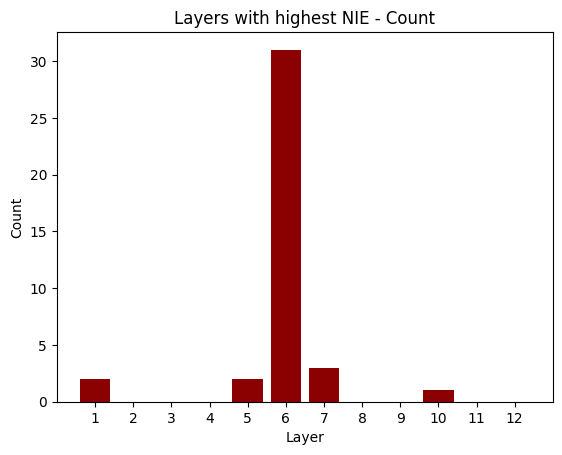

In [59]:
plt.bar(x = [v + 1 for v in values], height = counts, color = 'darkred')
plt.xlim(0, 13)
plt.xticks([x + 1 for x in range(12)])
plt.title('Layers with highest NIE - Count')
plt.xlabel('Layer')
plt.ylabel('Count')
plt.show()

In [8]:
genfem = get_max(genfem)
genfem

model_version  do_filter                                  path  \
0   dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
1   dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
2   dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
3   dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
4   dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
5   dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
6   dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
7   dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
8   dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
9   dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
10  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
11  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
12  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
13  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
14  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
15  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
16  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
17  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
18  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
19  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
20  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
21  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
22  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
23  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
24  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
25  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
26  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
27  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
28  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
29  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
30  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
31  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
32  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
33  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
34  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
35  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
36  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
37  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   
38  dbmdz/german-gpt2       True  Data/winobias_genfem_stereotyped.txt   

    num_examples_loaded  num_examples_aligned  filter_quantile  threshold  \
0                   100                    53             0.25   1.125055   
1                   100                    53             0.25   1.125055   
2                   100                    53             0.25   1.125055   
3                   100                    53             0.25   1.125055   
4                   100                    53             0.25   1.125055   
5                   100                    53             0.25   1.125055   
6                   100                    53             0.25   1.125055   
7                   100                    53             0.25   1.125055   
8                   100                    53             0.25   1.125055   
9                   100                    53             0.25   1.125055   
10                  100                    53             0.25   1.125055   
11                  100                    53             0.25   1.125055   
12                  100                    53 

In [12]:
layer = [list(ex.values())[0] for ex in genfem['max_layer']]
np.argmax(layer)

33

In [13]:
genfem.iloc[33]

model_version                                                 dbmdz/german-gpt2
do_filter                                                                  True
path                                       Data/winobias_genfem_stereotyped.txt
num_examples_loaded                                                         100
num_examples_aligned                                                         53
filter_quantile                                                            0.25
threshold                                                              1.125055
num_examples_analyzed                                                        39
mean_total_effect                                                      0.496276
mean_model_indirect_effect                                             0.156238
mean_model_direct_effect                                               0.350656
results                       {'base_string1': 'Die Landwirtin lief schnelle...
head_layer                    [{0: 0.030

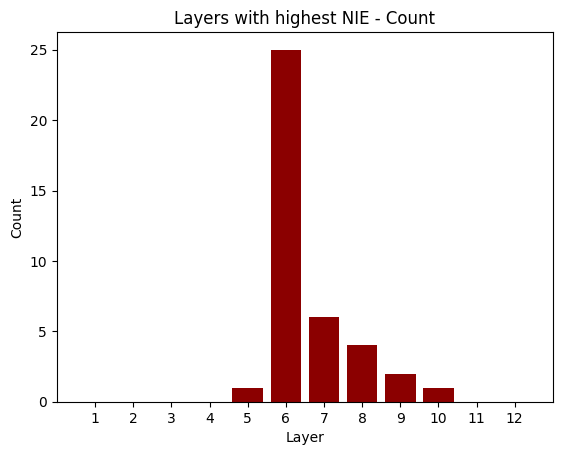

In [62]:
plot_layercount(genfem)

In [19]:
gendered = get_max(gendered)
#plot_layercount(gendered)

In [21]:
from attention_figures1 import save_figures

In [20]:
df = genmasc['results'].apply(pd.Series)#pd.DataFrame(genmasc['results'])
df

C:\Users\Hannah\AppData\Local\Temp\ipykernel_18924\1548546645.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df = genmasc['results'].apply(pd.Series)#pd.DataFrame(genmasc['results'])


base_string1  \
0   Der Maurer ging zu einer Sitzung mit dem Psych...   
1   Der Elektroniker bot dem Arzthelfer Hilfe an, ...   
2    Der Elektroniker schätzte den Sekretär, weil sie   
3   Der Elektroniker schrie den Haushälter an, wei...   
4   Der Elektroniker bat den Angestellten um Hilfe...   
5   Der Dachdecker aß mehr als der Augenoptiker, w...   
6    Der Dachdecker lobte den Kindergärtner, weil sie   
7     Der Dachdecker kannte den Psychologen, weil sie   
8     Der Dachdecker ermahnte den Apotheker, weil sie   
9   Der KFZ-Mechatroniker half dem Arzthelfer, wei...   
10  Der KFZ-Mechatroniker fragte den Friseur nach ...   
11  Der KFZ-Mechatroniker bat den Sekretär um Hilf...   
12  Der KFZ-Mechatroniker wandte sich an den Haush...   
13  Der KFZ-Mechatroniker sprach mit dem Medienges...   
14  Der Zimmerer hatte einen Termin mit dem Arzthe...   
15         Der Zimmerer beriet den Sekretär, weil sie   
16    Der Zimmerer bezahlte den Psychologen, weil sie   
17  Der Ingenieur wollte nicht zu dem Augenoptiker...   
18  Der Ingenieur brachte dem Sekretär ein Geschen...   
19  Der Ingenieur lud den Mediengestalter ins Rest...   
20  Der Informatiker bot dem Arzthelfer Hilfe an, ...   
21   Der Informatiker rief nach dem Friseur, weil sie   
22  Der Informatiker lobte den Augenoptiker, weil sie   
23  Der Informatiker war unfreundlich zu dem Kinde...   
24  Der Fahrer war von dem Kindergärtner genervt, ...   
25  Der Fahrer brachte den Psychologen ins Kranken...   
26  Der Fahrer war wütend auf den Mediengestalter,...   
27  Der Landwirt bat den Sekretär länger zu bleibe...   
28  Der Landwirt gab dem Apotheker einige Eier, we...   
29  Der Landwirt unterstützte den Mediengestalter,...   
30  Der Landwirt nahm den Angestellten in den Arm,...   
31  Der Manager fragte den Sekretär nach Informati...   
32  Der Manager bat den Apotheker länger zu bleibe...   

                                         base_string2  \
0   Der Maurer ging zu einer Sitzung mit dem Psych...   
1   Der Elektroniker bot dem Arzthelfer Hilfe an, ...   
2     Der Elektroniker schätzte den Sekretär, weil er   
3   Der Elektroniker schrie den Haushälter an, wei...   
4   Der Elektroniker bat den Angestellten um Hilfe...   
5   Der Dachdecker aß mehr als der Augenoptiker, w...   
6     Der Dachdecker lobte den Kindergärtner, weil er   
7      Der Dachdecker kannte den Psychologen, weil er   
8      Der Dachdecker ermahnte den Apotheker, weil er   
9   Der KFZ-Mechatroniker half dem Arzthelfer, wei...   
10  Der KFZ-Mechatroniker fragte den Friseur nach ...   
11  Der KFZ-Mechatroniker bat den Sekretär um Hilf...   
12  Der KFZ-Mechatroniker wandte sich an den Haush...   
13  Der KFZ-Mechatroniker sprach mit dem Medienges...   
14  Der Zimmerer hatte einen Termin mit dem Arzthe...   
15          Der Zimmerer beriet den Sekretär, weil er   
16     Der Zimmerer bezahlte den Psychologen, weil er   
17  Der Ingenieur wollte nicht zu dem Augenoptiker...   
18  Der Ingenieur brachte dem Sekretär ein Geschen...   
19  Der Ingenieur lud den Mediengestalter ins Rest...   
20  Der Informatiker bot dem Arzthelfer Hilfe an, ...   
21    Der Informatiker rief nach dem Friseur, weil er   
22   Der Informatiker lobte den Augenoptiker, weil er   
23  Der Informatiker war unfreundlich zu dem Kinde...   
24  Der Fahrer war von dem Kindergärtner genervt, ...   
25  Der Fahrer brachte den Psychologen ins Kranken...   
26  Der Fahrer war wütend auf den Mediengestalter,...   
27  Der Landwirt bat den Sekretär länger zu bleibe...   
28  Der Landwirt gab dem Apotheker einige Eier, we...   
29  Der Landwirt unterstützte den Mediengestalter,...   
30  Der Landwirt nahm den Angestellten in den Arm,...   
31  Der Manager fragte den Sekretär nach Informati...   
32  Der Manager bat den Apotheker länger zu bleibe...   

                                 candidate1  \
0                         empfohlen wurde .   
1                   sehr ungesch ickt war .   
2                     

In [21]:
genmasc.values()

model_version  do_filter                                   path  \
0   dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
1   dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
2   dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
3   dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
4   dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
5   dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
6   dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
7   dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
8   dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
9   dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
10  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
11  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
12  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
13  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
14  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
15  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
16  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
17  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
18  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
19  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
20  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
21  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
22  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
23  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
24  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
25  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
26  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
27  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
28  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
29  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
30  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
31  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
32  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
33  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
34  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
35  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
36  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
37  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   
38  dbmdz/german-gpt2       True  Data/winobias_genmasc_stereotyped.txt   

    num_examples_loaded  num_examples_aligned  filter_quantile  threshold  \
0                   100                    52             0.25   1.124331   
1                   100                    52             0.25   1.124331   
2                   100                    52             0.25   1.124331   
3                   100                    52             0.25   1.124331   
4                   100                    52             0.25   1.124331   
5                   100                    52             0.25   1.124331   
6                   100                    52             0.25   1.124331   
7                   100                    52             0.25   1.124331   
8                   100                    52             0.25   1.124331   
9                   100                    52             0.25   1.124331   
10                  100                    52             0.25   1.124331   
11                  100                    52             0.25   1.124331   
12    

In [22]:
layer = [list(ex.values())[0] for ex in genmasc['max_layer']]

In [29]:
layer

[0.123271785676479,
 -0.026937860995531002,
 0.11437994241714401,
 0.09368553012609401,
 0.322427988052368,
 -0.06359177082777001,
 0.26965934038162204,
 0.134645506739616,
 0.307766795158386,
 -0.107183575630187,
 0.09216005355119701,
 0.072370305657386,
 0.089659802615642,
 0.14401938021183,
 0.127854123711586,
 0.241137772798538,
 0.057937320321798005,
 -0.05418276786804101,
 0.05444770306348801,
 0.21643151342868802,
 0.140033900737762,
 0.13308461010456002,
 0.069680571556091,
 0.09827649593353201,
 0.09323547780513701,
 -0.15424644947052002,
 0.017745269462466,
 0.278131812810897,
 0.39416959881782504,
 -0.13820311427116302,
 0.161004468798637,
 0.126402869820594,
 0.277379631996154,
 0.264095038175582,
 1.377913117408752,
 0.21457281708717302,
 0.14747720956802302,
 1.7721794843673702,
 0.038840852677822]

In [25]:
np.argmax(layer) # 1.7721794843673702 # idx = 37

37

In [31]:
genmasc.iloc[38]['head_layer']

[{0: 0.017254684120416003},
 {11: 0.0014445922570300001},
 {8: 0.0023040499072520004},
 {6: 0.005877445917576001},
 {4: 0.014759843237698002},
 {0: 0.025054352357983003},
 {6: 0.02720745652914},
 {1: -0.008898597210645},
 {8: -0.004684841260313001},
 {8: -0.023560099303722003},
 {6: 0.002656586933881},
 {0: 0.000795887957792}]

In [7]:
df.columns

Index(['base_string1', 'base_string2', 'candidate1', 'candidate2',
       'candidate1_base_prob', 'candidate2_base_prob', 'odds_base',
       'candidate1_alt_prob', 'candidate2_alt_prob', 'odds_alt',
       'total_effect', 'indirect_odds_head', 'indirect_effect_head',
       'indirect_effect_layer', 'indirect_effect_model', 'direct_odds_head',
       'direct_effect_head', 'direct_effect_layer', 'direct_effect_model'],
      dtype='object')

In [8]:
df['indirect_effect_head']

0     [[0.11121555417776101, -0.00194783671759, -0.0...
1     [[0.037711020559072, 0.00041806223453000004, 0...
2     [[0.085225462913513, 0.0009534463752060001, -0...
3     [[0.044931497424840004, 0.002428784035146, -0....
4     [[0.03265555948019, -0.0001351259707, -0.00217...
5     [[0.025906031951308, -0.00353108276613, -0.000...
6     [[0.09437909722328101, 0.010373216122388, 0.00...
7     [[-0.008172431960701, -0.008664553053677, -0.0...
8     [[0.132289543747901, 0.00035288758226600003, 0...
9     [[0.026696491986513003, -0.004692148417234, 0....
10    [[0.076017536222934, 0.006468835752457, 0.0021...
11    [[0.055599357932806, 0.0034698247909540005, 0....
12    [[0.041016306728124, 0.0015303104883050002, 0....
13    [[0.039616178721189006, 0.0043694013729690005,...
14    [[0.108976788818836, -0.0013524114619940001, -...
15    [[0.094265192747116, 0.0032978907693170002, 0....
16    [[-0.013151604682207002, 0.000159282208187, -0...
17    [[0.035681370645761004, 0.000468695245217,

In [22]:
save_figures(genmasc, 'winobias', 'gpt2', 'filtered', 'genmasc')

C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures1.py:29: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df = data['results'].apply(pd.Series)


Index(['base_string1', 'base_string2', 'candidate1', 'candidate2',
       'candidate1_base_prob', 'candidate2_base_prob', 'odds_base',
       'candidate1_alt_prob', 'candidate2_alt_prob', 'odds_alt',
       'total_effect', 'indirect_odds_head', 'indirect_effect_head',
       'indirect_effect_layer', 'indirect_effect_model', 'direct_odds_head',
       'direct_effect_head', 'direct_effect_layer', 'direct_effect_model'],
      dtype='object')


save_figures(genfem, 'winobias', 'gpt2', 'filtered', 'genfem')
save_figures(gendered, 'winobias', 'gpt2', 'filtered', 'gendered')

## Individual visualization

In [3]:
import json
import math
from operator import itemgetter

import numpy as np
import seaborn as sns
import torch
from matplotlib import pyplot as plt
from transformers import AutoModelForCausalLM, AutoTokenizer, GPT2Config
import latex
import pylatex

from attention_figures3 import save_fig

C:\Users\Hannah\anaconda3\envs\thesis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
genmasc.iloc[37].results

{'base_string1': 'Der Manager fragte den Sekretär nach Informationen, weil sie',
 'base_string2': 'Der Manager fragte den Sekretär nach Informationen, weil er',
 'candidate1': 'die Dokumente besser kannte .',
 'candidate2': 'sich unsicher war .',
 'candidate1_base_prob': 0.008784494474234001,
 'candidate2_base_prob': 0.009619020213457001,
 'odds_base': 1.094999859316969,
 'candidate1_alt_prob': 0.016753752361539,
 'candidate2_alt_prob': 0.05053849368588301,
 'odds_alt': 3.016547731832376,
 'total_effect': 1.7548384651976252,
 'indirect_odds_head': [[1.252223253250122,
   1.088560223579406,
   1.095467209815979,
   1.13177478313446,
   1.095820069313049,
   1.09425401687622,
   1.093877911567688,
   1.092509984970092,
   1.104788541793823,
   1.094777703285217,
   1.090740799903869,
   1.0961024761199951],
  [1.10231328010559,
   1.09515368938446,
   1.086654543876648,
   1.092206239700317,
   1.084753513336181,
   1.094457387924194,
   1.094884634017944,
   1.0983407497406,
   1.075563

In [43]:
tokenizer.tokenize(example) # 1, 4

['Der',
 'ĠManager',
 'Ġfragte',
 'Ġden',
 'ĠSekretÃ¤r',
 'Ġnach',
 'ĠInformationen',
 ',',
 'Ġweil',
 'Ġsie']

In [74]:
sns.set_context("paper")
sns.set_style("white")
device = 'cpu'
#plt.rc('text', usetex=True)
#plt.rcParams.update({"text.latex.preamble": "\\usepackage{color} \\usepackage{soul} \\setulcolor{blue}"})

top_heads = [(5, 4), (5, 11)]
idx = 27

with torch.no_grad():
    # Get attention and validate
    gpt2_config = GPT2Config.from_pretrained("dbmdz/german-gpt2")
    gpt2_config.output_attentions = True
    model = AutoModelForCausalLM.from_pretrained('dbmdz/german-gpt2', config = gpt2_config)
    tokenizer = AutoTokenizer.from_pretrained('dbmdz/german-gpt2')
    model.eval()
    prompts = (genmasc.iloc[idx].results['base_string1'], genmasc.iloc[idx].results['base_string2'])
    #highlight_indices = [[1], [7]]
    fname = f'winobias_gpt2_filtered_genmasc_{idx}.pdf'
    save_fig(prompts, top_heads, model, tokenizer, fname, 'cpu')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Der Informatiker gesellt sich zu dem Angestellten, weil sie
[583, 1612, 33219, 25374, 88, 408, 362, 404, 18923, 16, 1690, 467]
['Der', 'ĠInform', 'atiker', 'Ġgesell', 't', 'Ġsich', 'Ġzu', 'Ġdem', 'ĠAngestellten', ',', 'Ġweil', 'Ġsie']
Der Informatiker gesellt sich zu dem Angestellten, weil er
[583, 1612, 33219, 25374, 88, 408, 362, 404, 18923, 16, 1690, 333]
['Der', 'ĠInform', 'atiker', 'Ġgesell', 't', 'Ġsich', 'Ġzu', 'Ġdem', 'ĠAngestellten', ',', 'Ġweil', 'Ġer']
formatted ['Der', 'Inform', 'atiker', 'gesell', 't', 'sich', 'zu', 'dem', 'Angestellten', ',', 'weil', 'sie']
[0.20658071 0.01216219 0.10703987 0.00427195 0.01231072 0.01269056
 0.12646489 0.02639839 0.209236   0.02472239 0.02425531 0.23386705]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7'), Text(0, 8, 'a8'), Text(0, 9, 'a9'), Text(0, 10, 'a10'), Text(0, 11, 'a11')]
[Text(0, 0, 'Der'), Text(0, 1, 'Inform'), Text(0, 2, 'atiker'), Te

C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'Der'), Text(0, 1, 'Inform'), Text(0, 2, 'atiker'), Text(0, 3, 'gesell'), Text(0, 4, 't'), Text(0, 5, 'sich'), Text(0, 6, 'zu'), Text(0, 7, 'dem'), Text(0, 8, 'Angestellten'), Text(0, 9, ','), Text(0, 10, 'weil'), Text(0, 11, 'er')]


In [16]:
genfem.iloc[33].results["base_string1"]

'Die Landwirtin lief schneller als die Psychologin, weil sie'

In [17]:
tokenizer.tokenize(genfem.iloc[33].results["base_string1"]) # [1, 2], [7,8]

['Die',
 'ĠLandwirt',
 'in',
 'Ġlief',
 'Ġschneller',
 'Ġals',
 'Ġdie',
 'ĠPsych',
 'ologin',
 ',',
 'Ġweil',
 'Ġsie']

In [76]:
sns.set_context("paper")
sns.set_style("white")
device = 'cpu'
#plt.rc('text', usetex=True)
#plt.rcParams.update({"text.latex.preamble": "\\usepackage{color} \\usepackage{soul} \\setulcolor{blue}"})

top_heads = [(5, 4), (5, 11)]
idx = 28


with torch.no_grad():
    # Get attention and validate
    gpt2_config = GPT2Config.from_pretrained("dbmdz/german-gpt2")
    gpt2_config.output_attentions = True
    model = AutoModelForCausalLM.from_pretrained('dbmdz/german-gpt2', config = gpt2_config)
    tokenizer = AutoTokenizer.from_pretrained('dbmdz/german-gpt2')
    model.eval()
    prompts = (genfem.iloc[idx].results['base_string1'], genfem.iloc[idx].results['base_string2'])
    #highlight_indices = [[1], [[7], [8]]]
    fname = f'winobias_gpt2_filtered_genfem_{idx}.pdf'
    save_fig(prompts, top_heads, model, tokenizer, fname, 'cpu')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Die Informatikerin gesellt sich zu der Angestellten, weil sie
[425, 18920, 2039, 25374, 88, 408, 362, 282, 18923, 16, 1690, 467]
['Die', 'ĠInformatik', 'erin', 'Ġgesell', 't', 'Ġsich', 'Ġzu', 'Ġder', 'ĠAngestellten', ',', 'Ġweil', 'Ġsie']
Die Informatikerin gesellt sich zu der Angestellten, weil er
[425, 18920, 2039, 25374, 88, 408, 362, 282, 18923, 16, 1690, 333]
['Die', 'ĠInformatik', 'erin', 'Ġgesell', 't', 'Ġsich', 'Ġzu', 'Ġder', 'ĠAngestellten', ',', 'Ġweil', 'Ġer']
formatted ['Die', 'Informatik', 'erin', 'gesell', 't', 'sich', 'zu', 'der', 'Angestellten', ',', 'weil', 'sie']
[0.0383565  0.06111804 0.77956355 0.00339144 0.00901622 0.00804579
 0.01749953 0.00663604 0.05289134 0.00491448 0.00243583 0.01613132]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7'), Text(0, 8, 'a8'), Text(0, 9, 'a9'), Text(0, 10, 'a10'), Text(0, 11, 'a11')]
[Text(0, 0, 'Die'), Text(0, 1, 'Informatik'), Text(0, 2,

C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7'), Text(0, 8, 'a8'), Text(0, 9, 'a9'), Text(0, 10, 'a10'), Text(0, 11, 'a11')]
[Text(0, 0, 'Die'), Text(0, 1, 'Informatik'), Text(0, 2, 'erin'), Text(0, 3, 'gesell'), Text(0, 4, 't'), Text(0, 5, 'sich'), Text(0, 6, 'zu'), Text(0, 7, 'der'), Text(0, 8, 'Angestellten'), Text(0, 9, ','), Text(0, 10, 'weil'), Text(0, 11, 'er')]


In [21]:
layer = [list(ex.values())[0] for ex in gendered['max_layer']]
np.argmax(layer)

32

In [23]:
tokenizer.tokenize(gendered.iloc[32].results['base_string1'])

['Der',
 '*',
 'Die',
 'ĠLandwirt',
 '*',
 'in',
 'Ġlief',
 'Ġschneller',
 'Ġals',
 'Ġder',
 '*',
 'die',
 'ĠPsych',
 'olog',
 '*',
 'in',
 ',',
 'Ġweil',
 'Ġsie']

In [27]:
sns.set_context("paper")
sns.set_style("white")
device = 'cpu'
#plt.rc('text', usetex=True)
#plt.rcParams.update({"text.latex.preamble": "\\usepackage{color} \\usepackage{soul} \\setulcolor{blue}"})

top_heads = [(5, 4), (5, 5), (5, 11), (6, 2)]


with torch.no_grad():
    # Get attention and validate
    gpt2_config = GPT2Config.from_pretrained("dbmdz/german-gpt2")
    gpt2_config.output_attentions = True
    model = AutoModelForCausalLM.from_pretrained('dbmdz/german-gpt2', config = gpt2_config)
    tokenizer = AutoTokenizer.from_pretrained('dbmdz/german-gpt2')
    model.eval()
    prompts = (gendered.iloc[32].results['base_string1'], gendered.iloc[32].results['base_string2'])
    # highlight_indices = [[1], [[7], [8]]]
    fname = f'winobias_gpt2_filtered_gendered_32.pdf' # results/attention_intervention/qualitative/
    save_fig(prompts, top_heads, model, tokenizer, fname, 'cpu')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Der*Die Landwirt*in lief schneller als der*die Psycholog*in, weil sie
[583, 14, 425, 21601, 14, 269, 7635, 8589, 433, 282, 14, 2327, 6348, 1070, 14, 269, 16, 1690, 467]
['Der', '*', 'Die', 'ĠLandwirt', '*', 'in', 'Ġlief', 'Ġschneller', 'Ġals', 'Ġder', '*', 'die', 'ĠPsych', 'olog', '*', 'in', ',', 'Ġweil', 'Ġsie']
Der*Die Landwirt*in lief schneller als der*die Psycholog*in, weil er
[583, 14, 425, 21601, 14, 269, 7635, 8589, 433, 282, 14, 2327, 6348, 1070, 14, 269, 16, 1690, 333]
['Der', '*', 'Die', 'ĠLandwirt', '*', 'in', 'Ġlief', 'Ġschneller', 'Ġals', 'Ġder', '*', 'die', 'ĠPsych', 'olog', '*', 'in', ',', 'Ġweil', 'Ġer']
formatted ['Der', '*', 'Die', 'Landwirt', '*', 'in', 'lief', 'schneller', 'als', 'der', '*', 'die', 'Psych', 'olog', '*', 'in', ',', 'weil', 'sie']
[2.9879788e-02 7.1384511e-03 2.4100753e-02 3.0239958e-02 2.7055891e-02
 7.2137380e-01 1.4425130e-02 8.1084184e-03 2.3515879e-03 5.2083348e-04
 6.7329418e-04 1.8216708e-03 6.9723707e-03 2.2674517e-03 5.4014949e-03
 1.0046540e

C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'Der'), Text(0, 1, '*'), Text(0, 2, 'Die'), Text(0, 3, 'Landwirt'), Text(0, 4, '*'), Text(0, 5, 'in'), Text(0, 6, 'lief'), Text(0, 7, 'schneller'), Text(0, 8, 'als'), Text(0, 9, 'der'), Text(0, 10, '*'), Text(0, 11, 'die'), Text(0, 12, 'Psych'), Text(0, 13, 'olog'), Text(0, 14, '*'), Text(0, 15, 'in'), Text(0, 16, ','), Text(0, 17, 'weil'), Text(0, 18, 'sie')]
[Text(0, 0, 'Der'), Text(0, 1, '*'), Text(0, 2, 'Die'), Text(0, 3, 'Landwirt'), Text(0, 4, '*'), Text(0, 5, 'in'), Text(0, 6, 'lief'), Text(0, 7, 'schneller'), Text(0, 8, 'als'), Text(0, 9, 'der'), Text(0, 10, '*'), Text(0, 11, 'die'), Text(0, 12, 'Psych'), Text(0, 13, 'olog'), Text(0, 14, '*'), Text(0, 15, 'in'), Text(0, 16, ','), Text(0, 17, 'weil'), Text(0, 18, 'sie')]
formatted ['Der', '*', 'Die', 'Landwirt', '*', 'in', 'lief', 'schneller', 'als', 'der', '*', 'die', 'Psych', 'olog', '*', 'in', ',', 'weil', 'er']
[0.1279184  0.06266266 0.17976634 0.14638223 0.01014784 0.11910578
 0.05931877 0.03058283 0.00464767 0.

In [84]:
genmasc.iloc[38].results['base_string1']

'Der Manager bat den Apotheker länger zu bleiben, weil sie'

In [87]:
genfem.iloc[38].results['base_string1']

'Die Managerin sprach mit der Psychologin, weil sie'

## Unfiltered data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from attention_figures1 import save_figures

In [3]:
genmasc = pd.read_json('results/attention_intervention_dbmdzgerman_gpt2_genmasc_unfiltered.json')
genfem = pd.read_json('results/attention_intervention_dbmdzgerman_gpt2_genfem_unfiltered.json')
gendered = pd.read_json('results/attention_intervention_dbmdzgerman_gpt2_gendered_unfiltered.json')

In [4]:
genmasc.head()

model_version  do_filter                                   path  \
0  dbmdz/german-gpt2      False  Data/winobias_genmasc_stereotyped.txt   
1  dbmdz/german-gpt2      False  Data/winobias_genmasc_stereotyped.txt   
2  dbmdz/german-gpt2      False  Data/winobias_genmasc_stereotyped.txt   
3  dbmdz/german-gpt2      False  Data/winobias_genmasc_stereotyped.txt   
4  dbmdz/german-gpt2      False  Data/winobias_genmasc_stereotyped.txt   

   num_examples_loaded  num_examples_analyzed  mean_total_effect  \
0                  100                    100           0.099409   
1                  100                    100           0.099409   
2                  100                    100           0.099409   
3                  100                    100           0.099409   
4                  100                    100           0.099409   

   mean_model_indirect_effect  mean_model_direct_effect  \
0                    0.041855                  0.105645   
1                    0.041855                  0.105645   
2                    0.041855                  0.105645   
3                    0.041855                  0.105645   
4                    0.041855                  0.105645   

                                             results  
0  {'base_string1': 'Der Maurer sprach mit dem Ar...  
1  {'base_string1': 'Der Maurer schrie den Friseu...  
2  {'base_string1': 'Der Maurer sprach mit dem Au...  
3  {'base_string1': 'Der Maurer sorgte sich um de...  
4  {'base_string1': 'Der Maurer traf sich mit dem...

In [5]:
genfem.head()

model_version  do_filter                                  path  \
0  dbmdz/german-gpt2      False  Data/winobias_genfem_stereotyped.txt   
1  dbmdz/german-gpt2      False  Data/winobias_genfem_stereotyped.txt   
2  dbmdz/german-gpt2      False  Data/winobias_genfem_stereotyped.txt   
3  dbmdz/german-gpt2      False  Data/winobias_genfem_stereotyped.txt   
4  dbmdz/german-gpt2      False  Data/winobias_genfem_stereotyped.txt   

   num_examples_loaded  num_examples_analyzed  mean_total_effect  \
0                  100                    100           0.138511   
1                  100                    100           0.138511   
2                  100                    100           0.138511   
3                  100                    100           0.138511   
4                  100                    100           0.138511   

   mean_model_indirect_effect  mean_model_direct_effect  \
0                    0.055667                  0.106238   
1                    0.055667                  0.106238   
2                    0.055667                  0.106238   
3                    0.055667                  0.106238   
4                    0.055667                  0.106238   

                                             results  
0  {'base_string1': 'Die Maurerin sprach mit der ...  
1  {'base_string1': 'Die Maurerin schrie die Fris...  
2  {'base_string1': 'Die Maurerin sprach mit der ...  
3  {'base_string1': 'Die Maurerin sorgte sich um ...  
4  {'base_string1': 'Die Maurerin traf sich mit d...

In [6]:
gendered.head()

model_version  do_filter                                    path  \
0  dbmdz/german-gpt2      False  Data/winobias_gendered_stereotyped.txt   
1  dbmdz/german-gpt2      False  Data/winobias_gendered_stereotyped.txt   
2  dbmdz/german-gpt2      False  Data/winobias_gendered_stereotyped.txt   
3  dbmdz/german-gpt2      False  Data/winobias_gendered_stereotyped.txt   
4  dbmdz/german-gpt2      False  Data/winobias_gendered_stereotyped.txt   

   num_examples_loaded  num_examples_analyzed  mean_total_effect  \
0                  100                    100           0.058803   
1                  100                    100           0.058803   
2                  100                    100           0.058803   
3                  100                    100           0.058803   
4                  100                    100           0.058803   

   mean_model_indirect_effect  mean_model_direct_effect  \
0                   -0.005328                  0.056037   
1                   -0.005328                  0.056037   
2                   -0.005328                  0.056037   
3                   -0.005328                  0.056037   
4                   -0.005328                  0.056037   

                                             results  
0  {'base_string1': 'Der*Die Maurer*in sprach mit...  
1  {'base_string1': 'Der*Die Maurer*in schrie den...  
2  {'base_string1': 'Der*Die Maurer*in sprach mit...  
3  {'base_string1': 'Der*Die Maurer*in sorgte sic...  
4  {'base_string1': 'Der*Die Maurer*in traf sich ...

In [ ]:
save_figures(genmasc, 'winobias', 'gpt2', 'unfiltered', 'genmasc')
save_figures(genfem, 'winobias', 'gpt2', 'unfiltered', 'genfem')
save_figures(gendered, 'winobias', 'gpt2', 'unfiltered', 'gendered')

In [10]:
import json
import math
from operator import itemgetter

import numpy as np
import seaborn as sns
import torch
from matplotlib import pyplot as plt
from transformers import AutoModelForCausalLM, AutoTokenizer, GPT2Config
import latex
import pylatex

from attention_figures3 import save_fig

In [17]:
sns.set_context("paper")
sns.set_style("white")
device = 'cpu'
#plt.rc('text', usetex=True)
#plt.rcParams.update({"text.latex.preamble": "\\usepackage{color} \\usepackage{soul} \\setulcolor{blue}"})

top_heads = [(6, 2), (5, 5)] # genfem: [(6,2), (5,4)] # gendered: [(6, 2), (5, 5)]


with torch.no_grad():
    # Get attention and validate
    gpt2_config = GPT2Config.from_pretrained("dbmdz/german-gpt2")
    gpt2_config.output_attentions = True
    model = AutoModelForCausalLM.from_pretrained('dbmdz/german-gpt2', config = gpt2_config)
    tokenizer = AutoTokenizer.from_pretrained('dbmdz/german-gpt2')
    model.eval()
    for i in range(60,70):
        prompts = (gendered.iloc[i].results['base_string1'], gendered.iloc[i].results['base_string2'])
        # highlight_indices = [[1], [[7], [8]]]
        fname = f'results/individual/winobias_gpt2_unfiltered_gendered_{i}.pdf' # results/attention_intervention/qualitative/
        save_fig(prompts, top_heads, model, tokenizer, fname, 'cpu')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Der*Die Informatiker*in bot dem*der Arzthelfer*in Hilfe an, weil sie
[583, 14, 425, 1612, 33219, 14, 269, 9927, 404, 14, 320, 6916, 20647, 14, 269, 2936, 364, 16, 1690, 467]
['Der', '*', 'Die', 'ĠInform', 'atiker', '*', 'in', 'Ġbot', 'Ġdem', '*', 'der', 'ĠArzt', 'helfer', '*', 'in', 'ĠHilfe', 'Ġan', ',', 'Ġweil', 'Ġsie']
Der*Die Informatiker*in bot dem*der Arzthelfer*in Hilfe an, weil er
[583, 14, 425, 1612, 33219, 14, 269, 9927, 404, 14, 320, 6916, 20647, 14, 269, 2936, 364, 16, 1690, 333]
['Der', '*', 'Die', 'ĠInform', 'atiker', '*', 'in', 'Ġbot', 'Ġdem', '*', 'der', 'ĠArzt', 'helfer', '*', 'in', 'ĠHilfe', 'Ġan', ',', 'Ġweil', 'Ġer']
formatted ['Der', '*', 'Die', 'Inform', 'atiker', '*', 'in', 'bot', 'dem', '*', 'der', 'Arzt', 'helfer', '*', 'in', 'Hilfe', 'an', ',', 'weil', 'sie']
[0.02802976 0.00422078 0.00638264 0.00258189 0.08164164 0.00650389
 0.18419436 0.04105708 0.01046689 0.00438998 0.01030823 0.03655254
 0.07007196 0.01182243 0.1614457  0.0115711  0.00223769 0.00839965
 0.0

C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'Der'), Text(0, 1, '*'), Text(0, 2, 'Die'), Text(0, 3, 'Inform'), Text(0, 4, 'atiker'), Text(0, 5, '*'), Text(0, 6, 'in'), Text(0, 7, 'bot'), Text(0, 8, 'dem'), Text(0, 9, '*'), Text(0, 10, 'der'), Text(0, 11, 'Arzt'), Text(0, 12, 'helfer'), Text(0, 13, '*'), Text(0, 14, 'in'), Text(0, 15, 'Hilfe'), Text(0, 16, 'an'), Text(0, 17, ','), Text(0, 18, 'weil'), Text(0, 19, 'sie')]
formatted ['Der', '*', 'Die', 'Inform', 'atiker', '*', 'in', 'bot', 'dem', '*', 'der', 'Arzt', 'helfer', '*', 'in', 'Hilfe', 'an', ',', 'weil', 'er']
[0.01108505 0.00627274 0.00363555 0.00053162 0.01166079 0.00318294
 0.04370296 0.02006864 0.00775407 0.01030453 0.02699115 0.07595105
 0.07940011 0.01285086 0.25092393 0.00387608 0.00102192 0.00770145
 0.00649004 0.4165946 ]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7'), Text(0, 8, 'a8'), Text(0, 9, 'a9'), Text(0, 10, 'a10'), Text(0, 11, 'a11'), Text(0, 12, '

C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'Der'), Text(0, 1, '*'), Text(0, 2, 'Die'), Text(0, 3, 'Inform'), Text(0, 4, 'atiker'), Text(0, 5, '*'), Text(0, 6, 'in'), Text(0, 7, 'rief'), Text(0, 8, 'den'), Text(0, 9, '*'), Text(0, 10, 'die'), Text(0, 11, 'Friseur'), Text(0, 12, '*'), Text(0, 13, 'in'), Text(0, 14, ','), Text(0, 15, 'weil'), Text(0, 16, 'sie')]
formatted ['Der', '*', 'Die', 'Inform', 'atiker', '*', 'in', 'rief', 'den', '*', 'die', 'Friseur', '*', 'in', ',', 'weil', 'er']
[0.01896277 0.0087819  0.00525711 0.00127144 0.0161789  0.0032779
 0.04837558 0.00654748 0.02079358 0.0187705  0.02747555 0.02370836
 0.00978636 0.1658167  0.01859    0.00820437 0.5982015 ]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7'), Text(0, 8, 'a8'), Text(0, 9, 'a9'), Text(0, 10, 'a10'), Text(0, 11, 'a11'), Text(0, 12, 'a12'), Text(0, 13, 'a13'), Text(0, 14, 'a14'), Text(0, 15, 'a15'), Text(0, 16, 'a16')]
[Text(0, 0, 'Der'), Text(0, 1

C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'Der'), Text(0, 1, '*'), Text(0, 2, 'Die'), Text(0, 3, 'Inform'), Text(0, 4, 'atiker'), Text(0, 5, '*'), Text(0, 6, 'in'), Text(0, 7, 'lobte'), Text(0, 8, 'den'), Text(0, 9, '*'), Text(0, 10, 'die'), Text(0, 11, 'Augen'), Text(0, 12, 'op'), Text(0, 13, 'tiker'), Text(0, 14, '*'), Text(0, 15, 'in'), Text(0, 16, ','), Text(0, 17, 'weil'), Text(0, 18, 'sie')]
formatted ['Der', '*', 'Die', 'Inform', 'atiker', '*', 'in', 'lobte', 'den', '*', 'die', 'Augen', 'op', 'tiker', '*', 'in', ',', 'weil', 'er']
[0.00872393 0.00449578 0.00178603 0.00054797 0.01099368 0.00228603
 0.03066259 0.00455529 0.00984137 0.01882959 0.00809985 0.00211153
 0.00143623 0.08119838 0.01089493 0.28160244 0.00889028 0.00656805
 0.50647604]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7'), Text(0, 8, 'a8'), Text(0, 9, 'a9'), Text(0, 10, 'a10'), Text(0, 11, 'a11'), Text(0, 12, 'a12'), Text(0, 13, 'a13'), Text(0, 14,

C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'Der'), Text(0, 1, '*'), Text(0, 2, 'Die'), Text(0, 3, 'Inform'), Text(0, 4, 'atiker'), Text(0, 5, '*'), Text(0, 6, 'in'), Text(0, 7, 'meldete'), Text(0, 8, 'sich'), Text(0, 9, 'bei'), Text(0, 10, 'dem'), Text(0, 11, '*'), Text(0, 12, 'der'), Text(0, 13, 'SekretÃ¤r'), Text(0, 14, '*'), Text(0, 15, 'in'), Text(0, 16, ','), Text(0, 17, 'weil'), Text(0, 18, 'sie')]
formatted ['Der', '*', 'Die', 'Inform', 'atiker', '*', 'in', 'meldete', 'sich', 'bei', 'dem', '*', 'der', 'SekretÃ¤r', '*', 'in', ',', 'weil', 'er']
[0.02138203 0.00916548 0.00430272 0.00098297 0.01387987 0.00457526
 0.06329241 0.00937428 0.00847271 0.00700049 0.00420651 0.01283036
 0.01338515 0.04189378 0.01490672 0.08311083 0.00571679 0.01224826
 0.6692734 ]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7'), Text(0, 8, 'a8'), Text(0, 9, 'a9'), Text(0, 10, 'a10'), Text(0, 11, 'a11'), Text(0, 12, 'a12'), Text(0, 13, 'a13'),

C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'Der'), Text(0, 1, '*'), Text(0, 2, 'Die'), Text(0, 3, 'Inform'), Text(0, 4, 'atiker'), Text(0, 5, '*'), Text(0, 6, 'in'), Text(0, 7, 'unterhielt'), Text(0, 8, 'sich'), Text(0, 9, 'mit'), Text(0, 10, 'dem'), Text(0, 11, '*'), Text(0, 12, 'der'), Text(0, 13, 'Kinder'), Text(0, 14, 'gÃ¤rtner'), Text(0, 15, '*'), Text(0, 16, 'in'), Text(0, 17, ','), Text(0, 18, 'weil'), Text(0, 19, 'sie')]
formatted ['Der', '*', 'Die', 'Inform', 'atiker', '*', 'in', 'unterhielt', 'sich', 'mit', 'dem', '*', 'der', 'Kinder', 'gÃ¤rtner', '*', 'in', ',', 'weil', 'er']
[1.6624354e-02 7.0613017e-03 2.4866769e-03 4.6423558e-04 9.6288547e-03
 2.9804343e-03 4.0587038e-02 6.8171187e-03 1.0647138e-02 5.1161190e-03
 1.9025619e-03 6.8083340e-03 9.7836396e-03 5.3838124e-03 3.9928082e-02
 6.3417698e-03 6.1902005e-02 4.4574500e-03 9.5485849e-03 7.5153047e-01]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7'), Text(0,

C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'Der'), Text(0, 1, '*'), Text(0, 2, 'Die'), Text(0, 3, 'Inform'), Text(0, 4, 'atiker'), Text(0, 5, '*'), Text(0, 6, 'in'), Text(0, 7, 'besch'), Text(0, 8, 'werte'), Text(0, 9, 'sich'), Text(0, 10, 'bei'), Text(0, 11, 'dem'), Text(0, 12, '*'), Text(0, 13, 'der'), Text(0, 14, 'Haus'), Text(0, 15, 'hÃ¤lter'), Text(0, 16, '*'), Text(0, 17, 'in'), Text(0, 18, ','), Text(0, 19, 'weil'), Text(0, 20, 'sie')]
formatted ['Der', '*', 'Die', 'Inform', 'atiker', '*', 'in', 'besch', 'werte', 'sich', 'bei', 'dem', '*', 'der', 'Haus', 'hÃ¤lter', '*', 'in', ',', 'weil', 'er']
[1.0802527e-02 4.8768693e-03 1.7896533e-03 6.8825099e-04 9.5705809e-03
 3.2902765e-03 3.7694313e-02 3.6165354e-04 4.7139484e-03 3.1058448e-03
 4.8432290e-03 1.9661270e-03 1.1849193e-02 1.0918404e-02 9.6931159e-03
 1.6691629e-02 1.0623270e-02 6.4627029e-02 3.7329113e-03 1.0758543e-02
 7.7740264e-01]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a

C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'Der'), Text(0, 1, '*'), Text(0, 2, 'Die'), Text(0, 3, 'Inform'), Text(0, 4, 'atiker'), Text(0, 5, '*'), Text(0, 6, 'in'), Text(0, 7, 'konsul'), Text(0, 8, 'tiert'), Text(0, 9, 'den'), Text(0, 10, '*'), Text(0, 11, 'die'), Text(0, 12, 'Psych'), Text(0, 13, 'olog'), Text(0, 14, '*'), Text(0, 15, 'in'), Text(0, 16, ','), Text(0, 17, 'weil'), Text(0, 18, 'sie')]
formatted ['Der', '*', 'Die', 'Inform', 'atiker', '*', 'in', 'konsul', 'tiert', 'den', '*', 'die', 'Psych', 'olog', '*', 'in', ',', 'weil', 'er']
[0.05812864 0.01845432 0.01207923 0.00249697 0.0312109  0.0085742
 0.14660607 0.00261338 0.02076625 0.02518282 0.02184423 0.01995929
 0.00289266 0.01046605 0.00510078 0.17158468 0.0080745  0.01417235
 0.4197926 ]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7'), Text(0, 8, 'a8'), Text(0, 9, 'a9'), Text(0, 10, 'a10'), Text(0, 11, 'a11'), Text(0, 12, 'a12'), Text(0, 13, 'a13'), Text(0

C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'Der'), Text(0, 1, '*'), Text(0, 2, 'Die'), Text(0, 3, 'Inform'), Text(0, 4, 'atiker'), Text(0, 5, '*'), Text(0, 6, 'in'), Text(0, 7, 'Ã¤rgert'), Text(0, 8, 'sich'), Text(0, 9, 'Ã¼ber'), Text(0, 10, 'den'), Text(0, 11, '*'), Text(0, 12, 'die'), Text(0, 13, 'Apotheker'), Text(0, 14, '*'), Text(0, 15, 'in'), Text(0, 16, ','), Text(0, 17, 'weil'), Text(0, 18, 'sie')]
formatted ['Der', '*', 'Die', 'Inform', 'atiker', '*', 'in', 'Ã¤rgert', 'sich', 'Ã¼ber', 'den', '*', 'die', 'Apotheker', '*', 'in', ',', 'weil', 'er']
[0.01719921 0.00570623 0.0037974  0.00101162 0.01471817 0.0036152
 0.04645701 0.00684867 0.00174031 0.00678271 0.00759312 0.00904591
 0.01266682 0.01973096 0.00457074 0.08896736 0.00887103 0.00904289
 0.73163474]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7'), Text(0, 8, 'a8'), Text(0, 9, 'a9'), Text(0, 10, 'a10'), Text(0, 11, 'a11'), Text(0, 12, 'a12'), Text(0, 13, 'a13

C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'Der'), Text(0, 1, '*'), Text(0, 2, 'Die'), Text(0, 3, 'Inform'), Text(0, 4, 'atiker'), Text(0, 5, '*'), Text(0, 6, 'in'), Text(0, 7, 'will'), Text(0, 8, 'den'), Text(0, 9, '*'), Text(0, 10, 'die'), Text(0, 11, 'Medien'), Text(0, 12, 'gest'), Text(0, 13, 'alter'), Text(0, 14, '*'), Text(0, 15, 'in'), Text(0, 16, 'im'), Text(0, 17, 'Projekt'), Text(0, 18, ','), Text(0, 19, 'weil'), Text(0, 20, 'sie')]
formatted ['Der', '*', 'Die', 'Inform', 'atiker', '*', 'in', 'will', 'den', '*', 'die', 'Medien', 'gest', 'alter', '*', 'in', 'im', 'Projekt', ',', 'weil', 'er']
[0.04118418 0.01218891 0.00826431 0.00152761 0.01734745 0.00308898
 0.05228748 0.057094   0.0245152  0.01628554 0.04312765 0.01784422
 0.00212947 0.05419302 0.01755056 0.23252723 0.01925781 0.00625927
 0.00569053 0.02763794 0.33999866]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7'), Text(0, 8, 'a8'), Text(0, 9, 'a9'), Text(

C:\Users\Hannah\Desktop\Kopenhagen\Master Thesis\Notebooks\Coding\attention_figures3.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_seq)


[Text(0, 0, 'Der'), Text(0, 1, '*'), Text(0, 2, 'Die'), Text(0, 3, 'Inform'), Text(0, 4, 'atiker'), Text(0, 5, '*'), Text(0, 6, 'in'), Text(0, 7, 'gesell'), Text(0, 8, 't'), Text(0, 9, 'sich'), Text(0, 10, 'zu'), Text(0, 11, 'dem'), Text(0, 12, '*'), Text(0, 13, 'der'), Text(0, 14, 'Angestellten'), Text(0, 15, ','), Text(0, 16, 'weil'), Text(0, 17, 'sie')]
formatted ['Der', '*', 'Die', 'Inform', 'atiker', '*', 'in', 'gesell', 't', 'sich', 'zu', 'dem', '*', 'der', 'Angestellten', ',', 'weil', 'er']
[0.03887564 0.00832538 0.007164   0.00166949 0.02399714 0.00398148
 0.07851418 0.00284762 0.02145284 0.02234055 0.00512363 0.00388616
 0.00613124 0.01297869 0.09268522 0.00595592 0.01624288 0.6478279 ]
[Text(0, 0, 'a0'), Text(0, 1, 'a1'), Text(0, 2, 'a2'), Text(0, 3, 'a3'), Text(0, 4, 'a4'), Text(0, 5, 'a5'), Text(0, 6, 'a6'), Text(0, 7, 'a7'), Text(0, 8, 'a8'), Text(0, 9, 'a9'), Text(0, 10, 'a10'), Text(0, 11, 'a11'), Text(0, 12, 'a12'), Text(0, 13, 'a13'), Text(0, 14, 'a14'), Text(0, 15, 'a

In [20]:
genfem.head()

model_version  do_filter                                  path  \
0  dbmdz/german-gpt2      False  Data/winobias_genfem_stereotyped.txt   
1  dbmdz/german-gpt2      False  Data/winobias_genfem_stereotyped.txt   
2  dbmdz/german-gpt2      False  Data/winobias_genfem_stereotyped.txt   
3  dbmdz/german-gpt2      False  Data/winobias_genfem_stereotyped.txt   
4  dbmdz/german-gpt2      False  Data/winobias_genfem_stereotyped.txt   

   num_examples_loaded  num_examples_analyzed  mean_total_effect  \
0                  100                    100           0.138511   
1                  100                    100           0.138511   
2                  100                    100           0.138511   
3                  100                    100           0.138511   
4                  100                    100           0.138511   

   mean_model_indirect_effect  mean_model_direct_effect  \
0                    0.055667                  0.106238   
1                    0.055667                  0.106238   
2                    0.055667                  0.106238   
3                    0.055667                  0.106238   
4                    0.055667                  0.106238   

                                             results  
0  {'base_string1': 'Die Maurerin sprach mit der ...  
1  {'base_string1': 'Die Maurerin schrie die Fris...  
2  {'base_string1': 'Die Maurerin sprach mit der ...  
3  {'base_string1': 'Die Maurerin sorgte sich um ...  
4  {'base_string1': 'Die Maurerin traf sich mit d...